In [1]:
#nativos
import os
import unicodedata

#terceros
import pandas as pd
import pymssql
import missingno as msnolistad
from collections import Counter

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

#propios
from utils_ficha import *
from querys import *

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  import sys


In [2]:
#try:
#    connection_b20.close()
#except:
#    pass

try:
    connection_market.close()
except:
    pass

In [3]:
#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )

### Clientes Universo

In [4]:
sql_clientes = """
    SELECT * FROM ODS.HD_VMVP_BASE_ALERTA_CARTERA_BE WITH (NOLOCK)
"""
clientes = pd.read_sql(
   sql_clientes , connection_market
)
clientes.head(3)

,FEVE,PERIODO,CODUNICOCLI,NOMBRE_COMPLETO,FLG_VIGENTE,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,ES_ACTIVO,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,TIPDOC,CODDOC,NUM_RUC
0,None,202007,0015071424,Q MEDICAL,1,0,0,0,0,0,...,S,NORMAL,NORMAL,LIMA,2017-03-07,2018-04-12,SERVICIOS,2,20505719396,20505719396
1,None,202007,0015076938,APLEX TRADING,1,0,0,0,0,0,...,S,NORMAL,NORMAL,LIMA,2017-03-10,2017-07-11,COMERCIO,2,20538176967,20538176967
2,None,202008,0001420892,TAWA,1,0,0,0,0,0,...,S,NORMAL,NORMAL,LA LIBERTAD,1993-11-03,1994-06-22,COMERCIO,2,20132091979,20132091979


In [5]:
clientes.columns

Index(['FEVE', 'PERIODO', 'CODUNICOCLI', 'NOMBRE_COMPLETO', 'FLG_VIGENTE',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3',
       'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL',
       'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4',
       'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO', 'FEVE_FICHA',
       'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'ES_ACTIVO', 'CLASIF_SBS',
       'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO',
       'FEC_PRIMER_PRODUCTO_APERTURADO', 'SEI_MCDO', 'TIPDOC', 'CODDOC',
       'NUM_RUC'],
      dtype='object')

In [6]:
sql_ = """
    SELECT * FROM ODS.HM_FEVE_REAJUSTADO_SEGUIR_COVID WITH (NOLOCK)
"""
reajustado = pd.read_sql(
   sql_ , connection_market
)
reajustado['CODUNICOCLI'] = reajustado['CU'].copy()
reajustado.head(3)

,CU,CLIENTE,PERIODO,SEGUIR_COVID,CODUNICOCLI
0,0015307711,IHI PERU,202010,1,0015307711
1,0013310596,HOTELERA EL PINAR,202010,1,0013310596
2,0008718030,CORPORACION MENDOZA,202010,1,0008718030


In [7]:
reajustado['PERIODO'].value_counts()

202011    212
202010    212
Name: PERIODO, dtype: int64

In [8]:
reajustado.dtypes

CU              object
CLIENTE         object
PERIODO         object
SEGUIR_COVID     int64
CODUNICOCLI     object
dtype: object

In [9]:
clientes = clientes.merge(
    reajustado[['CODUNICOCLI', 'PERIODO', 'SEGUIR_COVID']], how='left', on=['CODUNICOCLI', 'PERIODO']
)
clientes.head()

,FEVE,PERIODO,CODUNICOCLI,NOMBRE_COMPLETO,FLG_VIGENTE,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,TIPDOC,CODDOC,NUM_RUC,SEGUIR_COVID
0,None,202007,0015071424,Q MEDICAL,1,0,0,0,0,0,...,NORMAL,NORMAL,LIMA,2017-03-07,2018-04-12,SERVICIOS,2,20505719396,20505719396,NaN
1,None,202007,0015076938,APLEX TRADING,1,0,0,0,0,0,...,NORMAL,NORMAL,LIMA,2017-03-10,2017-07-11,COMERCIO,2,20538176967,20538176967,NaN
2,None,202008,0001420892,TAWA,1,0,0,0,0,0,...,NORMAL,NORMAL,LA LIBERTAD,1993-11-03,1994-06-22,COMERCIO,2,20132091979,20132091979,NaN
3,SEGUIR,202008,0008391729,REPRESENTACIONES Y DISTRIBUCIONES DEL,1,1,0,0,0,0,...,NORMAL,NORMAL,CAJAMARCA,1999-10-19,2011-07-20,COMERCIO,2,20103668876,20103668876,NaN
4,EX-FEVE,202008,0008401169,LIMPIEZA Y APOYO DE PERSONAL,1,0,0,1,0,0,...,NORMAL,NORMAL,LIMA,1999-11-25,1999-11-25,SERVICIOS,2,20109104397,20109104397,NaN


In [10]:
pd.crosstab(
    clientes[clientes['PERIODO'] == '202011']['FEVE'], clientes[clientes['PERIODO'] == '202011']['SEGUIR_COVID']
)

SEGUIR_COVID,1.0
FEVE,
EX-FEVE,3
GARANTIZAR,34
REDUCIR,1
SEGUIR,163


In [11]:
pd.crosstab(
    clientes[clientes['PERIODO'] == '202010']['FEVE'], clientes[clientes['PERIODO'] == '202010']['SEGUIR_COVID']
)

SEGUIR_COVID,1.0
FEVE,
EX-FEVE,10
GARANTIZAR,39
REDUCIR,1
SEGUIR,151


In [12]:
pd.crosstab(
    clientes['FEVE'], clientes['PERIODO']
)

PERIODO,202007,202008,202009,202010,202011
FEVE,,,,,
EX-FEVE,533,569,558,555,561
GARANTIZAR,385,310,245,182,151
REDUCIR,67,72,80,92,91
SALIR,19,22,24,25,23
SEGUIR,130,150,212,265,282


In [13]:
clientes['FEVE'] = clientes[['FEVE', 'SEGUIR_COVID']].apply(
    lambda _: 'SEGUIR COVID' if _[1] == 1 and _[0] not in ['REDUCIR', 'SALIR'] else _[0], axis=1
)
pd.crosstab(
    clientes['FEVE'], clientes['PERIODO']
)

PERIODO,202007,202008,202009,202010,202011
FEVE,,,,,
EX-FEVE,533,569,558,545,558
GARANTIZAR,385,310,245,143,117
REDUCIR,67,72,80,92,91
SALIR,19,22,24,25,23
SEGUIR,130,150,212,114,119
SEGUIR COVID,0,0,0,204,201


In [14]:
#cruce = pd.crosstab(
#    clientes['SEI_MCDO'], clientes['FEVE']
#)
#cruce['total_referencial'] = cruce.sum(axis=1)#
#for col in cruce.columns:
#    cruce[col] =  cruce[col] / cruce['total_referencial']
    
#cruce

In [15]:
clientes['SEI_MCDO'] = clientes['SEI_MCDO'].fillna('DESCONOCIDO')

In [16]:
print(set(clientes['SEI_MCDO']))

{'RESTAURANTES', 'TRANSPORTE', 'AGROPECUARIO', 'TEXTIL', 'AUTOMOTRIZ VEHÍCULOS', 'OTROS', 'ESTADO', 'TELECOMUNICACIONES', 'HIDROCARBUROS', 'DESCONOCIDO', 'ENERGÍA', 'CONSTRUCCIÓN', 'SERVICIOS', 'MINERÍA', 'INDUSTRIA', 'COMERCIO', 'TURISMO Y HOSPEDAJE', 'INMOBILIARIO', 'EDUCACIÓN', 'PESCA'}


In [17]:
text_sei_mas_preocupa = 'RESTAURANTES%,%HIDROCARBUROS%,%AUTOMOTRIZ VEHÍCULOS%,%TEXTIL'
text_sei_medio_peocupa = 'INDUSTRIA%,%CONSTRUCCIÓN%,%TRANSPORTE%,%MINERÍA%,%INMOBILIARIO'
text_sei_banca = 'RESTAURANTES%,%AUTOMOTRIZ VEHÍCULOS%,%TEXTIL,%CONSTRUCCIÓN%,%TRANSPORTE, %TURISMO Y HOSPEDAJE'

clientes['sei_letal'] = clientes['SEI_MCDO'].apply(lambda _: _.upper() in text_sei_mas_preocupa).astype(int)
clientes['sei_preocupa'] = clientes['SEI_MCDO'].apply(lambda _: _.upper() in text_sei_mas_preocupa or _.upper() in text_sei_medio_peocupa).astype(int)
clientes['sei_observado_banca'] = clientes['SEI_MCDO'].apply(lambda _: _.upper() in text_sei_banca).astype(int)

In [18]:
print(clientes.columns)

Index(['FEVE', 'PERIODO', 'CODUNICOCLI', 'NOMBRE_COMPLETO', 'FLG_VIGENTE',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3',
       'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL',
       'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4',
       'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO', 'FEVE_FICHA',
       'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'ES_ACTIVO', 'CLASIF_SBS',
       'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO',
       'FEC_PRIMER_PRODUCTO_APERTURADO', 'SEI_MCDO', 'TIPDOC', 'CODDOC',
       'NUM_RUC', 'SEGUIR_COVID', 'sei_letal', 'sei_preocupa',
       'sei_observado_banca'],
      dtype='object')


In [19]:
clientes.shape

(9212, 43)

In [20]:
clientes['PERIODO'].value_counts(dropna=False)

202007    1924
202008    1882
202009    1832
202010    1801
202011    1773
Name: PERIODO, dtype: int64

In [21]:
#clientes['ESTADO_FICHA'] = clientes['ESTADO'].copy()
#clientes['ESTADO_FICHA'].value_counts()

In [22]:
clientes['BUCKET'].value_counts()

1    4677
2    2438
4    1580
3     517
Name: BUCKET, dtype: int64

In [23]:
sql_tc = """
    SELECT * FROM TIPO_CAMBIO WHERE FECHA = (SELECT MAX(FECHA) FROM TIPO_CAMBIO)
"""
tc = pd.read_sql(
   sql_tc , connection_market
)
tc.head(3)

,fecha,tc_punta,tc_promedio,TC_PUNTA_EUR
0,2020-12-27,3.612,3.6,4.400048


In [24]:
ultimo_tipo_cambio = tc.iloc[0]['tc_punta']
ultimo_tipo_cambio

3.612

In [25]:
ticket_promedio = (clientes.groupby(by=['BUCKET'])['RIESGO'].agg(['median']).apply(
    lambda _: round(_*ultimo_tipo_cambio, 1))
).to_dict()['median']

In [26]:
def format_monetary(val):
    if val < 1000000:
        return str(round(val/1000, 1)) + ' M'
    else:
        return str(round(val/1000000, 1)) + ' MM'

clientes['TICKET_PROMEDIO_EN_RIESGO'] = clientes['BUCKET'].map(ticket_promedio)
clientes['TICKET_PROMEDIO_EN_RIESGO'] = clientes[['TICKET_PROMEDIO_EN_RIESGO', 'BUCKET']].apply(lambda _: 'Bucket {} - {}'.format(
    int(_[1]), format_monetary(_[0])).replace(" ", "_"),  axis=1)

clientes['TICKET_PROMEDIO_EN_RIESGO'].value_counts()

Bucket_1_-_157.9_M    4677
Bucket_2_-_1.0_MM     2438
Bucket_4_-_6.7_MM     1580
Bucket_3_-_2.5_MM      517
Name: TICKET_PROMEDIO_EN_RIESGO, dtype: int64

In [27]:
clientes['FEVE'].value_counts()

EX-FEVE         2763
GARANTIZAR      1200
SEGUIR           725
SEGUIR COVID     405
REDUCIR          402
SALIR            113
Name: FEVE, dtype: int64

### Obtención del último mes cerrado 

In [28]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

now = datetime.now()
ultimo_mes_cerrado =  datetime.strptime((now - relativedelta(months=1)).strftime('%Y-%m'), '%Y-%m').strftime('%Y-%m-%d')
ultimo_mes_cerrado

'2020-11-01'

### CONFIGURACION Y ARMADO DE COSECHAS

In [29]:
first_valid_month = '2019-03-01'
first_analysis_month = '2020-07-01'  # 1er nmes de cosecha, ya que desde este messe triene universos BEL, BEP, GE
first_init_valid = '2018-04-01'

In [30]:
rango_general =  [_ for _ in list(pd.date_range(first_analysis_month, ultimo_mes_cerrado, freq='MS'))]
print(rango_general)

[Timestamp('2020-07-01 00:00:00', freq='MS'), Timestamp('2020-08-01 00:00:00', freq='MS'), Timestamp('2020-09-01 00:00:00', freq='MS'), Timestamp('2020-10-01 00:00:00', freq='MS'), Timestamp('2020-11-01 00:00:00', freq='MS')]


In [31]:
tramos = []
for periodo_base in rango_general:
    
    rango_particular = [
        int(_.strftime('%Y%m')) for _ in list(
            pd.date_range((periodo_base - relativedelta(months=11)), (periodo_base + relativedelta(months=2)), freq='MS')
        )
    ]
    
    tramos.append(
        (int(periodo_base.strftime('%Y%m')),             #mes cerrado de la cosecha del mes siguiente
         rango_particular,  # listado 14 periodos sumando dos adelante y restando 11 periodos atras
         rango_particular[-8:-2],
         rango_particular[-5:-2],
         rango_particular[:2],     # 2 meses delante de la coasecha (año previo)
         rango_particular[-2:])    # 2 meses delante de la coasecha (año actual)
    )

print("EJEMPLO:")
print(
    str(tramos[-4][0]) + ' mes cerrado de la cosecha de ' + str(tramos[-4][1][-3]), tramos[-4][2], tramos[-4][3],
    '\n',  'historia',
    '\n', tramos[-4][1][:-2],  '\n',  '-'*100,  '\n',tramos[-4][-1],  '\n',  '-'*100,  '\n',tramos[-4][-2]
)

EJEMPLO:
202008 mes cerrado de la cosecha de 202008 [202003, 202004, 202005, 202006, 202007, 202008] [202006, 202007, 202008] 
 historia 
 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008] 
 ---------------------------------------------------------------------------------------------------- 
 [202009, 202010] 
 ---------------------------------------------------------------------------------------------------- 
 [201909, 201910]


##### EJEMPLOS COSECHAS

In [32]:
print("EJEMPLO:")
print(
    str(tramos[-3][0]) + ' es cerrado de la cosecha de ' + str(tramos[-3][1][-3]),
    tramos[-3][2], tramos[-3][3], '\n',  'historia',
    '\n', tramos[-3][1][:-2],  '\n',  '-'*100,  '\n',tramos[-3][-1],  '\n',  '-'*100,  '\n',tramos[-3][-2]
)

EJEMPLO:
202009 es cerrado de la cosecha de 202009 [202004, 202005, 202006, 202007, 202008, 202009] [202007, 202008, 202009] 
 historia 
 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009] 
 ---------------------------------------------------------------------------------------------------- 
 [202010, 202011] 
 ---------------------------------------------------------------------------------------------------- 
 [201910, 201911]


In [33]:
print("EJEMPLO:")
print(
    str(tramos[-1][0]) + ' es cerrado de la cosecha de ' + str(tramos[-1][1][-3]),
    tramos[-1][2], tramos[-1][3], '\n',  'historia',
    '\n', tramos[-1][1][:-2],  '\n',  '-'*100,  '\n',tramos[-1][-1],  '\n',  '-'*100,  '\n',tramos[-1][-2]
)

EJEMPLO:
202011 es cerrado de la cosecha de 202011 [202006, 202007, 202008, 202009, 202010, 202011] [202009, 202010, 202011] 
 historia 
 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011] 
 ---------------------------------------------------------------------------------------------------- 
 [202012, 202101] 
 ---------------------------------------------------------------------------------------------------- 
 [201912, 202001]


In [34]:
rango_general_int = [_[0] for _ in tramos]
print(rango_general_int)

[202007, 202008, 202009, 202010, 202011]


In [35]:
rango_general_int =  [int(_.strftime('%Y%m'))  for _ in list(pd.date_range(first_valid_month, ultimo_mes_cerrado, freq='MS'))]
print(rango_general_int)

[201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]


In [36]:
def generate_listado_u3m(data, col_name, values='CANT_TRX', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max):
    pivoteo = pd.pivot_table(
        data,
        values=values, index=index, columns=columns, aggfunc=aggfunc, fill_value=0
    ).unstack().reset_index()
    pivoteo.columns = columns + index + [col_name]
    
    contador = 1
    dicc = {col_name: list}
    
    for tramo in tramos:
        _3_meses_previos = tramo[1][:-2]
        print(tramo[0], _3_meses_previos)
    
        _3m_actual = pivoteo[pivoteo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=index).agg(dicc)

        _3m_actual = _3m_actual.reset_index().rename(columns={'index': index[0]})
        _3m_actual['PERIODO'] = tramo[0]

        if contador == 1:
            acum_3 = _3m_actual.copy()
        else:
            acum_3 = pd.concat(
                [acum_3, _3m_actual], axis=0
            )

        print(acum_3.shape, )
        contador +=1
        del _3m_actual
    del pivoteo
    return acum_3

### CREACION DE BASE

In [37]:
clientes.shape, clientes['CODUNICOCLI'].unique().shape

((9212, 44), (2036,))

In [38]:
clientes.columns

Index(['FEVE', 'PERIODO', 'CODUNICOCLI', 'NOMBRE_COMPLETO', 'FLG_VIGENTE',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3',
       'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL',
       'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4',
       'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO', 'FEVE_FICHA',
       'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'ES_ACTIVO', 'CLASIF_SBS',
       'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO',
       'FEC_PRIMER_PRODUCTO_APERTURADO', 'SEI_MCDO', 'TIPDOC', 'CODDOC',
       'NUM_RUC', 'SEGUIR_COVID', 'sei_letal', 'sei_preocupa',
       'sei_observado_banca', 'TICKET_PROMEDIO_EN_RIESGO'],
      dtype='object')

In [39]:
clientes['NUM_RUC'].isnull().sum(),  clientes['CODDOC'].isnull().sum()

(1, 1)

In [40]:
print(clientes.shape)
clientes = clientes[clientes['NUM_RUC'].notnull()]
print(clientes.shape)

(9212, 44)
(9211, 44)


In [41]:
clientes['ESTADO'].value_counts(dropna=False)

NaN             6686
CON CONOCEME    1026
VALIDADO         965
LLENADO          534
Name: ESTADO, dtype: int64

In [42]:
clientes['COD_UNICO'] = clientes['CODUNICOCLI'].copy()
clientes['RUC'] = clientes['NUM_RUC'].copy()
clientes['UNIVERSO_MESA'] = 1

base = clientes[['PERIODO', 'COD_UNICO', 'RUC', 'FLG_VIGENTE', 'NOMBRE_COMPLETO',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3',
       'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL',
       'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4',
       'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO',
       'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'FEVE', 'ES_ACTIVO',
       'CLASIF_SBS', 'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO',
       'FEC_PRIMER_PRODUCTO_APERTURADO', 'SEI_MCDO', 'sei_preocupa', 'sei_letal', 'sei_observado_banca',
       'TICKET_PROMEDIO_EN_RIESGO', 'UNIVERSO_MESA']]
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,sei_preocupa,sei_letal,sei_observado_banca,TICKET_PROMEDIO_EN_RIESGO,UNIVERSO_MESA
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,NORMAL,LIMA,2017-03-07,2018-04-12,SERVICIOS,0,0,0,Bucket_2_-_1.0_MM,1
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,NORMAL,LIMA,2017-03-10,2017-07-11,COMERCIO,0,0,0,Bucket_2_-_1.0_MM,1
2,202008,0001420892,20132091979,1,TAWA,0,0,0,0,0,...,NORMAL,LA LIBERTAD,1993-11-03,1994-06-22,COMERCIO,0,0,0,Bucket_1_-_157.9_M,1
3,202008,0008391729,20103668876,1,REPRESENTACIONES Y DISTRIBUCIONES DEL,1,0,0,0,0,...,NORMAL,CAJAMARCA,1999-10-19,2011-07-20,COMERCIO,0,0,0,Bucket_1_-_157.9_M,1
4,202008,0008401169,20109104397,1,LIMPIEZA Y APOYO DE PERSONAL,0,0,1,0,0,...,NORMAL,LIMA,1999-11-25,1999-11-25,SERVICIOS,0,0,0,Bucket_2_-_1.0_MM,1


In [43]:
base['CLASIF_NO_NORMAL'] = base[['CLASIF_SBS', 'CLASIF_IBK']].apply(lambda _: _[0] != 'NORMAL' or _[1] != 'NORMAL', axis=1).astype(int)

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
base['DES_GRUPO_ECONOMICO'].value_counts(dropna=False)

                                 282
MINISTERIO DE ENERGIA Y MINAS     50
MUSTAFA AGUINAGA                  35
MASIAS MARROU                     30
LEÑA Y CARBON                     30
                                ... 
IBAÑEZ SALCEDO                     1
SARMAC                             1
CRISTALUM                          1
CASTILLO AYALA                     1
GRUPO AGUILAR                      1
Name: DES_GRUPO_ECONOMICO, Length: 1579, dtype: int64

In [45]:
base.shape

(9211, 42)

In [46]:
base['NO_EST_ASOCIADO_A_GRUPO_ECONOMICO'] = base['DES_GRUPO_ECONOMICO'].apply(lambda _: pd.isnull(_) or _.strip() == '').astype(int)

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## ANALISIS DE GRUPO ECONOMICO

In [47]:
ge = """
    SELECT * FROM ODS.HD_VMVP_VPC_GRUPO_ECONOMICO_ALERTA with (nolock)
"""
ge = pd.read_sql(
   ge , connection_market
)
ge.head(3)

,DES_GRUPO_ECONOMICO,PERIODO,NRO_MIEMBROS_GRUPO_ECONOMICO,NRO_CLASIF_NO_NORMAL,NRO_FEVE_DURO,NRO_FEVE_SEGUIR
0,VLG PERU,202007,10,3,0,0
1,JAGUANDE GAYOSO,202008,7,0,0,0
2,CORDERO GARCIA ZAPATERO,202007,6,0,0,1


In [48]:
ge['PERCENT_GRUPO_ECON_VPC_SEGUIR'] = ge['NRO_FEVE_SEGUIR'] / ge['NRO_MIEMBROS_GRUPO_ECONOMICO']
ge['PERCENT_GRUPO_ECON_VPC_FEVE_DURO'] = ge['NRO_FEVE_DURO'] / ge['NRO_MIEMBROS_GRUPO_ECONOMICO']
ge['PERCENT_GRUPO_ECON_VPC_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'] / ge['NRO_MIEMBROS_GRUPO_ECONOMICO']

ge['TIENE_2_O_MAS_GRUPO_ECON_VPC_SEGUIR'] =  ge['NRO_FEVE_SEGUIR'].apply(lambda _: _>=2).astype(int)
ge['TIENE_1_O_MAS_GRUPO_ECON_VPC_FEVE_DRO'] = ge['NRO_FEVE_DURO'].apply(lambda _: _>=1).astype(int)
ge['TIENE_1_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _>=1).astype(int)
ge['TIENE_2_O_MAS_GRUPO_ECON_VPC_FEVE_DRO'] = ge['NRO_FEVE_DURO'].apply(lambda _: _>=2).astype(int)
ge['TIENE_2_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _>=2).astype(int)

ge['TIENE_3_O_MAS_GRUPO_ECON_VPC_SEGUIR'] =  ge['NRO_FEVE_SEGUIR'].apply(lambda _: _>=3).astype(int)
ge['TIENE_3_O_MAS_GRUPO_ECON_VPC_FEVE_DRO'] =ge['NRO_FEVE_DURO'].apply(lambda _: _>=3).astype(int)
ge['TIENE_3_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _>=3).astype(int)

ge['TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR'] =  ge['NRO_FEVE_SEGUIR'].apply(lambda _: _>= 0.1).astype(int)
ge['TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO'] = ge['NRO_FEVE_DURO'].apply(lambda _: _>= 0.1).astype(int)
ge['TIENE_10PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _>=0.1).astype(int)

ge['TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR'] =  ge['NRO_FEVE_SEGUIR'].apply(lambda _: _>= 0.2).astype(int)
ge['TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO'] = ge['NRO_FEVE_DURO'].apply(lambda _: _>= 0.2).astype(int)
ge['TIENE_20PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _>=0.2).astype(int)

ge = ge.rename(columns={
    'NRO_CLASIF_NO_NORMAL': 'NRO_CLASIF_NO_NORMAL_GRUPO_EECON',
    'NRO_FEVE_SEGUIR': 'NRO_FEVE_SEGUIR_GRUPO_EECON',
    'NRO_FEVE_DURO': 'NRO_FEVE_DURO_GRUPO_EECON'
})
del ge['NRO_MIEMBROS_GRUPO_ECONOMICO']
ge.head()

,DES_GRUPO_ECONOMICO,PERIODO,NRO_CLASIF_NO_NORMAL_GRUPO_EECON,NRO_FEVE_DURO_GRUPO_EECON,NRO_FEVE_SEGUIR_GRUPO_EECON,PERCENT_GRUPO_ECON_VPC_SEGUIR,PERCENT_GRUPO_ECON_VPC_FEVE_DURO,PERCENT_GRUPO_ECON_VPC_NO_CLASIF_NORMAL,TIENE_2_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_1_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,...,TIENE_2_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL,TIENE_3_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_3_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,TIENE_3_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL,TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,TIENE_10PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL,TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,TIENE_20PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL
0,VLG PERU,202007,3,0,0,0.000000,0.0,0.3,0,0,...,1,0,0,1,0,0,1,0,0,1
1,JAGUANDE GAYOSO,202008,0,0,0,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CORDERO GARCIA ZAPATERO,202007,0,0,1,0.166667,0.0,0.0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,LYNCH,202003,1,0,0,0.000000,0.0,0.5,0,0,...,0,0,0,0,0,0,1,0,0,1
4,LA MORA,202003,0,0,0,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
base.shape

(9211, 43)

In [50]:
ge['PERIODO'] = ge['PERIODO'].astype(str)
base = base.merge(
    ge, how='left', on=['PERIODO', 'DES_GRUPO_ECONOMICO']
)
base.shape

(9211, 63)

In [51]:
acum = generate_listado_u3m(
    ge, 'listados_percent', values='PERCENT_GRUPO_ECON_VPC_NO_CLASIF_NORMAL',
    index=['DES_GRUPO_ECONOMICO'], columns=['PERIODO'], aggfunc=np.max
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(5677, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(11354, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(17031, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(22708, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(28385, 3)


,DES_GRUPO_ECONOMICO,listados_percent,PERIODO
0,,"[0.23563093071395028, 0.23563093071395028, 0.3...",202007
1,4PACK,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
2,7 SAMURAI,"[0.3333333333333333, 0.3333333333333333, 0.333...",202007
3,A F & ASOCIADOS,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
4,A MONTENEGRO Y CIA,"[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]",202007


<AxesSubplot:>

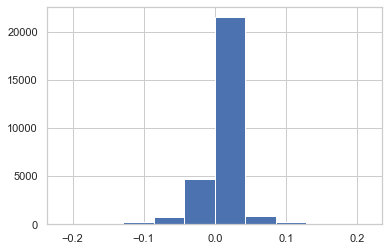

In [52]:
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U7M'] = acum['listados_percent'].apply(lambda _: np.polyfit(list(range(1, 8)), _[-7:], 1)[0])
acum['GRUPO_ECON_TIENE_TENDENCIA_AUMENTO_CLASIF_NO_NORMAL_U7M'] = acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U7M'].apply(lambda _: _ > 0)
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U7M'].hist()

<AxesSubplot:>

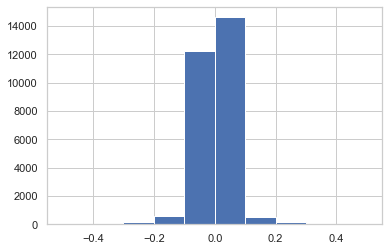

In [53]:
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U3M'] = acum['listados_percent'].apply(lambda _: np.polyfit(list(range(1, 4)), _[-3:], 1)[0])
acum['GRUPO_ECON_TIENE_TENDENCIA_AUMENTO_CLASIF_NO_NORMAL_U3M'] = acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U3M'].apply(lambda _: _ > 0)
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U3M'].hist()

In [54]:
acum['GRUPO_ECON_MANTIENE_TENDENCIA_CLASIF_NO_NORMAL'] = acum[['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U3M', 'TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U7M']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)

acum['GRUPO_ECON_MANTIENE_TENDENCIA_FUERTE_CLASIF_NO_NORMAL'] = acum[['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U3M', 'TENDENCIA_PERCENT_CLASIF_NO_NORMAL_GRUPO_ECON_U7M']].apply(
    lambda _: _[0] > 0.001 and _[1] > 0.001, axis=1
).astype(int)

pd.crosstab(
    acum['GRUPO_ECON_MANTIENE_TENDENCIA_CLASIF_NO_NORMAL'], acum['PERIODO']
)

PERIODO,202007,202008,202009,202010,202011
GRUPO_ECON_MANTIENE_TENDENCIA_CLASIF_NO_NORMAL,,,,,
0,5431,5339,5411,5423,5445
1,246,338,266,254,232


In [55]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
base = base.merge(
    acum, how='left', on=['PERIODO', 'DES_GRUPO_ECONOMICO']
)
base.shape

(9211, 70)

## ANALISIS SEI MERCADO

In [56]:
ge = """
    SELECT * FROM ODS.HD_VMVP_VPC_SEI_ALERTA_CARTERA WITH (NOLOCK)
"""
ge = pd.read_sql(
   ge , connection_market
)
ge['PERCENT_SEI_VPC_SEGUIR'] = ge['NRO_FEVE_SEGUIR'] / ge['NRO_MISMO_SEI']
ge['PERCENT_SEI_VPC_FEVE_DURO'] = ge['NRO_FEVE_DURO'] / ge['NRO_MISMO_SEI']
ge['PERCENT_SEI_VPC_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'] / ge['NRO_MISMO_SEI']

ge.head()

,SEI_MCDO,PERIODO,NRO_MISMO_SEI,NRO_CLASIF_NO_NORMAL,NRO_FEVE_DURO,NRO_FEVE_SEGUIR,PERCENT_SEI_VPC_SEGUIR,PERCENT_SEI_VPC_FEVE_DURO,PERCENT_SEI_VPC_NO_CLASIF_NORMAL
0,AUTOMOTRIZ VEHÍCULOS,202010,2408,1007,28,32,0.013289,0.011628,0.418189
1,AUTOMOTRIZ VEHÍCULOS,202001,2383,930,25,28,0.011750,0.010491,0.390264
2,AUTOMOTRIZ VEHÍCULOS,202011,2409,1020,27,36,0.014944,0.011208,0.423412
3,AUTOMOTRIZ VEHÍCULOS,202002,2383,930,25,28,0.011750,0.010491,0.390264
4,AUTOMOTRIZ VEHÍCULOS,202006,2388,995,26,30,0.012563,0.010888,0.416667


<AxesSubplot:>

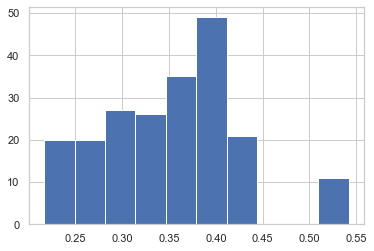

In [57]:
ge['PERCENT_SEI_VPC_NO_CLASIF_NORMAL'].hist()

<AxesSubplot:>

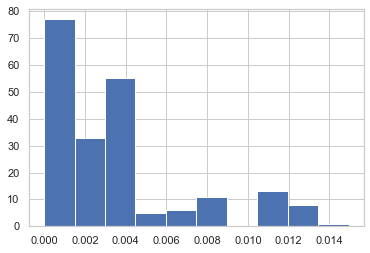

In [58]:
ge['PERCENT_SEI_VPC_SEGUIR'].hist()

In [59]:
top_percent_seguir = ge['PERCENT_SEI_VPC_SEGUIR'].quantile(0.9)
top_percent_seguir

0.010997105485923381

In [60]:
ge[ge['PERCENT_SEI_VPC_SEGUIR'] >= top_percent_seguir]['SEI_MCDO'].unique()

array(['AUTOMOTRIZ VEHÍCULOS', 'PESCA'], dtype=object)

In [61]:
ge['SEI_TOP_PERCENT_FEVE_SEGUIR'] = ge['PERCENT_SEI_VPC_SEGUIR'].apply(lambda _: _ >= top_percent_seguir).astype(int)
ge['TIENE_10PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _ >= 0.1).astype(int)
ge['TIENE_20PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _ >= 0.2).astype(int)
ge['TIENE_25PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _ >= 0.25).astype(int)
ge['TIENE_30PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _ >= 0.3).astype(int)
ge['TIENE_35PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _ >= 0.35).astype(int)
ge['TIENE_40PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _ >= 0.4).astype(int)
ge['TIENE_45PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _ >= 0.45).astype(int)

del ge['NRO_CLASIF_NO_NORMAL']
del ge['NRO_FEVE_SEGUIR']
del ge['NRO_FEVE_DURO']
del ge['NRO_MISMO_SEI']

ge.head()

,SEI_MCDO,PERIODO,PERCENT_SEI_VPC_SEGUIR,PERCENT_SEI_VPC_FEVE_DURO,PERCENT_SEI_VPC_NO_CLASIF_NORMAL,SEI_TOP_PERCENT_FEVE_SEGUIR,TIENE_10PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_20PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_25PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_30PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_35PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_40PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_45PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL
0,AUTOMOTRIZ VEHÍCULOS,202010,0.013289,0.011628,0.418189,1,1,1,1,1,1,1,1
1,AUTOMOTRIZ VEHÍCULOS,202001,0.011750,0.010491,0.390264,1,1,1,1,1,1,1,1
2,AUTOMOTRIZ VEHÍCULOS,202011,0.014944,0.011208,0.423412,1,1,1,1,1,1,1,1
3,AUTOMOTRIZ VEHÍCULOS,202002,0.011750,0.010491,0.390264,1,1,1,1,1,1,1,1
4,AUTOMOTRIZ VEHÍCULOS,202006,0.012563,0.010888,0.416667,1,1,1,1,1,1,1,1


In [62]:
ge['PERIODO'] = ge['PERIODO'].astype(str)
base = base.merge(
    ge, how='left', on=['PERIODO', 'SEI_MCDO']
)
base.shape

(9211, 81)

In [63]:
acum = generate_listado_u3m(
    ge, 'listados_percent', values='PERCENT_SEI_VPC_NO_CLASIF_NORMAL',
    index=['SEI_MCDO'], columns=['PERIODO'], aggfunc=np.max
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(19, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(38, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(57, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(76, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(95, 3)


,SEI_MCDO,listados_percent,PERIODO
0,AGROPECUARIO,"[0.3509020040702287, 0.3509020040702287, 0.382...",202007
1,AUTOMOTRIZ VEHÍCULOS,"[0.39026437263953, 0.39026437263953, 0.4182046...",202007
2,COMERCIO,"[0.3059329066581786, 0.3059329066581786, 0.367...",202007
3,CONSTRUCCIÓN,"[0.3151241934058163, 0.3151241934058163, 0.380...",202007
4,EDUCACIÓN,"[0.2723090367019636, 0.2723090367019636, 0.276...",202007


<AxesSubplot:>

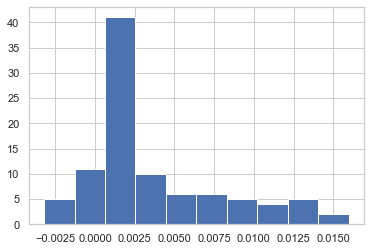

In [64]:
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U7M'] = acum['listados_percent'].apply(lambda _: np.polyfit(list(range(1, 8)), _[-7:], 1)[0])
acum['TENDENCIA_DE_AUMENTO_CLASIF_NO_NORMAL_SEI_U7M'] = acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U7M'].apply(lambda _: _> 0).astype(int)
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U7M'].hist()

<AxesSubplot:>

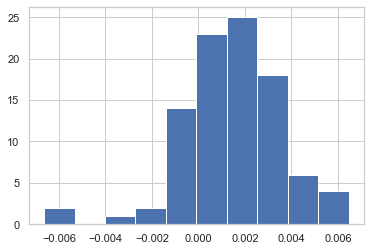

In [65]:
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U3M'] = acum['listados_percent'].apply(lambda _: np.polyfit(list(range(1, 4)), _[-3:], 1)[0])
acum['TENDENCIA_DE_AUMENTO_CLASIF_NO_NORMAL_SEI_U3M'] = acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U3M'].apply(lambda _: _> 0).astype(int)
acum['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U3M'].hist()

In [66]:
acum['SEI_MANTIENE_TENDENCIA_CRECIENTE_FUERTE_CLASIF_NO_NORMAL'] = acum[['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U3M', 'TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U7M']].apply(
    lambda _: _[0] > 0.001 and _[1] > 0.001, axis=1
).astype(int)

acum['SEI_MANTIENE_TENDENCIA_CRECIENTE_CLASIF_NO_NORMAL'] = acum[['TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U3M', 'TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U7M']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)

pd.crosstab(
    acum['SEI_MANTIENE_TENDENCIA_CRECIENTE_CLASIF_NO_NORMAL'], acum['PERIODO']
)

PERIODO,202007,202008,202009,202010,202011
SEI_MANTIENE_TENDENCIA_CRECIENTE_CLASIF_NO_NORMAL,,,,,
0,11,3,3,4,2
1,8,16,16,15,17


In [67]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
base = base.merge(
    acum, how='left', on=['PERIODO', 'SEI_MCDO']
)
base.shape

(9211, 88)

In [68]:
#cols_new_dataFrame = list(new_dataFrame.columns)
#print('cols_new_dataFrame :', cols_new_dataFrame)

#for cliente in base['COD_UNICO'].unique():
    
#    data_cliente = base[base['COD_UNICO'] == cliente]
#    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(int)
#    data_cliente = data_cliente.set_index('PERIODO').reindex(rango_general_int).reset_index()
#    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(str)
#    data_cliente['COD_UNICO'] = cliente
    
#    new_dataFrame = pd.concat(
#        [new_dataFrame[cols_new_dataFrame], data_cliente[cols_new_dataFrame]], axis=0
#    )

#del data_cliente
#base = new_dataFrame.copy()
#del new_dataFrame

#new_dataFrame['PERIODO'].value_counts()

In [69]:
#base = new_dataFrame.merge(
#    base[['COD_UNICO', 'BUCKET', 'FEVE_FICHA', 'ESTADO_FICHA', 'RIESGO', 'TICKET_PROMEDIO_EN_RIESGO', 'UNIVERSO_MESA']],
#    how='left', on=['COD_UNICO']
#)
#del new_dataFrame
base['PERIODO'].value_counts()

202007    1923
202008    1882
202009    1832
202010    1801
202011    1773
Name: PERIODO, dtype: int64

In [70]:
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_35PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_40PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,TIENE_45PERCENT_O_MAS_SEI_NO_CLASIF_NORMAL,listados_percent_y,TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U7M,TENDENCIA_DE_AUMENTO_CLASIF_NO_NORMAL_SEI_U7M,TENDENCIA_PERCENT_CLASIF_NO_NORMAL_SEI_U3M,TENDENCIA_DE_AUMENTO_CLASIF_NO_NORMAL_SEI_U3M,SEI_MANTIENE_TENDENCIA_CRECIENTE_FUERTE_CLASIF_NO_NORMAL,SEI_MANTIENE_TENDENCIA_CRECIENTE_CLASIF_NO_NORMAL
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,1,1,1,"[0.2784560918449283, 0.2784560918449283, 0.327...",0.008768,1,-0.000727,0,0,0
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,1,1,1,"[0.3059329066581786, 0.3059329066581786, 0.367...",0.011905,1,-0.000835,0,0,0
2,202008,0001420892,20132091979,1,TAWA,0,0,0,0,0,...,1,1,1,"[0.3059329066581786, 0.3059329066581786, 0.367...",0.007770,1,0.002869,1,1,1
3,202008,0008391729,20103668876,1,REPRESENTACIONES Y DISTRIBUCIONES DEL,1,0,0,0,0,...,1,1,1,"[0.3059329066581786, 0.3059329066581786, 0.367...",0.007770,1,0.002869,1,1,1
4,202008,0008401169,20109104397,1,LIMPIEZA Y APOYO DE PERSONAL,0,0,1,0,0,...,1,1,1,"[0.2784560918449283, 0.2784560918449283, 0.327...",0.005531,1,0.002822,1,1,1


In [71]:
base.shape

(9211, 88)

In [72]:
#[col for col in base.columns if 'preocupa' in col.lower()]

In [73]:
#base[base['COD_UNICO'] == '0011702929'].sort_values(by=['PERIODO'])

In [74]:
base['CLASIF_NO_NORMAL'] = base['CLASIF_NO_NORMAL'].astype(int)

### LINEAS

In [75]:
sql0 = """
    SELECT *
    FROM ODS.HD_VMVP_LINEAS_ALERTAS_CARTERA_BE
"""
lineas = pd.read_sql(
   sql0 , connection_market
)
lineas.head(2)

,PERIODO,COD_UNICO,BANCAZONAL,MAX_VENCIMIENTO,MONTOAPROBADO,MONTODISPONIBLE,MONTOUTILIZADO,ESTADO_LINEA,ESTADO_PROYECTADO
0,201902,0012904813,None,2019-07-15,NaN,NaN,NaN,VIGENTE,VIGENTE
1,201902,0013226945,None,2019-06-15,NaN,NaN,NaN,VIGENTE,VIGENTE


In [76]:
lineas['PERIODO'].max(), lineas['PERIODO'].min()

('202012', '201901')

In [77]:
#lineas[lineas['COD_UNICO'] == '0000002469'].sort_values(by=['PERIODO'])

#### Buscando viegentes

In [78]:
acum = generate_listado_u3m(
    lineas[lineas['ESTADO_LINEA'] == 'VIGENTE'], 'listados_vigentes', values='MAX_VENCIMIENTO',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=len
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1443, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(2886, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(4329, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(5772, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(7215, 3)


,COD_UNICO,listados_vigentes,PERIODO
0,0000002469,"[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]",202007
1,0000003392,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]",202007
2,0000006114,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202007
3,0000008318,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",202007
4,0000037374,"[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",202007


In [79]:





acum.tail(5)

,COD_UNICO,listados_vigentes,PERIODO
1438,0017008569,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",202011
1439,0017122537,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]",202011
1440,0017232155,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]",202011
1441,0017239443,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",202011
1442,0017311917,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",202011


In [80]:
def searhc_no_zero(lista):
    meses = 0
    for val in lista[::-1]:
        if val > 0:
            return meses
        meses += 1
    
    return meses

acum['NO_TIENE_LINEA_VIGENTE_MES_ACTUAL'] = acum['listados_vigentes'].apply(lambda _: _[-1] == 0).astype(int)
acum['TIENE_LINEAS_VIGENTES_MES_ACTUAL'] = acum['listados_vigentes'].apply(lambda _: _[-1] == 1).astype(int)
acum['NRO_MESES_SIN_LINEA_VIGENTE'] = acum['listados_vigentes'].apply(searhc_no_zero).astype(int)
acum['TIENE_UNA_O_MAS_LINEAS_VIGENTES_U2M'] = acum['listados_vigentes'].apply(lambda _: _[-1] > 0 or _[-2] > 0).astype(int)
acum['TIENE_UNA_O_MAS_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: _[-1] > 0 or _[-2] > 0 or _[-3] > 0).astype(int)
acum['TIENE_2MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ == 2).astype(int)
acum['TIENE_3MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ == 3).astype(int)
acum['TIENE_3MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ == 3).astype(int)
acum['TIENE_MAS_DE_1MES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 1).astype(int)
acum['TIENE_MAS_DE_2MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 2).astype(int)
acum['TIENE_MAS_DE_3MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 3).astype(int)
acum['TIENE_MAS_DE_4MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 4).astype(int)
acum['TIENE_MAS_DE_5MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 5).astype(int)
acum['TIENE_MAS_DE_6MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 6).astype(int)
del acum['listados_vigentes']
acum.tail()

,COD_UNICO,PERIODO,NO_TIENE_LINEA_VIGENTE_MES_ACTUAL,TIENE_LINEAS_VIGENTES_MES_ACTUAL,NRO_MESES_SIN_LINEA_VIGENTE,TIENE_UNA_O_MAS_LINEAS_VIGENTES_U2M,TIENE_UNA_O_MAS_LINEAS_VIGENTES_U3M,TIENE_2MESES_SIN_LINEA_VIGENTE,TIENE_3MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_1MES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_2MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_3MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_4MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_5MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_6MESES_SIN_LINEA_VIGENTE
1438,0017008569,202011,1,0,1,1,1,0,0,0,0,0,0,0,0
1439,0017122537,202011,0,1,0,1,1,0,0,0,0,0,0,0,0
1440,0017232155,202011,0,1,0,1,1,0,0,0,0,0,0,0,0
1441,0017239443,202011,0,1,0,1,1,0,0,0,0,0,0,0,0
1442,0017311917,202011,0,1,0,1,1,0,0,0,0,0,0,0,0


In [81]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
base = base.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(9211, 101)

In [82]:
#assert  False

### LINEAS ORIGEN (WBC_LINEAS)

In [83]:
sql0 = """
    SELECT *
    FROM ODS.HD_VMVP_LINEAS_ORIGEN_ALERTAS_CARTERA_BE
"""
lineas = pd.read_sql(
   sql0 , connection_market
)
lineas.head(2)

,PERIODO,COD_UNICO,BANCAZONAL,NRO_LINEA,FECHARENOVACION,FECHAVENCIMIENTO,MONTOAPROBADO,MONTODISPONIBLE,MONTOUTILIZADO,ESTADO_LINEA,ESTADO_PROYECTADO
0,201912,0010887711,None,38003403,2018-12-07,2019-03-05,227000.0,12308.5041,177022.3263,VENCIDA,VENCIDA
1,201912,0001959808,EMPRESA,37003496,2019-10-04,2020-04-15,300000.0,20000.0000,0.0000,VIGENTE,VIGENTE


In [84]:

acum = generate_listado_u3m(
    lineas[lineas['ESTADO_LINEA'] == 'VIGENTE'], 'listados_vigentes', values='NRO_LINEA',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=len
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1812, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(3624, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(5436, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(7248, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9060, 3)


,COD_UNICO,listados_vigentes,PERIODO
0,0000002469,"[1, 1, 1, 1, 0, 0, 2, 2, 2, 2]",202007
1,0000003392,"[4, 4, 5, 5, 6, 7, 7, 8, 7, 7]",202007
2,0000006114,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",202007
3,0000008318,"[5, 5, 6, 6, 6, 7, 7, 7, 7, 7]",202007
4,0000037374,"[3, 3, 3, 3, 3, 3, 4, 4, 4, 3]",202007


In [85]:
acum.tail()

,COD_UNICO,listados_vigentes,PERIODO
1807,0017232155,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]",202011
1808,0017239443,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",202011
1809,0017311917,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2]",202011
1810,0017316313,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",202011
1811,0017415833,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202011


In [86]:
acum['TIENE_MENOR_NRO_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: _[-3] >= _[-2] and _[-2 ] > _[-1] ).astype(int)
acum['TIENE_MAYOR_NRO_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: _[-3] <= _[-2] and _[-2 ] < _[-1] ).astype(int)
acum['TIENE_DIMINUCION_1_LINEA_VIGENTE_MES_ANT'] = acum['listados_vigentes'].apply(lambda _: _[-2 ] - _[-1] == 1).astype(int)
acum['TIENE_DIMINUCION_2_LINEAS_VIGENTES_MES_ANT'] = acum['listados_vigentes'].apply(lambda _: _[-2 ] - _[-1] == 2).astype(int)
acum['TIENE_1_LINEA_VIGENTE_U3M'] = acum['listados_vigentes'].apply(lambda _: sum(_[-3:]) / 3 <= 1 and sum(_[-3:]) / 3 > 0).astype(int)
acum['TIENE_2_LINEA_VIGENTE_U3M'] = acum['listados_vigentes'].apply(lambda _: sum(_[-3:]) / 3 <= 2 and sum(_[-3:]) / 3 > 1).astype(int)
acum['TIENE_MAS_DE_2_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: sum(_[-3:]) / 3 > 2).astype(int)
acum['TIENE_MAS_DE_3_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: sum(_[-3:]) / 3 > 3).astype(int)
acum['TIENE_MAS_DE_4_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: sum(_[-3:]) / 3 > 4).astype(int)
del acum['listados_vigentes']
acum.tail()

,COD_UNICO,PERIODO,TIENE_MENOR_NRO_LINEAS_VIGENTES_U3M,TIENE_MAYOR_NRO_LINEAS_VIGENTES_U3M,TIENE_DIMINUCION_1_LINEA_VIGENTE_MES_ANT,TIENE_DIMINUCION_2_LINEAS_VIGENTES_MES_ANT,TIENE_1_LINEA_VIGENTE_U3M,TIENE_2_LINEA_VIGENTE_U3M,TIENE_MAS_DE_2_LINEAS_VIGENTES_U3M,TIENE_MAS_DE_3_LINEAS_VIGENTES_U3M,TIENE_MAS_DE_4_LINEAS_VIGENTES_U3M
1807,0017232155,202011,0,0,0,0,1,0,0,0,0
1808,0017239443,202011,0,0,0,0,1,0,0,0,0
1809,0017311917,202011,0,0,0,0,0,1,0,0,0
1810,0017316313,202011,0,1,0,0,1,0,0,0,0
1811,0017415833,202011,0,0,0,0,0,0,0,0,0


In [87]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
base = base.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(9211, 110)

## NRO DE TRBAJADORES

In [88]:
sql_ = """
    SELECT *
    FROM ODS.MM_SUNAT_CANT_TRABAJADORES
"""
workers = pd.read_sql(
   sql_ , connection_market
)
workers.head(2)

,RUC,PERIODO,NRO_TRABAJADORES,NRO_PENSIONISTAS,NRO_PRESTADORES_SERVICIO,FECHA_CARGA
0,20100456495,201910,83.0,0.0,5.0,2020-12-02 10:14:00
1,20100456495,201911,82.0,0.0,6.0,2020-12-02 10:14:00


In [89]:
# Se auemnta un periodo por el desfase de la información
workers['PERIODO'] = workers['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)

In [90]:
workers['PERIODO'].value_counts().sort_index()

201911    5427
201912    5427
202001    5427
202002    5427
202003    5427
202004    5427
202005    5427
202006    5427
202007    5427
202008    5427
202009    5427
202010    5427
Name: PERIODO, dtype: int64

In [91]:
acum = generate_listado_u3m(
    workers, 'listados_workers', values='NRO_TRABAJADORES', index=['RUC'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(5427, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(10854, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(16281, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(21708, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(27135, 3)


,RUC,listados_workers,PERIODO
0,10010600338,"[23, 23, 23, 22, 21, 21, 21, 21, 22]",202007
1,10011158809,"[0, 0, 0, 0, 0, 0, 0, 0, 0]",202007
2,10011231581,"[6, 6, 6, 6, 6, 6, 6, 6, 6]",202007
3,10012050017,"[15, 15, 15, 13, 13, 14, 13, 13, 13]",202007
4,10028719596,"[0, 0, 0, 18, 18, 21, 3, 3, 2]",202007


In [92]:
def get_percent_(lista, treshold):
    media_hace_7m =(lista[-7] + lista[-6]) / 2
    ultimo_mes = lista[-1]
    
    if not media_hace_7m:
        return 0
    
    return ultimo_mes/media_hace_7m <= treshold

acum['TIENE_DISMINUCION_PERSONAL_COMP_10MATRAS'] = acum['listados_workers'].apply(lambda _: (_[0] - _[-1]) > 0 ).astype(int)
acum['TENDENCIA_COMPORTAMIENTO_NRO_TRABAJADORES_SUNAT'] = acum['listados_workers'].apply(lambda _: np.polyfit(list(range(1, 8)), _[-7:], 1)[0])
acum['TENDENCIA_A_DISMINUIR_NRO_TRABAJADORES_SUNAT_U7M'] = acum['TENDENCIA_COMPORTAMIENTO_NRO_TRABAJADORES_SUNAT'].apply(lambda _: _ < 0).astype(int)

acum['TIENE_DISMINUCION_PERSONAL_10PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.9)).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_20PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.8)).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_30PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.7)).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_40PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.6)).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_50PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.5)).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_60PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.4)).astype(int)
acum['NO_TIENE_TRABAJADORES_REGISTRADOS'] = acum['listados_workers'].apply(lambda _: sum(_) == 0).astype(int)
del acum['listados_workers']

acum.head()

,RUC,PERIODO,TIENE_DISMINUCION_PERSONAL_COMP_10MATRAS,TENDENCIA_COMPORTAMIENTO_NRO_TRABAJADORES_SUNAT,TENDENCIA_A_DISMINUIR_NRO_TRABAJADORES_SUNAT_U7M,TIENE_DISMINUCION_PERSONAL_10PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_20PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_30PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_40PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_50PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_60PERCENT_A_MAS_U7M,NO_TIENE_TRABAJADORES_REGISTRADOS
0,10010600338,202007,1,-1.785714e-01,1,0,0,0,0,0,0,0
1,10011158809,202007,0,0.000000e+00,0,0,0,0,0,0,0,1
2,10011231581,202007,0,-3.002591e-16,1,0,0,0,0,0,0,0
3,10012050017,202007,1,-2.142857e-01,1,0,0,0,0,0,0,0
4,10028719596,202007,0,-1.392857e+00,1,1,1,1,1,1,1,0


In [93]:
acum['RUC'] = acum['RUC'].astype(str)
acum['PERIODO'] = acum['PERIODO'].astype(str)

base = base.merge(
    acum, how='left', on=['PERIODO', 'RUC']
)
base.shape

(9211, 120)

In [94]:
def get_div_means_perios(val_anio_act , val_anio_pas):
    if pd.isnull(val_anio_act) or not val_anio_act:
        return 0
    
    if pd.isnull(val_anio_pas) or not val_anio_pas:
        return val_anio_act
    
    return val_anio_act / val_anio_pas

# REACTIVA

In [95]:
sql1 = """
    SELECT * FROM ODS.HD_VMVP_REACTIVA_IBK_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""
interno_reactiva_ibk = pd.read_sql(
   sql1 , connection_market
)
interno_reactiva_ibk.head(2)

,ESTADO_DESEMBOLSO,CERTIFICADO,FECHA_FIN_CREDITO,FECHA_DESEMBOLSO,PERIODO,HORARIO,TIP_DOC,NUM_DOC,RAZON_SOCIAL,APE_PATERNO,...,FLG_DJ_REACTIVA_1,TIPO_REACTIVA,FLG_TOMO_REACTIVA_1,MONTO_PRESTAMO_REACTIVA_1,FLG_REGIMEN_RUS,INGRESOS_MENSUAL_2019_PROMEDIO,COMPRAS_MENSUAL_2019_PROMEDIO,FLG_DJ_ANEXO_4,FLG_DJ_REQUISITOS,FLG_RP
0,Desembolsado,CGAR2-2020-0106674,2023-07-14,2020-07-29,20200716,11:12:00,RUC,20510913371,COINREFRI AIR,,...,1.0,2,2.0,2200551.0,0.0,0.0,0.0,1.0,1.0,1
1,Desembolsado,CGAR2-2020-0106679,2023-07-09,2020-07-24,20200716,11:12:00,RUC,20516485524,BFX,,...,1.0,2,1.0,1117000.0,0.0,0.0,0.0,1.0,1.0,1


In [96]:
interno_reactiva_ibk['PERIODO'] = interno_reactiva_ibk['FECHA_DESEMBOLSO'].apply(lambda _: int(_.replace('-', '')[:6]))
interno_reactiva_ibk['PERIODO'].value_counts(dropna=False)

202005    626
202007    170
202006    153
202008    117
202009     37
202010     13
202011      2
Name: PERIODO, dtype: int64

In [97]:
pivoteo = pd.pivot_table(
    interno_reactiva_ibk[['CODUNICOCLI', 'PERIODO', 'TIPO_REACTIVA']], 
    index=['CODUNICOCLI'], columns=['PERIODO'], aggfunc=len, values='TIPO_REACTIVA',fill_value=0
)
pivoteo.head()

PERIODO,202005,202006,202007,202008,202009,202010,202011
CODUNICOCLI,,,,,,,
0000002469,0,0,0,1,0,0,0
0000006114,1,0,0,0,0,0,0
0000008318,0,0,1,0,0,0,0
0000039982,0,0,1,0,0,0,0
0000046268,1,0,1,0,0,0,0


In [98]:
columnas_ordenadas = sorted(pivoteo.columns, reverse=False)

for col in columnas_ordenadas[1:]:
    posicion_columna = columnas_ordenadas.index(col)
    #print(posicion_columna)
    print(posicion_columna, col, columnas_ordenadas[posicion_columna -1])
    pivoteo[col] = pivoteo[
        [columnas_ordenadas[posicion_columna -1], col]
    ].sum(axis=1)

pivoteo.head()

1 202006 202005
2 202007 202006
3 202008 202007
4 202009 202008
5 202010 202009
6 202011 202010


PERIODO,202005,202006,202007,202008,202009,202010,202011
CODUNICOCLI,,,,,,,
0000002469,0,0,0,1,1,1,1
0000006114,1,1,1,1,1,1,1
0000008318,0,0,1,1,1,1,1
0000039982,0,0,1,1,1,1,1
0000046268,1,1,2,2,2,2,2


In [99]:
pivoteo = pivoteo.unstack().reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'NRO_VECES_REACTIVA_IBK']
pivoteo['TIENE_REACTIVA_IBK'] = pivoteo['NRO_VECES_REACTIVA_IBK'].apply(lambda _: _ > 0).astype(int)
pivoteo['TIENE_REACTIVA1_REACTIVA2_IBK'] = pivoteo['NRO_VECES_REACTIVA_IBK'].apply(lambda _: _ > 1).astype(int)

display(pivoteo['TIENE_REACTIVA1_REACTIVA2_IBK'].value_counts(dropna=False))
pivoteo.head(3)

0    4177
1    1549
Name: TIENE_REACTIVA1_REACTIVA2_IBK, dtype: int64

,PERIODO,COD_UNICO,NRO_VECES_REACTIVA_IBK,TIENE_REACTIVA_IBK,TIENE_REACTIVA1_REACTIVA2_IBK
0,202005,0000002469,0,0,0
1,202005,0000006114,1,1,0
2,202005,0000008318,0,0,0


In [100]:
pivoteo['PERIODO'] = pivoteo['PERIODO'].astype(str)
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(9211, 123)

### REACTIVA RCC

In [101]:
sql_reactiva_rcc = """
    SELECT * FROM ODS.HD_VMVP_REACTIVARCC_ALERTAS_CARTERA_BE
"""
reactiva = pd.read_sql(
   sql_reactiva_rcc , connection_market
)

## Se le suma un mes para que la info de rcc se use el mes siguiente
reactiva['PERIODO'] = reactiva['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
pivoteo = pd.pivot_table(
    reactiva[['COD_UNICO', 'PERIODO', 'NBR_EMPRESA']], 
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=len, values='NBR_EMPRESA',fill_value=0
)

del reactiva
pivoteo.head()

PERIODO,202006,202007,202008,202009,202010
COD_UNICO,,,,,
0000006114,1,1,1,1,1
0000043778,2,2,2,2,2
0000054320,1,1,1,2,3
0000056036,1,1,1,1,1
0000158733,2,2,2,2,2


In [102]:
pivoteo = pivoteo.unstack().reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'NRO_VECES_REACTIVA_SF']
pivoteo['TIENE_REACTIVA_SF'] = pivoteo['NRO_VECES_REACTIVA_SF'].apply(lambda _: _ > 0).astype(int)
pivoteo['TIENE_REACTIVA1_REACTIVA2_SF'] = pivoteo['NRO_VECES_REACTIVA_SF'].apply(lambda _: _ > 1).astype(int)

display(pivoteo['TIENE_REACTIVA1_REACTIVA2_SF'].value_counts(dropna=False))
pivoteo.head(3)

1    2016
0    1529
Name: TIENE_REACTIVA1_REACTIVA2_SF, dtype: int64

,PERIODO,COD_UNICO,NRO_VECES_REACTIVA_SF,TIENE_REACTIVA_SF,TIENE_REACTIVA1_REACTIVA2_SF
0,202006,0000006114,1,1,0
1,202006,0000043778,2,1,1
2,202006,0000054320,1,1,0


In [103]:
pivoteo['PERIODO'] = pivoteo['PERIODO'].astype(str)
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(9211, 126)

In [104]:
base.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_DISMINUCION_PERSONAL_40PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_50PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_60PERCENT_A_MAS_U7M,NO_TIENE_TRABAJADORES_REGISTRADOS,NRO_VECES_REACTIVA_IBK,TIENE_REACTIVA_IBK,TIENE_REACTIVA1_REACTIVA2_IBK,NRO_VECES_REACTIVA_SF,TIENE_REACTIVA_SF,TIENE_REACTIVA1_REACTIVA2_SF
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.0,1.0,1.0
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0


In [105]:
for col in [_ for _ in base.columns if 'REACTIVA' in _.upper()]:
    base[col] = base[col].fillna(0)

base['TIENE_REACTIVA_CON_OTRA_EF'] = base[['TIENE_REACTIVA_SF', 'TIENE_REACTIVA_IBK']].apply(lambda _: 1 if _[0] == 1 and _[1] == 0 else 0, axis=1)
base['TIENE_REACTIVA_1_2_CON_OTRAS_EF'] = base[['TIENE_REACTIVA1_REACTIVA2_SF', 'TIENE_REACTIVA_IBK']].apply(
    lambda _: 1 if _[0] == 1 and _[1] == 0 else 0, axis=1)

base['TIENE_REACTIVA_SF']  = base[['TIENE_REACTIVA_SF', 'TIENE_REACTIVA_IBK']].apply(lambda _: 1 if _[0] == 0 and _[1] == 1 else 0, axis=1) #si tiene reactiva en IBK --> entonces tambien SF en dos mese adlante

base['TIENE_SOLO_1_CREDITO_REACTIVA_SF'] = base['NRO_VECES_REACTIVA_SF'].apply(lambda _: _ == 1).astype(int)
base['TIENE_REACTIVA_CON_OTRA_EF'].value_counts()

0    7817
1    1394
Name: TIENE_REACTIVA_CON_OTRA_EF, dtype: int64

In [106]:
base['TIENE_REACTIVA_1_2_CON_OTRAS_EF'].value_counts(dropna=False)

0    7896
1    1315
Name: TIENE_REACTIVA_1_2_CON_OTRAS_EF, dtype: int64

In [107]:
base['TIENE_SOLO_1_CREDITO_REACTIVA_SF'].value_counts(dropna=False)

0    8131
1    1080
Name: TIENE_SOLO_1_CREDITO_REACTIVA_SF, dtype: int64

#### Review Cosechas JUlio y Agosto - REACTIVA IBK

In [108]:
base[base['PERIODO'].astype(int) >= 202007]['TIENE_REACTIVA_IBK'].value_counts()

0.0    5559
1.0    3652
Name: TIENE_REACTIVA_IBK, dtype: int64

In [109]:
base.isnull().sum()

PERIODO                             0
COD_UNICO                           0
RUC                                 0
FLG_VIGENTE                         0
NOMBRE_COMPLETO                     0
                                   ..
TIENE_REACTIVA_SF                   0
TIENE_REACTIVA1_REACTIVA2_SF        0
TIENE_REACTIVA_CON_OTRA_EF          0
TIENE_REACTIVA_1_2_CON_OTRAS_EF     0
TIENE_SOLO_1_CREDITO_REACTIVA_SF    0
Length: 129, dtype: int64

In [110]:
base.shape
base[base['PERIODO'].astype(int) >= 202007]['BUCKET'].value_counts()

1    4676
2    2438
4    1580
3     517
Name: BUCKET, dtype: int64

# TRANSACCIONES

In [111]:
import gc
gc.collect()

132

In [112]:
sql_trx_cliente = """
    SELECT * FROM ODS.HD_VMVP_TRANSACCION_CLIENTE_ALERTAS_CARTERA_BE
"""
transac_cliente = pd.read_sql(
   sql_trx_cliente , connection_market
)

print(transac_cliente.shape)
transac_cliente.groupby(by=['PERIODO']).size()

(176934, 9)


PERIODO
201904    7837
201905    8245
201906    8019
201907    8315
201908    8145
201909    8582
201910    8463
201911    8763
201912    8639
202001    8710
202002    8490
202003    8339
202004    6927
202005    8199
202006    8300
202007    8924
202008    8933
202009    8919
202010    8989
202011    9150
202012    8046
dtype: int64

In [113]:
transac_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION
0,2019,201908,0013222363,CASH IN,TABLERO,DEPOSITOS,1,100000.00,20190828
1,2019,201908,0013230742,CASH OUT,TABLERO,TRANSFERENCIAS,4,281530.02,20190816
2,2019,201908,0013268476,CASH IN,TABLERO,TRANSFERENCIAS,25,1242230.58,20190827
3,2019,201908,0013270981,CASH IN,TABLERO,OPERACIONES MESA,1,427309.77,20190813
4,2019,201908,0013270981,CASH OUT,TABLERO,TRANSFERENCIAS,16,7362426.95,20190827


#### REVIEW PERIODOS

In [114]:
transac_cliente.shape, transac_cliente.groupby(by=['PERIODO', 'COD_UNICO', 'TIPO_CASH', 'GRUPO_N1', 'KPI']).size().shape

((176934, 9), (176934,))

In [115]:
transac_cliente['COD_UNICO'].unique().shape

(1967,)

In [116]:
def get_kpi(val):
    if val == 'NO_CONS':
        return 'NO_TABLERO'
    elif val == 'TABLERO':
        return ''
    
    return val
        
transac_cliente['KPI'] = transac_cliente['KPI'].apply(get_kpi)
transac_cliente['KPI'].value_counts()

              129314
NO_TABLERO     47620
Name: KPI, dtype: int64

#### PIVOTEO GRUPO DE CASH_IN EN LA MISMA COSECHA

In [117]:
pivoteo = pd.pivot_table(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN'], 
    values='VOLUMEN_SOLES', index=['COD_UNICO'], columns=['GRUPO_N1', 'KPI', 'PERIODO'], aggfunc=np.sum, fill_value=0
)
print(pivoteo.shape)
pivoteo.head(2)

(1956, 169)


GRUPO_N1     COBRANZAS                                              \
KPI                                                                  
PERIODO         201904     201905     201906     201907     201908   
COD_UNICO                                                            
0000002469        0.00       0.00       0.00        0.0       0.00   
0000003392  1628254.71  790647.27  658597.38  1425572.6  924867.68   

GRUPO_N1                                                             ...  \
KPI                                                                  ...   
PERIODO         201909      201910     201911     201912     202001  ...   
COD_UNICO                                                            ...   
0000002469        0.00        0.00       0.00       0.00       0.00  ...   
0000003392  2674209.53  3306476.38  601537.18  635073.36  286165.18  ...   

GRUPO_N1   TRANSFERENCIAS                                                 \
KPI                                                                        
PERIODO            202003      202004      202005      202006     202007   
COD_UNICO                                                                  
0000002469           0.00        0.00        0.00     1731.00       0.00   
0000003392     1395662.98  1273436.14  2847147.57  1362382.15  573919.81   

GRUPO_N1                                                               
KPI                                                                    
PERIODO        202008      202009      202010      202011      202012  
COD_UNICO                                                              
0000002469        0.0   358400.00     1000.00        0.00        0.00  
0000003392  1300100.9  1642966.45  4399121.42  2864879.85  1744358.94  

[2 rows x 169 columns]

In [118]:
pivoteo = pivoteo.unstack().reset_index()
pivoteo.columns = ['GRUPO_N1', 'KPI', 'PERIODO', 'COD_UNICO', 'VOLUMEN_SOLES']
pivoteo.head()

,GRUPO_N1,KPI,PERIODO,COD_UNICO,VOLUMEN_SOLES
0,COBRANZAS,,201904,0000002469,0.00
1,COBRANZAS,,201904,0000003392,1628254.71
2,COBRANZAS,,201904,0000006114,0.00
3,COBRANZAS,,201904,0000008318,0.00
4,COBRANZAS,,201904,0000038026,0.00


In [119]:
pivoteo = pd.pivot_table(
    pivoteo, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['GRUPO_N1', 'KPI'], aggfunc=np.sum, fill_value=0
)

pivoteo.columns = ['_'.join(list(col)).replace(' ', '_') for col in pivoteo]
pivoteo['TOTAL'] = pivoteo.sum(axis=1)
print(pivoteo.shape)

pivoteo.head()

(41076, 10)


COBRANZAS_  DEPOSITOS_  OPERACIONES_MESA_  \
COD_UNICO  PERIODO                                              
0000002469 201904          0.0         0.0                0.0   
           201905          0.0         0.0                0.0   
           201906          0.0         0.0                0.0   
           201907          0.0         0.0                0.0   
           201908          0.0         0.0                0.0   

                    OPERACIONES_MESA_NO_TABLERO  OTROS_NO_TABLERO  \
COD_UNICO  PERIODO                                                  
0000002469 201904                           0.0         342654.51   
           201905                           0.0         148519.20   
           201906                           0.0         505101.87   
           201907                           0.0         259281.10   
           201908                           0.0              0.00   

                    PAGOS_RECIBIDOS_  POS_  RECAUDACION_  TRANSFERENCIAS_  \
COD_UNICO  PERIODO                                                          
0000002469 201904                0.0   0.0           0.0              0.0   
           201905                0.0   0.0           0.0          15000.0   
           201906                0.0   0.0           0.0          16655.0   
           201907                0.0   0.0           0.0          20000.0   
           201908                0.0   0.0           0.0              0.0   

                        TOTAL  
COD_UNICO  PERIODO             
0000002469 201904   342654.51  
           201905   163519.20  
           201906   521756.87  
           201907   279281.10  
           201908        0.00

In [120]:
pivoteo_grupo = pivoteo.reset_index()
pivoteo_grupo.head(3)

,COD_UNICO,PERIODO,COBRANZAS_,DEPOSITOS_,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGOS_RECIBIDOS_,POS_,RECAUDACION_,TRANSFERENCIAS_,TOTAL
0,0000002469,201904,0.0,0.0,0.0,0.0,342654.51,0.0,0.0,0.0,0.0,342654.51
1,0000002469,201905,0.0,0.0,0.0,0.0,148519.20,0.0,0.0,0.0,15000.0,163519.20
2,0000002469,201906,0.0,0.0,0.0,0.0,505101.87,0.0,0.0,0.0,16655.0,521756.87


In [121]:
for tramo in tramos:
    _3_meses_previos = tramo[3]
    _6_meses_previos = tramo[2]
    print(tramo[0], _6_meses_previos, _3_meses_previos, tramo[1][:-2])
    break

202007 [202002, 202003, 202004, 202005, 202006, 202007] [202005, 202006, 202007] [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]


In [122]:
#pivoteo_grupo[pivoteo_grupo['COD_UNICO'] == '0000006114']

In [123]:
contador = 1
dd = {
    'TOTAL': [list]
}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    #_6_meses_previos = tramo[2]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns = ['listado_cash_in_u3m']
    _3m_tipos = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).sum()
    _3m_tipos.columns = ['_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_tipos.columns]
    #_3m_actual = 
    #print(_3m_actual.head())
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    _3m_tipos = _3m_tipos.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_tipos['PERIODO'] = tramo[0]
    if contador == 1:
        acum_3 = _3m_actual.copy()
        sum_3 = _3m_tipos.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        sum_3 = pd.concat(
            [sum_3, _3m_tipos], axis=0
        )
        
    print(acum_3.shape, sum_3.shape)
    contador +=1
    del _3m_actual
    del _3m_tipos

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1956, 3) (1956, 12)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3912, 3) (3912, 12)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5868, 3) (5868, 12)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7824, 3) (7824, 12)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9780, 3) (9780, 12)


In [124]:
sum_3.head()

,COD_UNICO,COBRANZAS_,DEPOSITOS_,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGOS_RECIBIDOS_,POS_,RECAUDACION_,TRANSFERENCIAS_,TOTAL,PERIODO
0,0000002469,0.00,0.00,3457641.74,0.0,0.00,0.00,0.0,0.0,1731.00,3459372.74,202007
1,0000003392,277203.98,0.00,804910.00,0.0,0.00,0.00,0.0,0.0,4783449.53,5865563.51,202007
2,0000006114,0.00,121811.12,4647105.92,0.0,248.71,18433.94,0.0,0.0,29762.60,4817362.29,202007
3,0000008318,0.00,660.00,0.00,0.0,0.00,2875.03,0.0,0.0,0.00,3535.03,202007
4,0000038026,0.00,0.00,0.00,0.0,0.00,108810.00,0.0,0.0,14304.45,123114.45,202007


In [125]:
sum_3 = sum_3.set_index(['COD_UNICO', 'PERIODO'])
for col in sum_3.columns:
    sum_3[col] = sum_3[col] / sum_3['TOTAL']
    
del sum_3['TOTAL']

sum_3.columns = [('TRX_' + col).replace(' ', '_') + '_CASH_IN_PERCENT_U3M' for col in sum_3.columns]
sum_3 = sum_3.reset_index()
sum_3.head(3)

,COD_UNICO,PERIODO,TRX_COBRANZAS__CASH_IN_PERCENT_U3M,TRX_DEPOSITOS__CASH_IN_PERCENT_U3M,TRX_OPERACIONES_MESA__CASH_IN_PERCENT_U3M,TRX_OPERACIONES_MESA_NO_TABLERO_CASH_IN_PERCENT_U3M,TRX_OTROS_NO_TABLERO_CASH_IN_PERCENT_U3M,TRX_PAGOS_RECIBIDOS__CASH_IN_PERCENT_U3M,TRX_POS__CASH_IN_PERCENT_U3M,TRX_RECAUDACION__CASH_IN_PERCENT_U3M,TRX_TRANSFERENCIAS__CASH_IN_PERCENT_U3M
0,0000002469,202007,0.00000,0.000000,0.999500,0.0,0.000000,0.000000,0.0,0.0,0.000500
1,0000003392,202007,0.04726,0.000000,0.137226,0.0,0.000000,0.000000,0.0,0.0,0.815514
2,0000006114,202007,0.00000,0.025286,0.964658,0.0,0.000052,0.003827,0.0,0.0,0.006178


In [126]:
sum_3['PERIODO'] = sum_3['PERIODO'].astype(str)
base = base.merge(
    sum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del sum_3
base.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_SOLO_1_CREDITO_REACTIVA_SF,TRX_COBRANZAS__CASH_IN_PERCENT_U3M,TRX_DEPOSITOS__CASH_IN_PERCENT_U3M,TRX_OPERACIONES_MESA__CASH_IN_PERCENT_U3M,TRX_OPERACIONES_MESA_NO_TABLERO_CASH_IN_PERCENT_U3M,TRX_OTROS_NO_TABLERO_CASH_IN_PERCENT_U3M,TRX_PAGOS_RECIBIDOS__CASH_IN_PERCENT_U3M,TRX_POS__CASH_IN_PERCENT_U3M,TRX_RECAUDACION__CASH_IN_PERCENT_U3M,TRX_TRANSFERENCIAS__CASH_IN_PERCENT_U3M
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,0,0.0,0.235383,0.713469,0.0,0.000015,0.002467,0.0,0.0,0.048666
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,1,0.0,0.000000,0.080555,0.0,0.000034,0.682018,0.0,0.0,0.237392


In [127]:
acum_3.head(5)

,COD_UNICO,listado_cash_in_u3m,PERIODO
0,0000002469,"[0.0, 1731.0, 3457641.74]",202007
1,0000003392,"[2949657.57, 2341986.13, 573919.81]",202007
2,0000006114,"[15621.66, 1919693.49, 2882047.14]",202007
3,0000008318,"[230.1, 660.0, 2644.93]",202007
4,0000038026,"[7243.33, 0.0, 115871.12]",202007


In [128]:
lambda_caida_seguida_u3m = lambda _: ((_[1] < _[0] and _[2] < _[1]) or ( _[2] < _[0] and _[1] == 0) or ( _[2] < _[1] and _[0] == 0)) and _[2] > 100
lambda_subida_seguida_u3m = lambda _: _[1] > _[0] and _[2] > _[1]
lambda_caida_10_percent = lambda _: _[0] > 100 and _[2] / _[0] <= 0.9 and _[2] > 100
lambda_caida_20_percent = lambda _: _[0] > 100 and _[2] / _[0] <= 0.8 and _[2] > 100
lambda_caida_30_percent = lambda _: _[0] > 100 and _[2] / _[0] <= 0.7 and _[2] > 100
lambda_caida_40_percent = lambda _: _[0] > 100 and _[2] / _[0] <= 0.6 and _[2] > 100
lambda_caida_50_percent = lambda _: _[0] > 100 and _[2] / _[0] <= 0.5 and _[2] > 100
lambda_subida_10_percent = lambda _: _[0] > 100 and _[2] / _[0] >= 1.1 and _[2] > 100
lambda_subida_20_percent = lambda _: _[0] > 100 and _[2] / _[0] >= 1.2 and _[2] > 100
lambda_subida_30_percent = lambda _: _[0] > 100 and _[2] / _[0] >= 1.3 and _[2] > 100
lambda_subida_40_percent = lambda _: _[0] > 100 and _[2] / _[0] >= 1.4 and _[2] > 100
lambda_subida_50_percent = lambda _: _[0] > 100 and _[2] / _[0] >= 1.5 and _[2] > 100
lambda_min_u3m = lambda _: _[-1] == min([mes for mes in _]) and _[2] > 100
lambda_max_u3m = lambda _: _[2] > _[0] and _[2] >= _[1]
lambda_no_hay = lambda _: _[-1] < 100 and (_[-2] > 100 or  _[-3] > 100)
lambda_no_hay_u2m = lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] > 100
lambda_no_hay_u3m = lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] < 100

acum_3['TRX_CAIDA_SEGUIDA_U3M_CASH_IN'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_seguida_u3m).astype(int)
acum_3['TRX_CAIDA_10PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_10_percent).astype(int)
acum_3['TRX_CAIDA_20PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_20_percent).astype(int)
acum_3['TRX_CAIDA_30PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_30_percent).astype(int)
acum_3['TRX_CAIDA_40PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_40_percent).astype(int)
acum_3['TRX_CAIDA_50PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_50_percent).astype(int)

acum_3['TRX_SUBIDA_10PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_10_percent).astype(int)
acum_3['TRX_SUBIDA_20PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_20_percent).astype(int)
acum_3['TRX_SUBIDA_30PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_30_percent).astype(int)
acum_3['TRX_SUBIDA_40PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_40_percent).astype(int)
acum_3['TRX_SUBIDA_50PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_50_percent).astype(int)

acum_3['TRX_SUBIDA_SEGUIDA_U3M_CASH_IN'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_seguida_u3m).astype(int)
acum_3['TRX_MENOR_CASH_IN_DE_U3M'] = acum_3['listado_cash_in_u3m'].apply(lambda_min_u3m).astype(int)
acum_3['TRX_MAYOR_CASH_IN_DE_U3M'] = acum_3['listado_cash_in_u3m'].apply(lambda_max_u3m).astype(int)
acum_3['TRX_NO_CASH_IN_VPC_ESTE_MES'] = acum_3['listado_cash_in_u3m'].apply(lambda_no_hay).astype(int)
acum_3['TRX_NO_CASH_IN_VPC_U2M'] = acum_3['listado_cash_in_u3m'].apply(lambda_no_hay_u2m).astype(int)
acum_3['TRX_NO_CASH_IN_VPC_U3M'] = acum_3['listado_cash_in_u3m'].apply(lambda_no_hay_u3m).astype(int)

acum_3['TRX_CAIDA_SEGUIDA_O_NO_CASH_IN_U3M'] = acum_3[['TRX_CAIDA_SEGUIDA_U3M_CASH_IN', 'TRX_NO_CASH_IN_VPC_U3M']].apply(
    lambda _: 1 if _[0] == 1 or _[1] == 1 else 0, axis=1
).astype(int)

acum_3[acum_3['PERIODO'] == 202009].head(10)

,COD_UNICO,listado_cash_in_u3m,PERIODO,TRX_CAIDA_SEGUIDA_U3M_CASH_IN,TRX_CAIDA_10PERCENT_MES_ANTERIOR,TRX_CAIDA_20PERCENT_MES_ANTERIOR,TRX_CAIDA_30PERCENT_MES_ANTERIOR,TRX_CAIDA_40PERCENT_MES_ANTERIOR,TRX_CAIDA_50PERCENT_MES_ANTERIOR,TRX_SUBIDA_10PERCENT_MES_ANTERIOR,...,TRX_SUBIDA_30PERCENT_MES_ANTERIOR,TRX_SUBIDA_40PERCENT_MES_ANTERIOR,TRX_SUBIDA_50PERCENT_MES_ANTERIOR,TRX_SUBIDA_SEGUIDA_U3M_CASH_IN,TRX_MENOR_CASH_IN_DE_U3M,TRX_MAYOR_CASH_IN_DE_U3M,TRX_NO_CASH_IN_VPC_ESTE_MES,TRX_NO_CASH_IN_VPC_U2M,TRX_NO_CASH_IN_VPC_U3M,TRX_CAIDA_SEGUIDA_O_NO_CASH_IN_U3M
0,0000002469,"[3457641.74, 6354633.340000001, 358400.0]",202009,0,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0000003392,"[573919.81, 1367027.02, 3613267.87]",202009,0,0,0,0,0,0,1,...,1,1,1,1,0,1,0,0,0,0
2,0000006114,"[2882047.14, 3314569.74, 7901.280000000001]",202009,0,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0000008318,"[2644.93, 433942.8, 1291.78]",202009,0,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0000038026,"[115871.12, 32991.46, 0.0]",202009,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0000039982,"[1839021.0, 0.0, 71135.0]",202009,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
6,0000042044,"[1792911.21, 1512349.02, 644891.4199999999]",202009,1,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
7,0000042432,"[0.0, 0.0, 0.0]",202009,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8,0000043141,"[2567515.0999999996, 231655.74, 4107086.37]",202009,0,0,0,0,0,0,1,...,1,1,1,0,0,1,0,0,0,0
9,0000043778,"[322881.64, 123751.0, 505462.19]",202009,0,0,0,0,0,0,1,...,1,1,1,0,0,1,0,0,0,0


In [129]:
if 'listado_cash_in_u3m' in acum_3.columns:
    del acum_3['listado_cash_in_u3m']
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)

base = base.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(9211, 156)

## 12 meses previos (NUevo 23/12/2020)

In [130]:
for tramo in tramos:
    _3_meses_previos = tramo[1]
    #_6_meses_previos = tramo[2]
    print(tramo[0], _3_meses_previos)

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]


In [131]:
contador = 1
dd = {
    'TOTAL': [list]
}

for tramo in tramos:
    _3_meses_previos = tramo[1]
    #_6_meses_previos = tramo[2]
    print(tramo[0], _3_meses_previos[:-2])
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos[:-2])].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns = ['listado_cash_in_u12m']
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]

    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        
    print(acum_3.shape)
    contador +=1
    del _3m_actual

acum_3.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1956, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3912, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5868, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7824, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
////////////////////////////////////

,COD_UNICO,listado_cash_in_u12m,PERIODO
0,0000002469,"[0.0, 600000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
1,0000003392,"[2875652.21, 2733800.1199999996, 3643894.09, 8...",202007
2,0000006114,"[5932273.36, 3274232.59, 918585.38, 3397388.72...",202007
3,0000008318,"[22315.59, 48883.55, 10647.08, 32145.510000000...",202007
4,0000038026,"[464762.25, 333902.19, 685069.53, 1416611.9500...",202007


In [132]:
acum_3['len'] = acum_3['listado_cash_in_u12m'].apply(lambda _: len(_))
acum_3['len'].value_counts()

12    9780
Name: len, dtype: int64

In [133]:
def caida_hist(lista, indice_hist, treshold):
    media_hist = (lista[indice_hist] +  lista[indice_hist + 1]) / 2
    now = lista[-1]
    
    if media_hist == 0:
        return 0
    
    return  now / media_hist <= treshold

del acum_3['len']
acum_3['TENDENCIA_CASHIN_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: np.polyfit(list(range(1, 13)), _[-12:], 1)[0])
acum_3['TENDENCIA_CASHIN_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: np.polyfit(list(range(1, 7)), _[-6:], 1)[0])
acum_3['TENDENCIA_CASHIN_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: np.polyfit(list(range(1, 4)), _[-3:], 1)[0])

acum_3['TENDENCIA_DISMINUCION_CASHIN_U12M'] = acum_3['TENDENCIA_CASHIN_U12M'].apply(lambda _: _ < 0).astype(int)
acum_3['TENDENCIA_DISMINUCION_CASHIN_U6M'] = acum_3['TENDENCIA_CASHIN_U6M'].apply(lambda _: _ < 0).astype(int)
acum_3['TENDENCIA_DISMINUCION_CASHIN_U3M'] = acum_3['TENDENCIA_CASHIN_U3M'].apply(lambda _: _ < 0).astype(int)

acum_3['TENDENCIA_DISMINUCION_CASHIN_U3M_U6M_U12M'] = acum_3[['TENDENCIA_CASHIN_U3M', 'TENDENCIA_CASHIN_U6M', 'TENDENCIA_CASHIN_U12M']].apply(
    lambda _: _[0] < 0 and _[1] < 0 and _[2] < 0, axis=1).astype(int)

acum_3['TIENE_DISMINUCION_CASHIN_5PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.95)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_10PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.9)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_20PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.8)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_25PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.75)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_30PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.7)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_40PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.6)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_50PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.5)).astype(int)

acum_3['TIENE_DISMINUCION__CASHIN_5PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.95)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_10PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.9)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_20PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.8)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_25PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.75)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_30PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.7)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_40PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.6)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_50PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.5)).astype(int)

acum_3['TIENE_DISMINUCION__CASHIN_5PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.95)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_10PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.9)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_20PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.8)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_25PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.75)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_30PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.7)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_40PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.6)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_50PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.5)).astype(int)

In [134]:
acum_3.head(3)

,COD_UNICO,listado_cash_in_u12m,PERIODO,TENDENCIA_CASHIN_U12M,TENDENCIA_CASHIN_U6M,TENDENCIA_CASHIN_U3M,TENDENCIA_DISMINUCION_CASHIN_U12M,TENDENCIA_DISMINUCION_CASHIN_U6M,TENDENCIA_DISMINUCION_CASHIN_U3M,TENDENCIA_DISMINUCION_CASHIN_U3M_U6M_U12M,...,TIENE_DISMINUCION__CASHIN_30PERCENT_A_MAS_U6M,TIENE_DISMINUCION__CASHIN_40PERCENT_A_MAS_U6M,TIENE_DISMINUCION__CASHIN_50PERCENT_A_MAS_U6M,TIENE_DISMINUCION__CASHIN_5PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_10PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_20PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_25PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_30PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_40PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_50PERCENT_A_MAS_U3M
0,0000002469,"[0.0, 600000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007,114159.573916,494097.191429,1728820.87,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000003392,"[2875652.21, 2733800.1199999996, 3643894.09, 8...",202007,-104052.736643,-15465.526286,-1187868.88,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
2,0000006114,"[5932273.36, 3274232.59, 918585.38, 3397388.72...",202007,-288127.451469,356387.375143,1433212.74,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
if 'listado_cash_in_u12m' in acum_3.columns:
    del acum_3['listado_cash_in_u12m']
    
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)

base = base.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(9211, 184)

### LOS NO TIENE

In [136]:
pivoteo.shape

(41076, 10)

<AxesSubplot:>

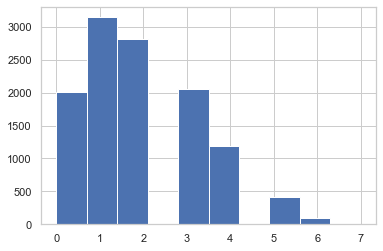

In [137]:
del pivoteo['TOTAL']
pivoteo.columns = [('NO_TIENE_TRX_' + col).replace(' ', '_') + '_MES_ACTUAL' for col in pivoteo.columns]

col_tiene = [_ for _ in pivoteo.columns if 'TIENE' in _]

for col in col_tiene:
    pivoteo[col] = pivoteo[col].apply(lambda _: 1 if _<= 100 else 0)

pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'] = pivoteo[col_tiene].sum(axis=1)
pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: len(col_tiene) - _)

pivoteo = pivoteo.reset_index()
pivoteo[pivoteo['PERIODO'].astype(int) >= 202007]['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].hist()

In [138]:
def cut_2_2(val):
    if pd.isnull(val):
        return None
    
    if val <= 2:
        return 'hasta 2'
    elif val < 5:
        return '3 a 4'
    else:
        return '5 a mas'

    return 0

pivoteo['cat_CASHIN_ACTIVOS_MES_ACTUAL'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(cut_2_2)
pivoteo['TIENE_SOLO_1_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ == 1).astype(int)
pivoteo['TIENE_SOLO_2_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ == 2).astype(int)
pivoteo['TIENE_SOLO_3_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ == 3).astype(int)
pivoteo['TIENE_2_O_MENOS_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ <= 2).astype(int)

In [139]:
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
base.shape

(9211, 199)

#### MIRANDO 3  MESES TODOS LAS CATEGORIAS

In [140]:
for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)

202007 [202005, 202006, 202007]
202008 [202006, 202007, 202008]
202009 [202007, 202008, 202009]
202010 [202008, 202009, 202010]
202011 [202009, 202010, 202011]


In [141]:
pivoteo_grupo['PERIODO'].min(), pivoteo_grupo['PERIODO'].max()

('201904', '202012')

In [142]:
contador = 1
dicc = {col: list for col in pivoteo_grupo.columns if col.upper() not in ['TOTAL', 'PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape)
    contador += 1
    del _3m_actual
acum_3.head()

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1956, 11)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3912, 11)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5868, 11)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7824, 11)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9780, 11)


,COD_UNICO,COBRANZAS_,DEPOSITOS_,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGOS_RECIBIDOS_,POS_,RECAUDACION_,TRANSFERENCIAS_,PERIODO
0,0000002469,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 3457641.74]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 1731.0, 0.0]",202007
1,0000003392,"[0.0, 277203.98, 0.0]","[0.0, 0.0, 0.0]","[102510.0, 702400.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[2847147.57, 1362382.15, 573919.81]",202007
2,0000006114,"[0.0, 0.0, 0.0]","[0.0, 0.0, 121811.12]","[0.0, 1889847.25, 2757258.67]","[0.0, 0.0, 0.0]","[83.56, 83.64, 81.51]","[15538.1, 0.0, 2895.84]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 29762.6, 0.0]",202007
3,0000008318,"[0.0, 0.0, 0.0]","[0.0, 660.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[230.1, 0.0, 2644.93]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",202007
4,0000038026,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 108810.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[7243.33, 0.0, 7061.12]",202007


In [143]:
acum_3 = acum_3.set_index(['COD_UNICO', 'PERIODO'])

In [144]:
for col in acum_3.columns:
    acum_3['_aux_TIENE_TRX_' + col + '_U3M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    acum_3['_aux_TRX_MENOR_' + col + '_DE_U3M'] = acum_3[col].apply(lambda_min_u3m).astype(int)
    acum_3['_aux_TRX_CAIDA_SEGUIDA_' + col + '_U3M'] = acum_3[col].apply(lambda_caida_seguida_u3m).astype(int)
    acum_3['_aux_TRX_CAIDA_10PERCENT_' + col + '_MES_ANT'] = acum_3[col].apply(lambda_caida_10_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_20PERCENT_' + col + '_MES_ANT'] = acum_3[col].apply(lambda_caida_20_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_30PERCENT_' + col + '_MES_ANT'] = acum_3[col].apply(lambda_caida_30_percent).astype(int)
    acum_3['NRO_MESES_SIN_' + col + '_CASHIN'] = acum_3[col].apply(searhc_no_zero).astype(int)
    acum_3['TIENE_2_MESES_SIN_' + col + '_CASHIN'] = acum_3['NRO_MESES_SIN_' + col + '_CASHIN'].apply(lambda _: _ == 2).astype(int)
    acum_3['TIENE_MAS_DE_2_MESES_SIN_' + col + '_CASHIN'] = acum_3['NRO_MESES_SIN_' + col + '_CASHIN'].apply(lambda _: _ > 2).astype(int)
    acum_3['TIENE_MAS_DE_1_MES_SIN_' + col + '_CASHIN'] = acum_3['NRO_MESES_SIN_' + col + '_CASHIN'].apply(lambda _: _ > 1).astype(int)
    acum_3['_aux_TRX_APAGADO_' + col + '_MES_ACTUAL'] = acum_3[col].apply(lambda _: _[-1] < 100 and (_[-2] > 100 or _[-3] > 100)).astype(int)  #Nuevo 28/12/2020

acum_3['TIPOS_CASH_IN_ACTIVOS_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TIENE_TRX_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_MENORES_DE_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_MENOR_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_SEGUIDA_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_SEGUIDA_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_10PERCENT_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_20PERCENT_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_30PERCENT_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_APAGADOS_MES_ACTUAL'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_APAGADO_' in col]].sum(axis=1)

for col in [_ for _ in acum_3.columns if 'NO_CONSIDERADO' in _]:
    if col in acum_3.columns:
        del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if '_U3M' in col or '_MES_ANT' in col or '_MES_ACTUAL' in col ]]
acum_3.head()

,,_aux_TIENE_TRX_COBRANZAS__U3M,_aux_TRX_MENOR_COBRANZAS__DE_U3M,_aux_TRX_CAIDA_SEGUIDA_COBRANZAS__U3M,_aux_TRX_CAIDA_10PERCENT_COBRANZAS__MES_ANT,_aux_TRX_CAIDA_20PERCENT_COBRANZAS__MES_ANT,_aux_TRX_CAIDA_30PERCENT_COBRANZAS__MES_ANT,_aux_TRX_APAGADO_COBRANZAS__MES_ACTUAL,_aux_TIENE_TRX_DEPOSITOS__U3M,_aux_TRX_MENOR_DEPOSITOS__DE_U3M,_aux_TRX_CAIDA_SEGUIDA_DEPOSITOS__U3M,...,_aux_TRX_CAIDA_20PERCENT_TRANSFERENCIAS__MES_ANT,_aux_TRX_CAIDA_30PERCENT_TRANSFERENCIAS__MES_ANT,_aux_TRX_APAGADO_TRANSFERENCIAS__MES_ACTUAL,TIPOS_CASH_IN_ACTIVOS_U3M,TRX_TIPOS_CASH_IN_MENORES_DE_U3M,TRX_TIPOS_CASH_IN_CAIDA_SEGUIDA_U3M,TRX_TIPOS_CASH_IN_CAIDA_10PERCENT_MES_ANT,TRX_TIPOS_CASH_IN_CAIDA_20PERCENT_MES_ANT,TRX_TIPOS_CASH_IN_CAIDA_30PERCENT_MES_ANT,TRX_TIPOS_CASH_APAGADOS_MES_ACTUAL
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0000002469,202007,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,0,0,0,0,0,1
0000003392,202007,1,0,0,0,0,0,1,0,0,0,...,1,1,0,3,1,1,1,1,1,2
0000006114,202007,0,0,0,0,0,0,0,1,0,0,...,0,0,1,5,0,1,1,1,1,1
0000008318,202007,0,0,0,0,0,0,0,1,0,0,...,0,0,0,2,0,0,0,0,0,1
0000038026,202007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,0


<AxesSubplot:>

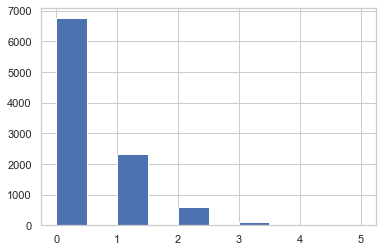

In [145]:
test = acum_3.reset_index()
test[test['PERIODO'].astype(int) >= 202007]['TRX_TIPOS_CASH_IN_MENORES_DE_U3M'].hist()

<AxesSubplot:>

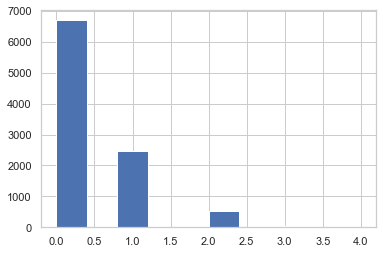

In [146]:
test[test['PERIODO'].astype(int) >= 202007]['TRX_TIPOS_CASH_IN_CAIDA_SEGUIDA_U3M'].hist()

<AxesSubplot:>

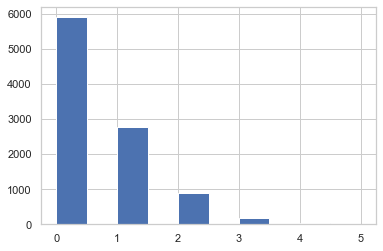

In [147]:
test[test['PERIODO'].astype(int) >= 202007]['TRX_TIPOS_CASH_IN_CAIDA_20PERCENT_MES_ANT'].hist()

<AxesSubplot:>

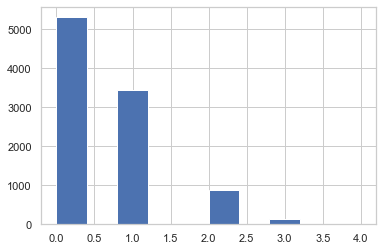

In [148]:

test[test['PERIODO'].astype(int) >= 202007]['TRX_TIPOS_CASH_APAGADOS_MES_ACTUAL'].hist()

In [149]:
del test
gc.collect()

22

In [150]:
acum_3 = acum_3.reset_index()
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
base = base.merge(
    acum_3.reset_index(), how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(9211, 270)

<AxesSubplot:>

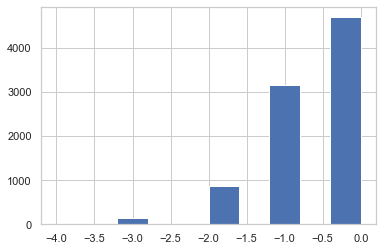

In [151]:
base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'] = base['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'] - base['TIPOS_CASH_IN_ACTIVOS_U3M']

base[base['PERIODO'].astype(int) >= 202007]['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].hist()

In [152]:
base['cut_0_TIENE_EL_MISMO_NRO_TIPOS_CAHIN_EN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _ == 0).astype(int)
base['cut_1_DISMINUYO_1_TIPO_CASHIN_EN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _ == -1).astype(int)
base['cut_2_DISMINUYO_2_TIPO_CASHIN_EN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _ == -2).astype(int)

In [153]:
base['cut_1_TIENE_DISMINUCION_1_O_MAS_TIPOS_CASH_IN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _<= -1).astype(int)
base['cut_2_TIENE_DISMINUCION_2_O_MAS_TIPOS_CASH_IN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _<= -2).astype(int)
base['cut_3_TIENE_DISMINUCION_3_O_MAS_TIPOS_CASH_IN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _<= -3).astype(int)

base['cut_0_NINGUN_INGRESO_CASHIN_U3M'] = base['TIPOS_CASH_IN_ACTIVOS_U3M'].apply(lambda _: _ == 0).astype(int)
base['cut_1_TIENE_AL_MENOS_1_TIPO_CASHIN_ACTIVO_U3M'] = base['TIPOS_CASH_IN_ACTIVOS_U3M'].apply(lambda _: _>= 1).astype(int)

In [154]:
base['cat_TIPOS_CASH_IN_ACTIVOS_U3M'] = base['TIPOS_CASH_IN_ACTIVOS_U3M'].apply(cut_2_2)

In [155]:
gc.collect()

88

#### ATRAS 12 MESES

In [156]:
contador = 1
dicc = {col: list for col in pivoteo_grupo.columns if col.upper() not in ['TOTAL', 'PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[1]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape)
    contador += 1
    del _3m_actual
acum_3.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1956, 11)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3912, 11)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5868, 11)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7824, 11)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 

,COD_UNICO,COBRANZAS_,DEPOSITOS_,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGOS_RECIBIDOS_,POS_,RECAUDACION_,TRANSFERENCIAS_,PERIODO
0,0000002469,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 600000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
1,0000003392,"[924867.68, 2674209.53, 3306476.38, 601537.18,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[25305.0, 0.0, 0.0, 0.0, 0.0, 20000.0, 34060.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 13100.0, 29412.3, 28000.0, 10000.0, 1000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1925479.53, 46490.59, 308005.41, 222041.51, 1...",202007
2,0000006114,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[316289.09, 69585.9, 384271.87, 213445.73, 0.0...","[5580201.94, 3190984.87, 468060.0, 3142808.79,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[84.58, 87.37, 46.32, 0.0, 46.36, 46.41, 73.89...","[35697.75, 13574.45, 52207.09, 41134.2, 61228....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 14000.1, 0.0, 3399.46, 0.0, 52438.0...",202007
3,0000008318,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4361.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3803.27, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[17954.59, 48883.55, 10647.08, 26355.16, 6697....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 5790.35, 35.0, 4945.61, 16965....",202007
4,0000038026,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[85573.48, 0.0, 202544.17, 1196859.07, 562432....","[237188.77, 237902.19, 482525.36, 219752.88, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[142000.0, 96000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",202007


In [157]:
def review_hist(lista, indice_hist, treshold=None):
    media_hist = np.max([lista[indice_hist -1], lista[indice_hist], lista[indice_hist + 1]])
    now = lista[-1]
  
    if media_hist == 0:
        return 0
  
    return  now / media_hist <= treshold if treshold else now / media_hist

for col in acum_3.columns:
    if col.upper() in ['COD_UNICO', 'PERIODO']:
        continue
        
    if '_aux' in col.lower():
        continue
    print(">> ", col)
    acum_3['_aux_TIENE_TRX_' + col + '_U12M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    #acum_3['_aux_TRX_MENOR_' + col + '_DE_U12M'] = acum_3[[col, '_aux_TIENE_TRX_' + col + '_U12M']].apply(lambda _: np.min(_[0][:]) == _[0][-1] and _[1] == 1).astype(int)
    acum_3['_aux_NO_TIENE_TRX_' + col + '_HACE_12M'] = acum_3[col].apply(lambda _: 1 if sum(_) < 100 else 0)
    
    acum_3['_aux_TRX_CAIDA_10PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.9)).astype(int)
    acum_3['_aux_TRX_CAIDA_20PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.8)).astype(int)
    acum_3['_aux_TRX_CAIDA_30PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.7)).astype(int)
    acum_3['_aux_TRX_CAIDA_40PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.6)).astype(int)
    acum_3['_aux_TRX_CAIDA_50PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.5)).astype(int)
    
    acum_3['_aux_TRX_CAIDA_10PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.9)).astype(int)
    acum_3['_aux_TRX_CAIDA_20PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.8)).astype(int)
    acum_3['_aux_TRX_CAIDA_30PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.7)).astype(int)
    acum_3['_aux_TRX_CAIDA_40PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.6)).astype(int)
    acum_3['_aux_TRX_CAIDA_50PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.5)).astype(int)

for col in [_ for _ in acum_3.columns if 'NO_TABLERO' in _]:
    if col in acum_3.columns:
        del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if '_aux' in col ] + ['COD_UNICO', 'PERIODO']]
acum_3.head()

>>  COBRANZAS_
>>  DEPOSITOS_
>>  OPERACIONES_MESA_
>>  OPERACIONES_MESA_NO_TABLERO
>>  OTROS_NO_TABLERO
>>  PAGOS_RECIBIDOS_
>>  POS_
>>  RECAUDACION_
>>  TRANSFERENCIAS_


,_aux_TIENE_TRX_COBRANZAS__U12M,_aux_NO_TIENE_TRX_COBRANZAS__HACE_12M,_aux_TRX_CAIDA_10PERCENT_COBRANZAS__U12M,_aux_TRX_CAIDA_20PERCENT_COBRANZAS__U12M,_aux_TRX_CAIDA_30PERCENT_COBRANZAS__U12M,_aux_TRX_CAIDA_40PERCENT_COBRANZAS__U12M,_aux_TRX_CAIDA_50PERCENT_COBRANZAS__U12M,_aux_TRX_CAIDA_10PERCENT_COBRANZAS__U6M,_aux_TRX_CAIDA_20PERCENT_COBRANZAS__U6M,_aux_TRX_CAIDA_30PERCENT_COBRANZAS__U6M,...,_aux_TRX_CAIDA_30PERCENT_TRANSFERENCIAS__U12M,_aux_TRX_CAIDA_40PERCENT_TRANSFERENCIAS__U12M,_aux_TRX_CAIDA_50PERCENT_TRANSFERENCIAS__U12M,_aux_TRX_CAIDA_10PERCENT_TRANSFERENCIAS__U6M,_aux_TRX_CAIDA_20PERCENT_TRANSFERENCIAS__U6M,_aux_TRX_CAIDA_30PERCENT_TRANSFERENCIAS__U6M,_aux_TRX_CAIDA_40PERCENT_TRANSFERENCIAS__U6M,_aux_TRX_CAIDA_50PERCENT_TRANSFERENCIAS__U6M,COD_UNICO,PERIODO
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000002469,202007
1,1,0,1,1,1,1,1,0,0,0,...,0,0,0,1,1,1,1,0,0000003392,202007
2,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0000006114,202007
3,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0000008318,202007
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0000038026,202007


In [158]:
print(base.shape)
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
base = base.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)

del acum_3
base.shape

(9211, 280)


(9211, 364)

In [159]:
#raise Exception("""SSSTTTTOOOOOPPP""")

#### PIVOTEO POR CASH OUT

In [160]:
del pivoteo_grupo

In [161]:
pivoteo = pd.pivot_table(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH OUT'], 
    values='VOLUMEN_SOLES', index=['COD_UNICO'], columns=['GRUPO_N1', 'KPI', 'PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['GRUPO_N1', 'KPI', 'PERIODO', 'COD_UNICO', 'VOLUMEN_SOLES']

pivoteo = pd.pivot_table(
    pivoteo, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['GRUPO_N1', 'KPI'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = ['_'.join(list(col)).replace(' ', '_') for col in pivoteo]
pivoteo['TOTAL'] = pivoteo.sum(axis=1)

print(pivoteo.shape)
pivoteo.head(2)

(41244, 8)


OPERACIONES_MESA_  OPERACIONES_MESA_NO_TABLERO  \
COD_UNICO  PERIODO                                                   
0000002469 201904                 0.0                          0.0   
           201905                 0.0                          0.0   

                    OTROS_NO_TABLERO  PAGO_DE_SERVICIOS_  PAGOS_MASIVOS_  \
COD_UNICO  PERIODO                                                         
0000002469 201904             637.88                 0.0             0.0   
           201905           15949.25                 0.0             0.0   

                    PAGOS_MASIVOS_NO_TABLERO  TRANSFERENCIAS_      TOTAL  
COD_UNICO  PERIODO                                                        
0000002469 201904                        0.0        494016.06  494653.94  
           201905                        0.0        150004.03  165953.28

In [162]:
pivoteo_grupo = pivoteo.reset_index()
pivoteo_grupo.head(3)

,COD_UNICO,PERIODO,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGO_DE_SERVICIOS_,PAGOS_MASIVOS_,PAGOS_MASIVOS_NO_TABLERO,TRANSFERENCIAS_,TOTAL
0,0000002469,201904,0.0,0.0,637.88,0.0,0.0,0.0,494016.06,494653.94
1,0000002469,201905,0.0,0.0,15949.25,0.0,0.0,0.0,150004.03,165953.28
2,0000002469,201906,0.0,0.0,29086.38,0.0,0.0,0.0,466512.13,495598.51


In [163]:
del pivoteo['TOTAL']
pivoteo.columns = [('TIENE_TRX_' + col).replace(' ', '_') + '_CASH_OUT_MES_ACTUAL' for col in pivoteo.columns]

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col].apply(lambda _: 1 if _  > 100 else 0 )

pivoteo['TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL'] = pivoteo[[_ for _ in pivoteo.columns if 'TIENE' in _]].sum(axis=1)
pivoteo = pivoteo.reset_index()
display(pivoteo.head(3))

,COD_UNICO,PERIODO,TIENE_TRX_OPERACIONES_MESA__CASH_OUT_MES_ACTUAL,TIENE_TRX_OPERACIONES_MESA_NO_TABLERO_CASH_OUT_MES_ACTUAL,TIENE_TRX_OTROS_NO_TABLERO_CASH_OUT_MES_ACTUAL,TIENE_TRX_PAGO_DE_SERVICIOS__CASH_OUT_MES_ACTUAL,TIENE_TRX_PAGOS_MASIVOS__CASH_OUT_MES_ACTUAL,TIENE_TRX_PAGOS_MASIVOS_NO_TABLERO_CASH_OUT_MES_ACTUAL,TIENE_TRX_TRANSFERENCIAS__CASH_OUT_MES_ACTUAL,TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL
0,0000002469,201904,0,0,1,0,0,0,1,2
1,0000002469,201905,0,0,1,0,0,0,1,2
2,0000002469,201906,0,0,1,0,0,0,1,2


In [164]:
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
base.shape

(9211, 372)

In [165]:
contador = 1
dd = {k: list for k in pivoteo_grupo.columns if k not in ['PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns =  ['listado_' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_actual.columns]
    _3m_tipos = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).sum()
    _3m_tipos.columns = ['suma' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_tipos.columns]
    #_3m_actual = 
    #print(_3m_actual.head())
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    _3m_tipos = _3m_tipos.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_tipos['PERIODO'] = tramo[0]
    if contador == 1:
        acum_3 = _3m_actual.copy()
        sum_3 = _3m_tipos.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        sum_3 = pd.concat(
            [sum_3, _3m_tipos], axis=0
        )
        
    print(acum_3.shape, sum_3.shape)
    contador +=1
    del _3m_actual
    del _3m_tipos

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1964, 10) (1964, 10)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3928, 10) (3928, 10)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5892, 10) (5892, 10)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7856, 10) (7856, 10)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9820, 10) (9820, 10)


In [166]:
sum_3.head()

,COD_UNICO,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGO_DE_SERVICIOS_,PAGOS_MASIVOS_,PAGOS_MASIVOS_NO_TABLERO,TRANSFERENCIAS_,TOTAL,PERIODO
0,0000002469,0.0,0.0,2142.20,0.00,0.00,0.0,0.00,2142.20,202007
1,0000003392,102570.0,0.0,3705.54,7468.06,114815.35,0.0,4141958.59,4370517.54,202007
2,0000006114,7886200.0,0.0,727.87,8846.20,87060.52,0.0,16349.18,7999183.77,202007
3,0000008318,700020.0,0.0,1164.12,5289.00,33431.19,0.0,57277.98,797182.29,202007
4,0000037374,0.0,0.0,170.37,0.00,0.00,0.0,0.00,170.37,202007


In [167]:
sum_3 = sum_3.set_index(['COD_UNICO', 'PERIODO'])
for col in sum_3.columns:
    sum_3[col] = sum_3[col] / sum_3['TOTAL']
    
#del sum_3['TOTAL']

sum_3.columns = [('TRX_' + col).replace(' ', '_') + '_CASH_OUT_PERCENT_U3M' for col in sum_3.columns]
sum_3 = sum_3.reset_index()
sum_3.head(3)

,COD_UNICO,PERIODO,TRX_OPERACIONES_MESA__CASH_OUT_PERCENT_U3M,TRX_OPERACIONES_MESA_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_OTROS_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_PAGO_DE_SERVICIOS__CASH_OUT_PERCENT_U3M,TRX_PAGOS_MASIVOS__CASH_OUT_PERCENT_U3M,TRX_PAGOS_MASIVOS_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_TRANSFERENCIAS__CASH_OUT_PERCENT_U3M,TRX_TOTAL_CASH_OUT_PERCENT_U3M
0,0000002469,202007,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,1.0
1,0000003392,202007,0.023469,0.0,0.000848,0.001709,0.026270,0.0,0.947704,1.0
2,0000006114,202007,0.985876,0.0,0.000091,0.001106,0.010884,0.0,0.002044,1.0


In [168]:
del sum_3['TRX_TOTAL_CASH_OUT_PERCENT_U3M']
sum_3['PERIODO'] = sum_3['PERIODO'].astype(str)
base = base.merge(
    sum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del sum_3
base.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_TRX_PAGOS_MASIVOS_NO_TABLERO_CASH_OUT_MES_ACTUAL,TIENE_TRX_TRANSFERENCIAS__CASH_OUT_MES_ACTUAL,TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL,TRX_OPERACIONES_MESA__CASH_OUT_PERCENT_U3M,TRX_OPERACIONES_MESA_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_OTROS_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_PAGO_DE_SERVICIOS__CASH_OUT_PERCENT_U3M,TRX_PAGOS_MASIVOS__CASH_OUT_PERCENT_U3M,TRX_PAGOS_MASIVOS_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_TRANSFERENCIAS__CASH_OUT_PERCENT_U3M
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,0.0,1.0,4.0,0.083348,0.0,0.000366,0.011571,0.093621,0.0,0.811094
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,0.0,1.0,2.0,0.000000,0.0,0.000215,0.000000,0.866192,0.0,0.133593


In [169]:
acum_3.head()

,COD_UNICO,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGO_DE_SERVICIOS_,PAGOS_MASIVOS_,PAGOS_MASIVOS_NO_TABLERO,TRANSFERENCIAS_,TOTAL,PERIODO
0,0000002469,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[647.5, 789.89, 704.81]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[647.5, 789.89, 704.81]",202007
1,0000003392,"[102570.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[1032.0, 1983.26, 690.28]","[7468.06, 0.0, 0.0]","[35331.78, 25956.52, 53527.05]","[0.0, 0.0, 0.0]","[2465108.28, 1499173.26, 177677.05]","[2611510.1199999996, 1527113.04, 231894.38]",202007
2,0000006114,"[1883200.0, 2756000.0, 3247000.0]","[0.0, 0.0, 0.0]","[261.16, 232.78, 233.93]","[250.0, 0.0, 8596.2]","[27021.66, 24940.53, 35098.33]","[0.0, 0.0, 0.0]","[6.0, 6674.48, 9668.7]","[1910738.8199999998, 2787847.7899999996, 33005...",202007
3,0000008318,"[0.0, 0.0, 700020.0]","[0.0, 0.0, 0.0]","[238.21, 241.7, 684.21]","[0.0, 3708.0, 1581.0]","[8660.74, 8132.13, 16638.32]","[0.0, 0.0, 0.0]","[15734.27, 13727.4, 27816.31]","[24633.22, 25809.23, 746739.84]",202007
4,0000037374,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[55.71, 57.35, 57.31]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[55.71, 57.35, 57.31]",202007


In [170]:
acum_3 = acum_3.set_index(['COD_UNICO', 'PERIODO'])
for col in acum_3.columns:
    acum_3['_aux_TIENE_TRX_' + col + '_CASH_OUT_U3M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    acum_3['_aux_TRX_CAIDA_SEGUIDA_' + col + '_U3M_CASH_OUT'] = acum_3[col].apply(lambda_caida_seguida_u3m).astype(int)
    acum_3['_aux_TRX_SUBIDA_SEGUIDA_' + col + '_U3M_CASH_OUT'] = acum_3[col].apply(lambda_subida_seguida_u3m).astype(int)   
    acum_3['_aux_TRX_MENOR_' + col + '_DE_U3M_CASH_OUT'] = acum_3[col].apply(lambda_min_u3m).astype(int) 
    acum_3['_aux_TRX_MAYOR_' + col + '_DE_U3M_CASH_OUT'] = acum_3[col].apply(lambda_max_u3m).astype(int)

    acum_3['_aux_TRX_CAIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_10_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_20_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_30_percent).astype(int)
    acum_3['_aux_TRX_SUBIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_10_percent).astype(int)
    acum_3['_aux_TRX_SUBIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_20_percent).astype(int)
    acum_3['_aux_TRX_SUBIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_30_percent).astype(int)
    acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'] = acum_3[col].apply(searhc_no_zero).astype(int)
    acum_3['TIENE_2_MESES_SIN_' + col + '_CASHOUT'] = acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'].apply(lambda _: _ == 2).astype(int)
    acum_3['TIENE_MAS_DE_2_MESES_SIN_' + col + '_CASHOUT'] = acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'].apply(lambda _: _ > 2).astype(int)
    acum_3['TIENE_MAS_DE_1_MES_SIN_' + col + '_CASHOUT'] = acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'].apply(lambda _: _ > 1).astype(int)
    acum_3['_aux_TIENE_APAGADO_' + col + '_CASHOUT'] = acum_3[col].apply(lambda _: _[-1] < 100 and (_[-2] > 100 or _[-3] > 100)).astype(int)
    
    if 'TOTAL' in col.upper():
        acum_3['TRX_NO_' + col + '_CASH_OUT_ESTE_MES'] = acum_3[col].apply(lambda_no_hay).astype(int)
        acum_3['TRX_NO_' + col + '_CASH_OUT_U2M'] = acum_3[col].apply(lambda_no_hay_u2m).astype(int)
        acum_3['TRX_NO_' + col + '_CASH_OUT_U3M'] = acum_3[col].apply(lambda_no_hay_u3m).astype(int)
        acum_3['TRX_CAIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_10_percent).astype(int)
        acum_3['TRX_CAIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_20_percent).astype(int)
        acum_3['TRX_CAIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_30_percent).astype(int)
        acum_3['TRX_CAIDA_40PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_40_percent).astype(int)
        acum_3['TRX_SUBIDA_40PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_40_percent).astype(int)
        acum_3['TRX_SUBIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_30_percent).astype(int)
        acum_3['TRX_SUBIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_20_percent).astype(int)
        acum_3['TRX_SUBIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_10_percent).astype(int)
    del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if '_CASH_OUT' in col]]
acum_3.tail()

,,_aux_TIENE_TRX_OPERACIONES_MESA__CASH_OUT_U3M,_aux_TRX_CAIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_SUBIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_MENOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_MAYOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_CAIDA_10PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_CAIDA_20PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_CAIDA_30PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_SUBIDA_10PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_SUBIDA_20PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,...,TRX_NO_TOTAL_CASH_OUT_U2M,TRX_NO_TOTAL_CASH_OUT_U3M,TRX_CAIDA_10PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_CAIDA_20PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_CAIDA_30PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_CAIDA_40PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_40PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_30PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_20PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_10PERCENT_TOTAL_CASH_OUT_MES_ANT
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0017232155,202011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0017239443,202011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0017311917,202011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0017316313,202011,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0017415833,202011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
acum_3['TRX_TIPOS_CASH_OUT_MENORES_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MENOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_MAYORES_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MAYOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'CAIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TIENE_TRX_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_10PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_20PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_30PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_10PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_20PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_30PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_40PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_40PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_APAGADO_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TIENE_APAGADO_' in col and 'TOTAL' not in col]].sum(axis=1)

acum_3.tail()

,,_aux_TIENE_TRX_OPERACIONES_MESA__CASH_OUT_U3M,_aux_TRX_CAIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_SUBIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_MENOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_MAYOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_CAIDA_10PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_CAIDA_20PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_CAIDA_30PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_SUBIDA_10PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_SUBIDA_20PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,...,TRX_TIPOS_CASH_OUT_SUBIDA_SEGUIDA_DE_U3M,TRX_TIPOS_CASH_OUT_U3M,TRX_TIPOS_CASH_OUT_CAIDA_10PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_CAIDA_20PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_CAIDA_30PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_10PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_20PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_30PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_40PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_APAGADO_MES_ANT
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0017232155,202011,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0.0,0.0
0017239443,202011,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0.0,0.0
0017311917,202011,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,0.0
0017316313,202011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
0017415833,202011,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,0.0


In [172]:
#acum_3['TRX_TIPOS_CASH_OUT_APAGADO_MES_ANT'].value_counts()

In [173]:
acum_3 = acum_3.reset_index()
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
base = base.merge(
    acum_3.reset_index(), how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(9211, 492)

In [174]:
base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'] =  base['TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL'] - base['TRX_TIPOS_CASH_OUT_U3M']

<AxesSubplot:>

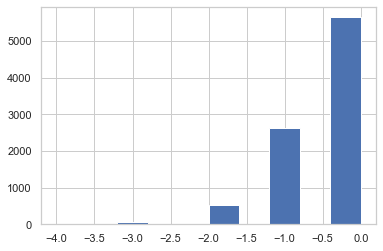

In [175]:
base[base['PERIODO'].astype(int) >= 202007]['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].hist()

In [176]:
base['cut_0_NO_DISMINUYO_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ == 0).astype(int)
base['cut_1_DISMINUYO_1_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ == -1).astype(int)
base['cut_2_DISMINUYO_1_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ == -2).astype(int)
base['TIENE_DISMINUCION_1_O_MAS_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ <= -1).astype(int)
base['TIENE_DISMINUCION_2_O_MAS_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ <= -2).astype(int)
base['TIENE_DISMINUCION_3_O_MAS_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ <= -3).astype(int)

In [177]:
contador = 1
dicc = {col: list for col in pivoteo_grupo.columns if col.upper() not in ['TOTAL', 'PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[1]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape)
    contador += 1
    del _3m_actual
acum_3.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1964, 9)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3928, 9)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5892, 9)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7856, 9)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 2020

,COD_UNICO,OPERACIONES_MESA_,OPERACIONES_MESA_NO_TABLERO,OTROS_NO_TABLERO,PAGO_DE_SERVICIOS_,PAGOS_MASIVOS_,PAGOS_MASIVOS_NO_TABLERO,TRANSFERENCIAS_,PERIODO
0,0000002469,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[704.58, 56334.5, 1055.91, 702.61, 701.46, 702...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 540012.22, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",202007
1,0000003392,"[2684860.0, 1434030.0, 1205070.0, 1184550.0, 9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6215.19, 12937.89, 5074.61, 2329.08, 2861.29,...","[0.0, 0.0, 0.0, 4595.83, 0.0, 0.0, 0.0, 0.0, 0...","[25051.77, 23567.4, 29438.96, 25301.17, 51984....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[414917.96, 267607.76, 13729.36, 25342.59, 202...",202007
2,0000006114,"[5875450.0, 200160.0, 3288825.0, 3573330.0, 34...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[430.56, 2958.73, 11554.82, 240.61, 9246.36, 7...","[0.0, 0.0, 9010.98, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[35463.76, 89271.74, 58630.25, 93039.53, 11332...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[10.86, 3029.1, 5091.5, 0.0, 100718.89, 146159...",202007
3,0000008318,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1225.45, 241.35, 239.1, 248.06, 248.86, 329.7...","[0.0, 99.5, 0.0, 9978.89, 7366.0, 437.5, 2480....","[52112.83, 69386.03, 56087.08, 145642.3, 10373...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[58792.57, 10457.01, 5061.9, 21783.08, 21066.7...",202007
4,0000037374,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[55.08, 55.0, 54.45, 55.11, 53.96, 54.74, 55.9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007


In [178]:
def review_hist(lista, indice_hist, treshold=None):
    media_hist = np.max([lista[indice_hist -1], lista[indice_hist], lista[indice_hist + 1]])
    now = lista[-1]
  
    if media_hist == 0:
        return 0
  
    return  now / media_hist <= treshold if treshold else now / media_hist

for col in acum_3.columns:
    if col.upper() in ['COD_UNICO', 'PERIODO']:
        continue
        
    if '_aux' in col.lower():
        continue
    print(">> ", col)
    acum_3['_aux_TIENE_CASHOUT_' + col + '_U12M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    #acum_3['_aux_TRX_MENOR_' + col + '_DE_U12M'] = acum_3[[col, '_aux_TIENE_TRX_' + col + '_U12M']].apply(lambda _: np.min(_[0][:]) == _[0][-1] and _[1] == 1).astype(int)
    acum_3['_aux_NO_TIENE_CASHOUT_' + col + '_HACE_12M'] = acum_3[col].apply(lambda _: 1 if sum(_) < 100 else 0)
    
    acum_3['_aux_CASHOUT_CAIDA_10PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.9)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_20PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.8)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_30PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.7)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_40PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.6)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_50PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.5)).astype(int)
    
    acum_3['_aux_CASHOUT_CAIDA_10PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.9)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_20PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.8)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_30PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.7)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_40PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.6)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_50PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.5)).astype(int)

for col in [_ for _ in acum_3.columns if 'NO_TABLERO' in _]:
    if col in acum_3.columns:
        del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if '_aux' in col ] + ['COD_UNICO', 'PERIODO']]
acum_3.head()

>>  OPERACIONES_MESA_
>>  OPERACIONES_MESA_NO_TABLERO
>>  OTROS_NO_TABLERO
>>  PAGO_DE_SERVICIOS_
>>  PAGOS_MASIVOS_
>>  PAGOS_MASIVOS_NO_TABLERO
>>  TRANSFERENCIAS_


,_aux_TIENE_CASHOUT_OPERACIONES_MESA__U12M,_aux_NO_TIENE_CASHOUT_OPERACIONES_MESA__HACE_12M,_aux_CASHOUT_CAIDA_10PERCENT_OPERACIONES_MESA__U12M,_aux_CASHOUT_CAIDA_20PERCENT_OPERACIONES_MESA__U12M,_aux_CASHOUT_CAIDA_30PERCENT_OPERACIONES_MESA__U12M,_aux_CASHOUT_CAIDA_40PERCENT_OPERACIONES_MESA__U12M,_aux_CASHOUT_CAIDA_50PERCENT_OPERACIONES_MESA__U12M,_aux_CASHOUT_CAIDA_10PERCENT_OPERACIONES_MESA__U6M,_aux_CASHOUT_CAIDA_20PERCENT_OPERACIONES_MESA__U6M,_aux_CASHOUT_CAIDA_30PERCENT_OPERACIONES_MESA__U6M,...,_aux_CASHOUT_CAIDA_30PERCENT_TRANSFERENCIAS__U12M,_aux_CASHOUT_CAIDA_40PERCENT_TRANSFERENCIAS__U12M,_aux_CASHOUT_CAIDA_50PERCENT_TRANSFERENCIAS__U12M,_aux_CASHOUT_CAIDA_10PERCENT_TRANSFERENCIAS__U6M,_aux_CASHOUT_CAIDA_20PERCENT_TRANSFERENCIAS__U6M,_aux_CASHOUT_CAIDA_30PERCENT_TRANSFERENCIAS__U6M,_aux_CASHOUT_CAIDA_40PERCENT_TRANSFERENCIAS__U6M,_aux_CASHOUT_CAIDA_50PERCENT_TRANSFERENCIAS__U6M,COD_UNICO,PERIODO
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000002469,202007
1,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0000003392,202007
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000006114,202007
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000008318,202007
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000037374,202007


In [179]:
print(base.shape)
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
base = base.merge(
    acum_3.reset_index(), how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(9211, 499)


(9211, 548)

### RAZON ENTRE CASH IN - CASH OUT

In [180]:
pivoteo = pd.pivot_table(
    transac_cliente, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['TIPO_CASH'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = [col.replace(' ', '_') + '_TOTAL_MES' for col in pivoteo.columns]

pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'] = pivoteo[['CASH_IN_TOTAL_MES', 'CASH_OUT_TOTAL_MES']].apply(
    lambda _: get_div_means_perios(_[0] , _[1]), axis=1)
pivoteo = pivoteo.reset_index()

pivoteo.head(3)

,COD_UNICO,PERIODO,CASH_IN_TOTAL_MES,CASH_OUT_TOTAL_MES,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT
0,0000002469,201904,342654.51,494653.94,0.692716
1,0000002469,201905,163519.20,165953.28,0.985333
2,0000002469,201906,521756.87,495598.51,1.052781


In [181]:
pivoteo['cut_01_INGRESO_SUPERA_EGGRESO_SOLO_EN_10PERCENT_O_MENOS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ > 1 and _ <= 1.1).astype(int)
pivoteo['cut_02_INGRESO_SUPERA_EGGRESO_SOLO_EN_20PERCENT_O_MENOS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ > 1 and _ <= 2.1).astype(int)
pivoteo['cut_09_EGRESO_SUPERA_INGRESO_EN_10PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.9).astype(int)
pivoteo['cut_08_EGRESO_SUPERA_INGRESO_EN_20PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.8).astype(int)
pivoteo['cut_07_EGRESO_SUPERA_INGRESO_EN_30PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.7).astype(int)
pivoteo['cut_06_EGRESO_SUPERA_INGRESO_EN_40PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.6).astype(int)
pivoteo['cut_06_EGRESO_SUPERA_INGRESO_EN_50PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.5).astype(int)
pivoteo['cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.4).astype(int)

In [182]:
pivoteo['DIFF_CASHIN_OVER_CASHOUT'] = pivoteo['CASH_IN_TOTAL_MES'] - pivoteo['CASH_OUT_TOTAL_MES']
pivoteo.head(3)

,COD_UNICO,PERIODO,CASH_IN_TOTAL_MES,CASH_OUT_TOTAL_MES,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT,cut_01_INGRESO_SUPERA_EGGRESO_SOLO_EN_10PERCENT_O_MENOS,cut_02_INGRESO_SUPERA_EGGRESO_SOLO_EN_20PERCENT_O_MENOS,cut_09_EGRESO_SUPERA_INGRESO_EN_10PERCENT_O_MAS,cut_08_EGRESO_SUPERA_INGRESO_EN_20PERCENT_O_MAS,cut_07_EGRESO_SUPERA_INGRESO_EN_30PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_40PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_50PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS,DIFF_CASHIN_OVER_CASHOUT
0,0000002469,201904,342654.51,494653.94,0.692716,0,0,1,1,1,0,0,0,-151999.43
1,0000002469,201905,163519.20,165953.28,0.985333,0,0,0,0,0,0,0,0,-2434.08
2,0000002469,201906,521756.87,495598.51,1.052781,1,1,0,0,0,0,0,0,26158.36


In [183]:
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT,cut_01_INGRESO_SUPERA_EGGRESO_SOLO_EN_10PERCENT_O_MENOS,cut_02_INGRESO_SUPERA_EGGRESO_SOLO_EN_20PERCENT_O_MENOS,cut_09_EGRESO_SUPERA_INGRESO_EN_10PERCENT_O_MAS,cut_08_EGRESO_SUPERA_INGRESO_EN_20PERCENT_O_MAS,cut_07_EGRESO_SUPERA_INGRESO_EN_30PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_40PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_50PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS,DIFF_CASHIN_OVER_CASHOUT
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,0.354086,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-337095.83
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,0.005494,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-905149.30
2,202008,0001420892,20132091979,1,TAWA,0,0,0,0,0,...,0.459678,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,-457215.42
3,202008,0008391729,20103668876,1,REPRESENTACIONES Y DISTRIBUCIONES DEL,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202008,0008401169,20109104397,1,LIMPIEZA Y APOYO DE PERSONAL,0,0,1,0,0,...,1.366769,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77675.76


In [184]:
pivoteo.shape

(37709, 14)

In [185]:
pivoteo = pd.pivot_table(
    pivoteo, 
    values='DIFF_CASHIN_OVER_CASHOUT', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'DIFF_CASH_IN_CASH_OUT']

In [186]:
pivoteo.head()

,PERIODO,COD_UNICO,DIFF_CASH_IN_CASH_OUT
0,201904,0000002469,-151999.43
1,201904,0000003392,1631369.77
2,201904,0000006114,95642.10
3,201904,0000008318,-400741.82
4,201904,0000037374,-53.78


In [187]:
contador = 1
dicc = {
    'DIFF_CASH_IN_CASH_OUT': list
}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo[pivoteo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape, )
    contador +=1
    del _3m_actual
acum_3.head()

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1967, 3)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3934, 3)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5901, 3)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7868, 3)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9835, 3)


,COD_UNICO,DIFF_CASH_IN_CASH_OUT,PERIODO
0,0000002469,"[-647.5, 941.11, 3456936.93]",202007
1,0000003392,"[338147.4500000002, 814873.0899999999, 342025....",202007
2,0000006114,"[-1895117.16, -868154.2999999996, -418550.0200...",202007
3,0000008318,"[-24403.120000000003, -25149.230000000003, -74...",202007
4,0000037374,"[-55.71, -57.35, -57.31]",202007


In [188]:
acum_3['TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U3M'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda _: 1 if _[0] < 0 and  _[1] < 0 and  _[2] < 0 else 0)
acum_3['TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U2M'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda _: 1 if _[1] < 0 and  _[2] < 0 else 0)
acum_3['TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_ESTE_MES'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda _: 1 if  _[2] < 0 else 0)
acum_3['TRX_DIFF_CASHIN_CASHOUT_MENOR_DE_U3M'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda_min_u3m).astype(int)
del acum_3['DIFF_CASH_IN_CASH_OUT']
acum_3.head(20)

,COD_UNICO,PERIODO,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U3M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U2M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_ESTE_MES,TRX_DIFF_CASHIN_CASHOUT_MENOR_DE_U3M
0,0000002469,202007,0,0,0,0
1,0000003392,202007,0,0,0,0
2,0000006114,202007,1,1,1,0
3,0000008318,202007,1,1,1,0
4,0000037374,202007,1,1,1,0
5,0000038026,202007,0,0,0,0
6,0000039982,202007,0,1,1,0
7,0000042044,202007,0,0,0,0
8,0000042432,202007,1,1,1,0
9,0000043141,202007,0,0,1,0


In [189]:
acum_3.shape, base.shape, acum_3.groupby(by=['PERIODO', 'COD_UNICO']).size().shape,  base.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((9835, 6), (9211, 560), (9835,), (9211,))

In [190]:
acum_3['PERIODO'] = acum_3['PERIODO'] .astype(str)
base = base.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)

In [191]:
pivoteo.columns

Index(['PERIODO', 'COD_UNICO', 'DIFF_CASH_IN_CASH_OUT'], dtype='object')

### JUGANDO CON LA RZON ENTRE INGRESOS TOTAL Y EGRESOS TOTOALES

In [192]:
pivoteo = pd.pivot_table(
    transac_cliente, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['TIPO_CASH'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = [col.replace(' ', '_') + '_TOTAL_MES' for col in pivoteo.columns]

pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'] = pivoteo[['CASH_IN_TOTAL_MES', 'CASH_OUT_TOTAL_MES']].apply(
    lambda _: get_div_means_perios(_[0] , _[1]), axis=1)
pivoteo = pivoteo.reset_index()[['COD_UNICO', 'PERIODO', 'PERCENT_MONTO_CASH_IN_OVER_CASH_OUT']]


pivoteo = pd.pivot_table(
    pivoteo, 
    values='PERCENT_MONTO_CASH_IN_OVER_CASH_OUT', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'PERCENT_MONTO_CASH_IN_OVER_CASH_OUT']

pivoteo.head(3)

,PERIODO,COD_UNICO,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT
0,201904,0000002469,0.692716
1,201904,0000003392,2.138814
2,201904,0000006114,1.019986


In [193]:
contador = 1
dicc = {
    'PERCENT_MONTO_CASH_IN_OVER_CASH_OUT': list
}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo[pivoteo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape, )
    contador +=1
    del _3m_actual
acum_3.head()

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1967, 3)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3934, 3)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5901, 3)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7868, 3)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9835, 3)


,COD_UNICO,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT,PERIODO
0,0000002469,"[0.0, 2.19144437833116, 4905.778493494701]",202007
1,0000003392,"[1.129483492103029, 1.5336036486205369, 2.4749...",202007
2,0000006114,"[0.008175717076811157, 0.6885933647044626, 0.8...",202007
3,0000008318,"[0.009341044329567956, 0.02557224682797588, 0....",202007
4,0000037374,"[0.0, 0.0, 0.0]",202007


In [194]:
acum_3.head(5)

,COD_UNICO,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT,PERIODO
0,0000002469,"[0.0, 2.19144437833116, 4905.778493494701]",202007
1,0000003392,"[1.129483492103029, 1.5336036486205369, 2.4749...",202007
2,0000006114,"[0.008175717076811157, 0.6885933647044626, 0.8...",202007
3,0000008318,"[0.009341044329567956, 0.02557224682797588, 0....",202007
4,0000037374,"[0.0, 0.0, 0.0]",202007


In [195]:
def menor_a_u3m(listado, treshold):
    return int(all([_ != 0 and _ <= treshold for _ in listado]))

def menor_a_u3m_or_null(listado, treshold):
    return int(all([_ == 0 or _ <= treshold for _ in listado]))

acum_3['cut_110_INGRESO_SUPERA_EN_SOLO_1OPERCENT_EGRESOS_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 1.1))
acum_3['cut_120_INGRESO_SUPERA_EN_SOLO_1OPERCENT_EGRESOS_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 1.2))
acum_3['cut_099_EGRESO_SUPERA_INGRESOS_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.99))
acum_3['cut_09_EGRESO_SUPERA_INGRESOS_10PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.9))
acum_3['cut_08_EGRESO_SUPERA_INGRESOS_20PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.8))
acum_3['cut_07_EGRESO_SUPERA_INGRESOS_30PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.7))
acum_3['cut_06_EGRESO_SUPERA_INGRESOS_40PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.6))
acum_3['TIENE_AUMENTO_SEGUIDO_SUPERA_EGRESO_A_INGRESO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda_caida_seguida_u3m).astype(int)
 

acum_3['cut_099_EGRESO_SUPERA_INGRESOS_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.99))
acum_3['cut_09_EGRESO_SUPERA_INGRESOS_10PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.9))
acum_3['cut_08_EGRESO_SUPERA_INGRESOS_20PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.8))
acum_3['cut_07_EGRESO_SUPERA_INGRESOS_30PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.7))
acum_3['cut_06_EGRESO_SUPERA_INGRESOS_40PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.6))
#del acum_3['DIFF_CASH_IN_CASH_OUT']

acum_3[acum_3['PERIODO'].astype(int) >= 202007]['TIENE_AUMENTO_SEGUIDO_SUPERA_EGRESO_A_INGRESO_U3M'].value_counts()

0    9727
1     108
Name: TIENE_AUMENTO_SEGUIDO_SUPERA_EGRESO_A_INGRESO_U3M, dtype: int64

In [196]:
acum_3.shape, base.shape, acum_3.groupby(by=['PERIODO', 'COD_UNICO']).size().shape,  base.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((9835, 16), (9211, 564), (9835,), (9211,))

### RAZON NUMERO DE TRANSACCIONES

In [197]:
pivoteo_cash = pd.pivot_table(
    transac_cliente, 
    values='CANT_TRX', index=['COD_UNICO', 'PERIODO'], columns=['TIPO_CASH'], aggfunc=np.sum, fill_value=0
)
pivoteo_cash.columns = [('CANTIDAD_TRX_' + col).replace(' ', '_') + '_PERCENT' for col in pivoteo_cash.columns]

pivoteo_cash['PERCENT_CANT_TRX_CASH_IN_OVER_CASH_OUT'] = pivoteo_cash[
    ['CANTIDAD_TRX_CASH_IN_PERCENT', 'CANTIDAD_TRX_CASH_OUT_PERCENT']].apply(lambda _: get_div_means_perios(_[0], _[1]), axis=1)

pivoteo_cash['total'] = pivoteo_cash.sum(axis=1)
for col in pivoteo_cash.columns:
    if 'OVER' not in col.upper():
        pivoteo_cash[col] = pivoteo_cash[col] / pivoteo_cash['total']

del pivoteo_cash['total']

pivoteo_cash = pivoteo_cash.reset_index().fillna(0)
pivoteo_cash.tail()

,COD_UNICO,PERIODO,CANTIDAD_TRX_CASH_IN_PERCENT,CANTIDAD_TRX_CASH_OUT_PERCENT,PERCENT_CANT_TRX_CASH_IN_OVER_CASH_OUT
37704,0017311917,202011,0.062241,0.933610,0.066667
37705,0017311917,202012,0.000000,1.000000,0.000000
37706,0017316313,202011,0.230769,0.692308,0.333333
37707,0017415833,202011,0.393258,0.550562,0.714286
37708,0017415833,202012,0.000000,1.000000,0.000000


In [198]:
base = base.merge(
    pivoteo_cash, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo_cash
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,cut_06_EGRESO_SUPERA_INGRESO_EN_50PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS,DIFF_CASHIN_OVER_CASHOUT,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U3M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U2M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_ESTE_MES,TRX_DIFF_CASHIN_CASHOUT_MENOR_DE_U3M,CANTIDAD_TRX_CASH_IN_PERCENT,CANTIDAD_TRX_CASH_OUT_PERCENT,PERCENT_CANT_TRX_CASH_IN_OVER_CASH_OUT
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,1.0,1.0,-337095.83,0.0,1.0,1.0,0.0,0.123051,0.875027,0.140625
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,1.0,1.0,-905149.30,1.0,1.0,1.0,0.0,0.082707,0.909774,0.090909
2,202008,0001420892,20132091979,1,TAWA,0,0,0,0,0,...,1.0,0.0,-457215.42,0.0,0.0,1.0,0.0,0.299599,0.694526,0.431373
3,202008,0008391729,20103668876,1,REPRESENTACIONES Y DISTRIBUCIONES DEL,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202008,0008401169,20109104397,1,LIMPIEZA Y APOYO DE PERSONAL,0,0,1,0,0,...,0.0,0.0,77675.76,0.0,0.0,0.0,0.0,0.216520,0.779471,0.277778


In [199]:
base.shape

(9211, 567)

### Probando rangos de periodo para ANALISIS DE VARACION DE CASH IN

In [200]:
transac_cliente.columns

Index(['ANIO', 'PERIODO', 'COD_UNICO', 'TIPO_CASH', 'KPI', 'GRUPO_N1',
       'CANT_TRX', 'VOLUMEN_SOLES', 'MAX_FECHA_INFORMACION'],
      dtype='object')

In [201]:
def generate_listado_u3m(data, col_name, values='CANT_TRX', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max):
    pivoteo = pd.pivot_table(
        data, 
        values=values, index=index, columns=columns, aggfunc=aggfunc, fill_value=0
    ).unstack().reset_index()
    
    pivoteo.columns = columns + index + [col_name]
    #display(pivoteo.head())
    contador = 1
    dicc = { col_name: list }
    
    for tramo in tramos:
        _3_meses_previos = tramo[1][:-2]
        print(tramo[0], _3_meses_previos)

        _3m_actual = pivoteo[pivoteo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)

        _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
        _3m_actual['PERIODO'] = tramo[0]

        if contador == 1:
            acum_3 = _3m_actual.copy()
        else:
            acum_3 = pd.concat(
                [acum_3, _3m_actual], axis=0
            )

        print(acum_3.shape, )
        contador +=1
        del _3m_actual
    del pivoteo
    return acum_3

acum_3 = generate_listado_u3m(
    transac_cliente[(transac_cliente['TIPO_CASH'] == 'CASH IN') &  (transac_cliente['VOLUMEN_SOLES'] > 100)],
    'CANT_TRX_CASH_IN_TOTAL_MES', values='CANT_TRX', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max
)
acum_3.tail(58)

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1953, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(3906, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(5859, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(7812, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9765, 3)


,COD_UNICO,CANT_TRX_CASH_IN_TOTAL_MES,PERIODO
1895,0016347789,"[3, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1]",202011
1896,0016350584,"[0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2]",202011
1897,0016350866,"[0, 0, 1, 0, 0, 1, 0, 2, 3, 2, 1, 2]",202011
1898,0016355793,"[1, 1, 1, 3, 2, 0, 6, 4, 2, 2, 3, 4]",202011
1899,0016359742,"[2, 1, 2, 2, 1, 2, 0, 2, 3, 3, 2, 0]",202011
1900,0016364109,"[0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 3, 4]",202011
1901,0016376276,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1]",202011
1902,0016376605,"[1, 1, 1, 1, 0, 2, 1, 0, 3, 1, 1, 1]",202011
1903,0016387975,"[0, 5, 1, 7, 1, 3, 4, 1, 3, 3, 1, 2]",202011
1904,0016390037,"[0, 0, 0, 2, 11, 6, 19, 17, 7, 3, 4, 0]",202011


In [202]:
print(
    'mes cerrado',tramos[-3][0],  '\n', '-'*100, '\n', tramos[-3][1],  '\n',  '-'*100,  '\n',tramos[-3][-2],  '\n',  '-'*100,  '\n',tramos[-3][-1]
)

mes cerrado 202009 
 ---------------------------------------------------------------------------------------------------- 
 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011] 
 ---------------------------------------------------------------------------------------------------- 
 [201910, 201911] 
 ---------------------------------------------------------------------------------------------------- 
 [202010, 202011]


### AGRUPACION POR CLIENTE - PERIODO

In [203]:
periodo_actual = datetime.now().strftime('%Y%m')
periodo_actual

'202012'

In [204]:
group_periodo_cash_in = transac_cliente[transac_cliente['KPI'] == ''].groupby(
    by=['TIPO_CASH','PERIODO'])['VOLUMEN_SOLES'].sum().reset_index()
group_periodo_cash_in.head()

,TIPO_CASH,PERIODO,VOLUMEN_SOLES
0,CASH IN,201904,1.667910e+09
1,CASH IN,201905,1.816986e+09
2,CASH IN,201906,1.594541e+09
3,CASH IN,201907,1.633710e+09
4,CASH IN,201908,1.535690e+09


<AxesSubplot:xlabel='PERIODO', ylabel='VOLUMEN_SOLES'>

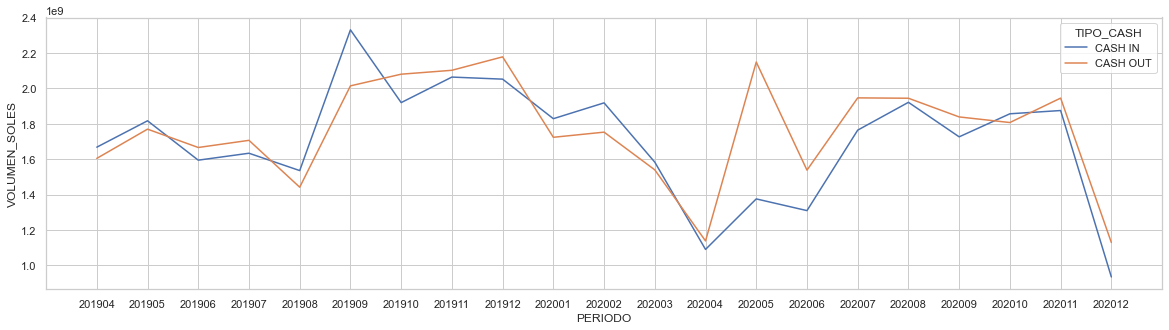

In [205]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
sns.lineplot(
    data=group_periodo_cash_in[group_periodo_cash_in['PERIODO'].astype(int) >= 201904],
    x="PERIODO", y="VOLUMEN_SOLES", ax=axes, hue='TIPO_CASH'
)

In [206]:
transac_cliente['ANIO'].value_counts()

2020    101926
2019     75008
Name: ANIO, dtype: int64

In [207]:
transac_cliente['MONTH'] = transac_cliente['PERIODO'].apply(lambda _: _[-2:])
transac_cliente['MONTH'].value_counts()

11    17913
09    17501
10    17452
07    17239
08    17078
12    16685
05    16444
06    16319
04    14764
01     8710
02     8490
03     8339
Name: MONTH, dtype: int64

In [208]:
cash_in_cliente = transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN']
cash_in_cliente.shape, transac_cliente.shape, cash_in_cliente['COD_UNICO'].unique().shape, transac_cliente['COD_UNICO'].unique().shape

((81828, 10), (176934, 10), (1956,), (1967,))

### CLientesnque solo tiene CASH OUT

In [209]:
set(transac_cliente['COD_UNICO'].unique()) - set(cash_in_cliente['COD_UNICO'].unique())

{'0000037374',
 '0008939975',
 '0009980656',
 '0012984101',
 '0013318420',
 '0013619339',
 '0015242107',
 '0015559992',
 '0015726975',
 '0015955076',
 '0016568364'}

In [210]:
cash_in_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION,MONTH
0,2019,201908,0013222363,CASH IN,,DEPOSITOS,1,100000.00,20190828,08
2,2019,201908,0013268476,CASH IN,,TRANSFERENCIAS,25,1242230.58,20190827,08
3,2019,201908,0013270981,CASH IN,,OPERACIONES MESA,1,427309.77,20190813,08
7,2019,201908,0013310596,CASH IN,,TRANSFERENCIAS,11,67717.51,20190828,08
8,2019,201908,0013322860,CASH IN,,DEPOSITOS,247,1179474.91,20190828,08


In [211]:
group_periodo_cash_in = cash_in_cliente.groupby(by=['ANIO','MONTH'])['VOLUMEN_SOLES'].sum().reset_index()
group_periodo_cash_in

,ANIO,MONTH,VOLUMEN_SOLES
0,2019,04,1.809831e+09
1,2019,05,1.970104e+09
2,2019,06,1.766018e+09
3,2019,07,1.788638e+09
4,2019,08,1.702453e+09
5,2019,09,2.485666e+09
6,2019,10,2.065051e+09
7,2019,11,2.222905e+09
8,2019,12,2.227684e+09
9,2020,01,1.998419e+09


In [212]:
months =  ["01", "02", '03', "04", "05", '06', "07", "08", '09', "10", "11", '12']
group_periodo_cash_in['MONTH'] = pd.Categorical(
    group_periodo_cash_in['MONTH'], [
        _.upper() for _ in months
    ]
)

In [213]:

group_periodo_cash_in.head()

,ANIO,MONTH,VOLUMEN_SOLES
0,2019,04,1.809831e+09
1,2019,05,1.970104e+09
2,2019,06,1.766018e+09
3,2019,07,1.788638e+09
4,2019,08,1.702453e+09


### CASH IN YOY (2020 - 2019)

<AxesSubplot:xlabel='MONTH', ylabel='VOLUMEN_SOLES'>

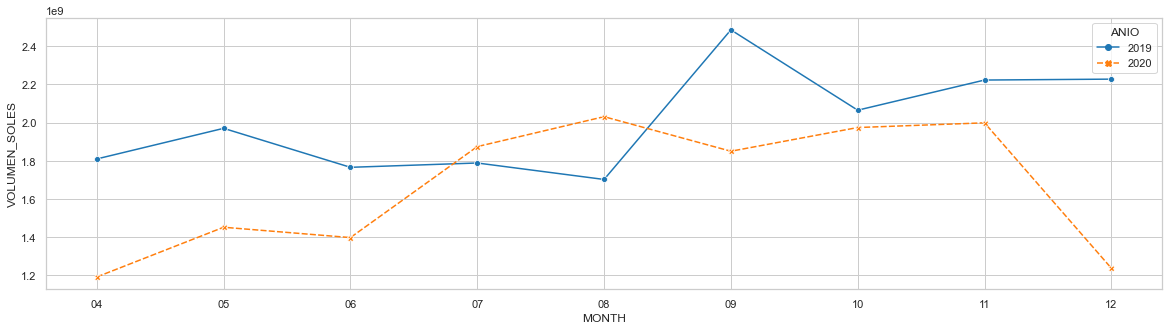

In [214]:
fig, axes1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

sns.lineplot(
    data=group_periodo_cash_in[
        (group_periodo_cash_in['MONTH'].isin(months[3:])) & (group_periodo_cash_in['ANIO'].astype(int) >= 2019)
    ],
    x="MONTH", y="VOLUMEN_SOLES", ax=axes1, 
    hue='ANIO', markers=True,  style="ANIO", palette=sns.color_palette("tab10", 2)
)

In [215]:
cash_in_cliente['VOLUMEN_SOLES'].dtype

dtype('float64')

In [216]:
cash_in_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION,MONTH
0,2019,201908,0013222363,CASH IN,,DEPOSITOS,1,100000.00,20190828,08
2,2019,201908,0013268476,CASH IN,,TRANSFERENCIAS,25,1242230.58,20190827,08
3,2019,201908,0013270981,CASH IN,,OPERACIONES MESA,1,427309.77,20190813,08
7,2019,201908,0013310596,CASH IN,,TRANSFERENCIAS,11,67717.51,20190828,08
8,2019,201908,0013322860,CASH IN,,DEPOSITOS,247,1179474.91,20190828,08


In [217]:
cash_in_cliente['MAX_FECHA_INFORMACION'] = pd.to_datetime(
    cash_in_cliente['MAX_FECHA_INFORMACION'], errors='coerce', format='%Y%m%d'
)
cash_in_cliente['MAX_FECHA_INFORMACION'].dtype

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dtype('<M8[ns]')

In [218]:
#cash_in_cliente['VOLUMEN_SOLES'] = cash_in_cliente['VOLUMEN_SOLES'].copy().apply(lambda _: None if _ < 100 else _)
#cash_in_cliente[cash_in_cliente['COD_UNICO'] == '0016716540']['VOLUMEN_SOLES'].median()
periodo_cash_cliente = cash_in_cliente.groupby(by=['COD_UNICO','PERIODO']).agg({
    'VOLUMEN_SOLES': ['sum'], 'CANT_TRX': ['sum'], 'MAX_FECHA_INFORMACION': ['max']
}).reset_index()

periodo_cash_cliente.columns = ['_'.join(list(_)[:-1]) for _ in periodo_cash_cliente.columns]
periodo_cash_cliente.tail()

,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION
33406,0017232155,202012,60539.47,1,2020-12-10
33407,0017239443,202011,4598.00,2,2020-11-04
33408,0017311917,202011,359.20,1,2020-11-05
33409,0017316313,202011,6100.00,1,2020-11-09
33410,0017415833,202011,61445.00,5,2020-11-24


In [219]:
def apply_diff_mont(serie_diff):
    return (serie_diff / np.timedelta64(1,'D')).round(3)

In [220]:
#tramo[0], tramo[-1], tramo[-2]

In [221]:
def RClass(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [222]:
def RClass_propio(x, p, d):
    if x <= d[p][0.15]:
        return 1
    elif x <= d[p][0.3]:
        return 2
    elif x <= d[p][0.45]:
        return 3
    elif x <= d[p][0.6]:
        return 4
    elif x <= d[p][0.75]: 
        return 5
    elif x <= d[p][0.9]: 
        return 6
    else:
        return 7
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass_propio(x, p, d):
    if x <= d[p][0.15]:
        return 7
    elif x <= d[p][0.3]:
        return 6
    elif x <= d[p][0.45]:
        return 5
    elif x <= d[p][0.6]:
        return 4
    elif x <= d[p][0.75]: 
        return 3
    elif x <= d[p][0.9]: 
        return 2
    else:
        return 1

In [223]:
base.shape

(9211, 567)

In [224]:
#display(periodo_cash_cliente[
#    (periodo_cash_cliente['VOLUMEN_SOLES'] < 1000) &  (periodo_cash_cliente['PERIODO'].str.startswith('2019'))
#].hist())
#display(periodo_cash_cliente[
#    (periodo_cash_cliente['VOLUMEN_SOLES'] < 1000) &  (periodo_cash_cliente['PERIODO'].str.startswith('2020'))
#].hist())

### Clientes descartados hasta ahora

In [225]:
set(transac_cliente['COD_UNICO'].unique()) - set(periodo_cash_cliente['COD_UNICO'].unique())

{'0000037374',
 '0008939975',
 '0009980656',
 '0012984101',
 '0013318420',
 '0013619339',
 '0015242107',
 '0015559992',
 '0015726975',
 '0015955076',
 '0016568364'}

In [226]:
new_dataFrame = periodo_cash_cliente[periodo_cash_cliente['COD_UNICO'] == '0123']
new_dataFrame

,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION


### Re-indexamos por cliente para completar meses faltantes desde el 1er mes de análisis

In [227]:
rango_global =  [int(_.strftime('%Y%m')) for _ in list(pd.date_range(first_init_valid, ultimo_mes_cerrado, freq='MS'))]
print(rango_global)

[201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]


In [228]:
cols_new_dataFrame = list(new_dataFrame.columns)

for cliente in periodo_cash_cliente['COD_UNICO'].unique():
    data_cliente = periodo_cash_cliente[periodo_cash_cliente['COD_UNICO'] == cliente]
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(int)
    data_cliente = data_cliente.set_index('PERIODO').reindex(rango_global).reset_index()
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(str)
    data_cliente['COD_UNICO'] = cliente
    
    new_dataFrame = pd.concat(
        [new_dataFrame[cols_new_dataFrame], data_cliente[cols_new_dataFrame]], axis=0
    )

#del data_cliente
periodo_cash_cliente = new_dataFrame.copy()
del new_dataFrame

periodo_cash_cliente.head()

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION
0,0000002469,201804,NaN,NaN,NaT
1,0000002469,201805,NaN,NaN,NaT
2,0000002469,201806,NaN,NaN,NaT
3,0000002469,201807,NaN,NaN,NaT
4,0000002469,201808,NaN,NaN,NaT


In [229]:
periodo_cash_cliente.tail()

,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION
27,0017415833,202007,NaN,NaN,NaT
28,0017415833,202008,NaN,NaN,NaT
29,0017415833,202009,NaN,NaN,NaT
30,0017415833,202010,NaN,NaN,NaT
31,0017415833,202011,61445.0,5.0,2020-11-24


In [230]:
print(periodo_cash_cliente.columns)

Index(['COD_UNICO', 'PERIODO', 'VOLUMEN_SOLES', 'CANT_TRX',
       'MAX_FECHA_INFORMACION'],
      dtype='object')


### RRRRRRRRRRRRRRRRRRRRRRRRRFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMM

In [231]:
for tramo in tramos[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-5:-2]
    print( ' histroia ',historia, ', Mes cerrado', tramo[0], ', cosecha ', tramo[1][-3] , ', Meses target', tramo[-1])

 histroia  [202009, 202010, 202011] , Mes cerrado 202011 , cosecha  202011 , Meses target [202012, 202101]
 histroia  [202008, 202009, 202010] , Mes cerrado 202010 , cosecha  202010 , Meses target [202011, 202012]
 histroia  [202007, 202008, 202009] , Mes cerrado 202009 , cosecha  202009 , Meses target [202010, 202011]
 histroia  [202006, 202007, 202008] , Mes cerrado 202008 , cosecha  202008 , Meses target [202009, 202010]
 histroia  [202005, 202006, 202007] , Mes cerrado 202007 , cosecha  202007 , Meses target [202008, 202009]


In [232]:
contador = 1

for tramo in tramos[::-1]:
    historia = tramo[1][-5:-2]
    mes_cerrado = tramo[0]
    print("Mes cerrado de referencia: ", mes_cerrado, ', historia: ', historia)

    rfm_u6m = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(historia)].groupby(by=['COD_UNICO']).agg({
        'MAX_FECHA_INFORMACION': lambda x: (datetime.strptime(str(mes_cerrado), '%Y%m') + relativedelta(months=1)  - x.max()).days, # Recency
        'CANT_TRX': lambda x: x.sum(),      # Frequency
        'VOLUMEN_SOLES': lambda x: x.sum() #  Monetary Value
    }).reset_index().rename(columns={
        'MAX_FECHA_INFORMACION': 'RECENCY_historia',
        'CANT_TRX': 'FREQUENCY_historia',
        'VOLUMEN_SOLES': 'MONETARY_VALUE_historia'
    })
    rfm_u6m['PERIODO'] = str(mes_cerrado)
    
    quantiles = rfm_u6m.quantile(q=[0.25, 0.5, 0.75]).to_dict()
    print(quantiles)
    rfm_u6m['R_Quartile'] = rfm_u6m['RECENCY_historia'].apply(RClass, args=('RECENCY_historia', quantiles))
    rfm_u6m['F_Quartile'] = rfm_u6m['FREQUENCY_historia'].apply(FMClass, args=('FREQUENCY_historia', quantiles))
    rfm_u6m['M_Quartile'] = rfm_u6m['MONETARY_VALUE_historia'].apply(FMClass, args=('MONETARY_VALUE_historia', quantiles))
    
    sextiles = rfm_u6m.quantile(q=[0.15, 0.3, 0.45, 0.6, 0.75, 0.9]).to_dict()
    print(sextiles)
    rfm_u6m['R_Septile'] = rfm_u6m['RECENCY_historia'].apply(RClass_propio, args=('RECENCY_historia', sextiles))
    rfm_u6m['F_Septile'] = rfm_u6m['FREQUENCY_historia'].apply(FMClass_propio, args=('FREQUENCY_historia', sextiles))
    rfm_u6m['M_Septile'] = rfm_u6m['MONETARY_VALUE_historia'].apply(FMClass_propio, args=('MONETARY_VALUE_historia', sextiles))

    if contador == 1:
        rfm_cliente = rfm_u6m
    else:
        rfm_cliente = pd.concat(
            [rfm_cliente, rfm_u6m], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", rfm_cliente.shape)


rfm_cliente.head()

Mes cerrado de referencia:  202011 , historia:  [202009, 202010, 202011]
{'RECENCY_historia': {0.25: 1.0, 0.5: 4.0, 0.75: 11.0}, 'FREQUENCY_historia': {0.25: 5.0, 0.5: 18.0, 0.75: 65.0}, 'MONETARY_VALUE_historia': {0.25: 84567.69750000001, 0.5: 511752.83999999997, 0.75: 2096249.585}}
{'RECENCY_historia': {0.15: 1.0, 0.3: 1.0, 0.45: 1.0, 0.6: 5.0, 0.75: 11.0, 0.9: 29.0}, 'FREQUENCY_historia': {0.15: 3.0, 0.3: 7.0, 0.45: 14.0, 0.6: 28.0, 0.75: 65.0, 0.9: 211.5}, 'MONETARY_VALUE_historia': {0.15: 20695.445, 0.3: 136917.345, 0.45: 394329.57249999995, 0.6: 882522.25, 0.75: 2096249.585, 0.9: 6337995.035}, 'R_Quartile': {0.15: 1.0, 0.3: 1.0, 0.45: 2.0, 0.6: 3.0, 0.75: 4.0, 0.9: 4.0}, 'F_Quartile': {0.15: 1.0, 0.3: 2.0, 0.45: 2.0, 0.6: 3.0, 0.75: 4.0, 0.9: 4.0}, 'M_Quartile': {0.15: 1.0, 0.3: 2.0, 0.45: 2.0, 0.6: 3.0, 0.75: 3.25, 0.9: 4.0}}
-- (1956, 11)
Mes cerrado de referencia:  202010 , historia:  [202008, 202009, 202010]
{'RECENCY_historia': {0.25: 2.0, 0.5: 3.0, 0.75: 11.0}, 'FREQUENCY_h

,COD_UNICO,RECENCY_historia,FREQUENCY_historia,MONETARY_VALUE_historia,PERIODO,R_Quartile,F_Quartile,M_Quartile,R_Septile,F_Septile,M_Septile
0,0000002469,1.0,7.0,656021.50,202011,1,3,2,1,6,4
1,0000003392,4.0,78.0,15484190.54,202011,2,1,1,4,2,1
2,0000006114,14.0,29.0,3587511.73,202011,4,2,1,6,3,2
3,0000008318,18.0,9.0,117271.71,202011,4,3,3,6,5,6
4,0000038026,5.0,5.0,890946.30,202011,3,4,2,4,6,3


In [233]:
rfm_cliente.shape

(9780, 11)

In [234]:
base = base.merge(
    rfm_cliente, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(9211, 576)

In [235]:
def evaluate_rfm(r, f, m):
    if pd.isnull(r) and pd.isnull(f) and pd.isnull(m):
        return None
    
    return '_' + str(int(r)) + str(int(f)) + str(int(m))

def evaluate_fm(f, m):
    if pd.isnull(f) and pd.isnull(m):
        return None
    
    return '_' + str(int(f)) + str(int(m))

base['RFMClass_quartil'] = base[['R_Quartile', 'F_Quartile', 'M_Quartile']].apply(
    lambda _: evaluate_rfm(_[0], _[1], _[2]), axis=1
)
base['FM_category_quartil'] = base[['F_Quartile', 'M_Quartile']].apply(
    lambda _: evaluate_fm(_[0], _[1]), axis=1
)
base['RFMClass_septil'] = base[['R_Septile', 'F_Septile', 'M_Septile']].apply(
    lambda _: evaluate_rfm(_[0], _[1], _[2]), axis=1
)
base['FM_category_septil'] = base[['F_Septile', 'M_Septile']].apply(
    lambda _: evaluate_fm(_[0], _[1]), axis=1
)

In [236]:
for col in ['FM_category_quartil', 'RFMClass_quartil', 'FM_category_septil', 'RFMClass_septil']:
    base[col] = base[col].fillna('nulo')

In [237]:
base['FM_category_quartil'].value_counts(dropna=False).head(60)

_44     1577
_11     1213
_33      858
_22      814
_21      774
_12      681
_32      580
_23      526
_43      482
_34      403
nulo     353
_13      338
_31      281
_42      140
_24      103
_41       53
_14       35
Name: FM_category_quartil, dtype: int64

In [238]:
base['FM_category_septil'].value_counts(dropna=False).head(60)

_77     898
_66     447
nulo    353
_76     346
_22     331
_55     324
_33     314
_21     296
_12     294
_11     292
_32     291
_44     282
_23     278
_43     278
_42     263
_54     259
_56     258
_45     246
_34     244
_65     240
_24     221
_31     221
_67     216
_53     212
_13     169
_35     156
_25     155
_75     146
_64     143
_46     140
_52     132
_14     106
_41      90
_36      80
_57      66
_63      65
_26      62
_74      59
_15      56
_62      49
_47      31
_51      29
_73      25
_72      17
_71       9
_37       8
_61       7
_16       4
_27       3
Name: FM_category_septil, dtype: int64

In [239]:
base.shape

(9211, 580)

In [240]:
base = base.merge(
     pd.get_dummies(
        base[['R_Septile', 'F_Septile', 'M_Septile', 'PERIODO', 'COD_UNICO']], columns=['R_Septile', 'F_Septile', 'M_Septile'],
        dummy_na=True, drop_first=False, prefix_sep='_cut_'
    ), how='left', on=['PERIODO', 'COD_UNICO']
)
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,F_Septile_cut_7.0,F_Septile_cut_nan,M_Septile_cut_1.0,M_Septile_cut_2.0,M_Septile_cut_3.0,M_Septile_cut_4.0,M_Septile_cut_5.0,M_Septile_cut_6.0,M_Septile_cut_7.0,M_Septile_cut_nan
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,202008,0001420892,20132091979,1,TAWA,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,202008,0008391729,20103668876,1,REPRESENTACIONES Y DISTRIBUCIONES DEL,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,202008,0008401169,20109104397,1,LIMPIEZA Y APOYO DE PERSONAL,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0








































































































































































































































### TARGET YOY

In [241]:
for tramo in tramos[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-5:-2]
    print( ' histroia ', historia, ', Mes cerrado', tramo[0], ', cosecha ', tramo[1][-3] , ', Meses target', tramo[-1], tramo[-2])

 histroia  [202009, 202010, 202011] , Mes cerrado 202011 , cosecha  202011 , Meses target [202012, 202101] [201912, 202001]
 histroia  [202008, 202009, 202010] , Mes cerrado 202010 , cosecha  202010 , Meses target [202011, 202012] [201911, 201912]
 histroia  [202007, 202008, 202009] , Mes cerrado 202009 , cosecha  202009 , Meses target [202010, 202011] [201910, 201911]
 histroia  [202006, 202007, 202008] , Mes cerrado 202008 , cosecha  202008 , Meses target [202009, 202010] [201909, 201910]
 histroia  [202005, 202006, 202007] , Mes cerrado 202007 , cosecha  202007 , Meses target [202008, 202009] [201908, 201909]


In [242]:
dicc_kpi = {
    'VOLUMEN_SOLES': ['sum'] #count
}
columns_base = ['TRX_SUM_']
contador = 1

for tramo in tramos[::-1]:
    last_year = tramo[-2]
    mes_cerrado = tramo[0]
    new_year = tramo[-1]
    print("Mes cerrado: ", mes_cerrado, ', Meses target', tramo[-1], tramo[-2])

    _2m_actual = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(new_year)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_pasado = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(last_year)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    
    data_tramo = pd.concat(
        [_2m_actual, _2m_pasado], axis=1
    )
    data_tramo.columns = ['TRX_SUM_ACTAUL', 'TRX_SUM_PASADO']
    data_tramo = data_tramo.reset_index().rename(columns={'index': 'COD_UNICO'})
    data_tramo['PERIODO'] = str(mes_cerrado)
    
    del _2m_actual
    del _2m_pasado
    
    if contador == 1:
        analisis_cliente = data_tramo
    else:
        analisis_cliente = pd.concat(
            [analisis_cliente, data_tramo], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", analisis_cliente.shape)

analisis_cliente.head()                        

Mes cerrado:  202011 , Meses target [202012, 202101] [201912, 202001]
-- (1956, 4)
Mes cerrado:  202010 , Meses target [202011, 202012] [201911, 201912]
-- (3912, 4)
Mes cerrado:  202009 , Meses target [202010, 202011] [201910, 201911]
-- (5868, 4)
Mes cerrado:  202008 , Meses target [202009, 202010] [201909, 201910]
-- (7824, 4)
Mes cerrado:  202007 , Meses target [202008, 202009] [201908, 201909]
-- (9780, 4)


,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO
0,0000002469,NaN,0.00,202011
1,0000003392,NaN,2073482.15,202011
2,0000006114,NaN,7822868.48,202011
3,0000008318,NaN,34493.09,202011
4,0000038026,NaN,904095.01,202011


In [243]:
analisis_cliente.columns

Index(['COD_UNICO', 'TRX_SUM_ACTAUL', 'TRX_SUM_PASADO', 'PERIODO'], dtype='object')

In [244]:
import gc
gc.collect()

123

In [245]:
analisis_cliente = analisis_cliente.sort_values(by=['COD_UNICO', 'PERIODO'], ascending=[True, False])
analisis_cliente.head()

,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO
0,0000002469,NaN,0.0,202011
0,0000002469,296621.50,0.0,202010
0,0000002469,297621.50,0.0,202009
0,0000002469,359400.00,600000.0,202008
0,0000002469,6713033.34,600000.0,202007


In [246]:
print(analisis_cliente.columns)

Index(['COD_UNICO', 'TRX_SUM_ACTAUL', 'TRX_SUM_PASADO', 'PERIODO'], dtype='object')


In [247]:
analisis_cliente['PRE_TARGET_sum_yoy'] = analisis_cliente[['TRX_SUM_ACTAUL', 'TRX_SUM_PASADO']].apply(lambda _: get_div_means_perios(_[0] , _[1]), axis=1)

analisis_cliente['TRX_SUM_ACTAUL'] = analisis_cliente['TRX_SUM_ACTAUL'] / 2
analisis_cliente['TRX_SUM_PASADO'] = analisis_cliente['TRX_SUM_PASADO'] / 2
analisis_cliente['PRE_TARGET_yoy'] = analisis_cliente[['TRX_SUM_ACTAUL', 'TRX_SUM_PASADO']].apply(lambda _: get_div_means_perios(_[0] , _[1]), axis=1)
analisis_cliente.head()

,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO,PRE_TARGET_sum_yoy,PRE_TARGET_yoy
0,0000002469,NaN,0.0,202011,0.000000,0.000000
0,0000002469,148310.75,0.0,202010,296621.500000,148310.750000
0,0000002469,148810.75,0.0,202009,297621.500000,148810.750000
0,0000002469,179700.00,300000.0,202008,0.599000,0.599000
0,0000002469,3356516.67,300000.0,202007,11.188389,11.188389


In [248]:
if (analisis_cliente['PRE_TARGET_sum_yoy'] == analisis_cliente['PRE_TARGET_yoy']).any():
    del analisis_cliente['PRE_TARGET_sum_yoy']

In [249]:
transac_cliente.shape

(176934, 10)

## Descartamos a quienes ya estaban con pcas transacciones in efecto de los ultimo ese

In [250]:
#now - relativedelta(months=11)

In [251]:
periodos_valida = [_.strftime('%Y%m') for _ in pd.date_range( now - relativedelta(months=11) , now - relativedelta(months=1), freq='MS')]
print(periodos_valida)

['202002', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011']


In [252]:
transac_valid = pd.pivot_table(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN'], 
    values='CANT_TRX', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().reset_index()
transac_valid.columns = ['PERIODO', 'COD_UNICO', 'CANT_TRX']
transac_valid.head(3)

,PERIODO,COD_UNICO,CANT_TRX
0,201904,0000002469,4
1,201904,0000003392,15
2,201904,0000006114,15


array([[<AxesSubplot:title={'center':'CANT_TRX'}>]], dtype=object)

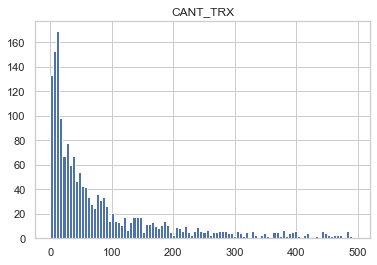

In [253]:
transac_valid = transac_valid[
    (transac_valid['PERIODO'].isin(periodos_valida))
].groupby(by=['COD_UNICO'])['CANT_TRX'].sum().reset_index()

transac_valid[transac_valid['CANT_TRX']< 500].hist(bins=100)

##### MENOS TRANSACCCIONES DEL 97% DE CLIENTES EN LOS 10 ULTIMOS MESES

In [254]:
minimas = transac_valid.CANT_TRX.quantile([0.05])[0.05]
print(minimas)

3.0


In [255]:
muy_pocas_trx = list(transac_valid[transac_valid['CANT_TRX'] <= minimas]['COD_UNICO'])
print(muy_pocas_trx)

['0000042432', '0000164442', '0000698035', '0001017383', '0002443489', '0003290442', '0004051991', '0004396685', '0005601901', '0008443663', '0008815054', '0009017582', '0009270081', '0009485552', '0009533643', '0009603473', '0009938270', '0010060934', '0010389823', '0010560205', '0010648747', '0010654931', '0010827069', '0010856041', '0010908680', '0011298258', '0011391154', '0011684313', '0011724103', '0011793990', '0011858461', '0011859730', '0011864617', '0011866676', '0011867008', '0011868355', '0011868520', '0011868669', '0011869439', '0011873465', '0011874221', '0011880968', '0012081965', '0012512961', '0012797219', '0012838940', '0013024951', '0013076430', '0013118232', '0013223134', '0013251454', '0013360786', '0013446995', '0013454627', '0013670229', '0013799902', '0013882826', '0013891946', '0013956156', '0014070972', '0014099089', '0014103851', '0014174372', '0014235789', '0014326077', '0014330303', '0014465392', '0014593237', '0014847426', '0014898678', '0015083504', '0015

In [256]:
analisis_cliente.columns

Index(['COD_UNICO', 'TRX_SUM_ACTAUL', 'TRX_SUM_PASADO', 'PERIODO',
       'PRE_TARGET_yoy'],
      dtype='object')

In [257]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente[~analisis_cliente['COD_UNICO'].isin(muy_pocas_trx)]
print(analisis_cliente.shape)

(9780, 5)
(9240, 5)


### DEFINICIION DE TARGET YOY

<AxesSubplot:>

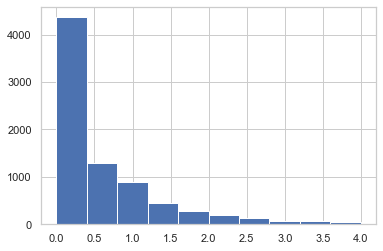

In [258]:
analisis_cliente[analisis_cliente['PRE_TARGET_yoy']< 4]['PRE_TARGET_yoy'].hist()

In [259]:
periodos_valida[-6]

'202006'

In [260]:
#periodos_valida

In [261]:
quantile_03 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6])) & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.35)
quantile_03

0.01568685911551443

In [262]:
quantile_04 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.45)
quantile_04

0.1447721649542082

In [263]:
quantile_05 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.55)
quantile_05

0.3107206680286801

In [264]:
quantile_06 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) >  int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.65)
quantile_06

0.4977748182380958

In [265]:
quantile_07 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.75)
quantile_07

0.7193106127087799

In [266]:
analisis_cliente['target_yoy_quartil_03'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_03).astype(int)
analisis_cliente['target_yoy_quartil_04'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_04).astype(int)
analisis_cliente['target_yoy_quartil_05'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_05).astype(int)
analisis_cliente['target_yoy_quartil_06'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_06).astype(int)
analisis_cliente['target_yoy_quartil_07'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_07).astype(int)
analisis_cliente.head(20)

,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO,PRE_TARGET_yoy,target_yoy_quartil_03,target_yoy_quartil_04,target_yoy_quartil_05,target_yoy_quartil_06,target_yoy_quartil_07
0,0000002469,NaN,0.000,202011,0.000000,1,1,1,1,1
0,0000002469,148310.750,0.000,202010,148310.750000,0,0,0,0,0
0,0000002469,148810.750,0.000,202009,148810.750000,0,0,0,0,0
0,0000002469,179700.000,300000.000,202008,0.599000,0,0,0,0,1
0,0000002469,3356516.670,300000.000,202007,11.188389,0,0,0,0,0
1,0000003392,NaN,1036741.075,202011,0.000000,1,1,1,1,1
1,0000003392,2745483.825,1303503.205,202010,2.106235,0,0,0,0,0
1,0000003392,5935461.335,2247736.390,202009,2.640639,0,0,0,0,0
1,0000003392,4996611.445,3188847.105,202008,1.566902,0,0,0,0,0
1,0000003392,2490147.445,2804726.165,202007,0.887840,0,0,0,0,0


In [267]:
analisis_cliente = base.merge(
    analisis_cliente[
        ['PERIODO', 'COD_UNICO', 'PRE_TARGET_yoy', 'target_yoy_quartil_03','target_yoy_quartil_04','target_yoy_quartil_05', 'target_yoy_quartil_06', 'target_yoy_quartil_07']
    ], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)


analisis_cliente.tail(3)

(9211, 609)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,M_Septile_cut_5.0,M_Septile_cut_6.0,M_Septile_cut_7.0,M_Septile_cut_nan,PRE_TARGET_yoy,target_yoy_quartil_03,target_yoy_quartil_04,target_yoy_quartil_05,target_yoy_quartil_06,target_yoy_quartil_07
9208,202011,0011442276,20526005610,0,EL ALAMO EXPORT,1,0,0,0,0,...,0,0,0,0,0.000000,1.0,1.0,1.0,1.0,1.0
9209,202011,0013179962,20425890558,0,PIEDRANGEL,0,0,0,0,0,...,0,0,0,0,0.000000,1.0,1.0,1.0,1.0,1.0
9210,202010,0010232391,20338048905,1,JAS IMPORT & EXPORT,0,1,0,0,0,...,0,0,0,0,0.212683,0.0,0.0,1.0,1.0,1.0


In [268]:
for column in [col for col in analisis_cliente.columns if ('trx' in col.lower() or 'cash' in col.lower()) and 'target' not in col.lower()]:
    analisis_cliente[col] = analisis_cliente[col].fillna(0)

In [269]:
[_.strftime('%Y%m') for _ in pd.date_range( now - relativedelta(months=11) , now - relativedelta(months=1), freq='MS')]

['202002',
 '202003',
 '202004',
 '202005',
 '202006',
 '202007',
 '202008',
 '202009',
 '202010',
 '202011']

In [270]:
import time
datetime.strptime( str(tramo[1][0]), '%Y%m')

datetime.datetime(2019, 8, 1, 0, 0)

In [271]:
dicc_kpi = {
    'VOLUMEN_SOLES': ['sum'] #count
}
columns_base = ['TRX_SUM_']
contador = 1

for tramo in tramos[::-1]:
    last_year = tramo[-2]
    mes_cerrado = tramo[0]
    new_year = tramo[-1]
    anio_pasado = [int(_.strftime('%Y%m')) for _ in pd.date_range( datetime.strptime( str(tramo[1][0]), '%Y%m') - relativedelta(months=6) ,  datetime.strptime( str(tramo[1][0]), '%Y%m') - relativedelta(months=1), freq='MS')]
    print("Mes cerrado: ", mes_cerrado, ', Meses target', tramo[1], tramo[2], tramo[3])
    print(anio_pasado)
    print(anio_pasado[-3:])
    print(anio_pasado[-6:])
    
    #break
    ultimos_3_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(tramo[3])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    ultimos_6_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(tramo[2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    aniopas_3_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(anio_pasado[-3:])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    aniopas_6_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(anio_pasado[-6:])].groupby(by=['COD_UNICO']).agg(dicc_kpi) 
    
    data_tramo = pd.concat(
        [ultimos_3_meses, ultimos_6_meses, aniopas_3_meses, aniopas_6_meses], axis=1
    )
    data_tramo.columns = ['TRX_SUM_U3M', 'TRX_SUM_U6M', 'TRX_PAS_U3M', 'TRX_PAS_U6M']
    data_tramo = data_tramo.reset_index().rename(columns={'index': 'COD_UNICO'})
    data_tramo['PERIODO'] = str(mes_cerrado)
    
    del ultimos_3_meses, ultimos_6_meses, aniopas_3_meses, aniopas_6_meses
    #del _2m_pasado
    
    if contador == 1:
        yoy_cash_in = data_tramo
    else:
        yoy_cash_in = pd.concat(
            [yoy_cash_in, data_tramo], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", yoy_cash_in.shape)

yoy_cash_in.head()                        

Mes cerrado:  202011 , Meses target [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011] [202009, 202010, 202011]
[201906, 201907, 201908, 201909, 201910, 201911]
[201909, 201910, 201911]
[201906, 201907, 201908, 201909, 201910, 201911]
-- (1956, 6)
Mes cerrado:  202010 , Meses target [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010] [202008, 202009, 202010]
[201905, 201906, 201907, 201908, 201909, 201910]
[201908, 201909, 201910]
[201905, 201906, 201907, 201908, 201909, 201910]
-- (3912, 6)
Mes cerrado:  202009 , Meses target [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009] [202007, 202008, 202009]
[201904, 201905, 201906, 201907, 201908, 201909]
[201907, 2

,COD_UNICO,TRX_SUM_U3M,TRX_SUM_U6M,TRX_PAS_U3M,TRX_PAS_U6M,PERIODO
0,0000002469,656021.50,10470027.58,600000.00,1401037.97,202011
1,0000003392,15484190.54,19767123.50,7229272.90,15178258.98,202011
2,0000006114,3587511.73,11703822.10,7590206.69,22379657.68,202011
3,0000008318,117271.71,554519.44,91676.14,191897.52,202011
4,0000038026,890946.30,1039808.88,2435583.67,4522254.09,202011


In [272]:
yoy_cash_in['YOY_input_cash_in_U3M'] = yoy_cash_in['TRX_SUM_U3M'] / yoy_cash_in['TRX_PAS_U3M']
yoy_cash_in['YOY_input_cash_in_U6M'] = yoy_cash_in['TRX_SUM_U6M'] / yoy_cash_in['TRX_PAS_U6M']

In [273]:
analisis_cliente = analisis_cliente.merge(
    yoy_cash_in[
        ['PERIODO', 'COD_UNICO', 'YOY_input_cash_in_U3M', 'YOY_input_cash_in_U6M']
    ], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)

analisis_cliente.tail(3)

(9211, 611)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,M_Septile_cut_7.0,M_Septile_cut_nan,PRE_TARGET_yoy,target_yoy_quartil_03,target_yoy_quartil_04,target_yoy_quartil_05,target_yoy_quartil_06,target_yoy_quartil_07,YOY_input_cash_in_U3M,YOY_input_cash_in_U6M
9208,202011,0011442276,20526005610,0,EL ALAMO EXPORT,1,0,0,0,0,...,0,0,0.000000,1.0,1.0,1.0,1.0,1.0,2.806373,1.734412
9209,202011,0013179962,20425890558,0,PIEDRANGEL,0,0,0,0,0,...,0,0,0.000000,1.0,1.0,1.0,1.0,1.0,9.031249,14.045642
9210,202010,0010232391,20338048905,1,JAS IMPORT & EXPORT,0,1,0,0,0,...,0,0,0.212683,0.0,0.0,1.0,1.0,1.0,0.751582,0.659290


In [274]:
gc.collect()

66

In [275]:
#from sqlalchemy import create_engine
#engine = create_engine(r"mssql+pymssql://ibetlmarket:m@rk3t2o15@10.11.12.90\BDT/MARKET")
#connection_x = engine.connect()

#try:
#    up[up['PERIODO'].isin(['202008', '202007'])].to_sql(
#        name='TRANSAC_ALERTA_BE',
#        schema='ODS',
#        con=connection_x, 
#        index=False, 
#        if_exists='replace'
#    )
#    connection_x.close()
#    correct = 1
#except Exception as e:
#    print("ERROR: ", str(e))
#    correct = 0

#print(correct)

In [276]:
del base
#del up

## A PEDIDO FOCO EN CANTIDADES DE TRANSACCIONES

In [277]:
transac_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION,MONTH
0,2019,201908,0013222363,CASH IN,,DEPOSITOS,1,100000.00,20190828,08
1,2019,201908,0013230742,CASH OUT,,TRANSFERENCIAS,4,281530.02,20190816,08
2,2019,201908,0013268476,CASH IN,,TRANSFERENCIAS,25,1242230.58,20190827,08
3,2019,201908,0013270981,CASH IN,,OPERACIONES MESA,1,427309.77,20190813,08
4,2019,201908,0013270981,CASH OUT,,TRANSFERENCIAS,16,7362426.95,20190827,08


In [278]:
acum = generate_listado_u3m(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN'], 'listados_num_trx', values='CANT_TRX',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1956, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(3912, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(5868, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(7824, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9780, 3)


,COD_UNICO,listados_num_trx,PERIODO
0,0000002469,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5]",202007
1,0000003392,"[11, 14, 17, 7, 10, 5, 7, 7, 7, 12, 16, 18]",202007
2,0000006114,"[30, 19, 12, 12, 16, 15, 12, 11, 12, 10, 8, 19]",202007
3,0000008318,"[8, 9, 5, 7, 4, 10, 7, 2, 7, 1, 1, 3]",202007
4,0000038026,"[5, 2, 6, 3, 3, 0, 1, 1, 1, 1, 0, 2]",202007


<AxesSubplot:>

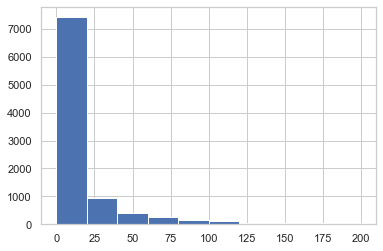

In [279]:
acum['PROM_CANT_TRX_U12M_CASHIN'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-12:]))
acum[acum['PROM_CANT_TRX_U12M_CASHIN']< 200]['PROM_CANT_TRX_U12M_CASHIN'].hist()

<AxesSubplot:>

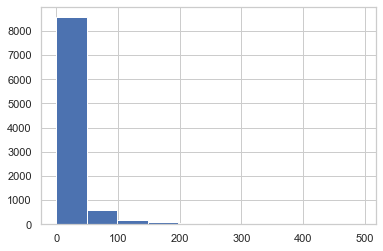

In [280]:
acum['PROM_CANT_TRX_U6M_CASHIN'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-6:]))
acum[acum['PROM_CANT_TRX_U6M_CASHIN']< 200]['PROM_CANT_TRX_U12M_CASHIN'].hist()

In [281]:
acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN'] =  acum['PROM_CANT_TRX_U6M_CASHIN'] - acum['PROM_CANT_TRX_U12M_CASHIN']
def div_flash(a, b):
    if not(b):
        return a
    
    return a/b


acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'] = acum[['PROM_CANT_TRX_U6M_CASHIN', 'PROM_CANT_TRX_U12M_CASHIN']].apply(lambda _: div_flash(_[0], _[1]), axis=1)
acum['TIENE_DISMINUCION_1PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.99)
acum['TIENE_DISMINUCION_3PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.97)
acum['TIENE_DISMINUCION_5PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.95)
acum['TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.9)
acum['TIENE_DISMINUCION_15PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.85)
acum['TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.8)
acum['TIENE_DISMINUCION_25PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.75)
acum['TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.7)
acum['TIENE_DISMINUCION_35PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.65)
acum['TIENE_DISMINUCION_40PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.6)
acum['TIENE_DISMINUCION_45PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.55)

acum['TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ > 0).astype(int)
acum['TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ < 0).astype(int)

In [282]:


acum['TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.1).astype(int)
acum['TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.2).astype(int)
acum['TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.3).astype(int)

acum['TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.9).astype(int)
acum['TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.8).astype(int)
acum['TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.7).astype(int)

In [283]:
del acum['listados_num_trx']
acum.head()

,COD_UNICO,PERIODO,PROM_CANT_TRX_U12M_CASHIN,PROM_CANT_TRX_U6M_CASHIN,DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN,ratio_PROM_CANT_TRX_U6M_U12M_CASHIN,TIENE_DISMINUCION_1PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,TIENE_DISMINUCION_3PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,TIENE_DISMINUCION_5PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,...,TIENE_DISMINUCION_40PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,TIENE_DISMINUCION_45PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M,TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M,TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT,TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT,TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT,TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT,TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT,TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT
0,0000002469,202007,0.583333,1.000000,0.416667,1.714286,False,False,False,False,...,False,False,1,0,1,1,1,0,0,0
1,0000003392,202007,10.916667,11.166667,0.250000,1.022901,False,False,False,False,...,False,False,1,0,1,0,0,0,0,0
2,0000006114,202007,14.666667,12.000000,-2.666667,0.818182,True,True,True,True,...,False,False,0,1,1,1,1,0,0,0
3,0000008318,202007,5.333333,3.500000,-1.833333,0.656250,True,True,True,True,...,False,False,0,1,1,1,1,0,0,0
4,0000038026,202007,2.083333,1.000000,-1.083333,0.480000,True,True,True,True,...,True,True,0,1,1,1,1,0,0,0


In [284]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 634)

## LO MISMO PARA EL CASH OUT

In [285]:
acum = generate_listado_u3m(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH OUT'], 'listados_num_trx', values='CANT_TRX',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1964, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(3928, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(5892, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(7856, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9820, 3)


,COD_UNICO,listados_num_trx,PERIODO
0,0000002469,"[7, 22, 8, 6, 6, 6, 6, 6, 6, 4, 9, 6]",202007
1,0000003392,"[52, 54, 51, 41, 49, 48, 51, 44, 29, 44, 38, 37]",202007
2,0000006114,"[43, 48, 49, 30, 41, 59, 26, 25, 33, 17, 24, 74]",202007
3,0000008318,"[49, 38, 30, 66, 54, 47, 45, 49, 32, 27, 33, 37]",202007
4,0000037374,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]",202007


In [286]:
acum['PROM_CANT_TRX_U12M_CASHOUT'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-12:]))
acum['PROM_CANT_TRX_U6M_CASHOUT'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-6:]))

acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT'] =  acum['PROM_CANT_TRX_U6M_CASHOUT'] - acum['PROM_CANT_TRX_U12M_CASHOUT']

acum['TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT'].apply(lambda _: _ > 0).astype(int)
acum['TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT'].apply(lambda _: _ < 0).astype(int)

acum['TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.1).astype(int)
acum['TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.2).astype(int)
acum['TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.3).astype(int)

acum['TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.9).astype(int)
acum['TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.8).astype(int)
acum['TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.7).astype(int)

In [287]:
del acum['listados_num_trx']
acum.head()

,COD_UNICO,PERIODO,PROM_CANT_TRX_U12M_CASHOUT,PROM_CANT_TRX_U6M_CASHOUT,DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT,TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M,TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M,TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT
0,0000002469,202007,7.666667,6.166667,-1.500000,0,1,0,0,0,1,1,1
1,0000003392,202007,44.833333,40.500000,-4.333333,0,1,0,0,0,0,0,0
2,0000006114,202007,39.083333,33.166667,-5.916667,0,1,1,1,1,0,0,0
3,0000008318,202007,42.250000,37.166667,-5.083333,0,1,1,0,0,0,0,0
4,0000037374,202007,2.000000,2.000000,0.000000,0,0,0,0,0,0,0,0


In [288]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 645)

### BASE CLIENTES UNIVERSO MESA ALERTAS

In [289]:
query_base = """
    SELECT * FROM ODS.HD_VMVP_BASE_ALERTA_CARTERA_BE WITH (NOLOCK)
"""
base = pd.read_sql(
   query_base , connection_market
)
base.head(2)

,FEVE,PERIODO,CODUNICOCLI,NOMBRE_COMPLETO,FLG_VIGENTE,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,ES_ACTIVO,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,TIPDOC,CODDOC,NUM_RUC
0,None,202007,0015071424,Q MEDICAL,1,0,0,0,0,0,...,S,NORMAL,NORMAL,LIMA,2017-03-07,2018-04-12,SERVICIOS,2,20505719396,20505719396
1,None,202007,0015076938,APLEX TRADING,1,0,0,0,0,0,...,S,NORMAL,NORMAL,LIMA,2017-03-10,2017-07-11,COMERCIO,2,20538176967,20538176967


In [290]:
base.shape, base['CODUNICOCLI'].unique().shape

((9212, 39), (2036,))

In [291]:
base.shape

(9212, 39)

### Ultimo feve actual es el target de la cosecha_anterior (LUEGO SE DEBE BAJAR 2 MESES PAAR CONSIDERAR VENTANA OCULTA)

In [292]:
#base['PERIODO'] = (datetime.strptime(ultimo_mes_cerrado, '%Y%m') - relativedelta(months=1)).strftime('%Y%m')
#base['COD_UNICO']  = base['CODUNICOCLI']

In [293]:
#base[['PERIODO', 'COD_UNICO', 'FEVE']].head(3)

In [294]:
#analisis_cliente = analisis_cliente.merge(
#    base[['PERIODO', 'COD_UNICO', 'FEVE']], how='left', on=['PERIODO', 'COD_UNICO']
#)
#analisis_cliente.shape

In [295]:
gc.collect()

132

### CONOCEME

In [296]:
#query_conoceme = """
#    SELECT * FROM WEBBE_INFINITY_CONOCEME  WITH (NOLOCK) 
#    ORDER BY FECHA_ACTUALIZACION DESC
#"""
#conoceme = pd.read_sql(
#   query_conoceme , connection_b20
#)

query_conoceme = """
     SELECT * FROM STG.T_WEBBE_INFINITY_CONOCEME WITH (NOLOCK) 
    ORDER BY FECHA_ACTUALIZACION DESC
"""
conoceme = pd.read_sql(
   query_conoceme , connection_market
)

print("ANTES con duplicados: ", conoceme.shape[0])
conoceme = conoceme.drop_duplicates(subset=['COD_UNICO'], keep='first')
print("Regsistros unicos por codigo único: ", conoceme.shape[0])

conoceme.head(2)

ANTES con duplicados:  1060
Regsistros unicos por codigo único:  1051


,COD_UNICO,ACTIVIDAD,SUBSECTOR,BACKLOG,MODELO_NEGOCIO,VENTAJA_COMPETITIVA,FORTALEZAS_RIESGOS,INTEGRACION_VERTICAL,GESTION_COMPRAS,REGISTRO,...,PROYECCION_VENTAS,FECHA_ACTUALIZACION,PROCEDENCIA_MPRIMA,LINEA_SUCESION_FLAG,LINEA_SUCESION,CAMBIO_GERENCIA_GENERAL_ANNIO,CAMBIO_ACCIONISTAS_ANNIO,INICIO_IBK,INICIO_OP,FECHA_CARGA
0,0012958179,Industria,Textil y calzado,No Aplica,La empresa se dedica a la comercialización de ...,El cliente maneja una cartera que se compone p...,FORTALEZAS:\r\n•\tProductos de alta calidad co...,None,None,B36045,...,NaN,2020-12-28 16:37:57,Local,0,None,NaN,NaN,2012.0,2012.0,2020-12-29 05:20:00
1,0016307896,Servicios,Minería,Servicios,Empresa especializada en la trituración y clas...,Representación de marcas de maquinaria especia...,-\tNivel de ventas en año 1 (2019) de US$ 2.8M...,None,None,B37367,...,NaN,2020-12-28 08:57:10,Local,0,None,NaN,NaN,2020.0,2018.0,2020-12-29 05:20:00


In [297]:
conoceme['CAMBIO_ACCIONISTAS_ANNIO'].value_counts(dropna=False)

NaN       1048
2020.0       2
2019.0       1
Name: CAMBIO_ACCIONISTAS_ANNIO, dtype: int64

In [298]:
conoceme['CAMBIO_GERENCIA_GENERAL_ANNIO'].value_counts(dropna=False)

NaN       1047
2020.0       3
2019.0       1
Name: CAMBIO_GERENCIA_GENERAL_ANNIO, dtype: int64

In [299]:
#conoceme['FECHA_ACTUALIZACION'].astype(str)

In [300]:
conoceme.columns

Index(['COD_UNICO', 'ACTIVIDAD', 'SUBSECTOR', 'BACKLOG', 'MODELO_NEGOCIO',
       'VENTAJA_COMPETITIVA', 'FORTALEZAS_RIESGOS', 'INTEGRACION_VERTICAL',
       'GESTION_COMPRAS', 'REGISTRO', 'GERENTE_GENERAL',
       'GERENTE_FINANCIERO_TIPO', 'GERENTE_FINANCIERO_NOMBRE',
       'TIPO_CONTABILIDAD', 'MONTO_LINEA_PROVEEDORES', 'ACTIVO_LIBRE_GRAVAMEN',
       'PROYECCION_INVERSION', 'PROYECCION_VENTAS', 'FECHA_ACTUALIZACION',
       'PROCEDENCIA_MPRIMA', 'LINEA_SUCESION_FLAG', 'LINEA_SUCESION',
       'CAMBIO_GERENCIA_GENERAL_ANNIO', 'CAMBIO_ACCIONISTAS_ANNIO',
       'INICIO_IBK', 'INICIO_OP', 'FECHA_CARGA'],
      dtype='object')

<AxesSubplot:>

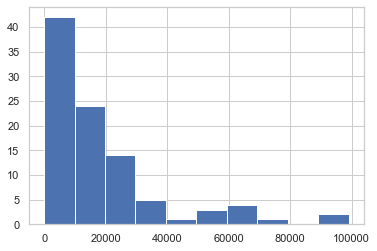

In [301]:
conoceme[conoceme['PROYECCION_VENTAS'] < 100000]['PROYECCION_VENTAS'].hist()

<AxesSubplot:>

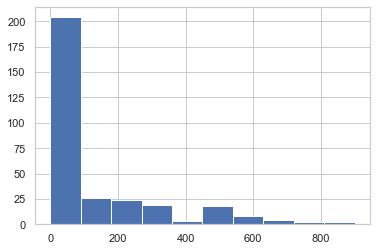

In [302]:
conoceme[conoceme['PROYECCION_INVERSION'] < 1000]['PROYECCION_INVERSION'].hist()

In [303]:
conoceme.isnull().sum()

COD_UNICO                           0
ACTIVIDAD                          10
SUBSECTOR                          20
BACKLOG                            38
MODELO_NEGOCIO                      6
VENTAJA_COMPETITIVA                23
FORTALEZAS_RIESGOS                 46
INTEGRACION_VERTICAL             1051
GESTION_COMPRAS                   977
REGISTRO                            0
GERENTE_GENERAL                    25
GERENTE_FINANCIERO_TIPO           168
GERENTE_FINANCIERO_NOMBRE         233
TIPO_CONTABILIDAD                   0
MONTO_LINEA_PROVEEDORES           443
ACTIVO_LIBRE_GRAVAMEN             443
PROYECCION_INVERSION              685
PROYECCION_VENTAS                 952
FECHA_ACTUALIZACION                 0
PROCEDENCIA_MPRIMA                252
LINEA_SUCESION_FLAG                 1
LINEA_SUCESION                    443
CAMBIO_GERENCIA_GENERAL_ANNIO    1047
CAMBIO_ACCIONISTAS_ANNIO         1048
INICIO_IBK                         71
INICIO_OP                          74
FECHA_CARGA 

In [304]:
analisis_cliente.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,PROM_CANT_TRX_U6M_CASHOUT,DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT,TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M_y,TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M_y,TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,56.000000,6.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,9.833333,1.083333,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,202008,0001420892,20132091979,1,TAWA,0,0,0,0,0,...,37.000000,-8.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,202008,0008391729,20103668876,1,REPRESENTACIONES Y DISTRIBUCIONES DEL,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202008,0008401169,20109104397,1,LIMPIEZA Y APOYO DE PERSONAL,0,0,1,0,0,...,57.000000,-8.083333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [305]:
len(conoceme['SUBSECTOR'].unique())

65

In [306]:
print(conoceme['SUBSECTOR'].unique())

['Textil y calzado' 'Minería' 'Artículos diversos' 'Productos Eléctricos'
 'Equipos computo' 'Clínicas' 'Construcción de Edificios'
 'Agrícola (Granos y Frutos)' 'Equipos' 'Turismo' 'Taller Automotriz'
 'Abarrotes' 'Acondicionamiento de Edificios' 'Metalmecánica'
 'Fundición y Metales' 'Ganadero' 'Restaurante y eventos sociales'
 'Agencia de Aduanas y servicios relacionados' 'Imprenta y papel'
 'Publicidad' 'Productos Marinos' 'Artículos de limpieza' None
 'Servicios De Ingeniería' 'Construcción de Carreteras' 'Hotelería'
 'Medicamentos y equipos médicos' 'Plástico y derivados' 'Catering'
 'Tecnología y Telecomunicaciones' 'Servicios diversos'
 'Alquiler de equipos' 'Estación de Servicio' 'Obras civiles' 'Madera'
 'Saneamiento' 'Vehículos, repuestos y accesorios' 'Mantenimiento'
 'Limpieza' 'Transporte de Carga' 'Empresa de Transmisión'
 'Transporte interprovincial' 'Químicos' 'Agrícola (Siembra)'
 'Hidrocarburos' 'Gestión Empresarial' 'Bebidas alcohólicas'
 'Servicios financieros' 'Ag

In [307]:
texto_banca = 'Vehículos_Textil y calzado_Turismo_Restaurante y eventos sociales_Hotelería_Transporte interprovincial_Transporte Urbano_Construcción de Edificio_Acondicionamiento de Edificios'

In [308]:
analisis_cliente = analisis_cliente.merge(
    conoceme[['COD_UNICO', 'ACTIVIDAD', 'SUBSECTOR', 'BACKLOG', 'INICIO_IBK', 'INICIO_OP', 'CAMBIO_GERENCIA_GENERAL_ANNIO', 'CAMBIO_ACCIONISTAS_ANNIO',
             'PROYECCION_INVERSION', 'PROYECCION_VENTAS']],
    how='left', on=['COD_UNICO']
)

analisis_cliente.shape

(9211, 654)

In [309]:
analisis_cliente['subsector_obervado_banca'] = analisis_cliente['SUBSECTOR'].apply(lambda _: str(_).upper() in texto_banca.upper()).astype(int)

In [310]:
del conoceme

In [311]:
#vpc['ES_ACTIVO'].value_counts(dropna=False)

In [312]:
#vpc['PERIODO'].max()

In [313]:
'FEC_INGRESO' in analisis_cliente.columns

True

In [314]:
analisis_cliente['FEC_INGRESO'] = pd.to_datetime(
    analisis_cliente['FEC_INGRESO'], errors='coerce', format='%Y-%m-%d'
)
analisis_cliente['FEC_PRIMER_PRODUCTO_APERTURADO'] = pd.to_datetime(
    analisis_cliente['FEC_PRIMER_PRODUCTO_APERTURADO'], errors='coerce', format='%Y-%m-%d'
)

def apply_diff_date(serie_diff):
    return (serie_diff / np.timedelta64(1,'D')).round(3)

analisis_cliente['DIFF_TIME_INICIO_IBK_FIRST_PRODUCT'] = apply_diff_date(
    analisis_cliente['FEC_PRIMER_PRODUCTO_APERTURADO'] - analisis_cliente['FEC_INGRESO']
)

In [315]:
if 'FEC_PRIMER_PRODUCTO_APERTURADO' in analisis_cliente.columns:
    del analisis_cliente['FEC_PRIMER_PRODUCTO_APERTURADO']
    
analisis_cliente['CLASIF_SBS'] = analisis_cliente['CLASIF_SBS'].fillna('MULO')
analisis_cliente['CLASIF_IBK'] = analisis_cliente['CLASIF_IBK'].fillna('MULO')
analisis_cliente['DEPARTAMENTO'] = analisis_cliente['DEPARTAMENTO'].fillna('MULO')

analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente[['CLASIF_SBS', 'CLASIF_IBK']].apply(lambda _: _[0].upper() == 'NORMAL' and  _[1].upper() == 'NORMAL', axis=1)
analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente['IS_NORMAL_IBK_SBS'].fillna('NULO')
analisis_cliente['LUGAR'] = analisis_cliente['DEPARTAMENTO'].apply(lambda _: 'PROVINCIA' if _.upper() not in ['LIMA', 'CALLAO'] else _)

In [316]:
#vpc['COD_UNICO'] = vpc['CODUNICOCLI']
#vpc.shape, vpc.groupby(by=['PERIODO', 'COD_UNICO']).size().shape, analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

In [317]:
#vpc['COD_UNICO'].unique().shape

In [318]:
#def apply_upper(val):
#    if pd.isnull(val):
#       return None
    
#    return val.upper()
#vpc['FEVE'] = vpc['FEVE'].apply(lambda _: apply_upper(_))
#vpc['IS_NORMAL_IBK_SBS'] = vpc['IS_NORMAL_IBK_SBS'].astype(int)
#vpc['DEPARTAMENTO'] = vpc['DEPARTAMENTO'].apply(lambda _: apply_upper(_))
#vpc.head()

In [319]:
#vpc['FEVE_DURO'] = vpc['FEVE'].copy()
#del vpc['FEVE']

In [320]:
analisis_cliente.shape

(9211, 657)

#### TARGET FEVE

In [321]:
query_vpc = """
    SELECT * FROM ODS.HD_VMVP_VPC_CLIENTE_ALERTAS_CARTERA_BE WITH (NOLOCK)

"""
vpc = pd.read_sql(
   query_vpc , connection_market
)
vpc.head()

,PERIODO,CODUNICOCLI,FEVE,ES_ACTIVO,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,NUM_RUC
0,202001,0006334742,None,S,NORMAL,NORMAL,ICA,1997-03-11,2012-08-02,PESCA,20325288991
1,202001,0009727528,EX-FEVE,S,NORMAL,NORMAL,LIMA,2006-02-24,2006-02-24,TRANSPORTE,20292391189
2,202003,0013360786,None,S,NORMAL,NORMAL,LIMA,2013-08-19,2019-09-09,TEXTIL,20479721166
3,202001,0009850379,EX-FEVE,S,NORMAL,NORMAL,LIMA,2006-07-25,2008-03-06,SERVICIOS,20469962246
4,202001,0015057855,None,S,NORMAL,NORMAL,LIMA,2017-02-23,2017-02-28,SERVICIOS,20601438748


In [322]:
vpc['PERIODO'].max(), vpc['PERIODO'].min(), vpc.shape

('202011', '202001', (21986, 11))

In [323]:
vpc['COD_UNICO'] = vpc['CODUNICOCLI'].copy()

vpc = vpc.rename(columns={'FEVE': 'FEVE_VPC'}).merge(
    analisis_cliente[['PERIODO', 'COD_UNICO', 'FEVE']], how='left', on=['PERIODO', 'COD_UNICO']
).sort_values(by=['PERIODO'])
vpc.tail(50)

,PERIODO,CODUNICOCLI,FEVE_VPC,ES_ACTIVO,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,NUM_RUC,COD_UNICO,FEVE
20194,202011,0014156783,None,S,NORMAL,NORMAL,LIMA,2015-04-28,2015-07-03,COMERCIO,20453946038,0014156783,None
20195,202011,0013461765,None,S,NORMAL,NORMAL,LIMA,2013-10-30,2015-07-22,ENERGÍA,20520616102,0013461765,NaN
14013,202011,0016313764,None,S,NORMAL,NORMAL,UCAYALI,2019-08-14,2019-08-14,COMERCIO,20601380707,0016313764,None
3979,202011,0016238377,None,S,NORMAL,NORMAL,LIMA,2019-07-03,2019-07-11,INDUSTRIA,20509438448,0016238377,None
18425,202011,0001420892,None,S,NORMAL,NORMAL,LA LIBERTAD,1993-11-03,1994-06-22,COMERCIO,20132091979,0001420892,None
5621,202011,0009597783,None,S,NORMAL,NORMAL,CALLAO,2005-09-21,2019-01-24,INDUSTRIA,20101322824,0009597783,None
1172,202011,0011874761,None,S,NORMAL,NORMAL,LA LIBERTAD,2010-08-10,2012-05-24,TRANSPORTE,20439208474,0011874761,None
11218,202011,0008157168,EX-FEVE,S,NORMAL,NORMAL,AREQUIPA,1998-03-16,2015-04-17,CONSTRUCCIÓN,20133176404,0008157168,EX-FEVE
11219,202011,0008878535,SEGUIR,S,NORMAL,NORMAL,LAMBAYEQUE,2001-10-22,2001-10-22,INDUSTRIA,20394862704,0008878535,SEGUIR
9476,202011,0011403545,SEGUIR,S,NORMAL,NORMAL,LIMA,2009-10-26,2009-12-22,CONSTRUCCIÓN,20512162291,0011403545,SEGUIR COVID


In [324]:
vpc['FEVE'] = vpc['FEVE'].combine_first(vpc['FEVE_VPC']).apply(lambda _: None if pd.isnull(_) else _.upper())

In [325]:
#analisis_cliente = analisis_cliente.merge(
#    vpc[['PERIODO', 'COD_UNICO', 'ES_ACTIVO', 'DIFF_TIME_INICIO_IBK_FIRST_PRODUCT', 'SEI_MCDO', 'LUGAR', 'DEPARTAMENTO', 'FEC_INGRESO']],
#    how='left', on=['PERIODO','COD_UNICO']
#)
analisis_cliente.shape

(9211, 657)

In [326]:
analisis_cliente[analisis_cliente['PERIODO'].astype(int) >= 202007]['FEC_INGRESO'].head()

0   2017-03-07
1   2017-03-10
2   1993-11-03
3   1999-10-19
4   1999-11-25
Name: FEC_INGRESO, dtype: datetime64[ns]

In [327]:
#def get_antiguedad_ibk(fec, period):
#    #print(type(fec), type(period))
#    if pd.isnull(fec) or not fec:
#        return None
    
#    period_date = datetime.strptime(str(period), '%Y%m') + relativedelta(months=1)
#    return (period_date - fec).days
    
#analisis_cliente['ANTIGUEDAD_IBK'] = analisis_cliente[['FEC_INGRESO', 'PERIODO']].apply(
#    lambda _: get_antiguedad_ibk(_[0], _[1]), 
#    axis=1
#)

#display(analisis_cliente[analisis_cliente['PERIODO'].isin(['202007', '202008'])][['FEC_INGRESO', 'PERIODO', 'ANTIGUEDAD_IBK']].head(10))
#del analisis_cliente['FEC_INGRESO']

In [328]:
tramo[1][3:]

[201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009]

In [329]:
#vpc['PERIODO'].isin(tramo[1][3:]).shape

In [330]:
base.columns

Index(['FEVE', 'PERIODO', 'CODUNICOCLI', 'NOMBRE_COMPLETO', 'FLG_VIGENTE',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3',
       'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL',
       'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4',
       'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO', 'FEVE_FICHA',
       'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'ES_ACTIVO', 'CLASIF_SBS',
       'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO',
       'FEC_PRIMER_PRODUCTO_APERTURADO', 'SEI_MCDO', 'TIPDOC', 'CODDOC',
       'NUM_RUC'],
      dtype='object')

In [331]:
feve_duro = list(vpc[
    (vpc['FEVE'].isin(['REDUCIR', 'SALIR'])) & (
        (vpc['PERIODO'] == str(202010)) | (vpc['PERIODO'] == str(202011))
    )
]['COD_UNICO'])
print(set(feve_duro), len(set(feve_duro)))

{'0010087482', '0010127885', '0015253866', '0015467161', '0010637696', '0003934692', '0014181775', '0008872571', '0009007850', '0001728989', '0011874206', '0010654025', '0009548854', '0011863267', '0015022206', '0010019822', '0013532403', '0010821635', '0012767492', '0015145181', '0010290395', '0005834015', '0011042168', '0012857674', '0013248860', '0010560205', '0008370373', '0010335543', '0015435251', '0011869439', '0011608752', '0015379485', '0009621308', '0013891946', '0009646792', '0013258239', '0007504210', '0016376605', '0009037826', '0011880968', '0014722942', '0008718102', '0010029372', '0011026743', '0010040783', '0013939829', '0012748709', '0008345852', '0014276135', '0015167346', '0011866326', '0009533643', '0009570102', '0006065262', '0012768934', '0010856041', '0016399085', '0009270081', '0009114283', '0014197631', '0009676730', '0011563661', '0008843374', '0008948373', '0009678586', '0015488039', '0009068595', '0013009041', '0011871622', '0013681086', '0015134617', '0011

In [332]:
mes_analisis = str(202009)

descarte = list(vpc[
    (vpc['FEVE'].isin(['REDUCIR', 'SALIR'])) & (vpc['PERIODO'] == mes_analisis) 

]['COD_UNICO'])
print(len(descarte))
print(set(feve_duro) - set(descarte))
print(len(set(feve_duro) - set(descarte)))

111
{'0008843374', '0009678586', '0010489415', '0011714485', '0016376605', '0008708300', '0001728989', '0010654025', '0015167346', '0010019822', '0010821635', '0012767492', '0015145181', '0011595792', '0010856041', '0011020678', '0004610952', '0009114283', '0009033251', '0014197631', '0010335543', '0011563661'}
22


In [333]:
feve_duro = list(vpc[
    (vpc['FEVE'].isin(['SEGUIR COVID'])) & (
        (vpc['PERIODO'] == str(202009)) | (vpc['PERIODO'] == str(202010))
    )
]['COD_UNICO'])
print(set(feve_duro), len(set(feve_duro)))

{'0011365936', '0011912304', '0002477404', '0015160688', '0003416104', '0005494588', '0009501452', '0000457945', '0016661983', '0010650823', '0008236553', '0000982421', '0011872669', '0011866269', '0014973609', '0012430609', '0001861731', '0000222257', '0010251366', '0013498149', '0015166785', '0011608224', '0009789067', '0011874308', '0015550861', '0009330565', '0000251447', '0009501030', '0003028776', '0013322860', '0015162754', '0009130940', '0007367618', '0011693045', '0009270600', '0010969184', '0014417829', '0014632616', '0011655899', '0015398520', '0011438822', '0001489426', '0011228447', '0011038158', '0011869653', '0002362010', '0008355245', '0010207631', '0010666938', '0013230742', '0013818065', '0014982264', '0011874558', '0012838940', '0000054874', '0011869246', '0012896664', '0007567530', '0008443816', '0015765577', '0013824133', '0009966673', '0004189304', '0014861280', '0013310596', '0010698731', '0014863281', '0016496806', '0012579135', '0002443489', '0014546316', '0014

In [334]:
descarte = list(vpc[
    (vpc['FEVE'].isin(['SEGUIR COVID'])) & (vpc['PERIODO'] == str(202009))

]['COD_UNICO'])

print(len(descarte))
print(set(feve_duro) - set(descarte))
print(len(set(feve_duro) - set(descarte)))

0
{'0011365936', '0011912304', '0002477404', '0015160688', '0003416104', '0005494588', '0009501452', '0000457945', '0016661983', '0010650823', '0008236553', '0000982421', '0011872669', '0011866269', '0014973609', '0012430609', '0001861731', '0000222257', '0010251366', '0013498149', '0015166785', '0011608224', '0009789067', '0011874308', '0015550861', '0009330565', '0000251447', '0009501030', '0003028776', '0013322860', '0015162754', '0009130940', '0007367618', '0011693045', '0009270600', '0010969184', '0014417829', '0014632616', '0011655899', '0015398520', '0011438822', '0001489426', '0011228447', '0011038158', '0011869653', '0002362010', '0008355245', '0010207631', '0010666938', '0013230742', '0013818065', '0014982264', '0011874558', '0012838940', '0000054874', '0011869246', '0012896664', '0007567530', '0008443816', '0015765577', '0013824133', '0009966673', '0004189304', '0014861280', '0013310596', '0010698731', '0014863281', '0016496806', '0012579135', '0002443489', '0014546316', '00

# >> REDUCIR SALIR

In [335]:
contador = 1
for tramo in tramos:
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    print(tramo[0], delante, just_antes)
    break

202007 [202008, 202009] 202007


In [336]:
analisis_cliente['PERIODO'].value_counts()

202007    1923
202008    1882
202009    1832
202010    1801
202011    1773
Name: PERIODO, dtype: int64

In [337]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    feve_duro = list(vpc[
        (vpc['FEVE'].isin(['REDUCIR', 'SALIR'])) & (
            (vpc['PERIODO'] == str(delante[0])) | (vpc['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])
    
    descarte = list(vpc[
        (vpc['FEVE'].isin(['REDUCIR', 'SALIR'])) & (vpc['PERIODO'] == str(just_antes)) 
    ]['COD_UNICO'])
    
    no_blancos = set(vpc[
        (vpc['FEVE'].isin(['REDUCIR', 'SALIR'])) | (
            vpc['PERIODO'].isin(tramo[2])
        )
    ]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in descarte:
            return 1
        elif codigo in descarte or codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_feve_reducir_salir'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    

    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(feve.shape, feve[feve['target_feve_reducir_salir'] == 1].shape)
feve.head()

202007 [202008, 202009] 202007
(2036, 4) (31, 4)
202008 [202009, 202010] 202008
(4072, 4) (70, 4)
202009 [202010, 202011] 202009
(6108, 4) (92, 4)
202010 [202011, 202012] 202010
(8144, 4) (93, 4)
202011 [202012, 202101] 202011
(10180, 4) (93, 4)


,COD_UNICO,0,target_feve_reducir_salir,PERIODO
0,0000002469,5,0.0,202007
1,0000003392,5,0.0,202007
2,0000006114,5,0.0,202007
3,0000008318,5,0.0,202007
4,0000037374,2,0.0,202007


In [338]:
feve['PERIODO'].value_counts()

202010    2036
202007    2036
202008    2036
202011    2036
202009    2036
Name: PERIODO, dtype: int64

In [339]:
feve[feve['PERIODO'].astype(int) >= 202007]['target_feve_reducir_salir'].value_counts(dropna=False)

0.0    9470
NaN     617
1.0      93
Name: target_feve_reducir_salir, dtype: int64

In [340]:
analisis_cliente.shape

(9211, 657)

In [341]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 658)

In [342]:
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir'],  analisis_cliente['PERIODO'], margins=True
)

PERIODO,202007,202008,202009,202010,202011,All
target_feve_reducir_salir,,,,,,
0.0,1782,1744,1704,1677,1652,8559
1.0,31,39,22,1,0,93
All,1813,1783,1726,1678,1652,8652


In [343]:
del feve

In [344]:
del transac_cliente

In [345]:
gc.collect()

88

## >>> RESCATE SEGUIR COVID

In [346]:
max_period_vpc = analisis_cliente['PERIODO'].max()
max_period_vpc

'202011'

In [347]:
clientes = clientes[['COD_UNICO', 'FEVE']]
clientes['PERIODO'] = max_period_vpc
clientes['FEVE_'] = clientes['FEVE'].str.upper()
clientes.head()

,COD_UNICO,FEVE,PERIODO,FEVE_
0,0015071424,None,202011,None
1,0015076938,None,202011,None
2,0001420892,None,202011,None
3,0008391729,SEGUIR,202011,SEGUIR
4,0008401169,EX-FEVE,202011,EX-FEVE


In [348]:
clientes['FEVE_'].value_counts()

EX-FEVE         2763
GARANTIZAR      1200
SEGUIR           725
SEGUIR COVID     405
REDUCIR          402
SALIR            113
Name: FEVE_, dtype: int64

In [349]:
#analisis_cliente = analisis_cliente.merge(
#    clientes, how='left', on=['COD_UNICO', 'PERIODO']
#)

In [350]:
#vpc['FEVE_'] = vpc['FEVE_'].combine_first(vpc['FEVE_x'])
#vpc.head()

In [351]:
#feve_duro = list(vpc[
#    (vpc['FEVE_x'].isin(['SEGUIR'])) &(vpc['FEVE_'].isin(['SEGUIR COVID'])) & (
#        (vpc['PERIODO'] == str(202009)) | (vpc['PERIODO'] == str(202010))
#    )
#]['COD_UNICO'])
#print(feve_duro, len(feve_duro))

In [352]:
#descarte = list(vpc[
#    (vpc['FEVE_'].isin(['REDUCIR', 'SALIR', 'SEGUIR'])) & (vpc['PERIODO'] == str(202008)) 

#]['COD_UNICO'])
#print(len(descarte))
#print(set(feve_duro) - set(descarte), len(set(feve_duro) - set(descarte)))

In [353]:
#vpc[vpc['COD_UNICO'] == '0011463767'].sort_values(by=['PERIODO'])

# >> SEGUIR COVID

In [354]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    feve_duro = list(vpc[
        (vpc['FEVE'].isin(['SEGUIR COVID']))  & (
            (vpc['PERIODO'] == str(delante[0])) | (vpc['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])
    print(len(feve_duro))
    
    descarte = list(vpc[
        (vpc['FEVE'].isin(['REDUCIR', 'SALIR', 'SEGUIR COVID'])) & (vpc['PERIODO'] == str(just_antes)) 
    ]['COD_UNICO'])
    print(len(descarte))
    
    no_blancos = set(vpc[
        (vpc['FEVE'].isin(['REDUCIR', 'SALIR','SEGUIR COVID'])) | (
            vpc['PERIODO'].isin(tramo[2])
        )
    ]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in descarte:
            return 1
        elif codigo in descarte or codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['cambio_seguir_covid'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        seguir = quedan
    else:
        seguir = pd.concat(
            [seguir, quedan], axis=0
        )
    
    contador += 1
    

    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(seguir.shape, seguir[seguir['cambio_seguir_covid'] == 1].shape)
seguir.head()

202007 [202008, 202009] [202002, 202003, 202004, 202005, 202006, 202007]
0
87
(2036, 4) (0, 4)
202008 [202009, 202010] [202003, 202004, 202005, 202006, 202007, 202008]
204
98
(4072, 4) (202, 4)
202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
405
111
(6108, 4) (404, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
201
333
(8144, 4) (404, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
0
326
(10180, 4) (404, 4)


,COD_UNICO,0,cambio_seguir_covid,PERIODO
0,0000002469,5,0.0,202007
1,0000003392,5,0.0,202007
2,0000006114,5,0.0,202007
3,0000008318,5,0.0,202007
4,0000037374,2,0.0,202007


In [355]:
seguir['cambio_seguir_covid'].value_counts()

0.0    8460
1.0     404
Name: cambio_seguir_covid, dtype: int64

In [356]:
analisis_cliente = analisis_cliente.merge(
    seguir[['PERIODO', 'COD_UNICO', 'cambio_seguir_covid']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 659)

In [357]:
'cambio_seguir_covid' in analisis_cliente.columns

True

In [358]:
analisis_cliente[
    (analisis_cliente['target_feve_reducir_salir'] == 1) | (analisis_cliente['cambio_seguir_covid'] == 1)
].shape

(496, 659)

In [359]:
pd.crosstab(
    analisis_cliente['cambio_seguir_covid'], analisis_cliente['PERIODO'], margins=True
)

PERIODO,202007,202008,202009,202010,202011,All
cambio_seguir_covid,,,,,,
0.0,1580,1542,1503,1475,1453,7553
1.0,0,202,201,0,0,403
All,1580,1744,1704,1475,1453,7956


In [360]:
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir'], analisis_cliente['cambio_seguir_covid'], margins=True
)

cambio_seguir_covid,0.0,1.0,All
target_feve_reducir_salir,,,
0.0,7553,403,7956
All,7553,403,7956


In [361]:
analisis_cliente['target_seguircovid_reducir_salir'] = analisis_cliente[['target_feve_reducir_salir', 'cambio_seguir_covid']].apply(
    lambda _: (_[0] == 1 or _[1] == 1) , axis=1
).astype(int)

In [362]:
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir'], analisis_cliente['PERIODO'], margins=True
)

PERIODO,202007,202008,202009,202010,202011,All
target_feve_reducir_salir,,,,,,
0.0,1782,1744,1704,1677,1652,8559
1.0,31,39,22,1,0,93
All,1813,1783,1726,1678,1652,8652


In [363]:
pd.crosstab(
    analisis_cliente['target_seguircovid_reducir_salir'], analisis_cliente['PERIODO'], margins=True
)

PERIODO,202007,202008,202009,202010,202011,All
target_seguircovid_reducir_salir,,,,,,
0,1892,1641,1609,1800,1773,8715
1,31,241,223,1,0,496
All,1923,1882,1832,1801,1773,9211


## >> TARGET CONTRASTE PREOCUPA

In [364]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    feve_duro = list(vpc[
        (vpc['FEVE'].isin(['SEGUIR COVID', 'SALIR', 'REDUCIR'])) & (
            (vpc['PERIODO'] == str(delante[0])) | (vpc['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])
    
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro:
            return 1
        else:
            return 0
    
    quedan['cuasi_target_preocupa'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        seguir = quedan
    else:
        seguir = pd.concat(
            [seguir, quedan], axis=0
        )
    
    contador += 1
    

    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(seguir.shape, seguir[seguir['cuasi_target_preocupa'] == 1].shape)
seguir.head()

202007 [202008, 202009] 202007
(2036, 4) (118, 4)
202008 [202009, 202010] 202008
(4072, 4) (452, 4)
202009 [202010, 202011] 202009
(6108, 4) (786, 4)
202010 [202011, 202012] 202010
(8144, 4) (1112, 4)
202011 [202012, 202101] 202011
(10180, 4) (1112, 4)


,COD_UNICO,0,cuasi_target_preocupa,PERIODO
0,0000002469,5,0,202007
1,0000003392,5,0,202007
2,0000006114,5,0,202007
3,0000008318,5,0,202007
4,0000037374,2,0,202007


In [365]:
seguir['cuasi_target_preocupa'].value_counts()

0    9068
1    1112
Name: cuasi_target_preocupa, dtype: int64

In [366]:
analisis_cliente = analisis_cliente.merge(
    seguir[['PERIODO', 'COD_UNICO', 'cuasi_target_preocupa']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 661)

# >> NO NOMRLA SBS O IBK

In [367]:
analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente[['CLASIF_SBS', 'CLASIF_IBK']].apply(
    lambda _: None if pd.isnull(_[0] ) else( 1 if _[0].upper() == 'NORMAL' and  _[1].upper() == 'NORMAL' else 0), axis=1
)

In [368]:
#nalisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente['IS_NORMAL_IBK_SBS'].astype(int)

In [369]:
delante = [202009, 202010]
just_antes = 202008
no_normales = list(analisis_cliente[
    (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) & (
        (analisis_cliente['PERIODO'] == str(delante[0])) | (analisis_cliente['PERIODO'] == str(delante[1]))
    )
]['COD_UNICO'])
print(len(no_normales))
descarte = list(analisis_cliente[
    (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) & (analisis_cliente['PERIODO'] == str(just_antes)) 
]['COD_UNICO'])
print(len(descarte))

print(set(no_normales) - set(descarte)) 

234
107
{'0009430500', '0013814763', '0011608752', '0014898678', '0016661983', '0015028117', '0013203613', '0010847030', '0011768131', '0010845883', '0009125935', '0016199187', '0013251454', '0011874206', '0012638018', '0010622858', '0008718102', '0016452109', '0011874141', '0014121784', '0011026743', '0016294193', '0013446995', '0015167346', '0013310457', '0013222358', '0010667842', '0015795764', '0015729885', '0010173069', '0015142223', '0016129832', '0011859551', '0009313748', '0015242107', '0014055971', '0013293126', '0013119587', '0011873524', '0016355793', '0011563661', '0007567530', '0011869001'}


In [370]:
#vpc[vpc['COD_UNICO'] == '0008718102'].sort_values(by=['PERIODO'])

In [371]:
#vpc.head()

In [372]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    no_normales = list(analisis_cliente[
        (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) & (
            (analisis_cliente['PERIODO'] == str(delante[0])) | (analisis_cliente['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])
    
    descarte = list(analisis_cliente[
        (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) & (analisis_cliente['PERIODO'] == str(just_antes)) 
    ]['COD_UNICO'])
    
    no_blancos = set(analisis_cliente[
        (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) | (
            analisis_cliente['PERIODO'].isin(tramo[2])
        )
    ]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in no_normales and codigo not in descarte:
            return 1
        elif codigo in descarte or codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_no_normales_ibk_sbs'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        normalidad = quedan
    else:
        normalidad = pd.concat(
            [normalidad, quedan], axis=0
        )
    
    contador += 1
    

    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(normalidad.shape, normalidad[normalidad['target_no_normales_ibk_sbs'] == 1].shape)
normalidad.head()

202007 [202008, 202009] 202007
(2036, 4) (54, 4)
202008 [202009, 202010] 202008
(4072, 4) (97, 4)
202009 [202010, 202011] 202009
(6108, 4) (118, 4)
202010 [202011, 202012] 202010
(8144, 4) (128, 4)
202011 [202012, 202101] 202011
(10180, 4) (128, 4)


,COD_UNICO,0,target_no_normales_ibk_sbs,PERIODO
0,0000002469,5,0.0,202007
1,0000003392,5,0.0,202007
2,0000006114,5,0.0,202007
3,0000008318,5,0.0,202007
4,0000037374,2,0.0,202007


In [373]:
analisis_cliente = analisis_cliente.merge(
    normalidad[['PERIODO', 'COD_UNICO', 'target_no_normales_ibk_sbs']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 662)

In [374]:
normalidad[normalidad['PERIODO'].astype(int) >= 202007]['target_no_normales_ibk_sbs'].value_counts()

0.0    9365
1.0     128
Name: target_no_normales_ibk_sbs, dtype: int64

In [375]:
#up = analisis_cliente.copy()
#up[up['PERIODO'].astype(int) >= 202007].to_excel("AVANCE_2.xlsx", index=False)
#up[up['PERIODO'].astype(int) >= 202007]['PERIODO'].value_counts()

In [376]:
#analisis_cliente.head()

In [377]:
#analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente['IS_NORMAL_IBK_SBS'].apply(lambda _: None if pd.isnull(_) else int(_))
#analisis_cliente['IS_NORMAL_IBK_SBS'].value_counts()

<AxesSubplot:>

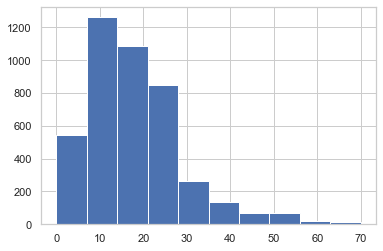

In [378]:
analisis_cliente['ANTIGUEDAD_cracion_ficha'] = 2020 - analisis_cliente['INICIO_OP']
analisis_cliente['ANTIGUEDAD_cracion_ficha'].hist()

In [379]:
#analisis_cliente['target_div_u3_u5'] = analisis_cliente[['TRX_PROM_u3m', 'TRX_PROM_u5m']].apply(
#    lambda _: get_div_means_perios(_[0], _[1]), axis=1
#)

In [380]:
#analisis_cliente['target_ratio_u3m_yoy'] = analisis_cliente['TRX_ratio_u3m_yoy'].copy()
#analisis_cliente['target_feve'] = analisis_cliente['FEVE_DURO'].copy()

In [381]:
#targets = analisis_cliente[['COD_UNICO', 'PERIODO', 'target_div_u3_u5', 'target_ratio_u3m_yoy', 'target_feve']]

#del analisis_cliente['target_div_u3_u5']
#del analisis_cliente['target_ratio_u3m_yoy']
#del analisis_cliente['target_feve']

#targets['PERIODO'] = targets['PERIODO'] .apply(
#    lambda _: (datetime.strptime(_, '%Y%m') - relativedelta(months=1)).strftime('%Y%m')
#)
#targets['PERIODO'].max()

In [382]:
#analisis_cliente = analisis_cliente.merge(
#    targets, how='left', on=['PERIODO', 'COD_UNICO']
#)

In [383]:
#analisis_cliente['FEVE'] = analisis_cliente['FEVE'].combine_first(analisis_cliente['target_feve'])

In [384]:
#analisis_cliente['target_feve'] = analisis_cliente['FEVE'].copy()
#del analisis_cliente['FEVE']

#analisis_cliente.head(3)

In [385]:
#analisis_cliente.to_excel('analisis_cliente_targets.xlsx', index=False)

In [386]:
analisis_cliente['target_feve_reducir_salir'].unique()

array([ 0., nan,  1.])

In [387]:
#def get_preocupa(val):
#    if pd.isnull(val) or not val:
#        return None
#    
#    return 1 if val in ['REDUCIR', 'SEGUIR COVID', 'SALIR'] else 0

#analisis_cliente['target_preocupa'] = analisis_cliente['target_feve'].apply(get_preocupa)
#analisis_cliente['target_preocupa'].value_counts(dropna=False)

In [388]:
#def get_preocupa(val):
#    if pd.isnull(val) or not val:
#        return None
#    
#    return 1 if val in ['SEGUIR COVID', 'SALIR'] else 0

#analisis_cliente['target_salir_reducir'] = analisis_cliente['target_feve'].apply(get_preocupa)
#analisis_cliente['target_salir_reducir'].value_counts(dropna=False)

In [389]:
def graph_numeric(data, col_init, col_out, **kwargs):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    sns.lineplot(x=col_init, y=col_out, data=data, ax=axes[0])
    sns.violinplot(x=col_init, y=col_out, data=data, ax=axes[1], orient='h')
    
    legend_list = []
    for opt in data[col_out].unique():
        sns.kdeplot(data[data[col_out] == opt][col_init], ax=axes[2], shade=True)
        legend_list.append(opt)
    plt.legend(legend_list)

def graph_categoryc(data, col_init, col_out, **kwargs):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    
    cp = sns.countplot(x=col_init, hue=col_out, data=data, ax=axes[0])
    plt.setp(cp.get_xticklabels(), rotation=90)
    
    cross = pd.crosstab(data[col_out], data[col_init])
    sum_total = sum([cross[col].sum() for col in cross.columns])
    sns.heatmap(
        cross/sum_total, 
        annot=True, ax=axes[1], center=0, cmap="YlGnBu", fmt='.2%'
    )
    bp = sns.barplot(
        x=col_init, y=col_out, data=data, ax=axes[2]
    )
    plt.setp(bp.get_xticklabels(), rotation=90)

In [390]:
[col for col in analisis_cliente.columns if 'target' in col]

['target_yoy_quartil_03',
 'target_yoy_quartil_04',
 'target_yoy_quartil_05',
 'target_yoy_quartil_06',
 'target_yoy_quartil_07',
 'target_feve_reducir_salir',
 'target_seguircovid_reducir_salir',
 'cuasi_target_preocupa',
 'target_no_normales_ibk_sbs']

In [391]:
print(analisis_cliente.columns)

Index(['PERIODO', 'COD_UNICO', 'RUC', 'FLG_VIGENTE', 'NOMBRE_COMPLETO',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA',
       ...
       'subsector_obervado_banca', 'DIFF_TIME_INICIO_IBK_FIRST_PRODUCT',
       'IS_NORMAL_IBK_SBS', 'LUGAR', 'target_feve_reducir_salir',
       'cambio_seguir_covid', 'target_seguircovid_reducir_salir',
       'cuasi_target_preocupa', 'target_no_normales_ibk_sbs',
       'ANTIGUEDAD_cracion_ficha'],
      dtype='object', length=663)


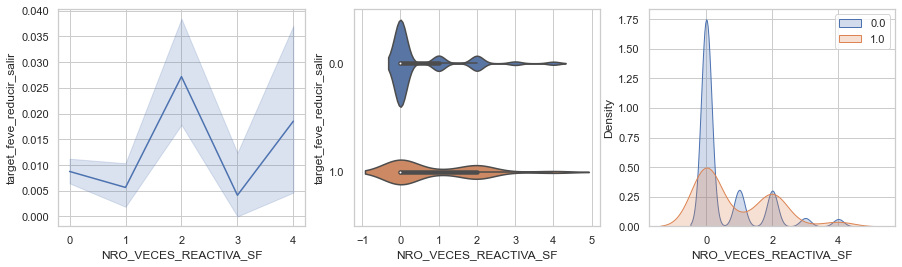

In [392]:
graph_numeric(
    analisis_cliente[
        (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
    ], 'NRO_VECES_REACTIVA_SF', 'target_feve_reducir_salir'
)

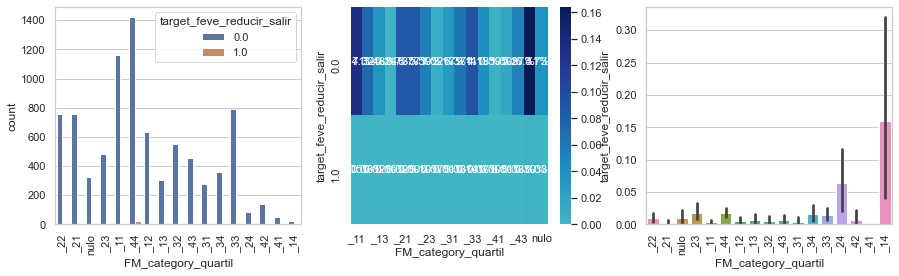

In [393]:
graph_categoryc(
    analisis_cliente[
        (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
    ], 'FM_category_quartil', 'target_feve_reducir_salir'
)

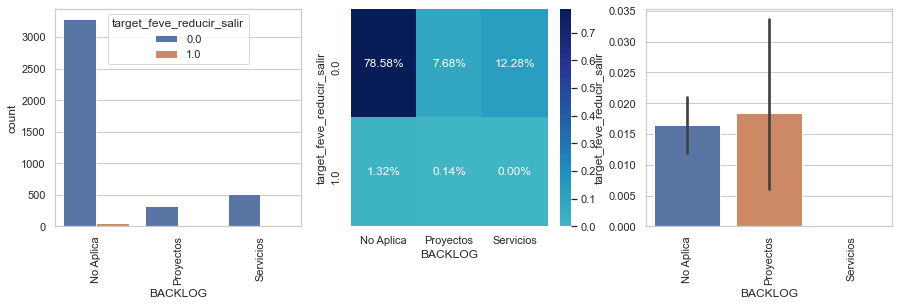

In [394]:
graph_categoryc(
    analisis_cliente[
        (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
    ], 'BACKLOG', 'target_feve_reducir_salir'
)

In [395]:
analisis_cliente[
        (analisis_cliente['target_yoy_quartil_05'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
]['target_yoy_quartil_05'].value_counts()

0.0    4907
1.0    3515
Name: target_yoy_quartil_05, dtype: int64

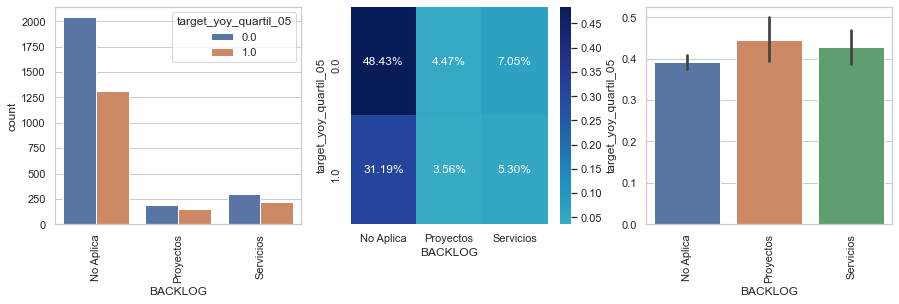

In [396]:
graph_categoryc(
    analisis_cliente[
        (analisis_cliente['target_yoy_quartil_05'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
    ], 'BACKLOG', 'target_yoy_quartil_05'
)

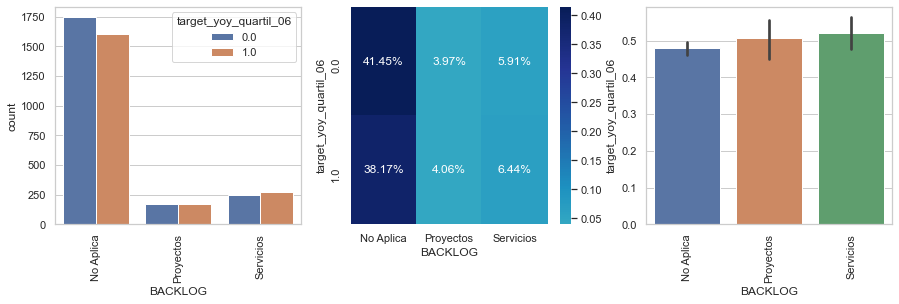

In [397]:
graph_categoryc(
    analisis_cliente[
        (analisis_cliente['target_yoy_quartil_06'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
    ], 'BACKLOG', 'target_yoy_quartil_06'
)

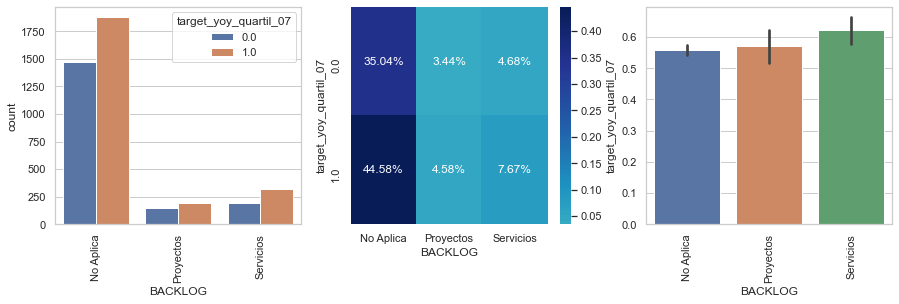

In [398]:
graph_categoryc(
    analisis_cliente[
        (analisis_cliente['target_yoy_quartil_07'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
    ], 'BACKLOG', 'target_yoy_quartil_07'
)

In [399]:
gc.collect()

66235

In [400]:
analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((9211, 663), (9211,))

### SOW 

In [401]:
qsow = """
    SELECT * FROM ODS.HD_VMVP_SOW_ALERTA_CARTERA_BE WITH (NOLOCK)
"""
sow = pd.read_sql(
   qsow , connection_market
)
sow.head(3)

,COD_UNICO,PERIODO,MTOSALDO,MTOSALDO_IBK,MTOSALDO_DIR_SF,MTOSALDO_INDIR_SF,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA,SOW_IBK,SOW_BBVA,SOW_BCP,SOW_BIF,SOW_SCOTIA,SOW_OTROSBCOS,PERCENT_COL_DIRECTAS_SF
0,0000059238,202010,74946686.25,19884452.91,36175116.95,38771569.30,9976765.69,14128786.33,18902033.94,7823718.2,0.265314,0.133118,0.188517,0.252206,0.104390,0.678232,0.482678
1,0000926535,202002,11301121.86,1622577.74,10458872.97,842248.89,5345950.00,2501175.12,0.00,1831419.0,0.143576,0.473045,0.221320,0.000000,0.162056,0.856423,0.925472
2,0011442276,202001,12045.18,12045.18,0.00,12045.18,0.00,0.00,0.00,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [402]:
sow['PERIODO'].max()

'202010'

In [403]:
sow.shape, sow.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, sow['PERIODO'].max()

((39034, 17), (39034,), '202010')

### OJO , cuando tomo una cosecha uso el periodo SOW del mes anterior entonces para cruzarlo debo aumnetar un periodo

In [404]:
sow['PERIODO'] = sow['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
sow['PERIODO'].max()

'202011'

In [405]:
analisis_cliente = analisis_cliente.merge(
        sow[['PERIODO', 'COD_UNICO', 'SOW_IBK', 'SOW_BBVA', 'SOW_BCP', 'SOW_BIF', 'SOW_SCOTIA', 'SOW_OTROSBCOS', 'PERCENT_COL_DIRECTAS_SF']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 670)

<AxesSubplot:>

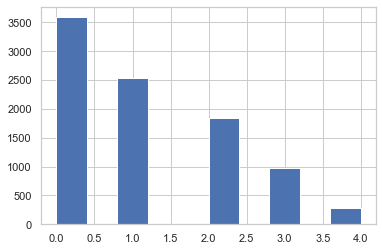

In [406]:
analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'] = analisis_cliente[['SOW_IBK', 'SOW_BBVA', 'SOW_BIF', 'SOW_SCOTIA', 'SOW_BCP']].apply(
    lambda _: int(_[0] < _[1]) + int(_[0] < _[2]) + int(_[0] < _[3]) + int(_[0] < _[4]), axis=1
)
display(analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].hist())

analisis_cliente['NRO_BANCOS_CON_MENOR_SOW'] = analisis_cliente[['SOW_IBK', 'SOW_BBVA', 'SOW_BIF', 'SOW_SCOTIA', 'SOW_BCP']].apply(
    lambda _: int(_[0] > _[1]) + int(_[0] > _[2]) + int(_[0] > _[3]) + int(_[0] > _[4]), axis=1
)

In [407]:
analisis_cliente['TIENE_2_O_MAS_BANCOS_CON_MAYOR_SOW'] = analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].apply(lambda _: _ >= 2).astype(int)
analisis_cliente['TIENE_3_O_MAS_BANCOS_CON_MAYOR_SOW'] = analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].apply(lambda _: _ >= 3).astype(int)
analisis_cliente['TIENE_1_O_MAS_BANCOS_CON_MAYOR_SOW'] = analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].apply(lambda _: _ >= 1).astype(int)

<AxesSubplot:>

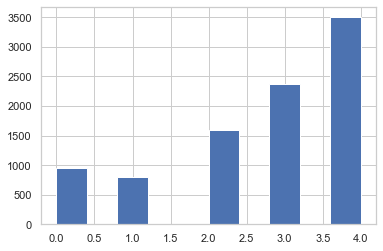

In [408]:
display(analisis_cliente['NRO_BANCOS_CON_MENOR_SOW'].hist())

In [409]:
analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((9211, 675), (9211,))

In [410]:
[_ for _ in analisis_cliente.columns if 'SOW' in _.upper()]

['SOW_IBK',
 'SOW_BBVA',
 'SOW_BCP',
 'SOW_BIF',
 'SOW_SCOTIA',
 'SOW_OTROSBCOS',
 'NRO_BANCOS_CON_MAYOR_SOW',
 'NRO_BANCOS_CON_MENOR_SOW',
 'TIENE_2_O_MAS_BANCOS_CON_MAYOR_SOW',
 'TIENE_3_O_MAS_BANCOS_CON_MAYOR_SOW',
 'TIENE_1_O_MAS_BANCOS_CON_MAYOR_SOW']

In [411]:
for col in [_ for _ in analisis_cliente.columns if 'SOW' in _.upper()]:
    print(col)
    analisis_cliente[col + '_ULT_RCC'] = analisis_cliente[col].copy()
    del  analisis_cliente[col]
#analisis_cliente['SOW_IBK_utl_rcc'] = analisis_cliente['SOW_IBK'].copy()
#del analisis_cliente['SOW_IBK']

SOW_IBK
SOW_BBVA
SOW_BCP
SOW_BIF
SOW_SCOTIA
SOW_OTROSBCOS
NRO_BANCOS_CON_MAYOR_SOW
NRO_BANCOS_CON_MENOR_SOW
TIENE_2_O_MAS_BANCOS_CON_MAYOR_SOW
TIENE_3_O_MAS_BANCOS_CON_MAYOR_SOW
TIENE_1_O_MAS_BANCOS_CON_MAYOR_SOW


In [412]:
sow['PERIODO'].max(), sow['PERIODO'].min(),analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

('202011', '201904', (9211, 675), (9211,))

## VARIACION SOW

In [413]:
for tramo in tramos[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-8:-2]
    print( ' histroia ', historia, ', Mes cerrado', tramo[0], ', cosecha ', tramo[1][-3] , ', Meses target', tramo[-1], tramo[-2])

 histroia  [202006, 202007, 202008, 202009, 202010, 202011] , Mes cerrado 202011 , cosecha  202011 , Meses target [202012, 202101] [201912, 202001]
 histroia  [202005, 202006, 202007, 202008, 202009, 202010] , Mes cerrado 202010 , cosecha  202010 , Meses target [202011, 202012] [201911, 201912]
 histroia  [202004, 202005, 202006, 202007, 202008, 202009] , Mes cerrado 202009 , cosecha  202009 , Meses target [202010, 202011] [201910, 201911]
 histroia  [202003, 202004, 202005, 202006, 202007, 202008] , Mes cerrado 202008 , cosecha  202008 , Meses target [202009, 202010] [201909, 201910]
 histroia  [202002, 202003, 202004, 202005, 202006, 202007] , Mes cerrado 202007 , cosecha  202007 , Meses target [202008, 202009] [201908, 201909]


In [414]:
dicc_kpi = {
    'SOW_IBK': ['max', 'min'],
    'SOW_OTROSBCOS': ['max', 'min'],
    'PERCENT_COL_DIRECTAS_SF': ['max', 'min'] 
}

columns_base = ['SOW_IBK_MAX_', 'SOW_IBK_MIN_', 
               'SOW_OTROSBCOS_MAX_', 'SOW_OTROSBCOS_MIN_',
                'PERCENT_COL_DIRECTAS_SF_MAX_', 'PERCENT_COL_DIRECTAS_SF_MIN_'
               ]
contador = 1
cols_order = []

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[2]
    
    _2m_anio_actual = sow[sow['PERIODO'].astype(int).isin(historia)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_anio_actual.columns = [_ + 'historia' for _ in columns_base]
    
    #data_tramo = pd.concat(
    #    [_12m_anio_actual, _6m_anio_actual, _3m_anio_actual], axis=1
    #).reset_index()
    data_tramo = _2m_anio_actual.reset_index()
    
    try:
        data_tramo['COD_UNICO'] = data_tramo['index']
        del data_tramo['index']
    except:
        pass
    
    data_tramo['PERIODO'] = str(tramo[0])
    #print(data_tramo.columbns)
    del _2m_anio_actual
    
    #print(list(data_tramo.columns))
    if contador == 1:
        sow_cliente = data_tramo
        cols_order = list(sow_cliente.columns)
    else:
        sow_cliente = pd.concat(
            [sow_cliente, data_tramo], axis=0
        )[cols_order]
    
    contador += 1
    #print(data_tramo.head())
    print("--", sow_cliente.shape)


202011 [202012, 202101] [201912, 202001]
-- (2025, 8)
202010 [202011, 202012] [201911, 201912]
-- (4047, 8)
202009 [202010, 202011] [201910, 201911]
-- (6064, 8)
202008 [202009, 202010] [201909, 201910]
-- (8080, 8)
202007 [202008, 202009] [201908, 201909]
-- (10092, 8)


In [415]:
sow_cliente.head()

,COD_UNICO,SOW_IBK_MAX_historia,SOW_IBK_MIN_historia,SOW_OTROSBCOS_MAX_historia,SOW_OTROSBCOS_MIN_historia,PERCENT_COL_DIRECTAS_SF_MAX_historia,PERCENT_COL_DIRECTAS_SF_MIN_historia,PERIODO
0,0000002469,0.178770,0.000000,0.880775,0.472807,0.925608,0.865684,202011
1,0000003392,0.130253,0.076237,0.895014,0.845627,1.000000,0.997061,202011
2,0000006114,0.859024,0.836208,0.000000,0.000000,0.792603,0.780072,202011
3,0000008318,0.559123,0.094986,0.905013,0.440876,0.540509,0.024248,202011
4,0000037374,0.000000,0.000000,1.000000,1.000000,1.000000,0.963029,202011


In [416]:
sow_cliente.shape, sow_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape, analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((10092, 8), (10092,), (9211, 675), (9211,))

In [417]:
sow_cliente.shape

(10092, 8)

### STROP SPW

In [418]:
analisis_cliente = analisis_cliente.merge(
    sow_cliente, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 681)

### DIAS DE ATRASO

In [419]:
query = """
    SELECT * FROM ODS.HD_VMVP_DIAS_ATRASO_IBK_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""
atrsaso = pd.read_sql(
   query , connection_market
)
atrsaso.head(20)

,PERIODO,COD_UNICO,ESTADO,MAX_DIAS_ATRASO,DEUDA
0,202009,0013667555,VIGENTE,1.0,78873.0
1,202005,0013532403,VIGENTE,7.0,981411.0
2,202005,0011060494,VIGENTE,15.0,1142634.0
3,201905,0015569280,VIGENTE,1.0,161342.0
4,202007,0013261214,VIGENTE,2.0,2274156.0
5,202012,0014809819,VIGENTE,0.0,214657.0
6,202002,0011756469,VENCIDO,51.0,0.0
7,202002,0009261546,VIGENTE,2.0,820040.0
8,202011,0014884870,VIGENTE,0.0,14705000.0
9,201910,0010008924,VIGENTE,8.0,5690060.0


In [420]:
pivoteo = pd.pivot_table(
    atrsaso, values='MAX_DIAS_ATRASO', index=['COD_UNICO', 'PERIODO'], columns=['ESTADO'], aggfunc=len, fill_value=0
)
for col in pivoteo.columns:
    pivoteo['TIENE_DEUDA_'+ col + '_IBK'] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)
    del pivoteo[col]
    
pivoteo['TIENE_VIEGNTE_VENCIDO_IBK'] = pivoteo[['TIENE_DEUDA_VENCIDO_IBK', 'TIENE_DEUDA_VIGENTE_IBK']].apply(
    lambda _: 1 if _[0] > 0 and _[1] > 0 else 0, axis=1)

pivoteo = pivoteo.reset_index().reset_index(drop=True)
pivoteo.columns = [_.replace('/', '') for _ in pivoteo.columns]
print(pivoteo['PERIODO'].max())
pivoteo.head()

202012


,COD_UNICO,PERIODO,TIENE_DEUDA_REFINANCIADO_IBK,TIENE_DEUDA_VENCIDO_IBK,TIENE_DEUDA_VIGENTE_IBK,TIENE_VIEGNTE_VENCIDO_IBK
0,0000002469,202010,0,0,1,0
1,0000002469,202011,0,0,1,0
2,0000002469,202012,0,0,1,0
3,0000003392,201909,0,0,1,0
4,0000003392,202004,0,0,1,0


In [421]:
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 685)

In [422]:
#atrsaso = atrsaso.groupby(by=['PERIODO', 'COD_UNICO'])['MAX_DIAS_ATRASO'].max().reset_index()
#atrsaso.head()

In [423]:
#atrsaso['TIENE_DIAS_DE_ATRASO_IBK_ESTE_MES'] = atrsaso['MAX_DIAS_ATRASO'].apply(lambda _: 1 if _ >= 1 else 0)

#analisis_cliente = analisis_cliente.merge(
#    atrsaso[['PERIODO', 'COD_UNICO', 'TIENE_DIAS_DE_ATRASO_IBK_ESTE_MES']], how='left', on=['PERIODO', 'COD_UNICO']
#)
#analisis_cliente.shape

In [424]:
atraso_ = pd.pivot_table(
    atrsaso, 
    values='MAX_DIAS_ATRASO', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max, fill_value=0
).unstack().reset_index() 
atraso_.columns = ['PERIODO', 'COD_UNICO', 'MAX_DIAS_ATRASO']
atraso_.head()

,PERIODO,COD_UNICO,MAX_DIAS_ATRASO
0,201902,0000002469,0
1,201902,0000003392,0
2,201902,0000006114,0
3,201902,0000008318,0
4,201902,0000039982,0


In [425]:
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    break

202007 [202008, 202009] 202007 [202002, 202003, 202004, 202005, 202006, 202007]


### >>> DIAS DE ATRASO

In [426]:
delante = [202009, 202010]
just_antes = 202008

no_normales = list(atraso_[
    (atraso_['MAX_DIAS_ATRASO'] >= 8) & (
        (atraso_['PERIODO'] == str(delante[0])) | (atraso_['PERIODO'] == str(delante[1]))
    )
]['COD_UNICO'])

descarte = list(atraso_[
    (atraso_['MAX_DIAS_ATRASO'] >= 8) & (atraso_['PERIODO'] == str(just_antes)) 
]['COD_UNICO'])

print(len(no_normales))
print(len(descarte))
quedan = set(no_normales) - set(descarte)
print(len(quedan))

331
205
124


In [427]:
no_blancos = atraso_[
        (atraso_['MAX_DIAS_ATRASO'] > 8) | (
            atraso_['PERIODO'].isin([202003, 202004, 202005, 202006, 202007, 202008])
        )
    ]

no_blancos[no_blancos['MAX_DIAS_ATRASO'] > 8].shape, no_blancos.shape

((3453, 3), (3453, 3))

### >> MAAS DE 8 DIAS

In [428]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    no_normales = list(atraso_[
        (atraso_['MAX_DIAS_ATRASO'] >= 8) & (
            (atraso_['PERIODO'] == str(delante[0])) | (atraso_['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])

    descarte = list(atraso_[
        (atraso_['MAX_DIAS_ATRASO'] >= 8) & (atraso_['PERIODO'] == str(just_antes)) 
    ]['COD_UNICO'])
    
    no_blancos = set(atraso_[
        (atraso_['MAX_DIAS_ATRASO'] >= 8) | (
            atraso_['PERIODO'].isin(tramo[2])
        )
    ]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in no_normales and codigo not in descarte:
            return 1
        elif codigo in descarte or codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_8_dias_atraso'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    

    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(deudor.shape, deudor[deudor['target_8_dias_atraso'] == 1].shape)
deudor.head()

202007 [202008, 202009] [202002, 202003, 202004, 202005, 202006, 202007]
(2036, 4) (160, 4)
202008 [202009, 202010] [202003, 202004, 202005, 202006, 202007, 202008]
(4072, 4) (284, 4)
202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(6108, 4) (368, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(8144, 4) (435, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(10180, 4) (456, 4)


,COD_UNICO,0,target_8_dias_atraso,PERIODO
0,0000002469,5,0.0,202007
1,0000003392,5,NaN,202007
2,0000006114,5,0.0,202007
3,0000008318,5,0.0,202007
4,0000037374,2,0.0,202007


In [429]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_8_dias_atraso']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 686)

In [430]:
analisis_cliente['target_8_dias_atraso'].value_counts()

0.0    5043
1.0     455
Name: target_8_dias_atraso, dtype: int64

In [431]:
for tramo in tramos:
    print(tramo[0], tramo[2], tramo[1][-3])

202007 [202002, 202003, 202004, 202005, 202006, 202007] 202007
202008 [202003, 202004, 202005, 202006, 202007, 202008] 202008
202009 [202004, 202005, 202006, 202007, 202008, 202009] 202009
202010 [202005, 202006, 202007, 202008, 202009, 202010] 202010
202011 [202006, 202007, 202008, 202009, 202010, 202011] 202011


### >>> MAS DE 15 DIAS 

In [432]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    no_normales = list(atraso_[
        (atraso_['MAX_DIAS_ATRASO'] >= 15) & (
            (atraso_['PERIODO'] == str(delante[0])) | (atraso_['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])

    descarte = list(atraso_[
        (atraso_['MAX_DIAS_ATRASO'] >= 15) & (atraso_['PERIODO'] == str(just_antes)) 
    ]['COD_UNICO'])
    
    no_blancos = set(atraso_[
        (atraso_['MAX_DIAS_ATRASO'] >= 15) | (
            atraso_['PERIODO'].isin(tramo[2])
        )
    ]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in no_normales and codigo not in descarte:
            return 1
        elif codigo in descarte or codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_15_dias_atraso'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    

    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(deudor.shape, deudor[deudor['target_15_dias_atraso'] == 1].shape)
deudor.head()

202007 [202008, 202009] 202007
(2036, 4) (113, 4)
202008 [202009, 202010] 202008
(4072, 4) (212, 4)
202009 [202010, 202011] 202009
(6108, 4) (280, 4)
202010 [202011, 202012] 202010
(8144, 4) (335, 4)
202011 [202012, 202101] 202011
(10180, 4) (352, 4)


,COD_UNICO,0,target_15_dias_atraso,PERIODO
0,0000002469,5,0.0,202007
1,0000003392,5,NaN,202007
2,0000006114,5,0.0,202007
3,0000008318,5,0.0,202007
4,0000037374,2,0.0,202007


In [433]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_15_dias_atraso']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 687)

In [434]:
analisis_cliente['target_15_dias_atraso'].value_counts()

0.0    6231
1.0     350
Name: target_15_dias_atraso, dtype: int64

## DEUDA SIN REACTIVA

In [435]:
query_deuda = """
    SELECT * FROM ODS.HD_VMVP_DEUDA_SIN_REACTIVA_ALERTA_CARTERA_BE WITH (NOLOCK)
"""
deuda = pd.read_sql(
   query_deuda , connection_market
)
deuda.head(10)

,COD_UNICO,PERIODO,SITUACION,TIPO_PRODUCTO,PRODUCTO,MTOSALDO,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,...,PROM_DIAS_ATRASO_BBVA,PROM_DIAS_ATRASO_BCP,PROM_DIAS_ATRASO_BIF,PROM_DIAS_ATRASO_SCOTIA,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA
0,0009288383,201905,VIGENTE,COL. DIRECTAS,PRESTAMOS,269247.11,0.00,0.00,101070.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,0009335942,201905,VIGENTE,COL. DIRECTAS,PRESTAMOS,13637500.00,0.00,0.00,1846000.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2,0009403032,201905,VIGENTE,COL. DIRECTAS,LEASING,20222.53,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,0009408906,201905,VIGENTE,COL. DIRECTAS,FACTORING,1290098.27,0.00,0.00,0.00,1290098.27,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,0009423323,201905,VIGENTE,COL. DIRECTAS,PRESTAMOS,8201717.77,0.00,1928442.52,926672.25,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
5,0009499233,201905,VIGENTE,COL. DIRECTAS,PRESTAMOS,22116704.72,20109842.72,0.00,0.00,329100.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
6,0009501452,201905,VIGENTE,COL. DIRECTAS,LEASING,1286941.15,0.00,0.00,299529.23,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
7,0009512730,201905,VIGENTE,COL. DIRECTAS,COMEX,7008408.57,3631086.30,2029722.27,336900.00,1010700.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
8,0009529082,201905,VIGENTE,COL. DIRECTAS,LEASING,232364.12,0.00,134935.37,97428.75,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
9,0009532725,201905,VIGENTE,COL. DIRECTAS,DESCUENTOS,6804585.43,0.00,4699253.24,2105332.19,0.00,...,4.0,4.0,NaN,NaN,4,0,4,4,0,0


In [436]:
print(list(deuda.columns))

['COD_UNICO', 'PERIODO', 'SITUACION', 'TIPO_PRODUCTO', 'PRODUCTO', 'MTOSALDO', 'MTOSALDO_IBK', 'MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA', 'PROM_DIAS_ATRASO_SF', 'PROM_DIAS_ATRASO_IBK', 'PROM_DIAS_ATRASO_BBVA', 'PROM_DIAS_ATRASO_BCP', 'PROM_DIAS_ATRASO_BIF', 'PROM_DIAS_ATRASO_SCOTIA', 'MAX_DIAS_ATRASO_SF', 'MAX_DIAS_ATRASO_IBK', 'MAX_DIAS_ATRASO_BBVA', 'MAX_DIAS_ATRASO_BCP', 'MAX_DIAS_ATRASO_BIF', 'MAX_DIAS_ATRASO_SCOTIA']


#### PIVOTEO POR SITUACION ANTES DE FILTRAR

In [437]:
from datetime import datetime
deuda['PERIODO'].max(), deuda['PERIODO'].min()

('202010', '201903')

In [438]:
pivoteo = pd.pivot_table(
    deuda, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo['MTO_DEUDA_' + col + '_COLDIRECT_SIN_REATCIVA_SF'] = pivoteo[col].copy()
    pivoteo[col] = pivoteo[col] / pivoteo['total']
    
del pivoteo['total']
pivoteo.columns = [('DEBT_' + col).replace(' ', '_') + '_PERCENT_ULT_RCC' if '_SIN_REATCIVA' not in col else col for col in pivoteo.columns]
pivoteo.columns = [_.replace('/', '').upper() for _ in pivoteo.columns]
pivoteo.head(2)

DEBT_JUDICIAL_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                  
0000002469 201903                             0.0   
           201904                             0.0   

                    DEBT_REFINANCIADO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                      
0000002469 201903                                 0.0   
           201904                                 0.0   

                    DEBT_VENCIDO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201903                            0.0   
           201904                            0.0   

                    DEBT_VIGENTE_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201903                            1.0   
           201904                            1.0   

                    MTO_DEUDA_JUDICIAL_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                 
0000002469 201903                                            0.0   
           201904                                            0.0   

                    MTO_DEUDA_REFINANCIADO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                     
0000002469 201903                                                0.0   
           201904                                                0.0   

                    MTO_DEUDA_VENCIDO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201903                                           0.0   
           201904                                           0.0   

                    MTO_DEUDA_VIGENTE_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201903                                   10318226.99   
           201904                                   10479017.70   

                    MTO_DEUDA_TOTAL_COLDIRECT_SIN_REATCIVA_SF  
COD_UNICO  PERIODO                                             
0000002469 201903                                 10318226.99  
           201904                                 10479017.70

In [439]:
for col in [_ for _ in pivoteo.columns if '_PERCENT_ULT_RCC' in _]:
    print(col)
    pivoteo[col.replace('DEBT_', 'TIENE_DEUDA_').replace('_PERCENT_ULT_RCC', '_RCC')] = pivoteo[col].apply(
        lambda _: 1 if _ > 0 else 0
    )
pivoteo.head()

DEBT_JUDICIAL_PERCENT_ULT_RCC
DEBT_REFINANCIADO_PERCENT_ULT_RCC
DEBT_VENCIDO_PERCENT_ULT_RCC
DEBT_VIGENTE_PERCENT_ULT_RCC


DEBT_JUDICIAL_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                  
0000002469 201903                             0.0   
           201904                             0.0   
           201905                             0.0   
           201906                             0.0   
           201907                             0.0   

                    DEBT_REFINANCIADO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                      
0000002469 201903                                 0.0   
           201904                                 0.0   
           201905                                 0.0   
           201906                                 0.0   
           201907                                 0.0   

                    DEBT_VENCIDO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201903                            0.0   
           201904                            0.0   
           201905                            0.0   
           201906                            0.0   
           201907                            0.0   

                    DEBT_VIGENTE_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201903                            1.0   
           201904                            1.0   
           201905                            1.0   
           201906                            1.0   
           201907                            1.0   

                    MTO_DEUDA_JUDICIAL_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                 
0000002469 201903                                            0.0   
           201904                                            0.0   
           201905                                            0.0   
           201906                                            0.0   
           201907                                            0.0   

                    MTO_DEUDA_REFINANCIADO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                     
0000002469 201903                                                0.0   
           201904                                                0.0   
           201905                                                0.0   
           201906                                                0.0   
           201907                                                0.0   

                    MTO_DEUDA_VENCIDO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201903                                           0.0   
           201904                                           0.0   
           201905                                           0.0   
           201906                                           0.0   
           201907                                           0.0   

                    MTO_DEUDA_VIGENTE_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201903                                   10318226.99   
           201904                                   10479017.70   
           201905                                   10920156.70   
           201906                                   10711195.78   
           201907                                   11023629.02   

                    MTO_DEUDA_TOTAL_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                              
0000002469 201903                                 10318226.99   
           201904                                 10479017.70   
           201905                                 10920156.70   
           201906                                 10711195.78   
           201907                                 11023629.02   

                    TIENE_DEUDA_JUDICIAL_RCC  TIENE_DEUDA_REFINANCIADO_RCC  \
COD_UNICO  PERIODO                                            

In [440]:
pivoteo = pivoteo.reset_index()
# SE LE SUMA UN PEIODO
pivoteo['PERIODO'] = pivoteo['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(pivoteo['PERIODO'].max())

pivoteo['TIENE_VIEGNTE_VENCIDO_RCC'] = pivoteo[['TIENE_DEUDA_VENCIDO_RCC', 'TIENE_DEUDA_VIGENTE_RCC']].apply(
    lambda _: 1 if _[0] > 0 and _[1] > 0 else 0, axis=1
)
pivoteo.head(5)

202011


,COD_UNICO,PERIODO,DEBT_JUDICIAL_PERCENT_ULT_RCC,DEBT_REFINANCIADO_PERCENT_ULT_RCC,DEBT_VENCIDO_PERCENT_ULT_RCC,DEBT_VIGENTE_PERCENT_ULT_RCC,MTO_DEUDA_JUDICIAL_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_REFINANCIADO_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_VENCIDO_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_VIGENTE_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_TOTAL_COLDIRECT_SIN_REATCIVA_SF,TIENE_DEUDA_JUDICIAL_RCC,TIENE_DEUDA_REFINANCIADO_RCC,TIENE_DEUDA_VENCIDO_RCC,TIENE_DEUDA_VIGENTE_RCC,TIENE_VIEGNTE_VENCIDO_RCC
0,0000002469,201904,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10318226.99,10318226.99,0,0,0,1,0
1,0000002469,201905,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10479017.70,10479017.70,0,0,0,1,0
2,0000002469,201906,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10920156.70,10920156.70,0,0,0,1,0
3,0000002469,201907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10711195.78,10711195.78,0,0,0,1,0
4,0000002469,201908,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11023629.02,11023629.02,0,0,0,1,0


In [441]:
pivoteo['DEB_SOLO_VIGENTES_SF_ULT_RCC'] = pivoteo['DEBT_VIGENTE_PERCENT_ULT_RCC'].apply(lambda _: _ == 1).astype(int)

In [442]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 687)


(9211, 702)

In [443]:
deuda.shape,  deuda[deuda['MTOSALDO_IBK'] == 0].shape

((114262, 23), (67262, 23))

In [444]:
import gc
gc.collect()

7153

In [445]:
del pivoteo

In [446]:
vigente = deuda[deuda['SITUACION'].isin(['VIGENTE', 'VENCIDO'])]
#vencido = deuda[deuda['SITUACION'] == 'VENCIDO']
#refinanciado = deuda[deuda['SITUACION'] == 'REFINANCIADO']
#judicial = deuda[deuda['SITUACION'] == 'JUDICIAL']

vigente.shape#, vencido.shape, refinanciado.shape, judicial.shape

(113517, 23)

In [447]:
vigente.head()

,COD_UNICO,PERIODO,SITUACION,TIPO_PRODUCTO,PRODUCTO,MTOSALDO,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,...,PROM_DIAS_ATRASO_BBVA,PROM_DIAS_ATRASO_BCP,PROM_DIAS_ATRASO_BIF,PROM_DIAS_ATRASO_SCOTIA,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA
0,0009288383,201905,VIGENTE,COL. DIRECTAS,PRESTAMOS,269247.11,0.0,0.00,101070.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,0009335942,201905,VIGENTE,COL. DIRECTAS,PRESTAMOS,13637500.00,0.0,0.00,1846000.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2,0009403032,201905,VIGENTE,COL. DIRECTAS,LEASING,20222.53,0.0,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,0009408906,201905,VIGENTE,COL. DIRECTAS,FACTORING,1290098.27,0.0,0.00,0.00,1290098.27,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,0009423323,201905,VIGENTE,COL. DIRECTAS,PRESTAMOS,8201717.77,0.0,1928442.52,926672.25,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [448]:
#target_deuda_8_dias_rcc
#MAX_DIAS_ATRASO_SF

In [449]:
delante = [202010, 202011]
just_antes = 202009

no_normales = list(vigente[
    (vigente['MAX_DIAS_ATRASO_SF'] >= 8) & (
        (vigente['PERIODO'] == str(delante[0])) | (vigente['PERIODO'] == str(delante[1]))
    )
]['COD_UNICO'])

descarte = list(vigente[
    (vigente['MAX_DIAS_ATRASO_SF'] >= 8) & (vigente['PERIODO'] == str(just_antes)) 
]['COD_UNICO'])

print(len(no_normales))
print(len(descarte))
quedan = set(no_normales) - set(descarte)
print(len(quedan))

312
288
123


In [450]:
atraso_ = vigente.copy()

atraso_['PERIODO'] = atraso_['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)

contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    no_normales = list(atraso_[
        (atraso_['MAX_DIAS_ATRASO_SF'] >= 8) & (
            (atraso_['PERIODO'] == str(delante[0])) | (atraso_['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])

    descarte = list(atraso_[
        (atraso_['MAX_DIAS_ATRASO_SF'] >= 8) & (atraso_['PERIODO'] == str(just_antes)) 
    ]['COD_UNICO'])
    
    no_blancos = set(atraso_[
        (atraso_['MAX_DIAS_ATRASO_SF'] >= 8) | (
            atraso_['PERIODO'].isin(tramo[2])
        )
    ]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in no_normales and codigo not in descarte:
            return 1
        elif codigo in descarte or codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_rcc_8_dias_atraso'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    
    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(deudor.shape, deudor[deudor['target_rcc_8_dias_atraso'] == 1].shape)
deudor.head()

202007 [202008, 202009] [202002, 202003, 202004, 202005, 202006, 202007]
(2036, 4) (258, 4)
202008 [202009, 202010] [202003, 202004, 202005, 202006, 202007, 202008]
(4072, 4) (443, 4)
202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(6108, 4) (627, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(8144, 4) (750, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(10180, 4) (750, 4)


,COD_UNICO,0,target_rcc_8_dias_atraso,PERIODO
0,0000002469,5,1.0,202007
1,0000003392,5,0.0,202007
2,0000006114,5,0.0,202007
3,0000008318,5,0.0,202007
4,0000037374,2,NaN,202007


In [451]:
print(list(atraso_['SITUACION'].unique()))

['VIGENTE', 'VENCIDO']


In [452]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_rcc_8_dias_atraso']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 703)

In [453]:
analisis_cliente['target_rcc_8_dias_atraso'].value_counts()

0.0    3873
1.0     702
Name: target_rcc_8_dias_atraso, dtype: int64

In [454]:
pd.crosstab(
    analisis_cliente['target_rcc_8_dias_atraso'], analisis_cliente['target_8_dias_atraso']
)

target_8_dias_atraso,0.0,1.0
target_rcc_8_dias_atraso,,
0.0,2999,83
1.0,263,102


In [455]:
analisis_cliente['target_SF_8_dias_atraso_o_mas'] = analisis_cliente[['target_8_dias_atraso', 'target_rcc_8_dias_atraso']].apply(
    lambda _: (_[0] == 1 or _[1] == 1) and not pd.isnull(_[0]) and not pd.isnull(_[1]), axis= 1
).astype(int)
analisis_cliente['target_SF_8_dias_atraso_o_mas'].value_counts()

0    8763
1     448
Name: target_SF_8_dias_atraso_o_mas, dtype: int64

In [456]:
analisis_cliente['PERIODO'].value_counts()

202007    1923
202008    1882
202009    1832
202010    1801
202011    1773
Name: PERIODO, dtype: int64

In [457]:
vigente.shape, vigente.groupby(by=['COD_UNICO','PERIODO']).size().shape

((113517, 23), (37940,))

## RECURRENCIA DE ATRASSOS

In [458]:
acum = generate_listado_u3m(
    atraso_, 'listados_atrasos_max_mes', values='MAX_DIAS_ATRASO_SF',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=max
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(2006, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(4012, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(6018, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(8024, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(10030, 3)


,COD_UNICO,listados_atrasos_max_mes,PERIODO
0,0000002469,"[6, 8, 7, 5, 8, 7, 7, 8, 6, 0, 0, 4]",202007
1,0000003392,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202007
2,0000006114,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202007
3,0000008318,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202007
4,0000037374,"[8, 9, 4, 6, 7, 7, 4, 4, 1, 0, 0, 0]",202007


In [459]:
acum.tail(50)

,COD_UNICO,listados_atrasos_max_mes,PERIODO
1956,0016387975,"[0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0]",202011
1957,0016390037,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0]",202011
1958,0016392414,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202011
1959,0016399085,"[4, 0, 3, 4, 10, 0, 3, 19, 50, 4, 10, 22]",202011
1960,0016401263,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202011
1961,0016402624,"[0, 0, 0, 4, 1, 2, 0, 0, 0, 0, 0, 0]",202011
1962,0016412662,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202011
1963,0016414889,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202011
1964,0016452109,"[0, 0, 0, 0, 15, 0, 1, 1, 2, 21, 15, 0]",202011
1965,0016464257,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14]",202011


<AxesSubplot:>

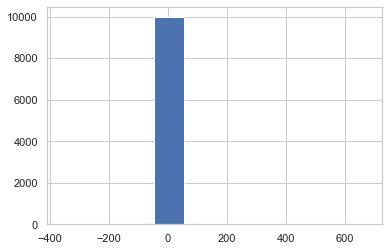

In [460]:
acum['ATRASO_PROM_U12M_COLDIRECT_VIG_VENC_SF'] = acum['listados_atrasos_max_mes'].apply(lambda _: np.mean(_[-12:]))
acum['ATRASO_PROM_U6M_COLDIRECT_VIG_VENC_SF'] = acum['listados_atrasos_max_mes'].apply(lambda _: np.mean(_[-6:]))
acum['DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF'] = acum['ATRASO_PROM_U6M_COLDIRECT_VIG_VENC_SF'] - acum['ATRASO_PROM_U12M_COLDIRECT_VIG_VENC_SF'] 

acum['DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF'].hist()

<AxesSubplot:>

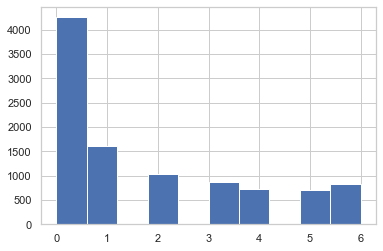

In [461]:
acum['NRO_MESES_CON_ATRASO_U6M_COLDIRECT_SF'] = acum['listados_atrasos_max_mes'].apply(
    lambda _: len([mes for mes in _[-6:] if mes > 0])
)                                                                       
acum['NRO_MESES_CON_ATRASO_U6M_COLDIRECT_SF'].hist()                                                                                                                                                                                          

<AxesSubplot:>

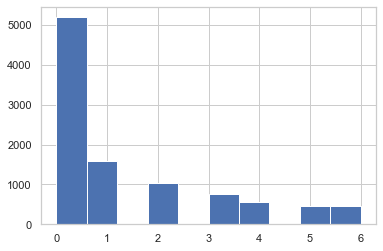

In [462]:
acum['NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF'] = acum['listados_atrasos_max_mes'].apply(
    lambda _: len([mes for mes in _[-6:] if mes >= 4])
)                                                                       
acum['NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF'].hist() 

In [463]:
acum['TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF'] = acum['DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF'].apply(lambda _: _> 0).astype(int)
acum['TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF'].value_counts()

0    6668
1    3362
Name: TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF, dtype: int64

In [464]:
del acum['listados_atrasos_max_mes']
acum.head()

,COD_UNICO,PERIODO,ATRASO_PROM_U12M_COLDIRECT_VIG_VENC_SF,ATRASO_PROM_U6M_COLDIRECT_VIG_VENC_SF,DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF,NRO_MESES_CON_ATRASO_U6M_COLDIRECT_SF,NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF,TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF
0,0000002469,202007,5.500000,4.166667,-1.333333,4,4,0
1,0000003392,202007,0.000000,0.000000,0.000000,0,0,0
2,0000006114,202007,0.000000,0.000000,0.000000,0,0,0
3,0000008318,202007,0.000000,0.000000,0.000000,0,0,0
4,0000037374,202007,4.166667,1.500000,-2.666667,3,2,0


In [465]:
acum['PERIODO'] = acum['PERIODO'].astype(str)

analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 710)

In [466]:
del acum
del atraso_

### PIVOTEO DE PRODUCTOS SOBRE VIGENTES Y VENCIDOS

In [467]:
pivoteo = pd.pivot_table(
    vigente, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['PRODUCTO', 'SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col] / pivoteo['total']

del pivoteo['total']
pivoteo.columns = [('DEBT_' + '_'.join(col)).replace(' ', '_') + '_PERCENT_ULT_RCC' for col in pivoteo.columns]


for col in pivoteo.columns:
    pivoteo[col.replace('DEBT_', 'TIENE_DEUDA_').replace('_PERCENT_ULT_RCC', '_RCC')] = pivoteo[col].apply(
        lambda _: 1 if _ > 0 else 0
    )
pivoteo = pivoteo.reset_index()

pivoteo['PERIODO'] = pivoteo['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(pivoteo['PERIODO'].max())
pivoteo.columns = [_.replace('/', '') for _ in pivoteo.columns]

pivoteo.head()

202011


,COD_UNICO,PERIODO,DEBT_COMEX_VENCIDO_PERCENT_ULT_RCC,DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC,DEBT_DESCUENTOS_VENCIDO_PERCENT_ULT_RCC,DEBT_DESCUENTOS_VIGENTE_PERCENT_ULT_RCC,DEBT_FACTORING_VENCIDO_PERCENT_ULT_RCC,DEBT_FACTORING_VIGENTE_PERCENT_ULT_RCC,DEBT_LEASING_VENCIDO_PERCENT_ULT_RCC,DEBT_LEASING_VIGENTE_PERCENT_ULT_RCC,...,TIENE_DEUDA_LEASING_VENCIDO_RCC,TIENE_DEUDA_LEASING_VIGENTE_RCC,TIENE_DEUDA_OTROS_VENCIDO_RCC,TIENE_DEUDA_OTROS_VIGENTE_RCC,TIENE_DEUDA_PRESTAMOS_VENCIDO_RCC,TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC,TIENE_DEUDA_SOBREGIROS__AVANCES_VENCIDO_RCC,TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC,TIENE_DEUDA_TARJETAS_DE_CREDITO_VENCIDO_RCC,TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC
0,0000002469,201904,0.0,0.000000,0.0,0.657995,0.0,0.153178,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,0000002469,201905,0.0,0.076343,0.0,0.614141,0.0,0.124118,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
2,0000002469,201906,0.0,0.073259,0.0,0.609396,0.0,0.135836,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
3,0000002469,201907,0.0,0.046680,0.0,0.614491,0.0,0.158140,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
4,0000002469,201908,0.0,0.057150,0.0,0.574798,0.0,0.191801,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1


In [468]:
pivoteo['NRO_PROD_DEUDA_VIGENTE_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VIGENTE' in col.upper()]].sum(axis=1)
pivoteo['NRO_PROD_DEUDA_VENCIDO_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VENCIDO' in col.upper()]].sum(axis=1)
pivoteo.columns

Index(['COD_UNICO', 'PERIODO', 'DEBT_COMEX_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_DESCUENTOS_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_DESCUENTOS_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_FACTORING_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_FACTORING_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_LEASING_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_LEASING_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_OTROS_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_PRESTAMOS_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_PRESTAMOS_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_SOBREGIROS__AVANCES_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_SOBREGIROS__AVANCES_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_TARJETAS_DE_CREDITO_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_TARJETAS_DE_CREDITO_VIGENTE_PERCENT_ULT_RCC',
       'TIENE_DEUDA_COMEX_VENCIDO_RCC', 'TIENE_DEUDA_COMEX_VIGENTE_RCC',
       'TIENE_DEUDA_DESCUENTOS_VENCIDO_RCC',
       'TIENE_DEUDA_DESCUENTOS_VIGENTE_RCC',
       

In [469]:
pivoteo['TIENE_SOBREGIRO_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_LEASING_VIGENTE_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_SOBREGIRO_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_DEUDA_LEASING_VIGENTE_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)
pivoteo['TIENE_SOBREGIRO_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_LEASING_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_LEASING_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_OTROS_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_OTROS_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_LEASING_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_OTROS_Y__SOBREGIRO_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'TIENE_DEUDA_LEASING_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_Y__SOBREGIRO_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_DEUDA_LEASING_VIGENTE_RCC', 'TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)
pivoteo['TIENE_TARJETACREDIT_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_TARJETACREDIT__Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC', 'TIENE_DEUDA_LEASING_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_TARJETACREDIT__Y__SOBREGIRO_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_TARJETACREDIT_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_DEUDA_LEASING_VIGENTE_RCC', 'TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_Y__TARJETACREDIT_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)


In [470]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 710)


(9211, 760)

In [471]:
pivoteo = pd.pivot_table(
    deuda, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo['total'] = pivoteo.sum(axis=1)
pivoteo['PERCENT_DEBT_VENCIDO_S_DTOTAL_SF_ULT_RCC'] = pivoteo['VENCIDO'] / pivoteo['total']
pivoteo.head()

SITUACION           JUDICIAL  REFINANCIADO  VENCIDO      VIGENTE        total  \
COD_UNICO  PERIODO                                                              
0000002469 201903        0.0           0.0      0.0  10318226.99  10318226.99   
           201904        0.0           0.0      0.0  10479017.70  10479017.70   
           201905        0.0           0.0      0.0  10920156.70  10920156.70   
           201906        0.0           0.0      0.0  10711195.78  10711195.78   
           201907        0.0           0.0      0.0  11023629.02  11023629.02   

SITUACION           PERCENT_DEBT_VENCIDO_S_DTOTAL_SF_ULT_RCC  
COD_UNICO  PERIODO                                            
0000002469 201903                                        0.0  
           201904                                        0.0  
           201905                                        0.0  
           201906                                        0.0  
           201907                                        0.0

In [472]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo.reset_index()[['PERIODO', 'COD_UNICO', 'PERCENT_DEBT_VENCIDO_S_DTOTAL_SF_ULT_RCC']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 760)


(9211, 761)

## PRODUCTO NO IBK DEUDA RCC

In [473]:
query_deuda_NO_IBK = """
    SELECT * FROM ODS.HD_VMVP_DEUDA_NO_IBK_ALERTA_CARTERA_BE WITH (NOLOCK) 
    WHERE SITUACION IN ('VIGENTE', 'VENCIDO')
"""
deuda_no_ibk = pd.read_sql(
   query_deuda_NO_IBK , connection_market
)
deuda_no_ibk.head(10)

,COD_UNICO,PERIODO,SITUACION,TIPO_PRODUCTO,PRODUCTO,MTOSALDO
0,0000038026,201903,VIGENTE,COL. DIRECTAS,LEASING,63763.10
1,0000054635,201903,VIGENTE,COL. DIRECTAS,PRESTAMOS,2169982.19
2,0000056036,201903,VIGENTE,COL. DIRECTAS,LEASING,36723.04
3,0000056564,201903,VIGENTE,COL. DIRECTAS,FACTORING,42122.27
4,0000114132,201903,VIGENTE,COL. DIRECTAS,LEASING,3194819.87
5,0000232207,201903,VIGENTE,COL. DIRECTAS,PRESTAMOS,260536.07
6,0000232207,201903,VIGENTE,COL. DIRECTAS,SOBREGIROS / AVANCES,67.25
7,0000251611,201903,VIGENTE,COL. DIRECTAS,PRESTAMOS,10766545.08
8,0000256461,201903,VIGENTE,COL. DIRECTAS,DESCUENTOS,5143454.10
9,0000429753,201903,VIGENTE,COL. DIRECTAS,COMEX,18904374.20


In [474]:
pivoteo = pd.pivot_table(
    deuda_no_ibk, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['PRODUCTO', 'SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = [('TIENE_EN_OTRAENTIDAD_DEBT_' + '_'.join(col)).replace(' ', '_') + '_SF_ULT_RCC' for col in pivoteo.columns]

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0 )
    
pivoteo = pivoteo.reset_index()
pivoteo['PERIODO'] = pivoteo['PERIODO'].apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(pivoteo['PERIODO'].max())
pivoteo.columns = [_.replace('/', '') for _ in pivoteo.columns]

pivoteo['NRO_PROD_OTRA_ENTIDAD_DEUDAS_VENCIDO_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VENCIDO' in col.upper()]].sum(axis=1)
pivoteo['NRO_PROD_OTRA_ENTIDAD_DEUDA_VIGENTE_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VIGENTE' in col.upper()]].sum(axis=1)

pivoteo['TIENE_OTRA_ENTIDAD_TARJETACREDIT_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_TARJETACREDIT__Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_TARJETACREDIT_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_PRESTAMOS_Y__TARJETACREDIT_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo.tail()
pivoteo['TIENE_OTRA_ENTIDAD_PRESTAMOS_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_PRESTAMOS__Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_PRESTAMOS_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)

pivoteo.head()

202011


,COD_UNICO,PERIODO,TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VIGENTE_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VIGENTE_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC,...,TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC,NRO_PROD_OTRA_ENTIDAD_DEUDAS_VENCIDO_SF_ULT_RCC,NRO_PROD_OTRA_ENTIDAD_DEUDA_VIGENTE_SF_ULT_RCC,TIENE_OTRA_ENTIDAD_TARJETACREDIT_Y_COMEX_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_TARJETACREDIT__Y_LEASING_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_TARJETACREDIT_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_PRESTAMOS_Y__TARJETACREDIT_VIGENTES_SF_ULT_RCC,TIENE_OTRA_ENTIDAD_PRESTAMOS_Y_COMEX_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_PRESTAMOS__Y_LEASING_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_PRESTAMOS_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC
0,0000002469,201904,0,0,0,1,0,1,0,0,...,1,0,4,0,0,0,1,0,0,0
1,0000002469,201905,0,1,0,1,0,1,0,0,...,1,0,5,1,0,0,1,1,0,0
2,0000002469,201906,0,1,0,1,0,1,0,0,...,1,0,5,1,0,0,1,1,0,0
3,0000002469,201907,0,1,0,1,0,1,0,0,...,1,0,5,1,0,0,1,1,0,0
4,0000002469,201908,0,1,0,1,0,1,0,0,...,1,0,5,1,0,0,1,1,0,0


In [475]:
print(list(pivoteo.columns))

['COD_UNICO', 'PERIODO', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_OTROS_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_OTROS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_SOBREGIROS__AVANCES_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_SOBREGIROS__AVANCES_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC', 'NRO_PROD_OTRA_ENTIDAD_DE

In [476]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 761)


(9211, 786)

In [477]:
vigente['PRODUCTO'].value_counts()

PRESTAMOS               32558
LEASING                 25581
TARJETAS DE CREDITO     18423
DESCUENTOS              13914
COMEX                   12007
SOBREGIROS / AVANCES     8172
FACTORING                2521
OTROS                     341
Name: PRODUCTO, dtype: int64

In [478]:
bancos = vigente.groupby(by=['COD_UNICO','PERIODO']).agg({
    'MTOSALDO': 'sum',
    'MTOSALDO_IBK': 'sum','MTOSALDO_BBVA': 'sum','MTOSALDO_BCP': 'sum',
    'MTOSALDO_BIF': 'sum','MTOSALDO_SCOTIA': 'sum',
    'MAX_DIAS_ATRASO_SF': 'max',
    'MAX_DIAS_ATRASO_IBK': 'max', 'MAX_DIAS_ATRASO_BBVA': 'max', 'MAX_DIAS_ATRASO_BCP': 'max',
    'MAX_DIAS_ATRASO_BIF': 'max', 'MAX_DIAS_ATRASO_SCOTIA': 'max'
    
}).reset_index()

cols_bank = [_ for _ in bancos.columns if 'MTOSALDO_' in _]
print(cols_bank)
cols_dias = [_ for _ in bancos.columns if 'DIAS' in _]
print(cols_dias)

['MTOSALDO_IBK', 'MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA']
['MAX_DIAS_ATRASO_SF', 'MAX_DIAS_ATRASO_IBK', 'MAX_DIAS_ATRASO_BBVA', 'MAX_DIAS_ATRASO_BCP', 'MAX_DIAS_ATRASO_BIF', 'MAX_DIAS_ATRASO_SCOTIA']


In [479]:
def percent_deuda_other_banks(listado):
    sf = listado[0]
    other_banks_prin = listado[1] + listado[2] + listado[3] + listado[4] 
    if sf == 0:
        return 0
    
    return other_banks_prin / sf

bancos['DEBT_PERCENT_OTHER_BANKS_PRIN'] = bancos[
    ['MTOSALDO','MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA']
].apply(
    lambda _: percent_deuda_other_banks(list(_)), axis=1
)

bancos['NRO_BANCOS_PRIN_DEUDA'] = bancos[cols_bank].apply(
    lambda _: len([bank for bank in _ if bank > 0]), axis=1
)
bancos['NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK'] = bancos[cols_bank].apply(
    lambda _: len([bank for bank in _ if bank > _[0]]), axis=1
)

bancos.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)
for col in cols_bank:
    bancos['PERCETN_' + col] =  bancos[col] /  bancos['MTOSALDO']
    del bancos[col]
    
bancos['PERIODO'] = bancos['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)

bancos.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

,COD_UNICO,PERIODO,MTOSALDO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA,DEBT_PERCENT_OTHER_BANKS_PRIN,NRO_BANCOS_PRIN_DEUDA,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK,PERCETN_MTOSALDO_IBK,PERCETN_MTOSALDO_BBVA,PERCETN_MTOSALDO_BCP,PERCETN_MTOSALDO_BIF,PERCETN_MTOSALDO_SCOTIA
0,0000002469,201904,10318226.99,17,17,0,8,0,0,0.950063,2,1,0.049937,0.0,0.950063,0.0,0.0
1,0000002469,201905,10479017.70,8,8,0,8,0,0,0.944207,2,1,0.055793,0.0,0.944207,0.0,0.0


In [480]:
print(cols_dias[1:])

['MAX_DIAS_ATRASO_IBK', 'MAX_DIAS_ATRASO_BBVA', 'MAX_DIAS_ATRASO_BCP', 'MAX_DIAS_ATRASO_BIF', 'MAX_DIAS_ATRASO_SCOTIA']


In [481]:
bancos['NRO_BANCOS_PRIN_CON_DIAS_ATRASO'] = bancos[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > 0]), axis=1
)
bancos.sort_values(by=['COD_UNICO', 'PERIODO']).tail(2)

,COD_UNICO,PERIODO,MTOSALDO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA,DEBT_PERCENT_OTHER_BANKS_PRIN,NRO_BANCOS_PRIN_DEUDA,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK,PERCETN_MTOSALDO_IBK,PERCETN_MTOSALDO_BBVA,PERCETN_MTOSALDO_BCP,PERCETN_MTOSALDO_BIF,PERCETN_MTOSALDO_SCOTIA,NRO_BANCOS_PRIN_CON_DIAS_ATRASO
37938,0017316313,202011,2263209.42,0,0,0,0,0,0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,0
37939,0017415833,202011,70.32,16,0,0,16,0,0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,1


In [482]:
bancos['NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4'] = bancos[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > 4]), axis=1
)
bancos.sort_values(by=['COD_UNICO', 'PERIODO']).tail(2)

,COD_UNICO,PERIODO,MTOSALDO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA,DEBT_PERCENT_OTHER_BANKS_PRIN,NRO_BANCOS_PRIN_DEUDA,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK,PERCETN_MTOSALDO_IBK,PERCETN_MTOSALDO_BBVA,PERCETN_MTOSALDO_BCP,PERCETN_MTOSALDO_BIF,PERCETN_MTOSALDO_SCOTIA,NRO_BANCOS_PRIN_CON_DIAS_ATRASO,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4
37938,0017316313,202011,2263209.42,0,0,0,0,0,0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,0,0
37939,0017415833,202011,70.32,16,0,0,16,0,0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,1,1


In [483]:
bancos['NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_cero'] = bancos[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > _[0] and _[0] > 0]), axis=1
)
bancos.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

,COD_UNICO,PERIODO,MTOSALDO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA,DEBT_PERCENT_OTHER_BANKS_PRIN,NRO_BANCOS_PRIN_DEUDA,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK,PERCETN_MTOSALDO_IBK,PERCETN_MTOSALDO_BBVA,PERCETN_MTOSALDO_BCP,PERCETN_MTOSALDO_BIF,PERCETN_MTOSALDO_SCOTIA,NRO_BANCOS_PRIN_CON_DIAS_ATRASO,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_cero
0,0000002469,201904,10318226.99,17,17,0,8,0,0,0.950063,2,1,0.049937,0.0,0.950063,0.0,0.0,2,2,0
1,0000002469,201905,10479017.70,8,8,0,8,0,0,0.944207,2,1,0.055793,0.0,0.944207,0.0,0.0,2,2,0


In [484]:
bancos['NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK'] = bancos[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > _[0]]), axis=1
)
bancos.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

,COD_UNICO,PERIODO,MTOSALDO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA,DEBT_PERCENT_OTHER_BANKS_PRIN,...,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK,PERCETN_MTOSALDO_IBK,PERCETN_MTOSALDO_BBVA,PERCETN_MTOSALDO_BCP,PERCETN_MTOSALDO_BIF,PERCETN_MTOSALDO_SCOTIA,NRO_BANCOS_PRIN_CON_DIAS_ATRASO,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_cero,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK
0,0000002469,201904,10318226.99,17,17,0,8,0,0,0.950063,...,1,0.049937,0.0,0.950063,0.0,0.0,2,2,0,0
1,0000002469,201905,10479017.70,8,8,0,8,0,0,0.944207,...,1,0.055793,0.0,0.944207,0.0,0.0,2,2,0,0


In [485]:
bancos.columns

Index(['COD_UNICO', 'PERIODO', 'MTOSALDO', 'MAX_DIAS_ATRASO_SF',
       'MAX_DIAS_ATRASO_IBK', 'MAX_DIAS_ATRASO_BBVA', 'MAX_DIAS_ATRASO_BCP',
       'MAX_DIAS_ATRASO_BIF', 'MAX_DIAS_ATRASO_SCOTIA',
       'DEBT_PERCENT_OTHER_BANKS_PRIN', 'NRO_BANCOS_PRIN_DEUDA',
       'NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK', 'PERCETN_MTOSALDO_IBK',
       'PERCETN_MTOSALDO_BBVA', 'PERCETN_MTOSALDO_BCP', 'PERCETN_MTOSALDO_BIF',
       'PERCETN_MTOSALDO_SCOTIA', 'NRO_BANCOS_PRIN_CON_DIAS_ATRASO',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_cero',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK'],
      dtype='object')

In [486]:
bancos.columns = [col.replace('MTOSALDO', 'DEBT_IN_') + 'SF_ULT_RCC' if col not in ['COD_UNICO', 'PERIODO'] else col for col in bancos.columns]

print(bancos['PERIODO'].max())

bancos.head()

202011


,COD_UNICO,PERIODO,DEBT_IN_SF_ULT_RCC,MAX_DIAS_ATRASO_SFSF_ULT_RCC,MAX_DIAS_ATRASO_IBKSF_ULT_RCC,MAX_DIAS_ATRASO_BBVASF_ULT_RCC,MAX_DIAS_ATRASO_BCPSF_ULT_RCC,MAX_DIAS_ATRASO_BIFSF_ULT_RCC,MAX_DIAS_ATRASO_SCOTIASF_ULT_RCC,DEBT_PERCENT_OTHER_BANKS_PRINSF_ULT_RCC,...,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBKSF_ULT_RCC,PERCETN_DEBT_IN__IBKSF_ULT_RCC,PERCETN_DEBT_IN__BBVASF_ULT_RCC,PERCETN_DEBT_IN__BCPSF_ULT_RCC,PERCETN_DEBT_IN__BIFSF_ULT_RCC,PERCETN_DEBT_IN__SCOTIASF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASOSF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4SF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_ceroSF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBKSF_ULT_RCC
0,0000002469,201904,10318226.99,17,17,0,8,0,0,0.950063,...,1,0.049937,0.0,0.950063,0.0,0.0,2,2,0,0
1,0000002469,201905,10479017.70,8,8,0,8,0,0,0.944207,...,1,0.055793,0.0,0.944207,0.0,0.0,2,2,0,0
2,0000002469,201906,10920156.70,5,5,0,5,0,0,0.962497,...,1,0.037503,0.0,0.962497,0.0,0.0,2,2,0,0
3,0000002469,201907,10711195.78,8,6,0,8,0,0,0.951748,...,1,0.048252,0.0,0.951748,0.0,0.0,2,2,1,1
4,0000002469,201908,11023629.02,6,6,0,6,0,0,0.962399,...,1,0.037601,0.0,0.962399,0.0,0.0,2,2,0,0


In [487]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    bancos, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 786)


(9211, 805)

#### HISTORIA DEUDA

In [488]:
cols_bank

['MTOSALDO_IBK',
 'MTOSALDO_BBVA',
 'MTOSALDO_BCP',
 'MTOSALDO_BIF',
 'MTOSALDO_SCOTIA']

In [489]:
gc.collect()

44

In [490]:
bancos2 = vigente.groupby(by=['COD_UNICO','PERIODO']).agg({
    'MTOSALDO_IBK': 'sum','MTOSALDO_BBVA': 'sum','MTOSALDO_BCP': 'sum',
    'MTOSALDO_BIF': 'sum','MTOSALDO_SCOTIA': 'sum',
    
}).reset_index()
bancos2.head(3)

,COD_UNICO,PERIODO,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA
0,0000002469,201903,515257.27,0.0,9802969.72,0.0,0.0
1,0000002469,201904,584657.25,0.0,9894360.45,0.0,0.0
2,0000002469,201905,409535.43,0.0,10510621.27,0.0,0.0


In [491]:
new_dataFrame = bancos2[bancos2['COD_UNICO'] == '00000000000000']
new_dataFrame

,COD_UNICO,PERIODO,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA


In [492]:
print(rango_general_int)

[201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]


In [493]:
cols_new_dataFrame = list(new_dataFrame.columns)
print('cols_new_dataFrame :', cols_new_dataFrame)

for cliente in analisis_cliente['COD_UNICO'].unique():
    
    data_cliente = bancos2[bancos2['COD_UNICO'] == cliente]
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(int)
    data_cliente = data_cliente.set_index('PERIODO').reindex(rango_general_int[5:]).reset_index()
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(str)
    data_cliente['COD_UNICO'] = cliente
    
    new_dataFrame = pd.concat(
        [new_dataFrame[cols_new_dataFrame], data_cliente[cols_new_dataFrame]], axis=0
    )

del data_cliente
data_cliente = new_dataFrame.copy()
del new_dataFrame

data_cliente['PERIODO'].value_counts()

cols_new_dataFrame : ['COD_UNICO', 'PERIODO', 'MTOSALDO_IBK', 'MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA']


C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


201911    2036
202007    2036
202008    2036
201910    2036
202001    2036
202003    2036
202002    2036
202005    2036
201909    2036
202010    2036
202004    2036
201908    2036
202011    2036
202009    2036
201912    2036
202006    2036
Name: PERIODO, dtype: int64

In [494]:
bancos2 = data_cliente.copy().fillna(0)
bancos2.isnull().sum()

COD_UNICO          0
PERIODO            0
MTOSALDO_IBK       0
MTOSALDO_BBVA      0
MTOSALDO_BCP       0
MTOSALDO_BIF       0
MTOSALDO_SCOTIA    0
dtype: int64

In [495]:
bancos2.columns

Index(['COD_UNICO', 'PERIODO', 'MTOSALDO_IBK', 'MTOSALDO_BBVA', 'MTOSALDO_BCP',
       'MTOSALDO_BIF', 'MTOSALDO_SCOTIA'],
      dtype='object')

In [496]:
dd = {k: list for k in bancos2.columns if k not in ['PERIODO', 'COD_UNICO']}
dd

{'MTOSALDO_IBK': list,
 'MTOSALDO_BBVA': list,
 'MTOSALDO_BCP': list,
 'MTOSALDO_BIF': list,
 'MTOSALDO_SCOTIA': list}

In [497]:
contador = 1
dd = {k: list for k in bancos2.columns if k not in ['PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = [int(_) for _ in tramo[2]]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = bancos2[bancos2['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns =  ['listado_' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_actual.columns]

    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]

    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        
    print(acum_3.shape)
    contador +=1
    del _3m_actual
acum_3.head()

202007 [202002, 202003, 202004, 202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(2036, 7)
202008 [202003, 202004, 202005, 202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(4072, 7)
202009 [202004, 202005, 202006, 202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6108, 7)
202010 [202005, 202006, 202007, 202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(8144, 7)
202011 [202006, 202007, 202008, 202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(10180, 7)


,COD_UNICO,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA,PERIODO
0,0000002469,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[8394760.790000001, 9663566.35, 12016179.07000...","[0.0, 0.0, 0.0, 0.0, 169.82, 366.08]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
1,0000003392,"[4227814.71, 3831652.1, 3775153.02, 4245541.97...","[10482600.99, 11953812.28, 11739625.85, 110585...","[7809214.07, 7609208.16, 6552133.82, 16505408....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
2,0000006114,"[282095.01, 212525.93000000002, 207726.91, 910...","[1470.08, 923.6, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
3,0000008318,"[121815.76, 113846.44, 108074.22, 103233.23, 9...","[44379.14, 42632.08, 40892.11, 39142.03, 33319...","[133531.26, 115384.87000000001, 102608.73, 988...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
4,0000037374,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[3255628.01, 3248157.02, 3212047.27, 3245044.1...","[3333488.58, 1526873.77, 1483965.56, 4297241.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[3507471.12, 3498691.3, 3456255.66, 1480912.41...",202007


#### QUEDA AL AIRE ALNO VER UN COMPORTAMEITNO EN COMUN

### MIRANDO 3 MESES

In [498]:
acum_3 = acum_3.set_index(['COD_UNICO', 'PERIODO'])

for col in acum_3.columns:
    acum_3['TIENE_DEBT_' + col + '_SF_U3M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    acum_3['DEBT_CAIDA_SEGUIDA_' + col + '_U3M_SF'] = acum_3[col].apply(
        lambda _: (_[1] < _[0] and _[2] < _[1]) or ( _[2] < _[0] and _[1] == 0) or ( _[2] < _[1] and _[0] == 0)).astype(int)
    
    acum_3['DEBT_SUBIDA_SEGUIDA_' + col + '_U3M_SF'] = acum_3[col].apply(lambda _: _[1] > _[0] and _[2] >= _[1]).astype(int)   
    acum_3['DEBT_MENOR_' + col + '_DE_U3M_SF'] = acum_3[col].apply(lambda _: _[-1] == min([mes for mes in _])).astype(int)
    acum_3['DEBT_MAYOR_' + col + '_DE_U3M_SF'] = acum_3[col].apply(lambda _: _[2] > _[0] and _[2] >= _[1]).astype(int)
    acum_3['DEBT_NO_' + col + '_SF_ESTE_MES'] = acum_3[col].apply(lambda _: _[-1] < 100).astype(int)
    acum_3['DEBT_NO_' + col + '_SF_U2M'] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100).astype(int)
    acum_3['DEBT_NO_' + col + '_SF_U3M'] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] < 100).astype(int)
    
    acum_3['DEBT_CAIDA_20PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.8
    ).astype(int)
    acum_3['DEBT_CAIDA_30PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.7
    ).astype(int)
    acum_3['DEBT_CAIDA_10PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.9
    ).astype(int)
    
    acum_3['DEBT_SUBIDA_20PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] >= 1.2
    ).astype(int)
    acum_3['DEBT_SUBIDA_30PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] >= 1.3
    ).astype(int)
    acum_3['DEBT_SUBIDA_10PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] >= 1.1
    ).astype(int)
    
    del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if 'SF' in col]]
acum_3.tail()

,,TIENE_DEBT_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_SEGUIDA_MTOSALDO_IBK_U3M_SF,DEBT_SUBIDA_SEGUIDA_MTOSALDO_IBK_U3M_SF,DEBT_MENOR_MTOSALDO_IBK_DE_U3M_SF,DEBT_MAYOR_MTOSALDO_IBK_DE_U3M_SF,DEBT_NO_MTOSALDO_IBK_SF_ESTE_MES,DEBT_NO_MTOSALDO_IBK_SF_U2M,DEBT_NO_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_20PERCENT_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_30PERCENT_MTOSALDO_IBK_SF_U3M,...,DEBT_MAYOR_MTOSALDO_SCOTIA_DE_U3M_SF,DEBT_NO_MTOSALDO_SCOTIA_SF_ESTE_MES,DEBT_NO_MTOSALDO_SCOTIA_SF_U2M,DEBT_NO_MTOSALDO_SCOTIA_SF_U3M,DEBT_CAIDA_20PERCENT_MTOSALDO_SCOTIA_SF_U3M,DEBT_CAIDA_30PERCENT_MTOSALDO_SCOTIA_SF_U3M,DEBT_CAIDA_10PERCENT_MTOSALDO_SCOTIA_SF_U3M,DEBT_SUBIDA_20PERCENT_MTOSALDO_SCOTIA_SF_U3M,DEBT_SUBIDA_30PERCENT_MTOSALDO_SCOTIA_SF_U3M,DEBT_SUBIDA_10PERCENT_MTOSALDO_SCOTIA_SF_U3M
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0017232155,202011,1,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
0017239443,202011,1,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
0017311917,202011,0,0,0,1,0,1,1,1,0,0,...,0,1,1,1,0,0,0,0,0,0
0017316313,202011,0,0,0,1,0,1,1,1,0,0,...,0,1,1,1,0,0,0,0,0,0
0017415833,202011,0,0,0,1,0,1,1,1,0,0,...,0,1,1,1,0,0,0,0,0,0


In [499]:
acum_3['NRO_BANCOS_DEBT_MENOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MENOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_DEBT_MAYOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MAYOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_DEBT_CAIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'CAIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_DEBT_SUBIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)

acum_3['NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MENOR' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MAYOR' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'CAIDA_SEGUIDA' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_SEGUIDA' in col and 'IBK' not in col]].sum(axis=1)

acum_3['NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'CAIDA_10PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'CAIDA_20PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'CAIDA_30PERCENT_' in col and 'IBK' not in col]].sum(axis=1)

acum_3['NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_10PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_20PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_30PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3.tail(10)

,,TIENE_DEBT_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_SEGUIDA_MTOSALDO_IBK_U3M_SF,DEBT_SUBIDA_SEGUIDA_MTOSALDO_IBK_U3M_SF,DEBT_MENOR_MTOSALDO_IBK_DE_U3M_SF,DEBT_MAYOR_MTOSALDO_IBK_DE_U3M_SF,DEBT_NO_MTOSALDO_IBK_SF_ESTE_MES,DEBT_NO_MTOSALDO_IBK_SF_U2M,DEBT_NO_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_20PERCENT_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_30PERCENT_MTOSALDO_IBK_SF_U3M,...,NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0017097578,202011,1,0,0,1,0,1,0,0,0,0,...,9,2,0,2,0,0,0,1,1,0
0017114445,202011,1,0,0,1,1,1,0,0,0,0,...,9,3,2,2,0,0,0,0,0,0
0017120137,202011,1,0,0,1,1,1,0,0,0,0,...,9,1,0,0,0,0,0,0,0,0
0017122537,202011,1,0,0,1,1,1,0,0,0,0,...,9,1,0,0,0,0,0,0,0,0
0017176171,202011,1,0,0,1,0,1,0,0,0,0,...,9,0,2,0,0,0,0,0,0,0
0017232155,202011,1,0,0,1,0,1,0,0,0,0,...,9,4,0,4,0,0,0,0,0,0
0017239443,202011,1,0,0,1,0,1,0,0,0,0,...,9,4,2,4,0,0,0,1,1,1
0017311917,202011,0,0,0,1,0,1,1,1,0,0,...,9,0,0,0,0,0,0,0,0,0
0017316313,202011,0,0,0,1,0,1,1,1,0,0,...,9,0,0,0,0,0,0,0,0,0


In [500]:
acum_3 = acum_3.reset_index()
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
analisis_cliente = analisis_cliente.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
analisis_cliente.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,4,2,1,2,0,0,0,1,0,0
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,2,2,3,2,0,0,0,0,0,0


In [501]:
analisis_cliente.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,4,2,1,2,0,0,0,1,0,0
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,2,2,3,2,0,0,0,0,0,0


#### ANALISIS DE VARIACION DE DEUDA

In [502]:
vigente_deuda = vigente.groupby(by=['PERIODO', 'COD_UNICO'])['MTOSALDO'].sum().reset_index()
vigente_deuda

,PERIODO,COD_UNICO,MTOSALDO
0,201903,0000002469,10318226.99
1,201903,0000003392,10656338.66
2,201903,0000006114,519166.36
3,201903,0000008318,195934.03
4,201903,0000037374,13346626.45
...,...,...,...
37935,202010,0017232155,1174349.85
37936,202010,0017239443,3595134.46
37937,202010,0017311917,10988.09
37938,202010,0017316313,2263209.42


In [503]:
new_dataFrame = vigente_deuda[vigente_deuda['COD_UNICO'] == '00001230000000000000'] # artificio para solo obtener columna
new_dataFrame

,PERIODO,COD_UNICO,MTOSALDO


In [504]:
print(rango_global)

[201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]


In [505]:
cols_new_dataFrame = list(new_dataFrame.columns)
cols_new_dataFrame

['PERIODO', 'COD_UNICO', 'MTOSALDO']

In [506]:
for cliente in vigente_deuda['COD_UNICO'].unique():
    
    data_cliente = vigente_deuda[vigente_deuda['COD_UNICO'] == cliente]
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(int)
    data_cliente = data_cliente.set_index('PERIODO').reindex(rango_global).reset_index()
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(str)
    data_cliente['COD_UNICO'] = cliente
    
    new_dataFrame = pd.concat(
        [new_dataFrame[cols_new_dataFrame], data_cliente[cols_new_dataFrame]], axis=0
    )

del data_cliente
vigente_deuda = new_dataFrame.copy()
del new_dataFrame

vigente_deuda.head()

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PERIODO,COD_UNICO,MTOSALDO
0,201804,0000002469,NaN
1,201805,0000002469,NaN
2,201806,0000002469,NaN
3,201807,0000002469,NaN
4,201808,0000002469,NaN


In [507]:
vigente_deuda.shape[0] / 31

2070.7096774193546

In [508]:
analisis_cliente.shape

(9211, 889)

In [509]:
#up = analisis_cliente.copy()
#up[up['PERIODO'].astype(int) >= 202007].to_excel("AVANCE_3.xlsx", index=False)
#up[up['PERIODO'].astype(int) >= 202007]['PERIODO'].value_counts()

## PARADA POR WOE

In [510]:
analisis_cliente.head(1)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,4,2,1,2,0,0,0,1,0,0


In [511]:
import scorecardpy as sc

#iv_review_feve = sc.iv(
#    analisis_cliente[
#        (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].isin(['202008', '202007']))
#    ], 
#    y="target_feve_reducir_salir"
#).reset_index(drop=True).reset_index()

#iv_review_feve.head(20)

In [512]:
#top_35 = list(iv_review_feve['variable'])[:35] + ['target_feve_reducir_salir']

In [513]:
#sc.woebin_plot(
#    sc.woebin(
#        sc.var_filter(
#            analisis_cliente[
#                (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].isin(['202008', '202007']))
#            ][top_35],
#            y="target_feve_reducir_salir"), 
#        y="target_feve_reducir_salir"
#    )
#)

In [514]:
[col for col in analisis_cliente.columns if 'target' in col]

['target_yoy_quartil_03',
 'target_yoy_quartil_04',
 'target_yoy_quartil_05',
 'target_yoy_quartil_06',
 'target_yoy_quartil_07',
 'target_feve_reducir_salir',
 'target_seguircovid_reducir_salir',
 'cuasi_target_preocupa',
 'target_no_normales_ibk_sbs',
 'target_8_dias_atraso',
 'target_15_dias_atraso',
 'target_rcc_8_dias_atraso',
 'target_SF_8_dias_atraso_o_mas']

In [515]:

#iv_review_yoy = sc.iv(
#    analisis_cliente[
#        (analisis_cliente['target_yoy_quartil_05'].notnull()) & (analisis_cliente['PERIODO'].isin(['202008', '202007']))
#    ], 
#    y="target_yoy_quartil_05"
#).reset_index(drop=True).reset_index()

#iv_review_yoy.head(20)

### DEUDITA

In [516]:
for tramo in tramos[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-8:-2]
    print( ' histroia ', historia, [
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=1)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=2)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=3)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=4)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=5)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=6)).strftime('%Y%m')
    ],
          ' Mes cerrado', tramo[0] , 'Meses target', tramo[-1], tramo[-2])

 histroia  [202006, 202007, 202008, 202009, 202010, 202011] ['201911', '201910', '201909', '201908', '201907', '201906']  Mes cerrado 202011 Meses target [202012, 202101] [201912, 202001]
 histroia  [202005, 202006, 202007, 202008, 202009, 202010] ['201910', '201909', '201908', '201907', '201906', '201905']  Mes cerrado 202010 Meses target [202011, 202012] [201911, 201912]
 histroia  [202004, 202005, 202006, 202007, 202008, 202009] ['201909', '201908', '201907', '201906', '201905', '201904']  Mes cerrado 202009 Meses target [202010, 202011] [201910, 201911]
 histroia  [202003, 202004, 202005, 202006, 202007, 202008] ['201908', '201907', '201906', '201905', '201904', '201903']  Mes cerrado 202008 Meses target [202009, 202010] [201909, 201910]
 histroia  [202002, 202003, 202004, 202005, 202006, 202007] ['201907', '201906', '201905', '201904', '201903', '201902']  Mes cerrado 202007 Meses target [202008, 202009] [201908, 201909]


### VARIACION DE LA DEUDA CON LA PEQUEÑA HISTORIA QUE SE MANEJA

In [517]:
gc.collect()

22

In [518]:
vigente_deuda['PERIODO'].min(),vigente_deuda['PERIODO'].max()

('201804', '202011')

In [519]:
dicc_kpi = {
    'MTOSALDO': [list, 'sum']
}
columns_base = ['listado',  'suma_']
contador = 1

for tramo in tramos[::-1]:

    historia =  [str(_) for _ in tramo[1][-8:-2]]
    historia_contraste = [
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=1)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=2)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=3)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=4)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=5)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=6)).strftime('%Y%m')
    ]
    print(tramo[0], historia, historia_contraste)
    
    _2m_anio_actaul = vigente_deuda[vigente_deuda['PERIODO'].astype(str).isin(historia)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_anio_actaul.columns = [_ + 'historia' for _ in columns_base]
    
    _2m_anio_pasado = vigente_deuda[vigente_deuda['PERIODO'].astype(str).isin(historia_contraste)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_anio_pasado.columns = [_ + 'contraste' for _ in columns_base]
    
    data_tramo_deuda = pd.concat(
        [_2m_anio_actaul, _2m_anio_pasado], axis=1
    ).reset_index()
    data_tramo_deuda['PERIODO'] = str(tramo[0])
    
    if contador == 1:
        deuda_cliente = data_tramo_deuda
    else:
        deuda_cliente = pd.concat(
            [deuda_cliente, data_tramo_deuda], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", deuda_cliente.shape, _2m_anio_actaul.shape, _2m_anio_pasado.shape)
    del _2m_anio_actaul
    del _2m_anio_pasado


202011 ['202006', '202007', '202008', '202009', '202010', '202011'] ['201911', '201910', '201909', '201908', '201907', '201906']
-- (2006, 6) (2006, 2) (2006, 2)
202010 ['202005', '202006', '202007', '202008', '202009', '202010'] ['201910', '201909', '201908', '201907', '201906', '201905']
-- (4012, 6) (2006, 2) (2006, 2)
202009 ['202004', '202005', '202006', '202007', '202008', '202009'] ['201909', '201908', '201907', '201906', '201905', '201904']
-- (6018, 6) (2006, 2) (2006, 2)
202008 ['202003', '202004', '202005', '202006', '202007', '202008'] ['201908', '201907', '201906', '201905', '201904', '201903']
-- (8024, 6) (2006, 2) (2006, 2)
202007 ['202002', '202003', '202004', '202005', '202006', '202007'] ['201907', '201906', '201905', '201904', '201903', '201902']
-- (10030, 6) (2006, 2) (2006, 2)


In [520]:
print(list(deuda_cliente.columns))
deuda_cliente.head()

['COD_UNICO', 'listadohistoria', 'suma_historia', 'listadocontraste', 'suma_contraste', 'PERIODO']


,COD_UNICO,listadohistoria,suma_historia,listadocontraste,suma_contraste,PERIODO
0,0000002469,"[14053188.59, 18615529.13, 25364162.97, 262645...",1.118078e+08,"[10711195.780000001, 11023629.02, 10807167.64,...",66132205.42,202011
1,0000003392,"[25140252.5, 26328329.49, 26740376.060000002, ...",1.299227e+08,"[7752597.590000001, 13673482.55, 12733764.5700...",67336531.95,202011
2,0000006114,"[845767.72, 845273.31, 846472.92, 775035.42, 7...",4.087493e+06,"[407579.51, 423195.73, 420138.01999999996, 343...",2281894.44,202011
3,0000008318,"[527486.91, 8753525.97, 9001559.17, 8689103.81...",3.541601e+07,"[312774.49000000005, 296763.46, 285742.84, 276...",1682405.84,202011
4,0000037374,"[6403038.3100000005, 5289537.85, 9494160.05, 8...",3.721199e+07,"[11697527.24, 11613870.66, 12293943.24, 123360...",71501598.50,202011


In [521]:
historia

['202002', '202003', '202004', '202005', '202006', '202007']

In [522]:
deuda_cliente['DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.8
).astype(int)
deuda_cliente['DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.7
).astype(int)
deuda_cliente['DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.9
).astype(int)


deuda_cliente['DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.1
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_20PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.2
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_30PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.3
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_40PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.4
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_50PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.5
).astype(int)


deuda_cliente['DEBT_TOTAL_SUBIDA_10PERCENT_S_PROM_DEBT_U6M'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / np.mean(_) >= 1.1
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_20PERCENT_S_PROM_DEBT_U6M'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / np.mean(_) >= 1.2
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_30PERCENT_S_PROM_DEBT_U6M'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / np.mean(_) >= 1.3
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_40PERCENT_S_PROM_DEBT_U6M'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / np.mean(_) >= 1.4
).astype(int)


deuda_cliente['DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.1
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.2
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.3
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.1
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.4
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.5
).astype(int)
deuda_cliente.head()

,COD_UNICO,listadohistoria,suma_historia,listadocontraste,suma_contraste,PERIODO,DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS,...,DEBT_TOTAL_SUBIDA_50PERCENT_S_DEBT_6MESES_ATRAS,DEBT_TOTAL_SUBIDA_10PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_20PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_30PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_40PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT
0,0000002469,"[14053188.59, 18615529.13, 25364162.97, 262645...",1.118078e+08,"[10711195.780000001, 11023629.02, 10807167.64,...",66132205.42,202011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000003392,"[25140252.5, 26328329.49, 26740376.060000002, ...",1.299227e+08,"[7752597.590000001, 13673482.55, 12733764.5700...",67336531.95,202011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0000006114,"[845767.72, 845273.31, 846472.92, 775035.42, 7...",4.087493e+06,"[407579.51, 423195.73, 420138.01999999996, 343...",2281894.44,202011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0000008318,"[527486.91, 8753525.97, 9001559.17, 8689103.81...",3.541601e+07,"[312774.49000000005, 296763.46, 285742.84, 276...",1682405.84,202011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0000037374,"[6403038.3100000005, 5289537.85, 9494160.05, 8...",3.721199e+07,"[11697527.24, 11613870.66, 12293943.24, 123360...",71501598.50,202011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [523]:
deuda_cliente[deuda_cliente['PERIODO'].astype(int) >= 202007]['DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT'].value_counts()

0    8802
1    1228
Name: DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT, dtype: int64

In [524]:
deuda_cliente[deuda_cliente['PERIODO'].astype(int) >= 202007]['DEBT_TOTAL_SUBIDA_10PERCENT_S_PROM_DEBT_U6M'].value_counts()

0    6618
1    3412
Name: DEBT_TOTAL_SUBIDA_10PERCENT_S_PROM_DEBT_U6M, dtype: int64

In [525]:
deuda_cliente[deuda_cliente['PERIODO'].astype(int) >= 202007]['DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS'].value_counts()

0    5145
1    4885
Name: DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS, dtype: int64

In [526]:
def diff_vals(listado):
    tamanio = len(listado)
    if tamanio <= 1:
        return listado
    
    return [listado[i] - listado[i-1] for i in range(1, tamanio)]

diff_vals([1, 2, 7])

[1, 5]

In [527]:
for col in ['listadocontraste', 'listadohistoria']:
    deuda_cliente[col] = deuda_cliente[col].apply(lambda _: [0 if pd.isnull(val) else val for val in _])
    deuda_cliente[col] = deuda_cliente[col].apply(diff_vals)
    deuda_cliente[col] = deuda_cliente[col].apply(lambda _: [val for val in _ if val < 0])
    deuda_cliente[col] = deuda_cliente[col].apply(lambda _: 0 if len(_) == 0 else sum(_) / 5)

In [528]:
deuda_cliente = deuda_cliente.rename(columns={
    'listadocontraste': 'AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS',
    'listadohistoria': 'AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT'
})
deuda_cliente.head()

,COD_UNICO,AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT,suma_historia,AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS,suma_contraste,PERIODO,DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS,...,DEBT_TOTAL_SUBIDA_50PERCENT_S_DEBT_6MESES_ATRAS,DEBT_TOTAL_SUBIDA_10PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_20PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_30PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_40PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT
0,0000002469,-5502056.524,1.118078e+08,-93652.758,66132205.42,202011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000003392,-5436578.308,1.299227e+08,-1146665.834,67336531.95,202011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0000006114,-169393.466,4.087493e+06,-16856.804,2281894.44,202011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0000008318,-1800311.834,3.541601e+07,-12733.848,1682405.84,202011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0000037374,-2121532.102,3.721199e+07,-136798.514,71501598.50,202011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [529]:
deuda_cliente['DEBT_PORM_u6m_anio_pas'] = deuda_cliente['suma_contraste'].apply(lambda _: _ / 6)
deuda_cliente['DEBT_PORM_u6m_anio_act'] = deuda_cliente['suma_historia'].apply(lambda _: _ / 6)

deuda_cliente['DEBT_rati_u6m_yoy'] = deuda_cliente[['DEBT_PORM_u6m_anio_act', 'DEBT_PORM_u6m_anio_pas']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
deuda_cliente['DEBT_ratio_AVG_TICKET_DECREASE_u6m_yoy'] = deuda_cliente[['AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT', 'AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)

In [530]:
deuda_cliente.head()

,COD_UNICO,AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT,suma_historia,AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS,suma_contraste,PERIODO,DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS,...,DEBT_TOTAL_SUBIDA_40PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT,DEBT_PORM_u6m_anio_pas,DEBT_PORM_u6m_anio_act,DEBT_rati_u6m_yoy,DEBT_ratio_AVG_TICKET_DECREASE_u6m_yoy
0,0000002469,-5502056.524,1.118078e+08,-93652.758,66132205.42,202011,0,0,0,0,...,0,0,0,0,0,0,1.102203e+07,1.863463e+07,1.690670,58.749541
1,0000003392,-5436578.308,1.299227e+08,-1146665.834,67336531.95,202011,0,0,0,0,...,0,0,0,0,0,0,1.122276e+07,2.165378e+07,1.929453,4.741205
2,0000006114,-169393.466,4.087493e+06,-16856.804,2281894.44,202011,0,0,0,0,...,0,0,0,0,0,0,3.803157e+05,6.812489e+05,1.791272,10.048967
3,0000008318,-1800311.834,3.541601e+07,-12733.848,1682405.84,202011,0,0,0,0,...,0,0,0,0,0,0,2.804010e+05,5.902669e+06,21.050814,141.380032
4,0000037374,-2121532.102,3.721199e+07,-136798.514,71501598.50,202011,0,0,0,0,...,0,0,0,0,0,0,1.191693e+07,6.201998e+06,0.520436,15.508444


In [531]:
del deuda_cliente['AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS']
del deuda_cliente['suma_historia']
del deuda_cliente['suma_contraste']
del deuda_cliente['DEBT_PORM_u6m_anio_pas']
deuda_cliente.head()

,COD_UNICO,AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT,PERIODO,DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS,DEBT_TOTAL_SUBIDA_20PERCENT_S_DEBT_6MESES_ATRAS,DEBT_TOTAL_SUBIDA_30PERCENT_S_DEBT_6MESES_ATRAS,DEBT_TOTAL_SUBIDA_40PERCENT_S_DEBT_6MESES_ATRAS,...,DEBT_TOTAL_SUBIDA_30PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_40PERCENT_S_PROM_DEBT_U6M,DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT,DEBT_PORM_u6m_anio_act,DEBT_rati_u6m_yoy,DEBT_ratio_AVG_TICKET_DECREASE_u6m_yoy
0,0000002469,-5502056.524,202011,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.863463e+07,1.690670,58.749541
1,0000003392,-5436578.308,202011,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.165378e+07,1.929453,4.741205
2,0000006114,-169393.466,202011,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.812489e+05,1.791272,10.048967
3,0000008318,-1800311.834,202011,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.902669e+06,21.050814,141.380032
4,0000037374,-2121532.102,202011,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.201998e+06,0.520436,15.508444


In [532]:
deuda_cliente.shape

(10030, 23)

In [533]:
deuda_cliente['PERIODO'].max()

'202011'

In [534]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    deuda_cliente, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 889)


(9211, 910)

#### rescate de nuevas variables de BANCOS

In [535]:
bancos.shape, bancos.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, bancos['PERIODO'].max()

((37940, 21), (37940,), '202011')

In [536]:
bancos.head(30)

,COD_UNICO,PERIODO,DEBT_IN_SF_ULT_RCC,MAX_DIAS_ATRASO_SFSF_ULT_RCC,MAX_DIAS_ATRASO_IBKSF_ULT_RCC,MAX_DIAS_ATRASO_BBVASF_ULT_RCC,MAX_DIAS_ATRASO_BCPSF_ULT_RCC,MAX_DIAS_ATRASO_BIFSF_ULT_RCC,MAX_DIAS_ATRASO_SCOTIASF_ULT_RCC,DEBT_PERCENT_OTHER_BANKS_PRINSF_ULT_RCC,...,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBKSF_ULT_RCC,PERCETN_DEBT_IN__IBKSF_ULT_RCC,PERCETN_DEBT_IN__BBVASF_ULT_RCC,PERCETN_DEBT_IN__BCPSF_ULT_RCC,PERCETN_DEBT_IN__BIFSF_ULT_RCC,PERCETN_DEBT_IN__SCOTIASF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASOSF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4SF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_ceroSF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBKSF_ULT_RCC
0,0000002469,201904,10318226.99,17,17,0,8,0,0,0.950063,...,1,0.049937,0.000000,0.950063,0.000000,0.0,2,2,0,0
1,0000002469,201905,10479017.70,8,8,0,8,0,0,0.944207,...,1,0.055793,0.000000,0.944207,0.000000,0.0,2,2,0,0
2,0000002469,201906,10920156.70,5,5,0,5,0,0,0.962497,...,1,0.037503,0.000000,0.962497,0.000000,0.0,2,2,0,0
3,0000002469,201907,10711195.78,8,6,0,8,0,0,0.951748,...,1,0.048252,0.000000,0.951748,0.000000,0.0,2,2,1,1
4,0000002469,201908,11023629.02,6,6,0,6,0,0,0.962399,...,1,0.037601,0.000000,0.962399,0.000000,0.0,2,2,0,0
5,0000002469,201909,10807167.64,8,0,0,8,0,0,0.983840,...,1,0.016160,0.000000,0.983840,0.000000,0.0,1,1,0,1
6,0000002469,201910,11311344.65,7,0,0,7,0,0,0.946956,...,1,0.000000,0.000000,0.946956,0.000000,0.0,1,1,0,1
7,0000002469,201911,11219326.09,5,0,0,5,0,0,0.946521,...,1,0.000000,0.000000,0.946521,0.000000,0.0,1,1,0,1
8,0000002469,201912,11059542.24,8,0,0,8,0,0,0.945748,...,1,0.000000,0.000000,0.945748,0.000000,0.0,1,1,0,1
9,0000002469,202001,12415190.55,7,0,0,7,0,0,0.668628,...,1,0.000000,0.000000,0.668628,0.000000,0.0,1,1,0,1


In [537]:
for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2], tramo[1])

202011 [201912, 202001] [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
202010 [201911, 201912] [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
202009 [201910, 201911] [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
202008 [201909, 201910] [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
202007 [201908, 201909] [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]


In [538]:
bancos.columns

Index(['COD_UNICO', 'PERIODO', 'DEBT_IN_SF_ULT_RCC',
       'MAX_DIAS_ATRASO_SFSF_ULT_RCC', 'MAX_DIAS_ATRASO_IBKSF_ULT_RCC',
       'MAX_DIAS_ATRASO_BBVASF_ULT_RCC', 'MAX_DIAS_ATRASO_BCPSF_ULT_RCC',
       'MAX_DIAS_ATRASO_BIFSF_ULT_RCC', 'MAX_DIAS_ATRASO_SCOTIASF_ULT_RCC',
       'DEBT_PERCENT_OTHER_BANKS_PRINSF_ULT_RCC',
       'NRO_BANCOS_PRIN_DEUDASF_ULT_RCC',
       'NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBKSF_ULT_RCC',
       'PERCETN_DEBT_IN__IBKSF_ULT_RCC', 'PERCETN_DEBT_IN__BBVASF_ULT_RCC',
       'PERCETN_DEBT_IN__BCPSF_ULT_RCC', 'PERCETN_DEBT_IN__BIFSF_ULT_RCC',
       'PERCETN_DEBT_IN__SCOTIASF_ULT_RCC',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASOSF_ULT_RCC',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4SF_ULT_RCC',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_ceroSF_ULT_RCC',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBKSF_ULT_RCC'],
      dtype='object')

In [539]:
for tramo in tramos[::-1]:
    print(tramo[0], tramo[1][:-2])

202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]


In [540]:
dicc_kpi = {
    'NRO_BANCOS_PRIN_DEUDASF_ULT_RCC': ['min', 'max']
}
columns_base = ['minimo_nro_bancos_', 'maximo_nro_bancos_']
contador = 1

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2])
    
    u6m = bancos[bancos['PERIODO'].astype(int).isin(tramo[1][:-2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    u6m.columns = [_ + 'u12m' for _ in columns_base]
    
    u6m['PERIODO'] = str(tramo[0])
    #print(_6m_anio_anterior.head())
    u6m = u6m.reset_index()
    if contador == 1:
        nro_bancos = u6m
    else:
        nro_bancos = pd.concat(
            [nro_bancos, u6m], axis=0
        )
    
    print(nro_bancos.shape)
    contador += 1

202011 [201912, 202001]
(2000, 4)
202010 [201911, 201912]
(3997, 4)
202009 [201910, 201911]
(5994, 4)
202008 [201909, 201910]
(7985, 4)
202007 [201908, 201909]
(9974, 4)


In [541]:
nro_bancos.columns

Index(['COD_UNICO', 'minimo_nro_bancos_u12m', 'maximo_nro_bancos_u12m',
       'PERIODO'],
      dtype='object')

In [542]:
nro_bancos.tail()

,COD_UNICO,minimo_nro_bancos_u12m,maximo_nro_bancos_u12m,PERIODO
1984,0016975020,1,1,202007
1985,0017097578,1,1,202007
1986,0017114445,1,1,202007
1987,0017120137,1,1,202007
1988,0017176171,1,1,202007


In [543]:
nro_bancos['minimo_nro_bancos_u12m'].isnull().sum()

0

In [544]:
nro_bancos['maximo_nro_bancos_u12m'].isnull().sum()

0

In [545]:
bancos = bancos[['PERIODO', 'COD_UNICO', 'NRO_BANCOS_PRIN_DEUDASF_ULT_RCC']].merge(
    nro_bancos, how='left', on=['PERIODO', 'COD_UNICO']
)
bancos.head(30)

,PERIODO,COD_UNICO,NRO_BANCOS_PRIN_DEUDASF_ULT_RCC,minimo_nro_bancos_u12m,maximo_nro_bancos_u12m
0,201904,0000002469,2,NaN,NaN
1,201905,0000002469,2,NaN,NaN
2,201906,0000002469,2,NaN,NaN
3,201907,0000002469,2,NaN,NaN
4,201908,0000002469,2,NaN,NaN
5,201909,0000002469,2,NaN,NaN
6,201910,0000002469,1,NaN,NaN
7,201911,0000002469,1,NaN,NaN
8,201912,0000002469,1,NaN,NaN
9,202001,0000002469,1,NaN,NaN


In [546]:
bancos[
        (bancos['COD_UNICO'] == '0000006114') & (bancos['PERIODO'].astype(str) == '201912')
]['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC'].iloc[0]

2

In [547]:
def debt_variation(actual, minimo, maximo):
    if minimo == maximo:
        return 0
    
    elif actual == minimo and actual != maximo:
        return actual - maximo
    
    elif actual == maximo and actual != minimo:
        return actual - minimo
    else:
        actual - minimo
        
def other_variation(actual, minimo):
    return actual - minimo
        
def diferencia_bancos_diciembre_2019(cod_unico, actual, periodo):
    if int(periodo) < 202007:
        return None # solo hacemos esfuerzo en las cosechas a usar
    try:
        bacnos_201912 = bancos[
            (bancos['COD_UNICO'] == cod_unico) & (bancos['PERIODO'].astype(str) == '201912')
        ]['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC'].iloc[0]
    except:
        try:
            bacnos_201912 = bancos[
                (bancos['COD_UNICO'] == cod_unico) & (bancos['PERIODO'].astype(str) == '202002')
            ]['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC'].iloc[0]
        except:
            return None

    return actual - bacnos_201912

In [548]:
bancos['minimo_nro_bancos_u12m'] = bancos['minimo_nro_bancos_u12m'].fillna(0)
bancos['maximo_nro_bancos_u12m'] = bancos['maximo_nro_bancos_u12m'].fillna(0)

bancos['VARIAICION_NRO_BANCOS_PRIN_DEBT_u12m'] = bancos[
    ['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC', 'minimo_nro_bancos_u12m', 'maximo_nro_bancos_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)

bancos['VARIAICION_NRO_BANCOS_CIERRE_2019'] = bancos[
    ['COD_UNICO', 'NRO_BANCOS_PRIN_DEUDASF_ULT_RCC', 'PERIODO']].apply(lambda _: diferencia_bancos_diciembre_2019(_[0], _[1], _[2]), axis=1)

bancos['VARIAICION_NRO_BANCOS_CON_MINIMO_U12M'] = bancos[
    ['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC', 'minimo_nro_bancos_u12m']].apply(lambda _: other_variation(_[0], _[1]), axis=1)

bancos.shape, bancos.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, nro_bancos.shape

((37940, 8), (37940,), (9974, 4))

<AxesSubplot:>

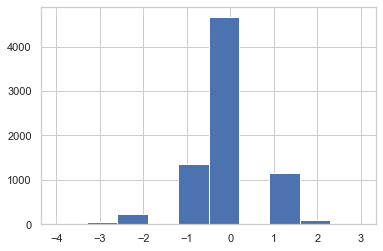

In [549]:
bancos[bancos['PERIODO'].astype(int) > 202007]['VARIAICION_NRO_BANCOS_CIERRE_2019'].hist()

In [550]:
analisis_cliente = analisis_cliente.merge(
    bancos[['COD_UNICO', 'PERIODO', 'VARIAICION_NRO_BANCOS_PRIN_DEBT_u12m',
            'VARIAICION_NRO_BANCOS_CIERRE_2019', 'VARIAICION_NRO_BANCOS_CON_MINIMO_U12M']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 913)

In [551]:
#analisis_cliente[analisis_cliente['PERIODO'] == '202009'].to_excel('seleccion_de_variables.xlsx', index=False)

In [552]:
del deuda_cliente

In [553]:
gc.collect()

66

In [554]:
#analisis_cliente[analisis_cliente['PERIODO'].isin(['202009', '202008'])].to_excel('seleccion_de_variables_20209_202008_2.xlsx', index=False)

#### GARANTIAS

In [555]:
query_ga = """
    SELECT * FROM ODS.HD_VMVP_GARANTIAS_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""
garantia = pd.read_sql(
  query_ga , connection_market
)
garantia.head(10)

,PERIODO,COD_UNICO,GAR_TOT,GAR_TOT_BBVA,GAR_TOT_BCP,GAR_TOT_BIF,GAR_TOT_IBK,GAR_TOT_SCOTIA,GAR_AUTO_TOT,GAR_HIPO_TOT,...,GAR_PREN_NO_PREFER,PERCENT_GAR_IBK,PERCENT_GAR_BCP,PERCENT_GAR_BBVA,PERCENT_GAR_SCOTIA,PERCENT_GAR_BIF,PERCENT_GAR_AUTO,PERCENT_GAR_HIPO,PERCENT_GAR_PREN_WAR,PERCENT_GAR_NO_PREFER
0,201908,0008297841,46478192.10,10914190.27,4274305.00,0.00,12939100.20,0.00,0.0,41577555.05,...,670846.17,0.278390,0.091963,0.234823,0.000000,0.000000,0.000000,0.894560,0.084962,0.014433
1,202001,0010196354,6447970.38,3542184.36,0.00,522970.00,1537029.40,845786.62,0.0,4135436.62,...,2312533.76,0.238374,0.000000,0.549348,0.131170,0.081106,0.000000,0.641354,0.000000,0.358645
2,202004,0013156237,934417.95,0.00,491630.67,0.00,101535.06,0.00,0.0,491630.67,...,3.38,0.108661,0.526135,0.000000,0.000000,0.000000,0.000000,0.526135,0.365199,0.000003
3,202010,0014110524,4485377.69,0.00,0.00,0.00,2414504.12,581294.94,0.0,0.00,...,3597723.54,0.538305,0.000000,0.000000,0.129597,0.000000,0.000000,0.000000,0.191523,0.802100
4,201906,0011396789,9282112.18,0.00,15774.31,7941155.95,356052.26,0.00,0.0,2638857.53,...,4795705.04,0.038358,0.001699,0.000000,0.000000,0.855533,0.000000,0.284294,0.158985,0.516660
5,201911,0011564175,31575702.63,0.00,6051672.00,0.00,4224847.41,21299183.22,0.0,6562068.89,...,18020961.37,0.133800,0.191655,0.000000,0.674543,0.000000,0.000000,0.207820,0.086587,0.570722
6,201912,0013248671,5616487.70,0.00,4871580.00,0.00,4053.00,655000.00,4871580.0,0.00,...,659056.31,0.000721,0.867371,0.000000,0.116620,0.000000,0.867371,0.000000,0.015285,0.117343
7,202004,0015209313,5118197.78,92224.13,4421992.95,0.00,603980.70,0.00,0.0,4421992.95,...,676360.98,0.118006,0.863974,0.018018,0.000000,0.000000,0.000000,0.863974,0.000000,0.132148
8,201912,0011858464,1510901.54,1510901.54,0.00,0.00,0.00,0.00,0.0,0.00,...,1027209.19,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.320134,0.679865
9,202005,0016376276,1220087.70,473888.10,0.00,0.00,746199.60,0.00,0.0,0.00,...,631839.58,0.611595,0.000000,0.388404,0.000000,0.000000,0.000000,0.000000,0.225515,0.517864


### Sumamos un año ya que dbe tomar ultimo rcc desfasado

In [556]:
garantia['PERIODO'] = garantia['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)

In [557]:
garantia.shape, garantia.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((37752, 21), (37752,))

<AxesSubplot:>

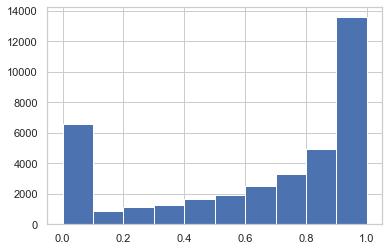

In [558]:
garantia['PERCENT_GAR_OTROS_BANCOS_PRIN'] = garantia[
    ['PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA', 'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF']].sum(axis=1)

garantia['PERCENT_GAR_OTROS_BANCOS_PRIN'].hist()

In [559]:
def get_cat_percent_gar(val):
    if val <= 0.1:
        return 'menos del 10%'
    elif val < 0.2:
        return 'entre 10% y 20%'
    elif val < 0.3:
        return 'entre 20% y 30%'
    elif val < 0.4:
        return 'entre 30% y 40%'
    elif val < 0.5:
        return 'entre 40% y 50%'
    elif val < 0.5:
        return 'entre 50% y 60%'
    elif val < 0.5:
        return 'entre 60% y 70%'
    elif val < 0.5:
        return 'entre 70% y 80%'
    elif val < 0.5:
        return 'entre 80% y 90%'
    elif val < 0.5:
        return 'entre 90% y 100%'
    else:
        return None
    
garantia['cat_PERCENT_GAR_IBK'] = garantia['PERCENT_GAR_IBK'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_AUTO'] = garantia['PERCENT_GAR_AUTO'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_HIPO'] = garantia['PERCENT_GAR_HIPO'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_PREN_WAR'] = garantia['PERCENT_GAR_PREN_WAR'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_NO_PREFER'] = garantia['PERCENT_GAR_NO_PREFER'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_OTROS_BANCOS_PRIN'] = garantia['PERCENT_GAR_OTROS_BANCOS_PRIN'].apply(get_cat_percent_gar)

garantia['PERCENT_GAR_AUTO_HIPO'] = garantia['PERCENT_GAR_AUTO'] + garantia['PERCENT_GAR_HIPO']
garantia['cat_PERCENT_GAR_AUTO_HIPO'] = garantia['PERCENT_GAR_AUTO_HIPO'].apply(get_cat_percent_gar)

garantia['PERCENT_GAR_AUTO_HIPO_PREN'] = garantia['PERCENT_GAR_AUTO'] + garantia['PERCENT_GAR_HIPO'] + garantia['PERCENT_GAR_PREN_WAR']
garantia['cat_PERCENT_GAR_AUTO_HIPO_PREN'] = garantia['PERCENT_GAR_AUTO_HIPO_PREN'].apply(get_cat_percent_gar)

In [560]:
cols_percent = [col for col in garantia.columns if 'PERCENT' in col]
print(cols_percent)

['PERCENT_GAR_IBK', 'PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA', 'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF', 'PERCENT_GAR_AUTO', 'PERCENT_GAR_HIPO', 'PERCENT_GAR_PREN_WAR', 'PERCENT_GAR_NO_PREFER', 'PERCENT_GAR_OTROS_BANCOS_PRIN', 'cat_PERCENT_GAR_IBK', 'cat_PERCENT_GAR_AUTO', 'cat_PERCENT_GAR_HIPO', 'cat_PERCENT_GAR_PREN_WAR', 'cat_PERCENT_GAR_NO_PREFER', 'cat_PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO', 'cat_PERCENT_GAR_AUTO_HIPO', 'PERCENT_GAR_AUTO_HIPO_PREN', 'cat_PERCENT_GAR_AUTO_HIPO_PREN']


In [561]:
GAR_BANCOS = ['PERCENT_GAR_IBK', 'PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA', 'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF']

In [562]:
garantia[GAR_BANCOS + ['COD_UNICO']].head()

,PERCENT_GAR_IBK,PERCENT_GAR_BCP,PERCENT_GAR_BBVA,PERCENT_GAR_SCOTIA,PERCENT_GAR_BIF,COD_UNICO
0,0.278390,0.091963,0.234823,0.000000,0.000000,0008297841
1,0.238374,0.000000,0.549348,0.131170,0.081106,0010196354
2,0.108661,0.526135,0.000000,0.000000,0.000000,0013156237
3,0.538305,0.000000,0.000000,0.129597,0.000000,0014110524
4,0.038358,0.001699,0.000000,0.000000,0.855533,0011396789


In [563]:
garantia['TIENE_MAS_95PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.95]) > 0, axis=1).astype(int)
garantia['TIENE_MAS_90PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.9]) > 0, axis=1).astype(int)
garantia['TIENE_MAS_85PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.85]) > 0, axis=1).astype(int)
garantia['TIENE_MAS_80PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.8]) > 0, axis=1).astype(int)
garantia['TIENE_MAS_75PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.75]) > 0, axis=1).astype(int)

garantia['TIENE_MENOS_1PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.01)
garantia['TIENE_MENOS_5PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.05)
garantia['TIENE_MENOS_10PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.10)
garantia['TIENE_MENOS_15PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.25)
garantia['TIENE_MENOS_20PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.20)
garantia['TIENE_MENOS_25PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.25)

garantia['TIENE_MAYOR_GARTOTAL_EN_IBK'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_) == _[0], axis=1).astype(int)
garantia['TIENE_MAYOR_GARTOTAL_EN_BCP'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_) == _[1], axis=1).astype(int)
garantia['TIENE_MAYOR_GARTOTAL_EN_BBVA'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_) == _[2], axis=1).astype(int)
garantia['TIENE_MAYOR_GARTOTAL_EN_SCOTIA'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_) == _[3], axis=1).astype(int)
garantia['TIENE_MAYOR_GARTOTAL_EN_BIF'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_) == _[4], axis=1).astype(int)

garantia[GAR_BANCOS + ['TIENE_MAYOR_GARTOTAL_EN_BBVA']].head()

,PERCENT_GAR_IBK,PERCENT_GAR_BCP,PERCENT_GAR_BBVA,PERCENT_GAR_SCOTIA,PERCENT_GAR_BIF,TIENE_MAYOR_GARTOTAL_EN_BBVA
0,0.278390,0.091963,0.234823,0.000000,0.000000,0
1,0.238374,0.000000,0.549348,0.131170,0.081106,1
2,0.108661,0.526135,0.000000,0.000000,0.000000,0
3,0.538305,0.000000,0.000000,0.129597,0.000000,0
4,0.038358,0.001699,0.000000,0.000000,0.855533,0


In [564]:
print(cols_percent + [col for col in garantia.columns if 'TIENE' in col])

['PERCENT_GAR_IBK', 'PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA', 'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF', 'PERCENT_GAR_AUTO', 'PERCENT_GAR_HIPO', 'PERCENT_GAR_PREN_WAR', 'PERCENT_GAR_NO_PREFER', 'PERCENT_GAR_OTROS_BANCOS_PRIN', 'cat_PERCENT_GAR_IBK', 'cat_PERCENT_GAR_AUTO', 'cat_PERCENT_GAR_HIPO', 'cat_PERCENT_GAR_PREN_WAR', 'cat_PERCENT_GAR_NO_PREFER', 'cat_PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO', 'cat_PERCENT_GAR_AUTO_HIPO', 'PERCENT_GAR_AUTO_HIPO_PREN', 'cat_PERCENT_GAR_AUTO_HIPO_PREN', 'TIENE_MAS_95PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_90PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_85PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_80PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_75PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MENOS_1PERCENT_GARTOTAL_IBK', 'TIENE_MENOS_5PERCENT_GARTOTAL_IBK', 'TIENE_MENOS_10PERCENT_GARTOTAL_IBK', 'TIENE_MENOS_15PERCENT_GARTOTAL_IBK', 'TIENE_MENOS_20PERCENT_GARTOTAL_IBK

In [565]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    garantia[cols_percent + [col for col in garantia.columns if 'TIENE' in col] + ['PERIODO', 'COD_UNICO']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 913)


(9211, 949)

In [566]:
vigente.shape, vigente.groupby(by=['PERIODO', 'COD_UNICO'])['MTOSALDO'].sum().shape

((113517, 23), (37940,))

In [567]:
agrupado_viegente = vigente.groupby(by=['PERIODO', 'COD_UNICO'])['MTOSALDO'].sum().reset_index()
agrupado_viegente['PERIODO'] = agrupado_viegente['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(agrupado_viegente['PERIODO'].max())
agrupado_viegente.shape

202011


(37940, 3)

In [568]:
print(list(garantia.columns))

['PERIODO', 'COD_UNICO', 'GAR_TOT', 'GAR_TOT_BBVA', 'GAR_TOT_BCP', 'GAR_TOT_BIF', 'GAR_TOT_IBK', 'GAR_TOT_SCOTIA', 'GAR_AUTO_TOT', 'GAR_HIPO_TOT', 'GAR_PREN_WAR_TOT', 'GAR_PREN_NO_PREFER', 'PERCENT_GAR_IBK', 'PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA', 'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF', 'PERCENT_GAR_AUTO', 'PERCENT_GAR_HIPO', 'PERCENT_GAR_PREN_WAR', 'PERCENT_GAR_NO_PREFER', 'PERCENT_GAR_OTROS_BANCOS_PRIN', 'cat_PERCENT_GAR_IBK', 'cat_PERCENT_GAR_AUTO', 'cat_PERCENT_GAR_HIPO', 'cat_PERCENT_GAR_PREN_WAR', 'cat_PERCENT_GAR_NO_PREFER', 'cat_PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO', 'cat_PERCENT_GAR_AUTO_HIPO', 'PERCENT_GAR_AUTO_HIPO_PREN', 'cat_PERCENT_GAR_AUTO_HIPO_PREN', 'TIENE_MAS_95PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_90PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_85PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_80PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK', 'TIENE_MAS_75PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK

In [569]:
agrupado_viegente = agrupado_viegente.merge(
    garantia[['GAR_AUTO_TOT', 'GAR_HIPO_TOT', 'GAR_PREN_WAR_TOT', 'PERCENT_GAR_NO_PREFER'] + ['PERIODO', 'COD_UNICO']], how='left', on=['PERIODO', 'COD_UNICO']
)
agrupado_viegente.head()

,PERIODO,COD_UNICO,MTOSALDO,GAR_AUTO_TOT,GAR_HIPO_TOT,GAR_PREN_WAR_TOT,PERCENT_GAR_NO_PREFER
0,201904,0000002469,10318226.99,0.0,23904353.24,0.00,0.000000
1,201904,0000003392,10656338.66,0.0,971816.98,2120363.07,0.805221
2,201904,0000006114,519166.36,0.0,0.00,0.00,0.489797
3,201904,0000008318,195934.03,0.0,6922962.73,78244.45,0.249240
4,201904,0000037374,13346626.45,0.0,2977130.84,0.00,0.872779


In [570]:
agrupado_viegente['NO_TIENE_GAR_AUTO_SF'] = agrupado_viegente['GAR_AUTO_TOT'].apply(lambda _: _== 0).astype(int)
agrupado_viegente['NO_TIENE_GAR_AUTO_HIPO_SF'] = agrupado_viegente[['GAR_AUTO_TOT', 'GAR_HIPO_TOT']].apply(lambda _: _[0] == 0 and _[1] == 0, axis=1).astype(int)
agrupado_viegente['NO_TIENE_GAR_AUTO_HIPO_PREN_SF'] = agrupado_viegente[['GAR_AUTO_TOT', 'GAR_HIPO_TOT', 'GAR_PREN_WAR_TOT']].apply(
    lambda _: _[0] == 0 and _[1] == 0 and _[2] == 0, axis=1).astype(int)

In [571]:
agrupado_viegente['GAR_AUTO_HIPO_PREN'] = agrupado_viegente['GAR_AUTO_TOT']  + agrupado_viegente['GAR_HIPO_TOT']  +agrupado_viegente['GAR_PREN_WAR_TOT'] 
agrupado_viegente['GAR_AUTO_HIPO'] = agrupado_viegente['GAR_AUTO_TOT']  + agrupado_viegente['GAR_HIPO_TOT']
agrupado_viegente['GAR_AUTO_HIPO_PREN_NOPREFER'] = agrupado_viegente['GAR_AUTO_TOT']  + agrupado_viegente['GAR_HIPO_TOT']  +agrupado_viegente['GAR_PREN_WAR_TOT'] + agrupado_viegente['PERCENT_GAR_NO_PREFER'] 

agrupado_viegente.head()

,PERIODO,COD_UNICO,MTOSALDO,GAR_AUTO_TOT,GAR_HIPO_TOT,GAR_PREN_WAR_TOT,PERCENT_GAR_NO_PREFER,NO_TIENE_GAR_AUTO_SF,NO_TIENE_GAR_AUTO_HIPO_SF,NO_TIENE_GAR_AUTO_HIPO_PREN_SF,GAR_AUTO_HIPO_PREN,GAR_AUTO_HIPO,GAR_AUTO_HIPO_PREN_NOPREFER
0,201904,0000002469,10318226.99,0.0,23904353.24,0.00,0.000000,1,0,0,23904353.24,23904353.24,2.390435e+07
1,201904,0000003392,10656338.66,0.0,971816.98,2120363.07,0.805221,1,0,0,3092180.05,971816.98,3.092181e+06
2,201904,0000006114,519166.36,0.0,0.00,0.00,0.489797,1,1,1,0.00,0.00,4.897970e-01
3,201904,0000008318,195934.03,0.0,6922962.73,78244.45,0.249240,1,0,0,7001207.18,6922962.73,7.001207e+06
4,201904,0000037374,13346626.45,0.0,2977130.84,0.00,0.872779,1,0,0,2977130.84,2977130.84,2.977132e+06


In [572]:
agrupado_viegente['COVER_GAR_AUTO_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_TOT', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
agrupado_viegente['COVER_GAR_AUTO_HIPO_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_HIPO', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_HIPO_PREN', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_HIPO_PREN_NOPREFER', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)

In [573]:
def get_cat_cover(val):
    if pd.isnull(val):
        return None
    
    if val <= 0.1:
        return 'menos del 10%'
    elif val < 0.2:
        return 'entre10 y 20%%'
    elif val < 0.4:
        return 'entre10 y 20%%'
    elif val < 0.6:
        return 'entre10 y 20%%'
    elif val < 0.8:
        return 'entre10 y 20%%'
    elif val < 1:
        return 'entre10 y 20%%'
    elif val < 1.2:
        return 'sobre cubierto en 20%'
    elif val < 1.4:
        return 'sobre cubierto de 20% a 40%'
    elif val <= 1.6:
        return 'sobre cubierto de 40% a 60%'
    else:
        return 'sobre cubierto a mas del 60%'
    
agrupado_viegente['cat_COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC'].apply(get_cat_cover)
agrupado_viegente['cat_COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'].apply(get_cat_cover)
agrupado_viegente['cat_COVER_GAR_AUTO_HIPO_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_HIPO_ULT_RCC'].apply(get_cat_cover)
agrupado_viegente['cat_COVER_GAR_AUTO_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_ULT_RCC'].apply(get_cat_cover)

<AxesSubplot:>

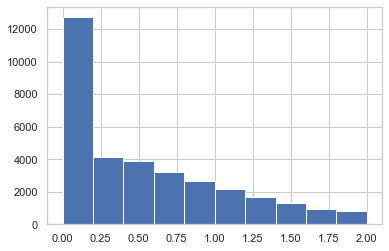

In [574]:
agrupado_viegente[agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'] < 2]['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'].hist()

<AxesSubplot:>

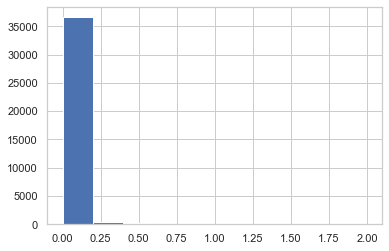

In [575]:
agrupado_viegente[agrupado_viegente['COVER_GAR_AUTO_ULT_RCC'] < 2]['COVER_GAR_AUTO_ULT_RCC'].hist()

<AxesSubplot:>

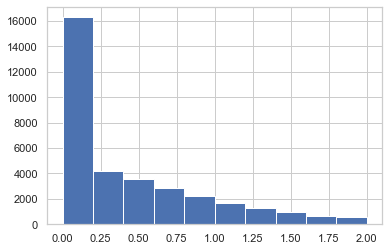

In [576]:
agrupado_viegente[agrupado_viegente['COVER_GAR_AUTO_HIPO_ULT_RCC'] < 2]['COVER_GAR_AUTO_HIPO_ULT_RCC'].hist()

In [577]:
agrupado_viegente.head()

,PERIODO,COD_UNICO,MTOSALDO,GAR_AUTO_TOT,GAR_HIPO_TOT,GAR_PREN_WAR_TOT,PERCENT_GAR_NO_PREFER,NO_TIENE_GAR_AUTO_SF,NO_TIENE_GAR_AUTO_HIPO_SF,NO_TIENE_GAR_AUTO_HIPO_PREN_SF,...,GAR_AUTO_HIPO,GAR_AUTO_HIPO_PREN_NOPREFER,COVER_GAR_AUTO_ULT_RCC,COVER_GAR_AUTO_HIPO_ULT_RCC,COVER_GAR_AUTO_HIPO_PREN_ULT_RCC,COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC,cat_COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC,cat_COVER_GAR_AUTO_HIPO_PREN_ULT_RCC,cat_COVER_GAR_AUTO_HIPO_ULT_RCC,cat_COVER_GAR_AUTO_ULT_RCC
0,201904,0000002469,10318226.99,0.0,23904353.24,0.00,0.000000,1,0,0,...,23904353.24,2.390435e+07,0.0,2.316711,2.316711,2.316711e+00,sobre cubierto a mas del 60%,sobre cubierto a mas del 60%,sobre cubierto a mas del 60%,menos del 10%
1,201904,0000003392,10656338.66,0.0,971816.98,2120363.07,0.805221,1,0,0,...,971816.98,3.092181e+06,0.0,0.091196,0.290173,2.901729e-01,entre10 y 20%%,entre10 y 20%%,menos del 10%,menos del 10%
2,201904,0000006114,519166.36,0.0,0.00,0.00,0.489797,1,1,1,...,0.00,4.897970e-01,0.0,0.000000,0.000000,9.434298e-07,menos del 10%,menos del 10%,menos del 10%,menos del 10%
3,201904,0000008318,195934.03,0.0,6922962.73,78244.45,0.249240,1,0,0,...,6922962.73,7.001207e+06,0.0,35.333131,35.732472,3.573247e+01,sobre cubierto a mas del 60%,sobre cubierto a mas del 60%,sobre cubierto a mas del 60%,menos del 10%
4,201904,0000037374,13346626.45,0.0,2977130.84,0.00,0.872779,1,0,0,...,2977130.84,2.977132e+06,0.0,0.223062,0.223062,2.230625e-01,entre10 y 20%%,entre10 y 20%%,entre10 y 20%%,menos del 10%


In [578]:
agrupado_viegente['PERIODO'].max()

'202011'

In [579]:
print(analisis_cliente.shape)  		
analisis_cliente = analisis_cliente.merge(
    agrupado_viegente[['PERIODO', 'COD_UNICO', 'COVER_GAR_AUTO_ULT_RCC', 'COVER_GAR_AUTO_HIPO_PREN_ULT_RCC', 
                       'COVER_GAR_AUTO_HIPO_ULT_RCC', 'cat_COVER_GAR_AUTO_ULT_RCC', 'cat_COVER_GAR_AUTO_HIPO_ULT_RCC',
                       'cat_COVER_GAR_AUTO_HIPO_PREN_ULT_RCC', 'cat_COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC', 'NO_TIENE_GAR_AUTO_SF',
                       'NO_TIENE_GAR_AUTO_HIPO_SF', 'NO_TIENE_GAR_AUTO_HIPO_PREN_SF'
                      ]], 
    how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 949)


(9211, 959)

#### VARAACION DE GARANTIA

In [580]:
garantia.shape, garantia.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((37752, 48), (37752,))

In [581]:
garantia.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

,PERIODO,COD_UNICO,GAR_TOT,GAR_TOT_BBVA,GAR_TOT_BCP,GAR_TOT_BIF,GAR_TOT_IBK,GAR_TOT_SCOTIA,GAR_AUTO_TOT,GAR_HIPO_TOT,...,TIENE_MENOS_5PERCENT_GARTOTAL_IBK,TIENE_MENOS_10PERCENT_GARTOTAL_IBK,TIENE_MENOS_15PERCENT_GARTOTAL_IBK,TIENE_MENOS_20PERCENT_GARTOTAL_IBK,TIENE_MENOS_25PERCENT_GARTOTAL_IBK,TIENE_MAYOR_GARTOTAL_EN_IBK,TIENE_MAYOR_GARTOTAL_EN_BCP,TIENE_MAYOR_GARTOTAL_EN_BBVA,TIENE_MAYOR_GARTOTAL_EN_SCOTIA,TIENE_MAYOR_GARTOTAL_EN_BIF
26159,201904,0000002469,23904353.24,0.0,19584618.03,0.0,4319735.21,0.0,0.0,23904353.24,...,False,False,True,True,True,0,1,0,0,0
23956,201905,0000002469,23933642.25,0.0,19531495.19,0.0,4402147.06,0.0,0.0,23933642.25,...,False,False,True,True,True,0,1,0,0,0


In [582]:
print(garantia.columns)

Index(['PERIODO', 'COD_UNICO', 'GAR_TOT', 'GAR_TOT_BBVA', 'GAR_TOT_BCP',
       'GAR_TOT_BIF', 'GAR_TOT_IBK', 'GAR_TOT_SCOTIA', 'GAR_AUTO_TOT',
       'GAR_HIPO_TOT', 'GAR_PREN_WAR_TOT', 'GAR_PREN_NO_PREFER',
       'PERCENT_GAR_IBK', 'PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA',
       'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF', 'PERCENT_GAR_AUTO',
       'PERCENT_GAR_HIPO', 'PERCENT_GAR_PREN_WAR', 'PERCENT_GAR_NO_PREFER',
       'PERCENT_GAR_OTROS_BANCOS_PRIN', 'cat_PERCENT_GAR_IBK',
       'cat_PERCENT_GAR_AUTO', 'cat_PERCENT_GAR_HIPO',
       'cat_PERCENT_GAR_PREN_WAR', 'cat_PERCENT_GAR_NO_PREFER',
       'cat_PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO',
       'cat_PERCENT_GAR_AUTO_HIPO', 'PERCENT_GAR_AUTO_HIPO_PREN',
       'cat_PERCENT_GAR_AUTO_HIPO_PREN',
       'TIENE_MAS_95PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK',
       'TIENE_MAS_90PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK',
       'TIENE_MAS_85PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK',
       'TIENE_MAS

In [583]:
garantia =garantia[[col for col in garantia.columns if 'cat' not in col]]
garantia.dtypes

PERIODO                                                        object
COD_UNICO                                                      object
GAR_TOT                                                       float64
GAR_TOT_BBVA                                                  float64
GAR_TOT_BCP                                                   float64
GAR_TOT_BIF                                                   float64
GAR_TOT_IBK                                                   float64
GAR_TOT_SCOTIA                                                float64
GAR_AUTO_TOT                                                  float64
GAR_HIPO_TOT                                                  float64
GAR_PREN_WAR_TOT                                              float64
GAR_PREN_NO_PREFER                                            float64
PERCENT_GAR_IBK                                               float64
PERCENT_GAR_BCP                                               float64
PERCENT_GAR_BBVA    

In [584]:
dicc_kpi = {
    'PERCENT_GAR_IBK': ['min', 'max'],
    'PERCENT_GAR_OTROS_BANCOS_PRIN':['min', 'max'],
    'PERCENT_GAR_AUTO':['min', 'max'],
    'PERCENT_GAR_AUTO_HIPO':['min', 'max'],
    'PERCENT_GAR_AUTO_HIPO_PREN':['min', 'max'],
}
columns_base = [
    'minimo_percent_ibk', 'maximo_percent_ibk',
    'minimo_percent_others', 'maximo_percent_others',
    'minimo_percent_auto', 'maximo_percent_auto',
    'minimo_percent_auto_hipo', 'maximo_percent_auto_hipo',
    'minimo_percent_auto_hipo_pren', 'maximo_auto_hipo_percent_pren',
]
contador = 1

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2])
    
    u6m = garantia[garantia['PERIODO'].astype(int).isin(tramo[1][:-2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    u6m.columns = [_ + '_u12m' for _ in columns_base]
    
    u6m['PERIODO'] = str(tramo[0])
    #print(_6m_anio_anterior.head())
    u6m = u6m.reset_index()
    if contador == 1:
        var_pecent_gar = u6m
    else:
        var_pecent_gar = pd.concat(
            [var_pecent_gar, u6m], axis=0
        )
    
    print(var_pecent_gar.shape)
    contador += 1

202011 [201912, 202001]
(1965, 12)
202010 [201911, 201912]
(3927, 12)
202009 [201910, 201911]
(5887, 12)
202008 [201909, 201910]
(7844, 12)
202007 [201908, 201909]
(9798, 12)


In [585]:
garantia = garantia[
    ['PERIODO', 'COD_UNICO', 'PERCENT_GAR_IBK', 'PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO',
     'PERCENT_GAR_AUTO_HIPO_PREN', 'PERCENT_GAR_AUTO'
    ]].merge(
    var_pecent_gar, how='left', on=['PERIODO', 'COD_UNICO']
)
garantia.head(30)

,PERIODO,COD_UNICO,PERCENT_GAR_IBK,PERCENT_GAR_OTROS_BANCOS_PRIN,PERCENT_GAR_AUTO_HIPO,PERCENT_GAR_AUTO_HIPO_PREN,PERCENT_GAR_AUTO,minimo_percent_ibk_u12m,maximo_percent_ibk_u12m,minimo_percent_others_u12m,maximo_percent_others_u12m,minimo_percent_auto_u12m,maximo_percent_auto_u12m,minimo_percent_auto_hipo_u12m,maximo_percent_auto_hipo_u12m,minimo_percent_auto_hipo_pren_u12m,maximo_auto_hipo_percent_pren_u12m
0,201909,0008297841,0.278390,0.326786,0.894560,0.979522,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202002,0010196354,0.238374,0.761624,0.641354,0.641354,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202005,0013156237,0.108661,0.526135,0.526135,0.891334,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202011,0014110524,0.538305,0.129597,0.000000,0.191523,0.000000,0.538305,0.725930,0.129597,0.227673,0.0,0.0,0.000000,0.511802,0.191523,0.888202
4,201907,0011396789,0.038358,0.857232,0.284294,0.443279,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,201912,0011564175,0.133800,0.866198,0.207820,0.294407,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,202001,0013248671,0.000721,0.983991,0.867371,0.882656,0.867371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,202005,0015209313,0.118006,0.881992,0.863974,0.863974,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,202001,0011858464,0.000000,1.000000,0.000000,0.320134,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,202006,0016376276,0.611595,0.388404,0.000000,0.225515,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [586]:
print(list(garantia.columns))

['PERIODO', 'COD_UNICO', 'PERCENT_GAR_IBK', 'PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO', 'PERCENT_GAR_AUTO_HIPO_PREN', 'PERCENT_GAR_AUTO', 'minimo_percent_ibk_u12m', 'maximo_percent_ibk_u12m', 'minimo_percent_others_u12m', 'maximo_percent_others_u12m', 'minimo_percent_auto_u12m', 'maximo_percent_auto_u12m', 'minimo_percent_auto_hipo_u12m', 'maximo_percent_auto_hipo_u12m', 'minimo_percent_auto_hipo_pren_u12m', 'maximo_auto_hipo_percent_pren_u12m']


In [587]:
for col in [_ for _ in garantia.columns if 'u12m' in _]:
    garantia[col] =  garantia[col].fillna(0)


garantia['VARIACION_PERCENT_GAR_IBK_U12M'] = garantia[
    ['PERCENT_GAR_IBK', 'minimo_percent_ibk_u12m', 'maximo_percent_ibk_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)
garantia['VARIACION_PERCENT_GAR_OTROS_BANCOS_PRIN_U12M'] = garantia[
    ['PERCENT_GAR_OTROS_BANCOS_PRIN', 'minimo_percent_others_u12m', 'maximo_percent_others_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)

garantia.shape, garantia.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((37752, 19), (37752,))

In [588]:
garantia.shape, garantia.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((37752, 19), (37752,), (9211, 959), (9211,))

In [589]:
print(analisis_cliente.shape)
del var_pecent_gar
analisis_cliente = analisis_cliente.merge(
    garantia[[col for col in garantia.columns if 'VARIACION' in col.upper() or 'u12m' in col.lower()] + ['PERIODO', 'COD_UNICO']],
    how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

(9211, 959)


((9211, 971), (9211,))

In [590]:
#analisis_cliente[analisis_cliente['PERIODO'].isin(['202009', '202008'])].to_excel('seleccion_de_variables_20209_202008.xlsx', index=False)

#### VARACION SOW

In [591]:
sow.shape, sow.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((39034, 17), (39034,))

In [592]:
sow.head()

,COD_UNICO,PERIODO,MTOSALDO,MTOSALDO_IBK,MTOSALDO_DIR_SF,MTOSALDO_INDIR_SF,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA,SOW_IBK,SOW_BBVA,SOW_BCP,SOW_BIF,SOW_SCOTIA,SOW_OTROSBCOS,PERCENT_COL_DIRECTAS_SF
0,0000059238,202011,74946686.25,19884452.91,36175116.95,38771569.30,9976765.69,14128786.33,18902033.94,7823718.20,0.265314,0.133118,0.188517,0.252206,0.104390,0.678232,0.482678
1,0000926535,202003,11301121.86,1622577.74,10458872.97,842248.89,5345950.00,2501175.12,0.00,1831419.00,0.143576,0.473045,0.221320,0.000000,0.162056,0.856423,0.925472
2,0011442276,202002,12045.18,12045.18,0.00,12045.18,0.00,0.00,0.00,0.00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0013520236,202002,10160837.20,140334.57,10160837.20,0.00,5341065.87,4679436.76,0.00,0.00,0.013811,0.525652,0.460536,0.000000,0.000000,0.986188,1.000000
4,0012573980,202005,1395226.30,397218.09,1395226.30,0.00,222203.39,0.00,0.00,360807.12,0.284697,0.159259,0.000000,0.000000,0.258601,0.417860,1.000000


In [593]:
dicc_kpi = {
    'SOW_IBK': ['min', 'max'],
    'SOW_OTROSBCOS':['min', 'max'],
    'PERCENT_COL_DIRECTAS_SF':['min', 'max']
}
columns_base = [
    'minimo_percent_sow_ibk', 'maximo_percent_sow_ibk',
    'minimo_percent_sow_others', 'maximo_percent_sow_others',
    'minimo_percent_col_direct', 'maximo_percent_col_direct'
]
contador = 1

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2])
    
    u6m = sow[sow['PERIODO'].astype(int).isin(tramo[1][:-2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    u6m.columns = [_ + '_u12m' for _ in columns_base]
    
    u6m['PERIODO'] = str(tramo[0])
    #print(_6m_anio_anterior.head())
    u6m = u6m.reset_index()
    if contador == 1:
        var_pecent_sow = u6m
    else:
        var_pecent_sow = pd.concat(
            [var_pecent_sow, u6m], axis=0
        )
    
    print(var_pecent_sow.shape)
    contador += 1

202011 [201912, 202001]
(2028, 8)
202010 [201911, 201912]
(4055, 8)
202009 [201910, 201911]
(6080, 8)
202008 [201909, 201910]
(8102, 8)
202007 [201908, 201909]
(10120, 8)


In [594]:
var_pecent_sow.head()

,COD_UNICO,minimo_percent_sow_ibk_u12m,maximo_percent_sow_ibk_u12m,minimo_percent_sow_others_u12m,maximo_percent_sow_others_u12m,minimo_percent_col_direct_u12m,maximo_percent_col_direct_u12m,PERIODO
0,0000002469,0.000000,0.178770,0.472807,0.890983,0.829713,0.925608,202011
1,0000003392,0.076237,0.195480,0.721719,0.895014,0.993291,1.000000,202011
2,0000006114,0.636633,0.859024,0.000000,0.000000,0.465432,0.792603,202011
3,0000008318,0.079957,0.559123,0.440876,0.920042,0.019354,0.540509,202011
4,0000037374,0.000000,0.000000,1.000000,1.000000,0.683849,1.000000,202011


In [595]:
sow = sow[
    ['PERIODO', 'COD_UNICO', 'SOW_IBK', 'SOW_OTROSBCOS', 'PERCENT_COL_DIRECTAS_SF'
    ]].merge(
    var_pecent_sow, how='left', on=['PERIODO', 'COD_UNICO']
)
sow.head(30)

,PERIODO,COD_UNICO,SOW_IBK,SOW_OTROSBCOS,PERCENT_COL_DIRECTAS_SF,minimo_percent_sow_ibk_u12m,maximo_percent_sow_ibk_u12m,minimo_percent_sow_others_u12m,maximo_percent_sow_others_u12m,minimo_percent_col_direct_u12m,maximo_percent_col_direct_u12m
0,202011,0000059238,0.265314,0.678232,0.482678,0.190723,0.303353,0.614467,0.716930,0.417760,0.581932
1,202003,0000926535,0.143576,0.856423,0.925472,NaN,NaN,NaN,NaN,NaN,NaN
2,202002,0011442276,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,202002,0013520236,0.013811,0.986188,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,202005,0012573980,0.284697,0.417860,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
5,202007,0011360450,0.002105,0.922902,0.721750,0.002105,0.113943,0.800167,0.922902,0.547466,0.737611
6,202007,0014670497,0.524496,0.475503,0.756243,0.000000,0.603748,0.396251,1.000000,0.587815,0.996847
7,201906,0000056036,0.171092,0.779362,0.996195,NaN,NaN,NaN,NaN,NaN,NaN
8,202001,0011179155,0.079092,0.902322,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
9,202006,0015396807,0.070496,0.929503,0.960415,NaN,NaN,NaN,NaN,NaN,NaN


In [596]:
print(list(sow.columns))

['PERIODO', 'COD_UNICO', 'SOW_IBK', 'SOW_OTROSBCOS', 'PERCENT_COL_DIRECTAS_SF', 'minimo_percent_sow_ibk_u12m', 'maximo_percent_sow_ibk_u12m', 'minimo_percent_sow_others_u12m', 'maximo_percent_sow_others_u12m', 'minimo_percent_col_direct_u12m', 'maximo_percent_col_direct_u12m']


In [597]:
for col in [_ for _ in sow.columns if 'u12m' in _]:
    sow[col] =  sow[col].fillna(0)


sow['VARIACION_SOW_IBK_U12M'] = sow[
    ['SOW_IBK', 'minimo_percent_sow_ibk_u12m', 'maximo_percent_sow_ibk_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)
sow['VARIACION_SOW_OTROS_BANCOS_PRIN_U12M'] = sow[
    ['SOW_OTROSBCOS', 'minimo_percent_sow_others_u12m', 'maximo_percent_sow_others_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)
sow['VARIACION_PERCENT_COL_DRECTAS_U12M'] = sow[
    ['PERCENT_COL_DIRECTAS_SF', 'minimo_percent_col_direct_u12m', 'maximo_percent_col_direct_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)

sow.shape, sow.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((39034, 14), (39034,))

In [598]:
analisis_cliente = analisis_cliente.merge(
    sow[[col for col in sow.columns if 'VARIACION' in col.upper() or 'u12m' in col] + ['COD_UNICO', 'PERIODO']], 
    how='left', on=['COD_UNICO', 'PERIODO']
)
analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((9211, 980), (9211,))

### COVID

In [599]:
query_covid = """
    SELECT * FROM STG.T_WEBVPC_COVID19 WITH (NOLOCK)
    ORDER BY FECHA_CREACION DESC
"""
covid = pd.read_sql(
   query_covid , connection_market
)
covid.head(2)

,COD_UNICO,ID,ID_VISITA,FECHA_REGISTRO,PREGUNTA_1,PREGUNTA_2_1,PREGUNTA_2_2,PREGUNTA_2_3_1,PREGUNTA_2_3_2,PREGUNTA_3,...,USUARIO_MODIFICACION,FECHA_MODIFICACION,MONTO_CRECER,DETALLE_CRECER,FECHA_APROBACION,USUARIO_GYS,USUARIO_ADMISION,USUARIO_NOTIFICADO,USUARIO_ACOMP,FECHA_CARGA


In [600]:
#%%time

#from sqlalchemy import create_engine
#engine = create_engine(r"mssql+pymssql://ibetlmarket:m@rk3t2o15@10.11.12.90\BDT/MARKET")
#connection_x = engine.connect()

#try:
#    covid.to_sql(
#        name='HD_FICHA_COVD_ALERTA_CARTERA_BE_V3',
#        schema='ODS',
#        con=connection_x, 
#        index=False, 
#        if_exists='replace'
#    )
#    connection_x.close()
#    correct = 1
#except Exception as e:
#    print("ERROR: ", str(e))
#    correct = 0

#print(correct)

In [601]:
covid.shape, covid['COD_UNICO'].unique().shape

((0, 72), (0,))

In [602]:
aa = covid.groupby(by=['COD_UNICO']).size()
aa[aa > 1]

Series([], dtype: int64)

In [603]:
covid[covid['COD_UNICO'] == '0006199905']

,COD_UNICO,ID,ID_VISITA,FECHA_REGISTRO,PREGUNTA_1,PREGUNTA_2_1,PREGUNTA_2_2,PREGUNTA_2_3_1,PREGUNTA_2_3_2,PREGUNTA_3,...,USUARIO_MODIFICACION,FECHA_MODIFICACION,MONTO_CRECER,DETALLE_CRECER,FECHA_APROBACION,USUARIO_GYS,USUARIO_ADMISION,USUARIO_NOTIFICADO,USUARIO_ACOMP,FECHA_CARGA


In [604]:
print("ANTES con duplicados: ", covid.shape[0])
covid = covid.drop_duplicates(subset=['COD_UNICO'], keep='first')
print("Regsistros únicos por codigo único: ", covid.shape[0])

ANTES con duplicados:  0
Regsistros únicos por codigo único:  0


In [605]:
#covid['PREGUNTA_5_1'].value_counts(dropna=False)
covid.columns

Index(['COD_UNICO', 'ID', 'ID_VISITA', 'FECHA_REGISTRO', 'PREGUNTA_1',
       'PREGUNTA_2_1', 'PREGUNTA_2_2', 'PREGUNTA_2_3_1', 'PREGUNTA_2_3_2',
       'PREGUNTA_3', 'PREGUNTA_4', 'PREGUNTA_5_1', 'PREGUNTA_5_2',
       'PREGUNTA_6_1', 'PREGUNTA_6_2', 'PREGUNTA_7', 'PREGUNTA_7_1',
       'PREGUNTA_7_2_1', 'PREGUNTA_7_2_2', 'PREGUNTA_7_3', 'PREGUNTA_7_4',
       'PREGUNTA_8_1', 'PREGUNTA_8_1_1_1', 'PREGUNTA_8_1_1_2',
       'PREGUNTA_8_1_2', 'PREGUNTA_8_2', 'PREGUNTA_8_3', 'PREGUNTA_8_3_2',
       'PREGUNTA_8_3_1', 'PREGUNTA_9_1', 'PREGUNTA_9_2', 'PREGUNTA_10_1',
       'PREGUNTA_10_2', 'PREGUNTA_11', 'PREGUNTA_11_1_1', 'PREGUNTA_11_1_2',
       'PREGUNTA_11_2_1', 'PREGUNTA_11_2_2', 'PREGUNTA_11_3_1',
       'PREGUNTA_11_3_2', 'PREGUNTA_11_4_1', 'PREGUNTA_11_4_2',
       'PREGUNTA_11_5_1', 'PREGUNTA_11_5_2', 'PREGUNTA_11_6_1',
       'PREGUNTA_11_6_2', 'PREGUNTA_12', 'PREGUNTA_12_1', 'PREGUNTA_12_2',
       'PREGUNTA_12_2_1', 'PREGUNTA_12_2_2_1', 'PREGUNTA_12_2_2_2',
       'PREGUNTA_13

<AxesSubplot:>

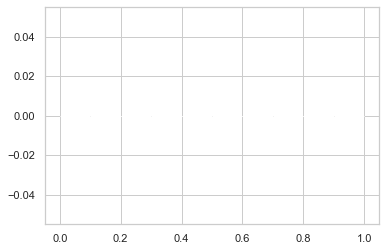

In [606]:
covid['PREGUNTA_5_1'].hist()

['COD_UNICO', 'ID', 'ID_VISITA', 'FECHA_REGISTRO', 'COVID_P_1', 'COVID_P_2_1', 'COVID_P_2_2', 'COVID_P_2_3_1', 'COVID_P_2_3_2', 'COVID_P_3', 'COVID_P_4', 'COVID_P_5_1', 'COVID_P_5_2', 'COVID_P_6_1', 'COVID_P_6_2', 'COVID_P_7', 'COVID_P_7_1', 'COVID_P_7_2_1', 'COVID_P_7_2_2', 'COVID_P_7_3', 'COVID_P_7_4', 'COVID_P_8_1', 'COVID_P_8_1_1_1', 'COVID_P_8_1_1_2', 'COVID_P_8_1_2', 'COVID_P_8_2', 'COVID_P_8_3', 'COVID_P_8_3_2', 'COVID_P_8_3_1', 'COVID_P_9_1', 'COVID_P_9_2', 'COVID_P_10_1', 'COVID_P_10_2', 'COVID_P_11', 'COVID_P_11_1_1', 'COVID_P_11_1_2', 'COVID_P_11_2_1', 'COVID_P_11_2_2', 'COVID_P_11_3_1', 'COVID_P_11_3_2', 'COVID_P_11_4_1', 'COVID_P_11_4_2', 'COVID_P_11_5_1', 'COVID_P_11_5_2', 'COVID_P_11_6_1', 'COVID_P_11_6_2', 'COVID_P_12', 'COVID_P_12_1', 'COVID_P_12_2', 'COVID_P_12_2_1', 'COVID_P_12_2_2_1', 'COVID_P_12_2_2_2', 'COVID_P_13', 'COVID_P_14_1', 'COVID_P_14_2', 'COVID_P_14_3', 'COVID_P_14_4', 'COVID_P_14_5', 'ESTADO_APROBACION', 'ESTADO_REGISTRO', 'USUARIO_CREACION', 'FECHA_CRE

<AxesSubplot:>

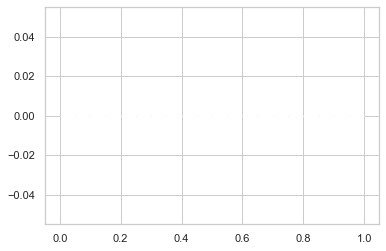

In [607]:
def parser_si_no(val):
    if pd.isnull(val):
        return None
    return 'SI' if str(val).strip() == '1' else 'NO'

covid['COVID_P_5_VARIACION_PORCENTUAL_VENTAS_2020_2019'] = covid['PREGUNTA_5_1'].copy()

covid.columns = [col.replace('PREGUNTA', 'COVID_P') for col in covid.columns]
print(list(covid.columns))


covid['COVID_P_1'] = covid['COVID_P_1'].apply(parser_si_no)
covid['COVID_P_1'].value_counts(dropna=False)


covid['IMPACTO_COVID_FICHA'] = covid['COVID_P_13'].copy()
covid['COVID_P_1_TE_AFECTO_COVID'] = covid['COVID_P_1'].copy()
del covid['COVID_P_13']
del covid['COVID_P_1']


covid['COVID_ESTRATEGIA'] = covid['COVID_P_14_1'].copy()
covid['COVID_ESTRATEGIA'] = covid['COVID_ESTRATEGIA'].fillna('Sin categoria')
covid['COVID_ESTRATEGIA'] = covid['COVID_ESTRATEGIA'].apply(lambda _: _.strip().upper())
#covid['COVID_ESTRATEGIA'].value_counts(dropna=False) # ESTRATEGIA


covid['COVID_FEVE'] = covid['COVID_P_14_2'].copy()
covid['COVID_FEVE'] = covid['COVID_FEVE'].fillna('Sin categoria')
covid['COVID_FEVE'] = covid['COVID_FEVE'].apply(lambda _: _.strip().upper())
#covid['COVID_FEVE'].value_counts(dropna=False) # FEVE

covid['COVID_ACOGIO_SUSPENSION_PERFECTA'] = covid['COVID_P_2_2'].apply(lambda _: 'SI' if str(_).strip() in ('1', '1.0') else 'NO')
#covid['COVID_ACOGIO_SUSPENSION_PERFECTA'].value_counts(dropna=False)

covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'] = covid['COVID_P_2_3_2'].copy()
covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'] = covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'].fillna(0.0)
#del covid['COVID_P_2_3_2']
#covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'].hist(bins=20)

covid['COVID_PORCENTAJE_REDUCCION_INGREO_MENUSAL'] = covid['COVID_P_4'].fillna(0.0)
#del covid['COVID_P_4']
covid['COVID_PORCENTAJE_REDUCCION_INGREO_MENUSAL'].hist(bins=20)

<AxesSubplot:>

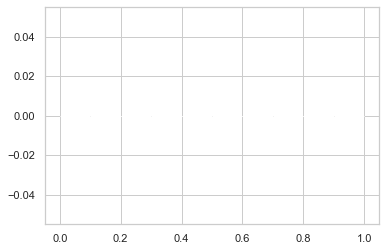

In [608]:
covid['COVID_P_5_VARIACION_PORCENTUAL_VENTAS_2020_2019'].hist()

In [609]:
'COVID_P_12', 'COVID_P_12_1'

('COVID_P_12', 'COVID_P_12_1')

In [610]:
covid['COVID_P_12'].value_counts()

Series([], Name: COVID_P_12, dtype: int64)

In [611]:
covid['COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES'] = covid['COVID_P_12'].apply(lambda _: 1 if _ == 1 else 0)
covid['COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES'].value_counts()                                                       

Series([], Name: COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES, dtype: int64)

In [612]:
covid['COVID_P_12_1'] = covid['COVID_P_12_1'].fillna(0)
covid['COVID_12_DE_CUNATA_INVERSION_SE_TRATA'] = covid['COVID_P_12_1'].copy()

In [613]:
covid.head(3)

,COD_UNICO,ID,ID_VISITA,FECHA_REGISTRO,COVID_P_2_1,COVID_P_2_2,COVID_P_2_3_1,COVID_P_2_3_2,COVID_P_3,COVID_P_4,...,COVID_P_5_VARIACION_PORCENTUAL_VENTAS_2020_2019,IMPACTO_COVID_FICHA,COVID_P_1_TE_AFECTO_COVID,COVID_ESTRATEGIA,COVID_FEVE,COVID_ACOGIO_SUSPENSION_PERFECTA,COVID_PORCENTAJE_REDUCCION_PERSONAL,COVID_PORCENTAJE_REDUCCION_INGREO_MENUSAL,COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES,COVID_12_DE_CUNATA_INVERSION_SE_TRATA


In [614]:
covid.shape, covid['COD_UNICO'].unique().shape

((0, 80), (0,))

In [615]:
covid['PERIODO'] = '202009'
covid_202009 = covid.copy()

In [616]:
covid['PERIODO'] = '202008'
covid_202008 = covid.copy()

In [617]:
covid = pd.concat(
    [covid_202009, covid_202008], axis=0
)

In [618]:
covid['PERIODO'].value_counts()

Series([], Name: PERIODO, dtype: int64)

In [619]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    covid[
    ['PERIODO', 'COD_UNICO','COVID_P_1_TE_AFECTO_COVID', 'COVID_ACOGIO_SUSPENSION_PERFECTA', 
     'COVID_PORCENTAJE_REDUCCION_PERSONAL','COVID_PORCENTAJE_REDUCCION_INGREO_MENUSAL', 'IMPACTO_COVID_FICHA',
     'COVID_P_5_VARIACION_PORCENTUAL_VENTAS_2020_2019', 'COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES', 'COVID_12_DE_CUNATA_INVERSION_SE_TRATA']],
    how='left',
    on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)

(9211, 980)
(9211, 988)


### ADEX

In [620]:
query_adex = """
    SELECT * FROM ODS.HD_VMVP_ADEX_CARTERA_BE
"""
adex = pd.read_sql(
   query_adex , connection_market
)
adex.head(2)

,CODUNICOCLI,PERIODO,RUC,NOMBRE,VALOR,TIPO,CONTINENTE,SECTOR,FECHA_CARGA,NOMBRE_VPC
0,0004133856,201802.0,20110133091,TECNOLOGIA INDUSTRIAL Y NACIONAL S.A.,55.291,IMP,AMERICA DEL NORTE,SIDERURGICO Y METALURGICO,2020-02-18 14:25:00,TECNOLOGIA INDUSTRIAL Y NACIONAL
1,0004133856,201802.0,20110133091,TECNOLOGIA INDUSTRIAL Y NACIONAL S.A.,3709.421,IMP,ASIA,VARIOS,2020-02-18 14:25:00,TECNOLOGIA INDUSTRIAL Y NACIONAL


In [621]:
adex['PERIODO'].max()

202010.0

In [622]:
adex['PERIODO'] = adex['PERIODO'].astype(str).apply(lambda _: _.split('.')[0])
adex['PERIODO'] = adex['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=2)).strftime('%Y%m')
)
adex.head()

,CODUNICOCLI,PERIODO,RUC,NOMBRE,VALOR,TIPO,CONTINENTE,SECTOR,FECHA_CARGA,NOMBRE_VPC
0,0004133856,201804,20110133091,TECNOLOGIA INDUSTRIAL Y NACIONAL S.A.,55.291,IMP,AMERICA DEL NORTE,SIDERURGICO Y METALURGICO,2020-02-18 14:25:00,TECNOLOGIA INDUSTRIAL Y NACIONAL
1,0004133856,201804,20110133091,TECNOLOGIA INDUSTRIAL Y NACIONAL S.A.,3709.421,IMP,ASIA,VARIOS,2020-02-18 14:25:00,TECNOLOGIA INDUSTRIAL Y NACIONAL
2,0004133856,201804,20110133091,TECNOLOGIA INDUSTRIAL Y NACIONAL S.A.,13546.323,IMP,EUROPA,METAL - MECANICO,2020-02-18 14:25:00,TECNOLOGIA INDUSTRIAL Y NACIONAL
3,0004806220,201804,20110963875,NEUMA PERU CONTRATISTAS GENERALES S.A.C.,3865.269,IMP,ASIA,METAL - MECANICO,2020-02-18 14:25:00,NEUMA PERU CONTRATISTAS GENERALES
4,0011874221,201805,20385752360,SOLARA SOCIEDAD ANONIMA CERRADA - SOLARA S.A.C.,150153.180,EXP,AMERICA DEL NORTE,PRENDAS DE VESTIR,2020-02-18 14:25:00,SOLARA


In [623]:
adex['TIPO'].value_counts(dropna=False)

IMP    188683
EXP     44550
Name: TIPO, dtype: int64

In [624]:
adex['SECTOR'].value_counts(dropna=False)

QUIMICO                          58501
METAL - MECANICO                 52754
VARIOS                           33636
AGROPECUARIO Y AGROINDUSTRIAS    23090
SIDERURGICO Y METALURGICO        22012
MINERIA NO METALICA              12026
TEXTIL                           11571
PRENDAS DE VESTIR                 5984
MADERAS                           3911
PESCA                             3813
PETROLEO Y GAS NATURAL            2603
AGRO TRADICIONAL                  1675
MINERIA TRADICIONAL               1174
PESCA TRADICIONAL                  483
Name: SECTOR, dtype: int64

In [625]:
adex['CONTINENTE'].value_counts(dropna=False)

ASIA                 73857
EUROPA               52942
AMERICA DEL NORTE    51759
AMERICA DEL SUR      43293
AMERICA CENTRAL       6261
OCEANIA               2699
AFRICA                2422
Name: CONTINENTE, dtype: int64

### PIVOTEO POR IMPORTACIONES

In [626]:
adex['COD_UNICO'] = adex['CODUNICOCLI']

pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['SECTOR', 'TIPO'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = ['_'.join(tupla) for tupla in pivoteo.columns]
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col] / pivoteo['total']

del pivoteo['total']
pivoteo.columns = [('ADEX_' + col).replace(' ', '_') + '_PERCENT' for col in pivoteo.columns]

for col in [_ for _ in pivoteo.columns if '_PERCENT' in _]:
    pivoteo[col.replace('ADEX_', 'TIENE_ADEX_').replace('_PERCENT', '')] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)

pivoteo = pivoteo.reset_index().fillna(0)
pivoteo.head(2)

,COD_UNICO,PERIODO,ADEX_AGRO_TRADICIONAL_EXP_PERCENT,ADEX_AGRO_TRADICIONAL_IMP_PERCENT,ADEX_AGROPECUARIO_Y_AGROINDUSTRIAS_EXP_PERCENT,ADEX_AGROPECUARIO_Y_AGROINDUSTRIAS_IMP_PERCENT,ADEX_MADERAS_EXP_PERCENT,ADEX_MADERAS_IMP_PERCENT,ADEX_METAL_-_MECANICO_EXP_PERCENT,ADEX_METAL_-_MECANICO_IMP_PERCENT,...,TIENE_ADEX_PRENDAS_DE_VESTIR_EXP,TIENE_ADEX_PRENDAS_DE_VESTIR_IMP,TIENE_ADEX_QUIMICO_EXP,TIENE_ADEX_QUIMICO_IMP,TIENE_ADEX_SIDERURGICO_Y_METALURGICO_EXP,TIENE_ADEX_SIDERURGICO_Y_METALURGICO_IMP,TIENE_ADEX_TEXTIL_EXP,TIENE_ADEX_TEXTIL_IMP,TIENE_ADEX_VARIOS_EXP,TIENE_ADEX_VARIOS_IMP
0,0000002469,201504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.443336,...,0,0,0,0,0,0,0,1,0,0
1,0000002469,201505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.969500,...,0,0,0,0,0,0,0,1,0,0


In [627]:
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(9211, 1044)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_ADEX_PRENDAS_DE_VESTIR_EXP,TIENE_ADEX_PRENDAS_DE_VESTIR_IMP,TIENE_ADEX_QUIMICO_EXP,TIENE_ADEX_QUIMICO_IMP,TIENE_ADEX_SIDERURGICO_Y_METALURGICO_EXP,TIENE_ADEX_SIDERURGICO_Y_METALURGICO_IMP,TIENE_ADEX_TEXTIL_EXP,TIENE_ADEX_TEXTIL_IMP,TIENE_ADEX_VARIOS_EXP,TIENE_ADEX_VARIOS_IMP
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202008,0001420892,20132091979,1,TAWA,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [628]:
pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['CONTINENTE', 'TIPO'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = ['_'.join(tupla) for tupla in pivoteo.columns]
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col] / pivoteo['total']

del pivoteo['total']
pivoteo.columns = [('ADEX_' + col).replace(' ', '_') + '_PERCENT' for col in pivoteo.columns]

for col in [_ for _ in pivoteo.columns if '_PERCENT' in _]:
    pivoteo[col.replace('ADEX_', 'TIENE_ADEX_').replace('_PERCENT', '')] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)

pivoteo = pivoteo.reset_index().fillna(0)
pivoteo.head(2)

,COD_UNICO,PERIODO,ADEX_AFRICA_EXP_PERCENT,ADEX_AFRICA_IMP_PERCENT,ADEX_AMERICA_CENTRAL_EXP_PERCENT,ADEX_AMERICA_CENTRAL_IMP_PERCENT,ADEX_AMERICA_DEL_NORTE_EXP_PERCENT,ADEX_AMERICA_DEL_NORTE_IMP_PERCENT,ADEX_AMERICA_DEL_SUR_EXP_PERCENT,ADEX_AMERICA_DEL_SUR_IMP_PERCENT,...,TIENE_ADEX_AMERICA_DEL_NORTE_EXP,TIENE_ADEX_AMERICA_DEL_NORTE_IMP,TIENE_ADEX_AMERICA_DEL_SUR_EXP,TIENE_ADEX_AMERICA_DEL_SUR_IMP,TIENE_ADEX_ASIA_EXP,TIENE_ADEX_ASIA_IMP,TIENE_ADEX_EUROPA_EXP,TIENE_ADEX_EUROPA_IMP,TIENE_ADEX_OCEANIA_EXP,TIENE_ADEX_OCEANIA_IMP
0,0000002469,201504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.443336,...,0,0,0,1,0,0,0,1,0,0
1,0000002469,201505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,1,0,0


In [629]:
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(9211, 1072)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_ADEX_AMERICA_DEL_NORTE_EXP,TIENE_ADEX_AMERICA_DEL_NORTE_IMP,TIENE_ADEX_AMERICA_DEL_SUR_EXP,TIENE_ADEX_AMERICA_DEL_SUR_IMP,TIENE_ADEX_ASIA_EXP,TIENE_ADEX_ASIA_IMP,TIENE_ADEX_EUROPA_EXP,TIENE_ADEX_EUROPA_IMP,TIENE_ADEX_OCEANIA_EXP,TIENE_ADEX_OCEANIA_IMP
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,202008,0001420892,20132091979,1,TAWA,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### PIVOTEO IMP EXP

In [630]:
adex['COD_UNICO'] = adex['CODUNICOCLI']

pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['TIPO'], aggfunc=np.sum, fill_value=0
)
#pivoteo_grupo = pivoteo.reset_index()
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col] / pivoteo['total']

del pivoteo['total']
pivoteo.columns = [('ADEX_' + col).replace(' ', '_') + '_PERCENT' for col in pivoteo.columns]


for col in [_ for _ in pivoteo.columns if '_PERCENT' in _]:
    pivoteo[col.replace('ADEX_', 'TIENE_ADEX_').replace('_PERCENT', '')] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)
pivoteo = pivoteo.reset_index().fillna(0)
pivoteo.tail(3)

,COD_UNICO,PERIODO,ADEX_EXP_PERCENT,ADEX_IMP_PERCENT,TIENE_ADEX_EXP,TIENE_ADEX_IMP
53317,0017239443,202010,0.0,1.0,0,1
53318,0017239443,202011,0.0,1.0,0,1
53319,0017239443,202012,0.0,1.0,0,1


In [631]:
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(9211, 1076)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_ADEX_ASIA_EXP,TIENE_ADEX_ASIA_IMP,TIENE_ADEX_EUROPA_EXP,TIENE_ADEX_EUROPA_IMP,TIENE_ADEX_OCEANIA_EXP,TIENE_ADEX_OCEANIA_IMP,ADEX_EXP_PERCENT,ADEX_IMP_PERCENT,TIENE_ADEX_EXP,TIENE_ADEX_IMP
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,202008,0001420892,20132091979,1,TAWA,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [632]:
pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO'], columns=['TIPO', 'PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['TIPO', 'PERIODO', 'COD_UNICO', 'VALOR']


pivoteo_grupo = pd.pivot_table(
    pivoteo, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['TIPO'], aggfunc=np.sum, fill_value=0
).reset_index()
pivoteo_grupo.head()

TIPO,COD_UNICO,PERIODO,EXP,IMP
0,0000002469,201503,0.0,0.000
1,0000002469,201504,0.0,50604.826
2,0000002469,201505,0.0,432722.260
3,0000002469,201506,0.0,20405.910
4,0000002469,201507,0.0,0.000


In [633]:
pivoteo_grupo.columns

Index(['COD_UNICO', 'PERIODO', 'EXP', 'IMP'], dtype='object', name='TIPO')

In [634]:
contador = 1
dd = {k: list for k in pivoteo_grupo.columns if k not in ['PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns =  ['listado_' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_actual.columns]
    #_3m_actual = 
    #print(_3m_actual.head())
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]

    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        
    print(acum_3.shape)
    contador +=1
    del _3m_actual

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1315, 4)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(2630, 4)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3945, 4)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5260, 4)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6575, 4)


In [635]:
acum_3.head()

,COD_UNICO,EXP,IMP,PERIODO
0,0000002469,"[50220.55, 78514.07, 204309.56]","[0.0, 4708.235000000001, 19581.521]",202007
1,0000003392,"[1565642.99, 954979.0399999999, 446373.96]","[29740.722, 92888.8, 1421132.1030000001]",202007
2,0000006114,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",202007
3,0000008318,"[0.0, 0.0, 0.0]","[43566.24, 0.0, 0.0]",202007
4,0000037374,"[0.0, 0.0, 0.0]","[40724.051999999996, 113742.829, 376614.515]",202007


In [636]:
for col in ['EXP', 'IMP']:
    acum_3['ADEX_CAIDA_SEGUIDA_U3M_' + col] = acum_3[col].apply(
        lambda _: (_[1] < _[0] and _[2] < _[1]) or ( _[2] < _[0] and _[1] == 0) or ( _[2] < _[1] and _[0] == 0)
    ).astype(int)
    acum_3['ADEX_CAIDA_20PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.8
    ).astype(int)
    acum_3['ADEX_CAIDA_30PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.7
    ).astype(int)
    acum_3['ADEX_CAIDA_40PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.6
    ).astype(int)
    acum_3['ADEX_CAIDA_50PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.5
    ).astype(int)
    acum_3['ADEX_SUBIDA_SEGUIDA_U3M_' + col] = acum_3[col].apply(lambda _: _[1] > _[0] and _[2] > _[1]).astype(int)
    acum_3['ADEX_MENOR_U3M_' +col] = acum_3[col].apply(lambda _: _[-1] == min([mes for mes in _])).astype(int)
    acum_3['ADEX_MAYOR_U3M_' + col] = acum_3[col].apply(lambda _: _[2] > _[0] and _[2] >= _[1]).astype(int)
    acum_3['ADEX_NO__ESTE_MES_' + col] = acum_3[col].apply(lambda _: _[-1] < 100).astype(int)
    acum_3['ADEX_NO__U2M_' + col] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100).astype(int)
    acum_3['ADEX_NO__U3M_' + col] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] < 100).astype(int)
    del acum_3[col]

In [637]:
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
print(analisis_cliente.shape)
analisis_cliente.head(3)

(9211, 1076)
(9211, 1098)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,ADEX_CAIDA_20PERCENT_MES_ANT_IMP,ADEX_CAIDA_30PERCENT_MES_ANT_IMP,ADEX_CAIDA_40PERCENT_MES_ANT_IMP,ADEX_CAIDA_50PERCENT_MES_ANT_IMP,ADEX_SUBIDA_SEGUIDA_U3M_IMP,ADEX_MENOR_U3M_IMP,ADEX_MAYOR_U3M_IMP,ADEX_NO__ESTE_MES_IMP,ADEX_NO__U2M_IMP,ADEX_NO__U3M_IMP
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,202008,0001420892,20132091979,1,TAWA,0,0,0,0,0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [638]:
analisis_cliente.shape

(9211, 1098)

In [639]:
#analisis_cliente[analisis_cliente['PERIODO'].isin(['202009', '202008'])].to_excel('seleccion_de_variables_20209_202008.xlsx', index=False)

## CEF

In [640]:
query_cef = """
    SELECT * FROM ODS.HD_VMVP_CEF_INDICADORES_ALERTAS_CARTERA_BE
"""
cef = pd.read_sql(
   query_cef , connection_market
)
cef.head(2)

,ORDEN_CEF,ANIO,COD_UNICO,RAZON_SOCIAL,ORDEN,ORDEN_ANUAL,FECHA_CEF,DESTIPESTADOFINANCIERO,DESESTADO,MONEDA,...,ROTACION_CTASXCOBRAR_VAR_DIAS,ROTACION_CTASXPAGAR_VAR_DIAS,ROTACION_INVENTARIOS_VAR_DIAS,ROTACION_CTASXCOBRAR_VAR,ROTACION_CTASXPAGAR_VAR,ROTACION_INVENTARIOS_VAR,DTOTAL_S_EBITDA_VAR,DTOTAL_S_VENTAS_VAR,DTOTALCAJA_S_EBITDA_VAR,EBITDA_S_SERVDEUDA_VAR
0,1,2020,0000002469,INDUSTRIAS DEL PAPEL,1,4,2020-09-30,SITUACION,VALIDADO,1,...,11.399467,-6.177180,1.621677,0.124544,-0.139340,0.025256,6.161873,0.435836,0.848297,-0.445191
1,1,2020,0000003392,Corporacion de Ingenieria de Refrigeracion SRL,1,4,2020-09-30,SITUACION,PENDIENTE,1,...,22.881686,14.841342,39.778080,0.882740,0.996701,0.670012,2.824827,1.192275,0.978003,-0.526504


In [641]:
cef.shape, cef['COD_UNICO'].unique().shape

((1649, 65), (1649,))

In [642]:
def apply_diff_mont(serie_diff):
    return (serie_diff / np.timedelta64(1,'D')).round(3)

In [643]:

#(datetime.strptime(str(mes_cerrado), '%Y%m') + relativedelta(months=1)  - x.max()).days

<AxesSubplot:>

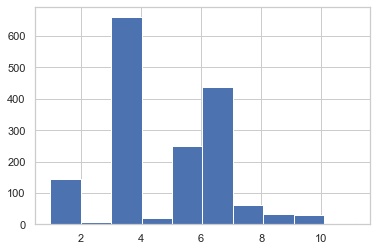

In [644]:
cef['FECHA_CEF'] = pd.to_datetime(
    cef['FECHA_CEF'], errors='coerce', format='%Y-%m-%d'
)
cef['DESFASE_CEF_MESES'] = apply_diff_mont(datetime.now() - cef['FECHA_CEF']) / 30
cef['DESFASE_CEF_MESES'].hist()

In [645]:
for col in list(cef.iloc[:2, 12:].columns):
    cef['CEF_' + col] = cef[col].copy()
    del cef[col]

In [646]:
cef = cef[['COD_UNICO'] + list(cef.iloc[:2, 12:].columns)]
cef.shape

(1649, 55)

In [647]:
cef.shape, cef.groupby(by=['COD_UNICO']).size().shape

((1649, 55), (1649,))

In [648]:
analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((9211, 1098), (9211,))

In [649]:
analisis_cliente = analisis_cliente.merge(
    cef, how='left', on=['COD_UNICO']
)
analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((9211, 1152), (9211,))

In [650]:
#analisis_cliente[analisis_cliente['PERIODO'].isin(['202009', '202008'])].to_excel('seleccion_de_variables_20209_202008_final.xlsx', index=False)

In [651]:
print(list(analisis_cliente.columns))

['PERIODO', 'COD_UNICO', 'RUC', 'FLG_VIGENTE', 'NOMBRE_COMPLETO', 'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA', 'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3', 'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL', 'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4', 'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO', 'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'FEVE', 'ES_ACTIVO', 'CLASIF_SBS', 'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO', 'SEI_MCDO', 'sei_preocupa', 'sei_letal', 'sei_observado_banca', 'TICKET_PROMEDIO_EN_RIESGO', 'UNIVERSO_MESA', 'CLASIF_NO_NORMAL', 'NO_EST_ASOCIADO_A_GRUPO_ECONOMICO', 'NRO_CLASIF_NO_NORMAL_GRUPO_EECON', 'NRO_FEVE_DURO_GRUPO_EECON', 'NRO_FEVE_SEGUIR_GRUPO_EECON', 'PERCENT_GRUPO_ECON_VPC_SEGUIR', 'PERCENT_GRUPO_ECON_VPC_FEVE_DURO', 'PERCENT_GRUPO_ECON_VPC_NO_CLASIF_NORMAL', 'TIENE_2_O_MAS_GRUPO_ECON_VPC_SEGUIR', 'TIENE_1_O_MAS_GRUPO_ECON_VPC_FEVE_DRO', 'TIENE_1_O_MAS_GRUPO_ECON_VPC_NO_CL

In [652]:
analisis_cliente.shape

(9211, 1152)

In [653]:
gc.collect()

88

In [654]:
#up = analisis_cliente.copy()
#up[up['PERIODO'].astype(int) >= 202007].to_excel("AVANCE_4.xlsx", index=False)
#up[up['PERIODO'].astype(int) >= 202007]['PERIODO'].value_counts()

### LINEAS

In [655]:
gc.collect()

44

In [656]:
try:
    del up
except:
    pass


In [657]:
#[col for col in ]

In [658]:
cols_target = [col for col in analisis_cliente.columns if 'target' in col]
print(cols_target)

['target_yoy_quartil_03', 'target_yoy_quartil_04', 'target_yoy_quartil_05', 'target_yoy_quartil_06', 'target_yoy_quartil_07', 'target_feve_reducir_salir', 'target_seguircovid_reducir_salir', 'cuasi_target_preocupa', 'target_no_normales_ibk_sbs', 'target_8_dias_atraso', 'target_15_dias_atraso', 'target_rcc_8_dias_atraso', 'target_SF_8_dias_atraso_o_mas']


### FICHA VSIITAME

In [659]:
sql_visitame = """
SELECT  * FROM(
SELECT ROW_NUMBER() OVER(PARTITION BY COD_UNICO ORDER BY FECHA_VISITA DESC) ORDEN, *
FROM STG.T_WEBBE_INFINITY_VISITA
) A
WHERE ORDEN = 1

"""
visitame = pd.read_sql(
   sql_visitame , connection_market
)
visitame.head(2)

,ORDEN,ID,COD_UNICO,FLG_CAMBIO_MIX_VENTAS,FLG_CAMBIO_PROCESO_INTEGRACION,FLG_CAMBIO_CONCENTRACION_VENTAS,FLG_CAMBIO_CONCENTRACION_PROVEEDORES,FLG_CAMBIO_OPERACIONES,FLG_CAMBIO_ZONA_CLIENTES,FLG_CAMBIO_GERENCIA_GENERAL,...,FLG_CAMBIO_BACKLOG,REVISION_FECHA,REVISION_USUARIO,FLG_CAMBIO_MODELO_NEGOCIO,CAMBIO_PRESTAMO_DESVIO,CAMBIO_INVERSION_ACTIVO_PATRIMONIO,FLG_PROCESO,FECHA_PROCESO,COMENTARIO_ROL_VALIDADOR,FECHA_CARGA
0,1,1069,0000006114,0,0,0,0,0,0,0,...,0,NaT,None,0,None,None,NaN,NaT,None,2020-12-29 05:20:00
1,1,1158,0000038026,0,0,0,0,0,0,0,...,0,NaT,None,0,None,None,NaN,NaT,None,2020-12-29 05:20:00


In [660]:
analisis_cliente = analisis_cliente.merge(
    visitame[[col for col in visitame.columns if 'FLG_' in col] + ['COD_UNICO']], how='left', on=['COD_UNICO']
)
analisis_cliente.shape

(9211, 1167)

In [661]:
[col for col in visitame.columns if 'FLG_' in col]

['FLG_CAMBIO_MIX_VENTAS',
 'FLG_CAMBIO_PROCESO_INTEGRACION',
 'FLG_CAMBIO_CONCENTRACION_VENTAS',
 'FLG_CAMBIO_CONCENTRACION_PROVEEDORES',
 'FLG_CAMBIO_OPERACIONES',
 'FLG_CAMBIO_ZONA_CLIENTES',
 'FLG_CAMBIO_GERENCIA_GENERAL',
 'FLG_CAMBIO_GESTION_FINANCIERA',
 'FLG_CAMBIO_ACCIONISTAS',
 'FLG_CAMBIO_LINEAS',
 'FLG_CAMBIO_INVERSION_ACTIVO_PATRIMONIO',
 'FLG_CAMBIO_PRESTAMO_DESVIO',
 'FLG_CAMBIO_BACKLOG',
 'FLG_CAMBIO_MODELO_NEGOCIO',
 'FLG_PROCESO']

In [662]:
analisis_cliente.columns

Index(['PERIODO', 'COD_UNICO', 'RUC', 'FLG_VIGENTE', 'NOMBRE_COMPLETO',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA',
       ...
       'FLG_CAMBIO_ZONA_CLIENTES', 'FLG_CAMBIO_GERENCIA_GENERAL',
       'FLG_CAMBIO_GESTION_FINANCIERA', 'FLG_CAMBIO_ACCIONISTAS',
       'FLG_CAMBIO_LINEAS', 'FLG_CAMBIO_INVERSION_ACTIVO_PATRIMONIO',
       'FLG_CAMBIO_PRESTAMO_DESVIO', 'FLG_CAMBIO_BACKLOG',
       'FLG_CAMBIO_MODELO_NEGOCIO', 'FLG_PROCESO'],
      dtype='object', length=1167)

## FULL RCC

In [663]:
sql_full_rcc = """
SELECT  * FROM ODS.HD_VMVP_DETAIL_FULL_RCC_ALERTA_CARTERA_BE
"""
full_rcc = pd.read_sql(
   sql_full_rcc , connection_market
)
full_rcc.head()

,COD_UNICO,PERIODO,NBR_ABREVIADO,MTOSALDO
0,0009310997,201911,IBK,176173.93
1,0011623091,202008,IBK,152828.85
2,0015219637,202009,BBVA,573832.71
3,0008948373,202009,IBK,569764.80
4,0012085147,202004,FIN,1351603.38


In [664]:
pivoteo = pd.pivot_table(
    full_rcc, 
    values='MTOSALDO', index=['COD_UNICO'],columns=['NBR_ABREVIADO','PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().unstack(level=0)

pivoteo.head()

NBR_ABREVIADO       AGRO         BBVA         BCP         BIF        COM  \
PERIODO COD_UNICO                                                          
201909  0000006114   0.0      1245.26        0.00        0.00       0.00   
        0000038026   0.0  10696648.17  2935851.82        0.00       0.00   
        0000043778   0.0   6652520.61        0.00        0.00       0.00   
        0000054320   0.0   3736425.63  3992338.98  2383126.06  657345.28   
        0000054635   0.0         0.00        0.00        0.00       0.00   

NBR_ABREVIADO              FIN        GNB         IBK  MBCO        SANT  \
PERIODO COD_UNICO                                                         
201909  0000006114        0.00  123220.00  1101343.54   0.0        0.00   
        0000038026        0.00       0.00  1195088.49   0.0        0.00   
        0000043778        0.00       0.00   385766.86   0.0        0.00   
        0000054320  2957944.67  428216.69  2329868.16   0.0  8794813.48   
        0000054635    31146.46       0.00  2629087.49   0.0        0.00   

NBR_ABREVIADO            SCOTIA  
PERIODO COD_UNICO                
201909  0000006114         0.00  
        0000038026   5045601.56  
        0000043778   2089040.37  
        0000054320   5708229.36  
        0000054635  13790266.86

In [665]:
pivoteo['listado'] = pivoteo.apply(lambda _: list(_), axis=1)
pivoteo['suma'] = pivoteo.sum(axis=1)

for col in [_ for _ in pivoteo.columns if _ not in ['suma', 'listado']]:
    pivoteo['MTO_DEUDA_FULL_RCC_' + col] = pivoteo[col].copy()
    pivoteo['PERCENT_DEUDA_FUL_RCC' + col] = pivoteo[col] / pivoteo['suma']
    del pivoteo[col]
    
pivoteo = pivoteo.reset_index()
pivoteo.head()

NBR_ABREVIADO,PERIODO,COD_UNICO,listado,suma,MTO_DEUDA_FULL_RCC_AGRO,PERCENT_DEUDA_FUL_RCCAGRO,MTO_DEUDA_FULL_RCC_BBVA,PERCENT_DEUDA_FUL_RCCBBVA,MTO_DEUDA_FULL_RCC_BCP,PERCENT_DEUDA_FUL_RCCBCP,...,MTO_DEUDA_FULL_RCC_GNB,PERCENT_DEUDA_FUL_RCCGNB,MTO_DEUDA_FULL_RCC_IBK,PERCENT_DEUDA_FUL_RCCIBK,MTO_DEUDA_FULL_RCC_MBCO,PERCENT_DEUDA_FUL_RCCMBCO,MTO_DEUDA_FULL_RCC_SANT,PERCENT_DEUDA_FUL_RCCSANT,MTO_DEUDA_FULL_RCC_SCOTIA,PERCENT_DEUDA_FUL_RCCSCOTIA
0,201909,0000006114,"[0.0, 1245.26, 0.0, 0.0, 0.0, 0.0, 123220.0, 1...",1225808.80,0.0,0.0,1245.26,0.001016,0.00,0.000000,...,123220.00,0.100521,1101343.54,0.898463,0.0,0.0,0.00,0.000000,0.00,0.000000
1,201909,0000038026,"[0.0, 10696648.17, 2935851.82, 0.0, 0.0, 0.0, ...",19873190.04,0.0,0.0,10696648.17,0.538245,2935851.82,0.147729,...,0.00,0.000000,1195088.49,0.060136,0.0,0.0,0.00,0.000000,5045601.56,0.253890
2,201909,0000043778,"[0.0, 6652520.61, 0.0, 0.0, 0.0, 0.0, 0.0, 385...",9127327.84,0.0,0.0,6652520.61,0.728857,0.00,0.000000,...,0.00,0.000000,385766.86,0.042265,0.0,0.0,0.00,0.000000,2089040.37,0.228878
3,201909,0000054320,"[0.0, 3736425.63, 3992338.98, 2383126.06, 6573...",30988308.31,0.0,0.0,3736425.63,0.120575,3992338.98,0.128834,...,428216.69,0.013819,2329868.16,0.075185,0.0,0.0,8794813.48,0.283811,5708229.36,0.184206
4,201909,0000054635,"[0.0, 0.0, 0.0, 0.0, 0.0, 31146.46, 0.0, 26290...",16450500.81,0.0,0.0,0.00,0.000000,0.00,0.000000,...,0.00,0.000000,2629087.49,0.159818,0.0,0.0,0.00,0.000000,13790266.86,0.838289


<AxesSubplot:>

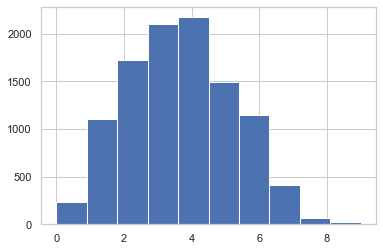

In [666]:
pivoteo['NRO_ENTIDADES_FULL_RCC_SF'] = pivoteo['listado'].apply(lambda _: len([e for e in _ if e > 0]))
pivoteo['NRO_ENTIDADES_FULL_RCC_SF'].hist()

In [667]:
pivoteo['PERIODO'] = pivoteo['PERIODO'].apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
pivoteo['PERIODO'].max(), pivoteo['PERIODO'].min()

('202010', '201910')

In [668]:
del pivoteo['listado'] 

In [669]:
pivoteo['TMO_DEUDA_TOTAL_FULL_RCC_SF'] = pivoteo['suma']
del pivoteo['suma'] 

In [670]:
pivoteo['PERIODO'] = pivoteo['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(9211, 1167)
(9211, 1191)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,MTO_DEUDA_FULL_RCC_IBK,PERCENT_DEUDA_FUL_RCCIBK,MTO_DEUDA_FULL_RCC_MBCO,PERCENT_DEUDA_FUL_RCCMBCO,MTO_DEUDA_FULL_RCC_SANT,PERCENT_DEUDA_FUL_RCCSANT,MTO_DEUDA_FULL_RCC_SCOTIA,PERCENT_DEUDA_FUL_RCCSCOTIA,NRO_ENTIDADES_FULL_RCC_SF,TMO_DEUDA_TOTAL_FULL_RCC_SF
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,4092314.17,0.106760,0.0,0.0,0.0,0.0,0.0,0.0,5.0,38332036.55
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,14557900.00,0.681347,0.0,0.0,0.0,0.0,0.0,0.0,4.0,21366360.73
2,202008,0001420892,20132091979,1,TAWA,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## NUM ENTIDAES FULL RCC HISTORICO

In [671]:
acum = generate_listado_u3m(
    pivoteo, 'listados_num_entidades', values='NRO_ENTIDADES_FULL_RCC_SF',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(807, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(1614, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(2421, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(3228, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(4035, 3)


,COD_UNICO,listados_num_entidades,PERIODO
0,0000006114,"[3, 3, 3, 3, 3, 3, 3, 2, 2, 2]",202007
1,0000038026,"[4, 4, 4, 4, 4, 4, 4, 3, 3, 3]",202007
2,0000043778,"[3, 3, 3, 3, 3, 3, 3, 3, 4, 4]",202007
3,0000054320,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]",202007
4,0000054635,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]",202007


<AxesSubplot:>

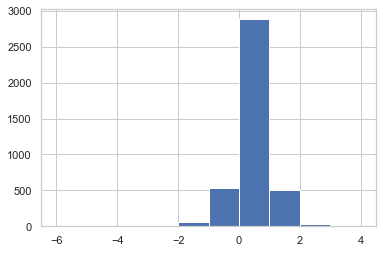

In [672]:
def varacion_num_bancos(lista):
    hace_6_meses = round((lista[-7] + lista[-6]) / 2, 0)
    return lista[-1] - hace_6_meses
    
acum['VARACION_NUM_BANCOS_FULL_RCCC_SF']  = acum['listados_num_entidades'].apply(varacion_num_bancos)
acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].hist()

In [673]:
acum['TIENE_AUMENTO_1_BANCO_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _== 1).astype(int)
acum['TIENE_AUMENTO_1_BANCO_o_MAS_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _ >= 1).astype(int)

acum['TIENE_AUMENTO_2_BANCO_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _== 2).astype(int)
acum['TIENE_AUMENTO_2_BANCO_o_MAS_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _ >= 2).astype(int)

acum['TIENE_AUMENTO_3_BANCO_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _== 3).astype(int)
acum['TIENE_AUMENTO_3_BANCO_o_MAS_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _ >= 3).astype(int)

In [674]:
del  acum['listados_num_entidades']

In [675]:
acum.head()

,COD_UNICO,PERIODO,VARACION_NUM_BANCOS_FULL_RCCC_SF,TIENE_AUMENTO_1_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_1_BANCO_o_MAS_U7M_FULL_RCC_SF,TIENE_AUMENTO_2_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_2_BANCO_o_MAS_U7M_FULL_RCC_SF,TIENE_AUMENTO_3_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_3_BANCO_o_MAS_U7M_FULL_RCC_SF
0,0000006114,202007,-1.0,0,0,0,0,0,0
1,0000038026,202007,-1.0,0,0,0,0,0,0
2,0000043778,202007,1.0,1,1,0,0,0,0
3,0000054320,202007,0.0,0,0,0,0,0,0
4,0000054635,202007,0.0,0,0,0,0,0,0


In [676]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(9211, 1191)
(9211, 1198)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,PERCENT_DEUDA_FUL_RCCSCOTIA,NRO_ENTIDADES_FULL_RCC_SF,TMO_DEUDA_TOTAL_FULL_RCC_SF,VARACION_NUM_BANCOS_FULL_RCCC_SF,TIENE_AUMENTO_1_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_1_BANCO_o_MAS_U7M_FULL_RCC_SF,TIENE_AUMENTO_2_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_2_BANCO_o_MAS_U7M_FULL_RCC_SF,TIENE_AUMENTO_3_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_3_BANCO_o_MAS_U7M_FULL_RCC_SF
0,202007,0015071424,20505719396,1,Q MEDICAL,0,0,0,0,0,...,0.0,5.0,38332036.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202007,0015076938,20538176967,1,APLEX TRADING,0,0,0,0,0,...,0.0,4.0,21366360.73,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202008,0001420892,20132091979,1,TAWA,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [677]:
#    pivoteo = pd.pivot_table(
#        full_rcc, 
#        values='MTOSALDO', index=['COD_UNICO'],columns=['NBR_ABREVIADO','PERIODO'], aggfunc=np.sum, fill_value=0
#    ).unstack().unstack(level=0)#.reset_index()

#    pivoteo.head()

    #pivoteo.columns = columns + index + [col_name]

## OTROS BANCOS

In [678]:
print([col for col in analisis_cliente.columns if 'BBVA' in col.upper()])

['SOW_BBVA_ULT_RCC', 'MAX_DIAS_ATRASO_BBVASF_ULT_RCC', 'PERCETN_DEBT_IN__BBVASF_ULT_RCC', 'TIENE_DEBT_MTOSALDO_BBVA_SF_U3M', 'DEBT_CAIDA_SEGUIDA_MTOSALDO_BBVA_U3M_SF', 'DEBT_SUBIDA_SEGUIDA_MTOSALDO_BBVA_U3M_SF', 'DEBT_MENOR_MTOSALDO_BBVA_DE_U3M_SF', 'DEBT_MAYOR_MTOSALDO_BBVA_DE_U3M_SF', 'DEBT_NO_MTOSALDO_BBVA_SF_ESTE_MES', 'DEBT_NO_MTOSALDO_BBVA_SF_U2M', 'DEBT_NO_MTOSALDO_BBVA_SF_U3M', 'DEBT_CAIDA_20PERCENT_MTOSALDO_BBVA_SF_U3M', 'DEBT_CAIDA_30PERCENT_MTOSALDO_BBVA_SF_U3M', 'DEBT_CAIDA_10PERCENT_MTOSALDO_BBVA_SF_U3M', 'DEBT_SUBIDA_20PERCENT_MTOSALDO_BBVA_SF_U3M', 'DEBT_SUBIDA_30PERCENT_MTOSALDO_BBVA_SF_U3M', 'DEBT_SUBIDA_10PERCENT_MTOSALDO_BBVA_SF_U3M', 'PERCENT_GAR_BBVA', 'TIENE_MAYOR_GARTOTAL_EN_BBVA', 'MTO_DEUDA_FULL_RCC_BBVA', 'PERCENT_DEUDA_FUL_RCCBBVA']


In [679]:
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BBVA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BBVA', 'DEBT_CAIDA_10PERCENT_MTOSALDO_BBVA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BBVA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BBVA', 'DEBT_CAIDA_20PERCENT_MTOSALDO_BBVA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BBVA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BBVA', 'DEBT_CAIDA_30PERCENT_MTOSALDO_BBVA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BBVA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BBVA', 'DEBT_MENOR_MTOSALDO_BBVA_DE_U3M_SF']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)


analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BCP'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BCP', 'DEBT_CAIDA_10PERCENT_MTOSALDO_BCP_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BCP'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BCP', 'DEBT_CAIDA_20PERCENT_MTOSALDO_BCP_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BCP'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BCP', 'DEBT_CAIDA_30PERCENT_MTOSALDO_BCP_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BCP'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BCP', 'DEBT_MENOR_MTOSALDO_BCP_DE_U3M_SF']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)



analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BIF'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BIF', 'DEBT_CAIDA_10PERCENT_MTOSALDO_BIF_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BIF'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BIF', 'DEBT_CAIDA_20PERCENT_MTOSALDO_BIF_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BIF'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BIF', 'DEBT_CAIDA_30PERCENT_MTOSALDO_BIF_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BIF'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_BIF', 'DEBT_MENOR_MTOSALDO_BIF_DE_U3M_SF']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)


analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_SCOTIA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_SCOTIA', 'DEBT_CAIDA_10PERCENT_MTOSALDO_SCOTIA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_SCOTIA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_SCOTIA', 'DEBT_CAIDA_20PERCENT_MTOSALDO_SCOTIA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_SCOTIA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_SCOTIA', 'DEBT_CAIDA_30PERCENT_MTOSALDO_SCOTIA_SF_U3M']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)
analisis_cliente['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_SCOTIA'] = analisis_cliente[['TIENE_MAYOR_GARTOTAL_EN_SCOTIA', 'DEBT_MENOR_MTOSALDO_SCOTIA_DE_U3M_SF']].apply(
    lambda _: _[0] == 1 and _[1] == 1, axis=1
)



analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_U3M_NO_IBK_SF'] =  analisis_cliente[
    ['MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_SCOTIA', 'MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BIF',
    'MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BBVA', 'MAYOR_GARANTIA_Y_CAIDA_10PERCENT_DEBT_COLDIRECT_BCP']
].apply(lambda _: _[0] == 1 or _[1] == 1 or _[2] == 1 or _[3] == 1, axis=1)

analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_U3M_NO_IBK_SF'] =  analisis_cliente[
    ['MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_SCOTIA', 'MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BIF',
    'MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BBVA', 'MAYOR_GARANTIA_Y_CAIDA_20PERCENT_DEBT_COLDIRECT_BCP']
].apply(lambda _: _[0] == 1 or _[1] == 1 or _[2] == 1 or _[3] == 1, axis=1)


analisis_cliente['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_U3M_NO_IBK_SF'] =  analisis_cliente[
    ['MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_SCOTIA', 'MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BIF',
    'MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BBVA', 'MAYOR_GARANTIA_Y_CAIDA_30PERCENT_DEBT_COLDIRECT_BCP']
].apply(lambda _: _[0] == 1 or _[1] == 1 or _[2] == 1 or _[3] == 1, axis=1)


analisis_cliente['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_U3M_BANK_NO_IBK_SF'] =  analisis_cliente[
    ['MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BBVA', 'MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BCP',
    'MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_SCOTIA', 'MAYOR_GARANTIA_Y_MENOR_DEBT_COLDIRECT_BIF']
].apply(lambda _: _[0] == 1 or _[1] == 1 or _[2] == 1 or _[3] == 1, axis=1)

In [680]:

#up[up['PERIODO'].astype(int) >= 202007]['PERIODO'].value_counts()

In [681]:
analisis_cliente.shape

(9211, 1218)

In [682]:
analisis_cliente['PERIODO'].value_counts()

202007    1923
202008    1882
202009    1832
202010    1801
202011    1773
Name: PERIODO, dtype: int64

## PROTESTOS

In [683]:
prot = """
SELECT  * FROM ODS.HD_VMVP_PROTESTOS_ALERTAS_CARTERA_BE
"""
protesto = pd.read_sql(
   prot , connection_market
)
protesto['COD_UNICO'] = protesto['NUM_DOC']
protesto.head()

,PERIODO,NUM_DOC,MONTO_ADEUDADO,MIN_MONTO_ADEUDADO_ERIODO,COD_UNICO
0,202003,20112810791,47704.35,33355.70,20112810791
1,201903,20601076781,5037.00,5037.00,20601076781
2,201803,20507380515,80933.60,44947.72,20507380515
3,201808,20494419166,6747.22,6053.80,20494419166
4,202004,20513550830,4525.11,4525.11,20513550830


In [684]:
protesto['COD_UNICO'] = protesto['NUM_DOC'].copy()   # artificio
acum = generate_listado_u3m(
    protesto, 'listado', values='MONTO_ADEUDADO',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1428, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(2856, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(4284, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(5712, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(7140, 3)


,COD_UNICO,listado,PERIODO
0,20100006538,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
1,20100013747,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
2,20100019940,"[3047.87, 3047.87, 3047.87, 22015.67, 22015.67...",202007
3,20100024277,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
4,20100032709,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007


<AxesSubplot:>

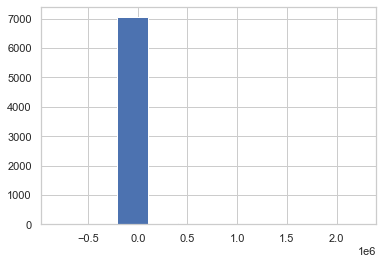

In [685]:
acum['TIENE_PROTESTO_REGISTRADO_MES_ACTUAL'] = acum['listado'].apply(lambda _: _[-1] > 0)
acum['TENDENCIA_PROTESTOS_U7M'] = acum['listado'].apply(lambda _: np.polyfit(list(range(1, 8)), _[-7:], 1)[0])
acum['TENDENCIA_PROTESTOS_U7M'].hist()

In [686]:
acum['TIENE_TENDENCIA_CRECIENTE_U7M'] = acum['TENDENCIA_PROTESTOS_U7M'].apply(lambda _: _ > 0)

In [687]:
def searhc_zero(lista):
    meses = 0
    for val in lista[::-1]:
        if val <= 0:
            return meses
        meses += 1
    
    return meses

def searhc_no_zero(lista):
    meses = 0
    for val in lista[::-1]:
        if val > 0:
            return meses
        meses += 1
    
    return meses

acum['NRO_MESES_ANTERIORES_CON_PROTESTOS_CONSECUTIVOS'] = acum['listado'].apply(lambda _: searhc_zero(_))
acum['NRO_MESES_ANTERIORES_SIN_PROTESTOS'] = acum['listado'].apply(lambda _: searhc_no_zero(_))

In [688]:
[col for col in analisis_cliente if 'RUC' in col.upper()]

['RUC']

In [689]:
[col for col in analisis_cliente if 'DOC' in col.upper()]

[]

In [690]:
del acum['listado']

In [691]:
acum['RUC'] = acum['COD_UNICO']
del  acum['COD_UNICO']

In [692]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'RUC']
)
#del pivoteo
print(analisis_cliente.shape)

(9211, 1218)
(9211, 1223)


In [693]:
if 'listado' in analisis_cliente.columns:
    del analisis_cliente['listado']

In [694]:
#list(analisis_cliente.columns)[-30:]

## RIESGO

In [695]:
riesgo_sql = """
    SELECT  * FROM ODS.HD_VMVP_SALDO_RIESGO_ALERTAS_CARTERA_BE
"""
riesgo = pd.read_sql(
   riesgo_sql , connection_market
)

riesgo.head()

,PERIODO,CODUNICOCLI,RIESGO
0,202010,0012466756,263612.8
1,201910,0015345613,0.0
2,201903,0009050420,0.0
3,201808,0014229365,0.0
4,202006,0016777043,0.0


In [696]:
riesgo['COD_UNICO'] = riesgo['CODUNICOCLI']
acum = generate_listado_u3m(
    riesgo, 'listado', values='RIESGO',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(167877, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(335754, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(503631, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(671508, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(839385, 3)


,COD_UNICO,listado,PERIODO
0,0000002469,"[21245091.47404688, 12307280.730906248, 0.0, 0...",202007
1,0000002626,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
2,0000002667,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
3,0000003152,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202007
4,0000003392,"[103329802.29565625, 104505564.76317187, 68829...",202007


In [697]:
def get_percent_(lista, treshold):
    media_hace_7m =(lista[-7] + lista[-6]) / 2
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not ultimo_mes:
        return 0
    
    if not media_hace_7m:
        return 1
    
    return ultimo_mes/media_hace_7m >= treshold

acum['TIENE_AUMENTO_RIESGO_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_AUMENTO_RIESGO_1_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.01)).astype(int)
acum['TIENE_AUMENTO_RIESGO_3_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.03)).astype(int)
acum['TIENE_AUMENTO_RIESGO_5PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.05)).astype(int)
acum['TIENE_AUMENTO_RIESGO_10PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.1)).astype(int)
acum['TIENE_AUMENTO_RIESGO_20PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.2)).astype(int)
acum['TIENE_AUMENTO_RIESGO_30PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.3)).astype(int)
acum['TIENE_AUMENTO_RIESGO_40PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.4)).astype(int)
acum['TIENE_AUMENTO_RIESGO_50PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.5)).astype(int)
acum['TIENE_AUMENTO_RIESGO_60PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.6)).astype(int)
acum['TIENE_AUMENTO_RIESGO_70PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.7)).astype(int)

def get_percent_(lista, treshold):
    media_hace_3m =(lista[-2] + lista[-3]) / 2
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not ultimo_mes:
        return 0
    
    if not media_hace_3m:
        return 1
    return ultimo_mes/media_hace_3m >= treshold

acum['TIENE_AUMENTO_RIESGO_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_AUMENTO_RIESGO_1_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.01)).astype(int)
acum['TIENE_AUMENTO_RIESGO_3_PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.03)).astype(int)
acum['TIENE_AUMENTO_RIESGO_5PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.05)).astype(int)
acum['TIENE_AUMENTO_RIESGO_10PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.1)).astype(int)
acum['TIENE_AUMENTO_RIESGO_20PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.2)).astype(int)
acum['TIENE_AUMENTO_RIESGO_30PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.3)).astype(int)
acum['TIENE_AUMENTO_RIESGO_40PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.4)).astype(int)
acum['TIENE_AUMENTO_RIESGO_50PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1.5)).astype(int)

del acum['listado']
acum.head()

,COD_UNICO,PERIODO,TIENE_AUMENTO_RIESGO_U7M,TIENE_AUMENTO_RIESGO_1_PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_3_PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_5PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_10PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_20PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_30PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_40PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_50PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_60PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_70PERCENT_A_MAS_U7M,TIENE_AUMENTO_RIESGO_U3M,TIENE_AUMENTO_RIESGO_10PERCENT_A_MAS_U3M,TIENE_AUMENTO_RIESGO_20PERCENT_A_MAS_U3M,TIENE_AUMENTO_RIESGO_30PERCENT_A_MAS_U3M,TIENE_AUMENTO_RIESGO_40PERCENT_A_MAS_U3M,TIENE_AUMENTO_RIESGO_50PERCENT_A_MAS_U3M
0,0000002469,202007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0000002626,202007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0000002667,202007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0000003152,202007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0000003392,202007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [698]:
acum['TIENE_AUMENTO_RIESGO_10PERCENT_A_MAS_U3M'].value_counts()

0    818502
1     20883
Name: TIENE_AUMENTO_RIESGO_10PERCENT_A_MAS_U3M, dtype: int64

In [699]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)

(9211, 1223)
(9211, 1240)


## PROVEEDORES

In [700]:
proveedores_sql = """
    SELECT  * FROM ODS.HD_VMVP_PAGOS_PROVEEDORES_ALERTAS_CARTERA_BE
"""
proveedores = pd.read_sql(
   proveedores_sql , connection_market
)

proveedores.head()

,PERIODO,COD_UNICO,VOLUMEN
0,202001,0000003392,85703.81
1,201906,0000043141,568187.57
2,202006,0000046797,35482.59
3,202008,0000054874,7390.06
4,202010,0000054874,3231.07


In [701]:
acum = generate_listado_u3m(
    proveedores, 'listado', values='VOLUMEN',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(718, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(1436, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(2154, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(2872, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(3590, 3)


,COD_UNICO,listado,PERIODO
0,0000003392,"[0.0, 0.0, 5096.44, 0.0, 0.0, 85703.81, 326376...",202007
1,0000008318,"[0.0, 25471.98, 0.0, 58592.81, 3917.6, 23189.6...",202007
2,0000042044,"[0.0, 123018.54, 0.0, 0.0, 2400.0, 0.0, 0.0, 0...",202007
3,0000043141,"[1313263.3, 1032465.48, 1941097.32, 1606072.91...",202007
4,0000043778,"[0.0, 0.0, 0.0, 0.0, 5324.0, 3397.5, 47.0, 442...",202007


In [702]:
def get_percent_(lista, treshold):
    media_hace_7m =(lista[-7] + lista[-6]) / 2
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not media_hace_7m:
        return 0
    
    return ultimo_mes/media_hace_7m <= treshold

acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_5PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.95)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_10PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.9)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_20PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.8)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_30PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.7)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_40PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.6)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_50PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.5)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_60PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.4)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_70PERCENT_A_MAS_U7M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.3)).astype(int)

def get_percent_(lista, treshold):
    media_hace_3m = (lista[-2] + lista[-3]) / 2
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not media_hace_3m:
        return 0
    
    return ultimo_mes/media_hace_3m <= treshold

acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 1)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_5PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.95)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_10PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.9)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_20PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.8)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_30PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.7)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_40PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.6)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_50PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.5)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_60PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.4)).astype(int)
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_70PERCENT_A_MAS_U3M'] = acum['listado'].apply(lambda _: get_percent_(_, 0.3)).astype(int)

del acum['listado']
acum.head()

,COD_UNICO,PERIODO,TIENE_DISMINUCION_PAGO_PROVEEDORES_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_5PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_10PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_20PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_30PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_40PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_50PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_60PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_70PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PAGO_PROVEEDORES_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_5PERCENT_A_MAS_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_10PERCENT_A_MAS_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_20PERCENT_A_MAS_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_30PERCENT_A_MAS_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_40PERCENT_A_MAS_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_50PERCENT_A_MAS_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_60PERCENT_A_MAS_U3M,TIENE_DISMINUCION_PAGO_PROVEEDORES_70PERCENT_A_MAS_U3M
0,0000003392,202007,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
1,0000008318,202007,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
2,0000042044,202007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0000043141,202007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0000043778,202007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [703]:
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_U3M'].value_counts()

0    2336
1    1254
Name: TIENE_DISMINUCION_PAGO_PROVEEDORES_U3M, dtype: int64

In [704]:
acum['TIENE_DISMINUCION_PAGO_PROVEEDORES_U7M'].value_counts()

0    2538
1    1052
Name: TIENE_DISMINUCION_PAGO_PROVEEDORES_U7M, dtype: int64

In [705]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)

(9211, 1240)
(9211, 1258)


In [706]:
#assert False
analisis_cliente.to_excel("AVANCE_5.xlsx", index=False)

In [707]:
#raise Exception("VICTOR DICE:  AUGANTA TU COCHE")

In [708]:
for column in [col for col in analisis_cliente.columns if 'listado' in  col.lower()]:
    del analisis_cliente[column]

In [709]:
%%time

from sqlalchemy import create_engine
engine = create_engine(r"mssql+pymssql://ibetlmarket:m@rk3t2o15@10.11.12.90\BDT/MARKET")
connection_x = engine.connect()

try:
    analisis_cliente.replace([np.inf, -np.inf], np.nan).to_sql(
        name='HD_DATASET_ALERTA_CARTERA_BE',
        schema='ODS',
        con=connection_x, 
        index=False, 
        if_exists='replace'
    )
    connection_x.close()
    correct = 1
except Exception as e:
    print("ERROR: ", str(e))
    correct = 0

print(correct)

ERROR:  (pymssql.OperationalError) (1702, b"CREATE TABLE failed because column 'TIENE_ADEX_MINERIA_TRADICIONAL_EXP' in table 'HD_DATASET_ALERTA_CARTERA_BE' exceeds the maximum of 1024 columns.DB-Lib error message 20018, severity 16:\nGeneral SQL Server error: Check messages from the SQL Server\n")
[SQL: 
CREATE TABLE [ODS].[HD_DATASET_ALERTA_CARTERA_BE] (
	[PERIODO] TEXT NULL, 
	[COD_UNICO] TEXT NULL, 
	[RUC] TEXT NULL, 
	[FLG_VIGENTE] BIGINT NULL, 
	[NOMBRE_COMPLETO] TEXT NULL, 
	[FLG_SUSPENDIDO] BIGINT NULL, 
	[FLG_VENCIDA] BIGINT NULL, 
	[FLG_CANCELADO] BIGINT NULL, 
	[FLG_MONOLINEA] BIGINT NULL, 
	[FLG_SOLO_REACTIVA] BIGINT NULL, 
	[FLG_POSICION] BIGINT NULL, 
	[FUNNEL_1] BIGINT NULL, 
	[FUNNEL_2] BIGINT NULL, 
	[FUNNEL_3] BIGINT NULL, 
	[RIESGO] FLOAT(53) NULL, 
	[COD_GRUPO_ECONOMICO] TEXT NULL, 
	[DES_GRUPO_ECONOMICO] TEXT NULL, 
	[ZONAL] TEXT NULL, 
	[ENCARGADO] TEXT NULL, 
	[NOMBRE_JEFE] TEXT NULL, 
	[CLASIFICACION_LIST_360] TEXT NULL, 
	[FUNNEL_4] BIGINT NULL, 
	[DESPRIORIZACI

### AANALISIS VARIABLE

##### En otro notebook